In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import Callback

#physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
final_x_set = []
final_y_set = []

In [5]:
epochs = 50000
batch_size = 8
num_neurons = 10
seed = 10

histories={}

np.random.seed(seed)
tf.random.set_seed(seed)

#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
print(X_data.shape)
Y_data = Y_data.reshape(Y_data.shape[0], 1)
final_x_set.append(X_data)
final_y_set.append(Y_data)

idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

(400, 7)


In [8]:
# create training and testing vars
X_data = (X_data- np.mean(X_data, axis=0))/ np.std(X_data, axis=0)
X_train, X_test, Y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, shuffle = False)
print (X_train.shape, Y_train.shape)
print (X_test.shape, y_test.shape)

(280, 7) (280, 1)
(120, 7) (120, 1)


## Part B - Question 1

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_mse',min_delta=1e-9, patience=0)

l2 = tf.keras.regularizers.l2(1e-3)

print(l2)

# create a network
model = Sequential([
        Dense(num_neurons, activation='relu',kernel_regularizer=l2),
        Dense(1)
])

opt = tf.keras.optimizers.SGD(lr=0.001)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['qn1'] = model.fit(X_train, Y_train,
                             epochs=epochs,
                             batch_size=batch_size,
                             verbose = 2,
                             callbacks=[callback],
                             validation_data=(X_test, y_test))

Epoch 1/50000
35/35 - 0s - loss: 0.5175 - mse: 0.5088 - val_loss: 0.4634 - val_mse: 0.4547
Epoch 2/50000
35/35 - 0s - loss: 0.4384 - mse: 0.4297 - val_loss: 0.3950 - val_mse: 0.3863
Epoch 3/50000
35/35 - 0s - loss: 0.3767 - mse: 0.3681 - val_loss: 0.3417 - val_mse: 0.3330
Epoch 4/50000
35/35 - 0s - loss: 0.3281 - mse: 0.3194 - val_loss: 0.2994 - val_mse: 0.2908
Epoch 5/50000
35/35 - 0s - loss: 0.2888 - mse: 0.2802 - val_loss: 0.2653 - val_mse: 0.2567
Epoch 6/50000
35/35 - 0s - loss: 0.2572 - mse: 0.2486 - val_loss: 0.2377 - val_mse: 0.2291
Epoch 7/50000
35/35 - 0s - loss: 0.2313 - mse: 0.2227 - val_loss: 0.2149 - val_mse: 0.2063
Epoch 8/50000
35/35 - 0s - loss: 0.2098 - mse: 0.2012 - val_loss: 0.1960 - val_mse: 0.1874
Epoch 9/50000
35/35 - 0s - loss: 0.1918 - mse: 0.1832 - val_loss: 0.1802 - val_mse: 0.1716
Epoch 10/50000
35/35 - 0s - loss: 0.1766 - mse: 0.1681 - val_loss: 0.1668 - val_mse: 0.1583
Epoch 11/50000
35/35 - 0s - loss: 0.1635 - mse: 0.1550 - val_loss: 0.1554 - val_mse: 0.14

Epoch 90/50000
35/35 - 0s - loss: 0.0290 - mse: 0.0209 - val_loss: 0.0305 - val_mse: 0.0224
Epoch 91/50000
35/35 - 0s - loss: 0.0288 - mse: 0.0207 - val_loss: 0.0303 - val_mse: 0.0222
Epoch 92/50000
35/35 - 0s - loss: 0.0286 - mse: 0.0205 - val_loss: 0.0301 - val_mse: 0.0220
Epoch 93/50000
35/35 - 0s - loss: 0.0284 - mse: 0.0203 - val_loss: 0.0298 - val_mse: 0.0217
Epoch 94/50000
35/35 - 0s - loss: 0.0283 - mse: 0.0202 - val_loss: 0.0297 - val_mse: 0.0216
Epoch 95/50000
35/35 - 0s - loss: 0.0281 - mse: 0.0200 - val_loss: 0.0294 - val_mse: 0.0213
Epoch 96/50000
35/35 - 0s - loss: 0.0279 - mse: 0.0198 - val_loss: 0.0292 - val_mse: 0.0212
Epoch 97/50000
35/35 - 0s - loss: 0.0277 - mse: 0.0196 - val_loss: 0.0290 - val_mse: 0.0209
Epoch 98/50000
35/35 - 0s - loss: 0.0276 - mse: 0.0195 - val_loss: 0.0288 - val_mse: 0.0208
Epoch 99/50000
35/35 - 0s - loss: 0.0274 - mse: 0.0193 - val_loss: 0.0287 - val_mse: 0.0206
Epoch 100/50000
35/35 - 0s - loss: 0.0272 - mse: 0.0191 - val_loss: 0.0285 - val

Epoch 179/50000
35/35 - 0s - loss: 0.0201 - mse: 0.0122 - val_loss: 0.0206 - val_mse: 0.0127
Epoch 180/50000
35/35 - 0s - loss: 0.0201 - mse: 0.0122 - val_loss: 0.0206 - val_mse: 0.0127
Epoch 181/50000
35/35 - 0s - loss: 0.0200 - mse: 0.0121 - val_loss: 0.0205 - val_mse: 0.0126
Epoch 182/50000
35/35 - 0s - loss: 0.0200 - mse: 0.0121 - val_loss: 0.0204 - val_mse: 0.0126
Epoch 183/50000
35/35 - 0s - loss: 0.0199 - mse: 0.0120 - val_loss: 0.0204 - val_mse: 0.0125
Epoch 184/50000
35/35 - 0s - loss: 0.0199 - mse: 0.0120 - val_loss: 0.0204 - val_mse: 0.0125
Epoch 185/50000
35/35 - 0s - loss: 0.0198 - mse: 0.0119 - val_loss: 0.0203 - val_mse: 0.0124
Epoch 186/50000
35/35 - 0s - loss: 0.0198 - mse: 0.0119 - val_loss: 0.0202 - val_mse: 0.0124
Epoch 187/50000
35/35 - 0s - loss: 0.0197 - mse: 0.0118 - val_loss: 0.0202 - val_mse: 0.0123
Epoch 188/50000
35/35 - 0s - loss: 0.0197 - mse: 0.0118 - val_loss: 0.0201 - val_mse: 0.0123
Epoch 189/50000
35/35 - 0s - loss: 0.0196 - mse: 0.0117 - val_loss: 0.

35/35 - 0s - loss: 0.0171 - mse: 0.0094 - val_loss: 0.0174 - val_mse: 0.0097
Epoch 268/50000
35/35 - 0s - loss: 0.0171 - mse: 0.0093 - val_loss: 0.0174 - val_mse: 0.0096
Epoch 269/50000
35/35 - 0s - loss: 0.0171 - mse: 0.0093 - val_loss: 0.0174 - val_mse: 0.0096
Epoch 270/50000
35/35 - 0s - loss: 0.0170 - mse: 0.0093 - val_loss: 0.0173 - val_mse: 0.0096
Epoch 271/50000
35/35 - 0s - loss: 0.0170 - mse: 0.0093 - val_loss: 0.0173 - val_mse: 0.0096
Epoch 272/50000
35/35 - 0s - loss: 0.0170 - mse: 0.0093 - val_loss: 0.0173 - val_mse: 0.0096
Epoch 273/50000
35/35 - 0s - loss: 0.0170 - mse: 0.0092 - val_loss: 0.0173 - val_mse: 0.0095
Epoch 274/50000
35/35 - 0s - loss: 0.0169 - mse: 0.0092 - val_loss: 0.0172 - val_mse: 0.0095
Epoch 275/50000
35/35 - 0s - loss: 0.0169 - mse: 0.0092 - val_loss: 0.0172 - val_mse: 0.0095
Epoch 276/50000
35/35 - 0s - loss: 0.0169 - mse: 0.0092 - val_loss: 0.0172 - val_mse: 0.0095
Epoch 277/50000
35/35 - 0s - loss: 0.0169 - mse: 0.0092 - val_loss: 0.0172 - val_mse: 

Epoch 356/50000
35/35 - 0s - loss: 0.0156 - mse: 0.0080 - val_loss: 0.0158 - val_mse: 0.0082
Epoch 357/50000
35/35 - 0s - loss: 0.0156 - mse: 0.0080 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 358/50000
35/35 - 0s - loss: 0.0156 - mse: 0.0080 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 359/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0079 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 360/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0079 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 361/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0079 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 362/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0079 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 363/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0079 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 364/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0079 - val_loss: 0.0156 - val_mse: 0.0081
Epoch 365/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0079 - val_loss: 0.0156 - val_mse: 0.0080
Epoch 366/50000
35/35 - 0s - loss: 0.0155 - mse: 0.0079 - val_loss: 0.

35/35 - 0s - loss: 0.0147 - mse: 0.0072 - val_loss: 0.0148 - val_mse: 0.0073
Epoch 445/50000
35/35 - 0s - loss: 0.0147 - mse: 0.0072 - val_loss: 0.0148 - val_mse: 0.0073
Epoch 446/50000
35/35 - 0s - loss: 0.0146 - mse: 0.0072 - val_loss: 0.0147 - val_mse: 0.0073
Epoch 447/50000
35/35 - 0s - loss: 0.0146 - mse: 0.0072 - val_loss: 0.0147 - val_mse: 0.0073
Epoch 448/50000
35/35 - 0s - loss: 0.0146 - mse: 0.0072 - val_loss: 0.0147 - val_mse: 0.0073
Epoch 449/50000
35/35 - 0s - loss: 0.0146 - mse: 0.0072 - val_loss: 0.0147 - val_mse: 0.0072
Epoch 450/50000
35/35 - 0s - loss: 0.0146 - mse: 0.0071 - val_loss: 0.0147 - val_mse: 0.0072
Epoch 451/50000
35/35 - 0s - loss: 0.0146 - mse: 0.0071 - val_loss: 0.0147 - val_mse: 0.0072
Epoch 452/50000
35/35 - 0s - loss: 0.0146 - mse: 0.0071 - val_loss: 0.0147 - val_mse: 0.0072
Epoch 453/50000
35/35 - 0s - loss: 0.0146 - mse: 0.0071 - val_loss: 0.0147 - val_mse: 0.0072
Epoch 454/50000
35/35 - 0s - loss: 0.0146 - mse: 0.0071 - val_loss: 0.0147 - val_mse: 

Epoch 533/50000
35/35 - 0s - loss: 0.0140 - mse: 0.0067 - val_loss: 0.0141 - val_mse: 0.0067
Epoch 534/50000
35/35 - 0s - loss: 0.0140 - mse: 0.0067 - val_loss: 0.0141 - val_mse: 0.0067
Epoch 535/50000
35/35 - 0s - loss: 0.0140 - mse: 0.0066 - val_loss: 0.0140 - val_mse: 0.0067
Epoch 536/50000
35/35 - 0s - loss: 0.0140 - mse: 0.0066 - val_loss: 0.0140 - val_mse: 0.0067
Epoch 537/50000
35/35 - 0s - loss: 0.0140 - mse: 0.0066 - val_loss: 0.0140 - val_mse: 0.0067
Epoch 538/50000
35/35 - 0s - loss: 0.0140 - mse: 0.0066 - val_loss: 0.0140 - val_mse: 0.0067
Epoch 539/50000
35/35 - 0s - loss: 0.0140 - mse: 0.0066 - val_loss: 0.0140 - val_mse: 0.0067
Epoch 540/50000
35/35 - 0s - loss: 0.0140 - mse: 0.0066 - val_loss: 0.0140 - val_mse: 0.0067
Epoch 541/50000
35/35 - 0s - loss: 0.0140 - mse: 0.0066 - val_loss: 0.0140 - val_mse: 0.0067
Epoch 542/50000
35/35 - 0s - loss: 0.0140 - mse: 0.0066 - val_loss: 0.0140 - val_mse: 0.0067
Epoch 543/50000
35/35 - 0s - loss: 0.0139 - mse: 0.0066 - val_loss: 0.

35/35 - 0s - loss: 0.0135 - mse: 0.0063 - val_loss: 0.0135 - val_mse: 0.0063
Epoch 622/50000
35/35 - 0s - loss: 0.0135 - mse: 0.0063 - val_loss: 0.0135 - val_mse: 0.0063
Epoch 623/50000
35/35 - 0s - loss: 0.0135 - mse: 0.0063 - val_loss: 0.0135 - val_mse: 0.0063
Epoch 624/50000
35/35 - 0s - loss: 0.0135 - mse: 0.0063 - val_loss: 0.0135 - val_mse: 0.0063
Epoch 625/50000
35/35 - 0s - loss: 0.0135 - mse: 0.0063 - val_loss: 0.0135 - val_mse: 0.0063
Epoch 626/50000
35/35 - 0s - loss: 0.0135 - mse: 0.0063 - val_loss: 0.0135 - val_mse: 0.0063
Epoch 627/50000
35/35 - 0s - loss: 0.0135 - mse: 0.0063 - val_loss: 0.0135 - val_mse: 0.0063
Epoch 628/50000
35/35 - 0s - loss: 0.0135 - mse: 0.0062 - val_loss: 0.0135 - val_mse: 0.0063
Epoch 629/50000
35/35 - 0s - loss: 0.0135 - mse: 0.0062 - val_loss: 0.0135 - val_mse: 0.0063
Epoch 630/50000
35/35 - 0s - loss: 0.0135 - mse: 0.0062 - val_loss: 0.0135 - val_mse: 0.0063
Epoch 631/50000
35/35 - 0s - loss: 0.0135 - mse: 0.0062 - val_loss: 0.0135 - val_mse: 

Epoch 710/50000
35/35 - 0s - loss: 0.0131 - mse: 0.0060 - val_loss: 0.0131 - val_mse: 0.0060
Epoch 711/50000
35/35 - 0s - loss: 0.0131 - mse: 0.0060 - val_loss: 0.0131 - val_mse: 0.0060
Epoch 712/50000
35/35 - 0s - loss: 0.0131 - mse: 0.0060 - val_loss: 0.0131 - val_mse: 0.0060
Epoch 713/50000
35/35 - 0s - loss: 0.0131 - mse: 0.0060 - val_loss: 0.0131 - val_mse: 0.0060
Epoch 714/50000
35/35 - 0s - loss: 0.0131 - mse: 0.0060 - val_loss: 0.0131 - val_mse: 0.0060
Epoch 715/50000
35/35 - 0s - loss: 0.0131 - mse: 0.0060 - val_loss: 0.0131 - val_mse: 0.0060
Epoch 716/50000
35/35 - 0s - loss: 0.0131 - mse: 0.0060 - val_loss: 0.0131 - val_mse: 0.0060
Epoch 717/50000
35/35 - 0s - loss: 0.0131 - mse: 0.0060 - val_loss: 0.0131 - val_mse: 0.0060
Epoch 718/50000
35/35 - 0s - loss: 0.0131 - mse: 0.0060 - val_loss: 0.0131 - val_mse: 0.0060
Epoch 719/50000
35/35 - 0s - loss: 0.0131 - mse: 0.0060 - val_loss: 0.0131 - val_mse: 0.0059
Epoch 720/50000
35/35 - 0s - loss: 0.0131 - mse: 0.0059 - val_loss: 0.

35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0128 - val_mse: 0.0057
Epoch 799/50000
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0127 - val_mse: 0.0057
Epoch 800/50000
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0127 - val_mse: 0.0057
Epoch 801/50000
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0127 - val_mse: 0.0057
Epoch 802/50000
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0127 - val_mse: 0.0057
Epoch 803/50000
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0127 - val_mse: 0.0057
Epoch 804/50000
35/35 - 0s - loss: 0.0127 - mse: 0.0057 - val_loss: 0.0127 - val_mse: 0.0057
Epoch 805/50000
35/35 - 0s - loss: 0.0127 - mse: 0.0057 - val_loss: 0.0127 - val_mse: 0.0057
Epoch 806/50000
35/35 - 0s - loss: 0.0127 - mse: 0.0057 - val_loss: 0.0127 - val_mse: 0.0057
Epoch 807/50000
35/35 - 0s - loss: 0.0127 - mse: 0.0057 - val_loss: 0.0127 - val_mse: 0.0057
Epoch 808/50000
35/35 - 0s - loss: 0.0127 - mse: 0.0057 - val_loss: 0.0127 - val_mse: 

Epoch 887/50000
35/35 - 0s - loss: 0.0125 - mse: 0.0055 - val_loss: 0.0124 - val_mse: 0.0055
Epoch 888/50000
35/35 - 0s - loss: 0.0125 - mse: 0.0055 - val_loss: 0.0124 - val_mse: 0.0055
Epoch 889/50000
35/35 - 0s - loss: 0.0125 - mse: 0.0055 - val_loss: 0.0124 - val_mse: 0.0055
Epoch 890/50000
35/35 - 0s - loss: 0.0125 - mse: 0.0055 - val_loss: 0.0124 - val_mse: 0.0055
Epoch 891/50000
35/35 - 0s - loss: 0.0125 - mse: 0.0055 - val_loss: 0.0124 - val_mse: 0.0055
Epoch 892/50000
35/35 - 0s - loss: 0.0125 - mse: 0.0055 - val_loss: 0.0124 - val_mse: 0.0055
Epoch 893/50000
35/35 - 0s - loss: 0.0125 - mse: 0.0055 - val_loss: 0.0124 - val_mse: 0.0055
Epoch 894/50000
35/35 - 0s - loss: 0.0124 - mse: 0.0055 - val_loss: 0.0124 - val_mse: 0.0055
Epoch 895/50000
35/35 - 0s - loss: 0.0124 - mse: 0.0055 - val_loss: 0.0124 - val_mse: 0.0055
Epoch 896/50000
35/35 - 0s - loss: 0.0124 - mse: 0.0055 - val_loss: 0.0124 - val_mse: 0.0055
Epoch 897/50000
35/35 - 0s - loss: 0.0124 - mse: 0.0055 - val_loss: 0.

35/35 - 0s - loss: 0.0122 - mse: 0.0054 - val_loss: 0.0122 - val_mse: 0.0053
Epoch 976/50000
35/35 - 0s - loss: 0.0122 - mse: 0.0054 - val_loss: 0.0122 - val_mse: 0.0053
Epoch 977/50000
35/35 - 0s - loss: 0.0122 - mse: 0.0054 - val_loss: 0.0122 - val_mse: 0.0053
Epoch 978/50000
35/35 - 0s - loss: 0.0122 - mse: 0.0054 - val_loss: 0.0122 - val_mse: 0.0053
Epoch 979/50000
35/35 - 0s - loss: 0.0122 - mse: 0.0054 - val_loss: 0.0122 - val_mse: 0.0053
Epoch 980/50000
35/35 - 0s - loss: 0.0122 - mse: 0.0054 - val_loss: 0.0122 - val_mse: 0.0053
Epoch 981/50000
35/35 - 0s - loss: 0.0122 - mse: 0.0054 - val_loss: 0.0122 - val_mse: 0.0053
Epoch 982/50000
35/35 - 0s - loss: 0.0122 - mse: 0.0054 - val_loss: 0.0122 - val_mse: 0.0053
Epoch 983/50000
35/35 - 0s - loss: 0.0122 - mse: 0.0054 - val_loss: 0.0122 - val_mse: 0.0053
Epoch 984/50000
35/35 - 0s - loss: 0.0122 - mse: 0.0054 - val_loss: 0.0121 - val_mse: 0.0053
Epoch 985/50000
35/35 - 0s - loss: 0.0122 - mse: 0.0054 - val_loss: 0.0121 - val_mse: 

Epoch 1063/50000
35/35 - 0s - loss: 0.0120 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0052
Epoch 1064/50000
35/35 - 0s - loss: 0.0120 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0052
Epoch 1065/50000
35/35 - 0s - loss: 0.0120 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0052
Epoch 1066/50000
35/35 - 0s - loss: 0.0120 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0052
Epoch 1067/50000
35/35 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0052
Epoch 1068/50000
35/35 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0052
Epoch 1069/50000
35/35 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0052
Epoch 1070/50000
35/35 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0052
Epoch 1071/50000
35/35 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0052
Epoch 1072/50000
35/35 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0052
Epoch 1073/50000
35/35 - 0s - loss: 0.0119 - mse: 0.0052 - v

35/35 - 0s - loss: 0.0117 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0051
Epoch 1151/50000
35/35 - 0s - loss: 0.0117 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0051
Epoch 1152/50000
35/35 - 0s - loss: 0.0117 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0051
Epoch 1153/50000
35/35 - 0s - loss: 0.0117 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0051
Epoch 1154/50000
35/35 - 0s - loss: 0.0117 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0051
Epoch 1155/50000
35/35 - 0s - loss: 0.0117 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0051
Epoch 1156/50000
35/35 - 0s - loss: 0.0117 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0051
Epoch 1157/50000
35/35 - 0s - loss: 0.0117 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0051
Epoch 1158/50000
35/35 - 0s - loss: 0.0117 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0051
Epoch 1159/50000
35/35 - 0s - loss: 0.0117 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0051
Epoch 1160/50000
35/35 - 0s - loss: 0.0117 - mse: 0.0051 - val_loss: 0.0117 -

Epoch 1238/50000
35/35 - 0s - loss: 0.0115 - mse: 0.0050 - val_loss: 0.0115 - val_mse: 0.0050
Epoch 1239/50000
35/35 - 0s - loss: 0.0115 - mse: 0.0050 - val_loss: 0.0115 - val_mse: 0.0050
Epoch 1240/50000
35/35 - 0s - loss: 0.0115 - mse: 0.0050 - val_loss: 0.0115 - val_mse: 0.0050
Epoch 1241/50000
35/35 - 0s - loss: 0.0115 - mse: 0.0050 - val_loss: 0.0115 - val_mse: 0.0050
Epoch 1242/50000
35/35 - 0s - loss: 0.0115 - mse: 0.0050 - val_loss: 0.0115 - val_mse: 0.0050
Epoch 1243/50000
35/35 - 0s - loss: 0.0115 - mse: 0.0050 - val_loss: 0.0115 - val_mse: 0.0050
Epoch 1244/50000
35/35 - 0s - loss: 0.0115 - mse: 0.0050 - val_loss: 0.0115 - val_mse: 0.0050
Epoch 1245/50000
35/35 - 0s - loss: 0.0115 - mse: 0.0050 - val_loss: 0.0115 - val_mse: 0.0050
Epoch 1246/50000
35/35 - 0s - loss: 0.0115 - mse: 0.0050 - val_loss: 0.0115 - val_mse: 0.0050
Epoch 1247/50000
35/35 - 0s - loss: 0.0115 - mse: 0.0050 - val_loss: 0.0115 - val_mse: 0.0050
Epoch 1248/50000
35/35 - 0s - loss: 0.0115 - mse: 0.0050 - v

35/35 - 0s - loss: 0.0114 - mse: 0.0049 - val_loss: 0.0114 - val_mse: 0.0049
Epoch 1326/50000
35/35 - 0s - loss: 0.0114 - mse: 0.0049 - val_loss: 0.0114 - val_mse: 0.0049
Epoch 1327/50000
35/35 - 0s - loss: 0.0114 - mse: 0.0049 - val_loss: 0.0114 - val_mse: 0.0049
Epoch 1328/50000
35/35 - 0s - loss: 0.0114 - mse: 0.0049 - val_loss: 0.0114 - val_mse: 0.0049
Epoch 1329/50000
35/35 - 0s - loss: 0.0114 - mse: 0.0049 - val_loss: 0.0114 - val_mse: 0.0049
Epoch 1330/50000
35/35 - 0s - loss: 0.0114 - mse: 0.0049 - val_loss: 0.0113 - val_mse: 0.0049
Epoch 1331/50000
35/35 - 0s - loss: 0.0114 - mse: 0.0049 - val_loss: 0.0113 - val_mse: 0.0049
Epoch 1332/50000
35/35 - 0s - loss: 0.0113 - mse: 0.0049 - val_loss: 0.0113 - val_mse: 0.0049
Epoch 1333/50000
35/35 - 0s - loss: 0.0113 - mse: 0.0049 - val_loss: 0.0113 - val_mse: 0.0049
Epoch 1334/50000
35/35 - 0s - loss: 0.0113 - mse: 0.0049 - val_loss: 0.0113 - val_mse: 0.0049
Epoch 1335/50000
35/35 - 0s - loss: 0.0113 - mse: 0.0049 - val_loss: 0.0113 -

Epoch 1413/50000
35/35 - 0s - loss: 0.0112 - mse: 0.0048 - val_loss: 0.0112 - val_mse: 0.0048
Epoch 1414/50000
35/35 - 0s - loss: 0.0112 - mse: 0.0048 - val_loss: 0.0112 - val_mse: 0.0048
Epoch 1415/50000
35/35 - 0s - loss: 0.0112 - mse: 0.0048 - val_loss: 0.0112 - val_mse: 0.0048
Epoch 1416/50000
35/35 - 0s - loss: 0.0112 - mse: 0.0048 - val_loss: 0.0112 - val_mse: 0.0048


In [10]:
print(histories['qn1'].history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


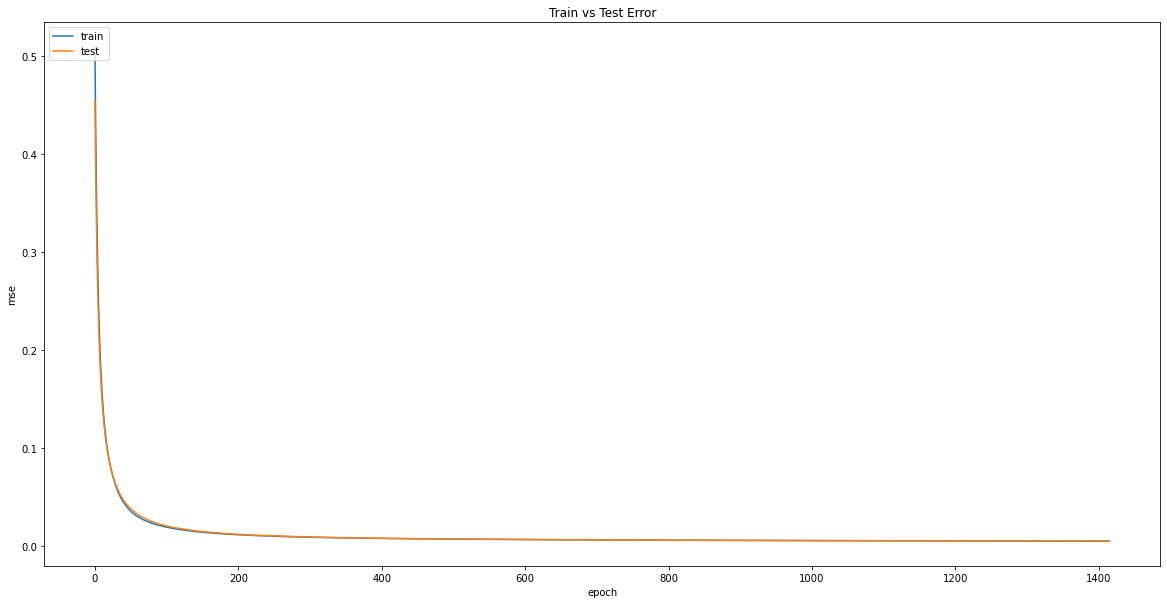

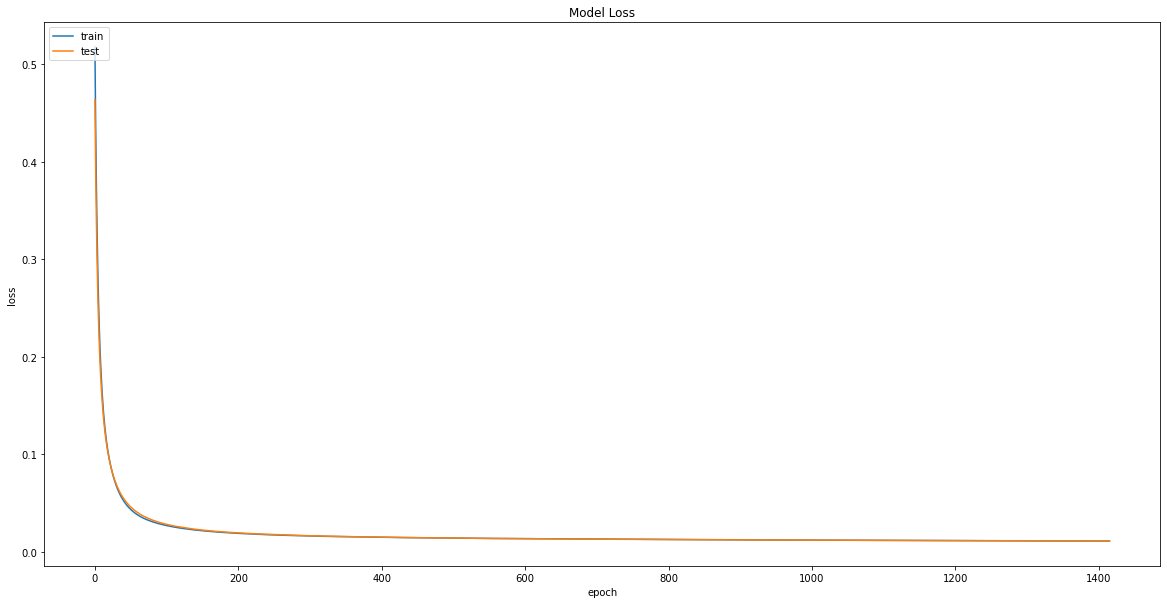

In [11]:
plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['mse'])
plt.plot(histories['qn1'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(histories['qn1'].history['loss'])
plt.plot(histories['qn1'].history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
y_pred = model.predict(X_test)

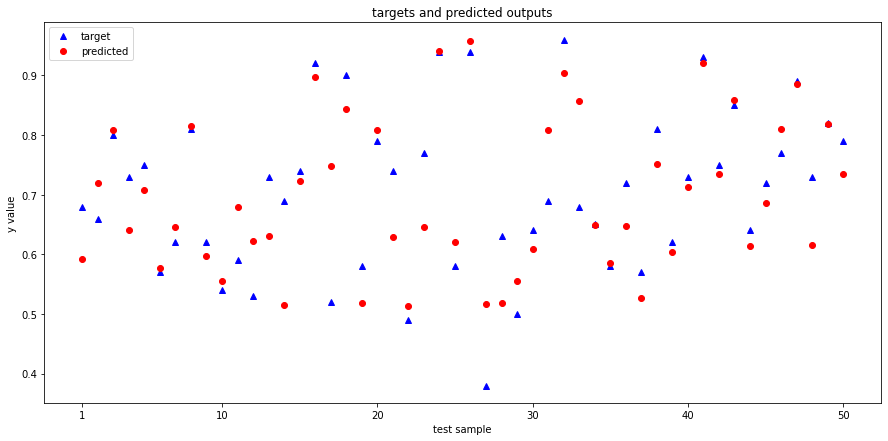

In [13]:
plt.figure(figsize=(15,7))
for i in range(0,50):
    plot_targets = plt.plot(i+1, y_test[i], 'b^')
    plot_pred = plt.plot(i+1, y_pred[i], 'ro')
plt.xlabel('test sample')
plt.ylabel('y value')
plt.xticks([1,10,20,30,40,50])
plt.title('targets and predicted outputs')
plt.legend(['target', 'predicted'], loc='upper left')

## Part B - Question 2

## Remove 1 Input

In [9]:
epochs = 1500
batch_size = 8
num_neurons = 10
seed = 10

histories={}
x_sets = []
y_sets = []

np.random.seed(seed)
tf.random.set_seed(seed)

#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')

X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[2,3,4,5,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,3,4,5,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,4,5,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,3,5,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,3,4,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)
final_x_set.append(X_data)
final_y_set.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,3,4,5,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,3,4,5,6]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

[[299.   100.     2.   ...   3.5    7.88   0.  ]
 [310.   102.     3.   ...   4.     8.02   1.  ]
 [324.   110.     3.   ...   4.     8.87   1.  ]
 ...
 [329.   113.     5.   ...   4.5    9.45   1.  ]
 [322.   104.     3.   ...   4.     8.84   1.  ]
 [324.   111.     4.   ...   3.     9.01   1.  ]]
[[100.     2.     3.     3.5    7.88   0.  ]
 [102.     3.     3.5    4.     8.02   1.  ]
 [110.     3.     3.5    4.     8.87   1.  ]
 ...
 [113.     5.     5.     4.5    9.45   1.  ]
 [104.     3.     3.5    4.     8.84   1.  ]
 [111.     4.     3.     3.     9.01   1.  ]]
[[299.     2.     3.     3.5    7.88   0.  ]
 [310.     3.     3.5    4.     8.02   1.  ]
 [324.     3.     3.5    4.     8.87   1.  ]
 ...
 [329.     5.     5.     4.5    9.45   1.  ]
 [322.     3.     3.5    4.     8.84   1.  ]
 [324.     4.     3.     3.     9.01   1.  ]]
[[299.   100.     3.     3.5    7.88   0.  ]
 [310.   102.     3.5    4.     8.02   1.  ]
 [324.   110.     3.5    4.     8.87   1.  ]
 ...
 [329.  

In [10]:
len(x_sets)

8

In [11]:
features_acc = []

for i in range(0,8):
    # create training and testing vars
    print("dataset " + str(i))
    x_sets[i] = (x_sets[i]- np.mean(x_sets[i], axis=0))/ np.std(x_sets[i], axis=0)
    X_train, X_test, Y_train, y_test = train_test_split(x_sets[i], y_sets[i], test_size=0.3, shuffle=False)
    print (X_train.shape, Y_train.shape)
    print (X_test.shape, y_test.shape)
    
    l2 = tf.keras.regularizers.l2(1e-3)
    
    # create a network
    model = Sequential([
            Dense(num_neurons, activation='relu', kernel_regularizer=l2),
            Dense(1)
    ])

    opt = tf.keras.optimizers.SGD(lr=0.001)

    model.compile(optimizer=opt,
                  loss="mean_squared_error",
                  metrics=['mse'])

    # learn the network
    histories['qn2_{}'.format(i)] = model.fit(X_train, Y_train,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 verbose = 2,
                                 validation_data=(X_test, y_test))
    
    features_acc.append(histories['qn2_{}'.format(i)].history['val_mse'][epochs-1])

dataset 0
(280, 7) (280, 1)
(120, 7) (120, 1)
Epoch 1/1500
35/35 - 0s - loss: 0.5042 - mse: 0.4954 - val_loss: 0.4970 - val_mse: 0.4883
Epoch 2/1500
35/35 - 0s - loss: 0.4297 - mse: 0.4210 - val_loss: 0.4245 - val_mse: 0.4158
Epoch 3/1500
35/35 - 0s - loss: 0.3720 - mse: 0.3634 - val_loss: 0.3673 - val_mse: 0.3586
Epoch 4/1500
35/35 - 0s - loss: 0.3264 - mse: 0.3177 - val_loss: 0.3217 - val_mse: 0.3130
Epoch 5/1500
35/35 - 0s - loss: 0.2895 - mse: 0.2809 - val_loss: 0.2846 - val_mse: 0.2760
Epoch 6/1500
35/35 - 0s - loss: 0.2596 - mse: 0.2510 - val_loss: 0.2539 - val_mse: 0.2453
Epoch 7/1500
35/35 - 0s - loss: 0.2349 - mse: 0.2263 - val_loss: 0.2286 - val_mse: 0.2200
Epoch 8/1500
35/35 - 0s - loss: 0.2145 - mse: 0.2060 - val_loss: 0.2074 - val_mse: 0.1988
Epoch 9/1500
35/35 - 0s - loss: 0.1973 - mse: 0.1887 - val_loss: 0.1894 - val_mse: 0.1808
Epoch 10/1500
35/35 - 0s - loss: 0.1827 - mse: 0.1741 - val_loss: 0.1740 - val_mse: 0.1655
Epoch 11/1500
35/35 - 0s - loss: 0.1701 - mse: 0.1616

Epoch 89/1500
35/35 - 0s - loss: 0.0291 - mse: 0.0210 - val_loss: 0.0264 - val_mse: 0.0183
Epoch 90/1500
35/35 - 0s - loss: 0.0289 - mse: 0.0208 - val_loss: 0.0263 - val_mse: 0.0182
Epoch 91/1500
35/35 - 0s - loss: 0.0287 - mse: 0.0206 - val_loss: 0.0261 - val_mse: 0.0180
Epoch 92/1500
35/35 - 0s - loss: 0.0285 - mse: 0.0204 - val_loss: 0.0259 - val_mse: 0.0179
Epoch 93/1500
35/35 - 0s - loss: 0.0283 - mse: 0.0202 - val_loss: 0.0258 - val_mse: 0.0177
Epoch 94/1500
35/35 - 0s - loss: 0.0281 - mse: 0.0200 - val_loss: 0.0256 - val_mse: 0.0175
Epoch 95/1500
35/35 - 0s - loss: 0.0279 - mse: 0.0198 - val_loss: 0.0255 - val_mse: 0.0174
Epoch 96/1500
35/35 - 0s - loss: 0.0277 - mse: 0.0196 - val_loss: 0.0253 - val_mse: 0.0172
Epoch 97/1500
35/35 - 0s - loss: 0.0275 - mse: 0.0194 - val_loss: 0.0252 - val_mse: 0.0171
Epoch 98/1500
35/35 - 0s - loss: 0.0273 - mse: 0.0192 - val_loss: 0.0250 - val_mse: 0.0170
Epoch 99/1500
35/35 - 0s - loss: 0.0271 - mse: 0.0191 - val_loss: 0.0249 - val_mse: 0.0168

Epoch 179/1500
35/35 - 0s - loss: 0.0195 - mse: 0.0116 - val_loss: 0.0191 - val_mse: 0.0112
Epoch 180/1500
35/35 - 0s - loss: 0.0195 - mse: 0.0116 - val_loss: 0.0191 - val_mse: 0.0112
Epoch 181/1500
35/35 - 0s - loss: 0.0194 - mse: 0.0115 - val_loss: 0.0190 - val_mse: 0.0112
Epoch 182/1500
35/35 - 0s - loss: 0.0194 - mse: 0.0115 - val_loss: 0.0190 - val_mse: 0.0111
Epoch 183/1500
35/35 - 0s - loss: 0.0193 - mse: 0.0114 - val_loss: 0.0190 - val_mse: 0.0111
Epoch 184/1500
35/35 - 0s - loss: 0.0193 - mse: 0.0114 - val_loss: 0.0189 - val_mse: 0.0111
Epoch 185/1500
35/35 - 0s - loss: 0.0192 - mse: 0.0114 - val_loss: 0.0189 - val_mse: 0.0110
Epoch 186/1500
35/35 - 0s - loss: 0.0192 - mse: 0.0113 - val_loss: 0.0188 - val_mse: 0.0110
Epoch 187/1500
35/35 - 0s - loss: 0.0191 - mse: 0.0113 - val_loss: 0.0188 - val_mse: 0.0110
Epoch 188/1500
35/35 - 0s - loss: 0.0191 - mse: 0.0112 - val_loss: 0.0188 - val_mse: 0.0109
Epoch 189/1500
35/35 - 0s - loss: 0.0190 - mse: 0.0112 - val_loss: 0.0187 - val_

35/35 - 0s - loss: 0.0165 - mse: 0.0088 - val_loss: 0.0169 - val_mse: 0.0092
Epoch 269/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0088 - val_loss: 0.0169 - val_mse: 0.0091
Epoch 270/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0087 - val_loss: 0.0168 - val_mse: 0.0091
Epoch 271/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0087 - val_loss: 0.0168 - val_mse: 0.0091
Epoch 272/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0087 - val_loss: 0.0168 - val_mse: 0.0091
Epoch 273/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0087 - val_loss: 0.0168 - val_mse: 0.0091
Epoch 274/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0087 - val_loss: 0.0168 - val_mse: 0.0091
Epoch 275/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0087 - val_loss: 0.0168 - val_mse: 0.0091
Epoch 276/1500
35/35 - 0s - loss: 0.0163 - mse: 0.0086 - val_loss: 0.0167 - val_mse: 0.0090
Epoch 277/1500
35/35 - 0s - loss: 0.0163 - mse: 0.0086 - val_loss: 0.0167 - val_mse: 0.0090
Epoch 278/1500
35/35 - 0s - loss: 0.0163 - mse: 0.0086 - val_loss: 0.0167 - val_mse: 0.0090
Epo

Epoch 358/1500
35/35 - 0s - loss: 0.0151 - mse: 0.0075 - val_loss: 0.0157 - val_mse: 0.0082
Epoch 359/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0075 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 360/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0075 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 361/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0074 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 362/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0074 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 363/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0074 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 364/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0074 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 365/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0074 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 366/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0074 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 367/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0074 - val_loss: 0.0156 - val_mse: 0.0081
Epoch 368/1500
35/35 - 0s - loss: 0.0149 - mse: 0.0074 - val_loss: 0.0156 - val_

35/35 - 0s - loss: 0.0142 - mse: 0.0068 - val_loss: 0.0150 - val_mse: 0.0075
Epoch 448/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0067 - val_loss: 0.0150 - val_mse: 0.0075
Epoch 449/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0067 - val_loss: 0.0150 - val_mse: 0.0075
Epoch 450/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0067 - val_loss: 0.0150 - val_mse: 0.0075
Epoch 451/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0067 - val_loss: 0.0150 - val_mse: 0.0075
Epoch 452/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0067 - val_loss: 0.0150 - val_mse: 0.0075
Epoch 453/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0067 - val_loss: 0.0150 - val_mse: 0.0075
Epoch 454/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0067 - val_loss: 0.0150 - val_mse: 0.0075
Epoch 455/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0067 - val_loss: 0.0149 - val_mse: 0.0075
Epoch 456/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0067 - val_loss: 0.0149 - val_mse: 0.0075
Epoch 457/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0067 - val_loss: 0.0149 - val_mse: 0.0075
Epo

Epoch 537/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0063 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 538/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0063 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 539/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0063 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 540/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0063 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 541/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0063 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 542/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0063 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 543/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0063 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 544/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0062 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 545/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0062 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 546/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0062 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 547/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0062 - val_loss: 0.0144 - val_

35/35 - 0s - loss: 0.0132 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0068
Epoch 627/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0068
Epoch 628/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0068
Epoch 629/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0068
Epoch 630/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0068
Epoch 631/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0068
Epoch 632/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0068
Epoch 633/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0068
Epoch 634/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0067
Epoch 635/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0067
Epoch 636/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0067
Epo

Epoch 716/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 717/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 718/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 719/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 720/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 721/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 722/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 723/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 724/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 725/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 726/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_

35/35 - 0s - loss: 0.0125 - mse: 0.0055 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 806/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0055 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 807/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0055 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 808/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0055 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 809/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0055 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 810/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0054 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 811/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0054 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 812/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0054 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 813/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0054 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 814/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0054 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 815/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0054 - val_loss: 0.0133 - val_mse: 0.0063
Epo

Epoch 895/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 896/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 897/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 898/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 899/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 900/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 901/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 902/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 903/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 904/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 905/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_

35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0060
Epoch 985/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0060
Epoch 986/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0060
Epoch 987/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0060
Epoch 988/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epoch 989/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epoch 990/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epoch 991/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epoch 992/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epoch 993/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epoch 994/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epo

Epoch 1073/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0050 - val_loss: 0.0126 - val_mse: 0.0058
Epoch 1074/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1075/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1076/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1077/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1078/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1079/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1080/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1081/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1082/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1083/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0050 - val_loss: 0.

35/35 - 0s - loss: 0.0116 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1162/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1163/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1164/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1165/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1166/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1167/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1168/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1169/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1170/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1171/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 

Epoch 1250/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1251/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1252/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1253/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1254/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1255/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1256/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1257/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1258/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1259/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1260/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.

35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1339/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1340/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1341/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1342/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1343/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1344/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1345/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1346/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1347/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1348/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 

Epoch 1427/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0118 - val_mse: 0.0054
Epoch 1428/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0118 - val_mse: 0.0054
Epoch 1429/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0118 - val_mse: 0.0054
Epoch 1430/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0118 - val_mse: 0.0054
Epoch 1431/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0118 - val_mse: 0.0054
Epoch 1432/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0118 - val_mse: 0.0054
Epoch 1433/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0118 - val_mse: 0.0054
Epoch 1434/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0118 - val_mse: 0.0054
Epoch 1435/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0118 - val_mse: 0.0054
Epoch 1436/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0118 - val_mse: 0.0054
Epoch 1437/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.

35/35 - 0s - loss: 0.1330 - mse: 0.1262 - val_loss: 0.1183 - val_mse: 0.1114
Epoch 14/1500
35/35 - 0s - loss: 0.1287 - mse: 0.1219 - val_loss: 0.1146 - val_mse: 0.1078
Epoch 15/1500
35/35 - 0s - loss: 0.1245 - mse: 0.1177 - val_loss: 0.1111 - val_mse: 0.1043
Epoch 16/1500
35/35 - 0s - loss: 0.1206 - mse: 0.1138 - val_loss: 0.1079 - val_mse: 0.1011
Epoch 17/1500
35/35 - 0s - loss: 0.1168 - mse: 0.1101 - val_loss: 0.1048 - val_mse: 0.0980
Epoch 18/1500
35/35 - 0s - loss: 0.1134 - mse: 0.1066 - val_loss: 0.1019 - val_mse: 0.0951
Epoch 19/1500
35/35 - 0s - loss: 0.1101 - mse: 0.1034 - val_loss: 0.0991 - val_mse: 0.0924
Epoch 20/1500
35/35 - 0s - loss: 0.1071 - mse: 0.1003 - val_loss: 0.0965 - val_mse: 0.0898
Epoch 21/1500
35/35 - 0s - loss: 0.1040 - mse: 0.0973 - val_loss: 0.0940 - val_mse: 0.0873
Epoch 22/1500
35/35 - 0s - loss: 0.1013 - mse: 0.0946 - val_loss: 0.0916 - val_mse: 0.0849
Epoch 23/1500
35/35 - 0s - loss: 0.0986 - mse: 0.0919 - val_loss: 0.0894 - val_mse: 0.0827
Epoch 24/1500

35/35 - 0s - loss: 0.0332 - mse: 0.0269 - val_loss: 0.0335 - val_mse: 0.0272
Epoch 104/1500
35/35 - 0s - loss: 0.0329 - mse: 0.0267 - val_loss: 0.0333 - val_mse: 0.0270
Epoch 105/1500
35/35 - 0s - loss: 0.0327 - mse: 0.0264 - val_loss: 0.0331 - val_mse: 0.0268
Epoch 106/1500
35/35 - 0s - loss: 0.0325 - mse: 0.0262 - val_loss: 0.0329 - val_mse: 0.0266
Epoch 107/1500
35/35 - 0s - loss: 0.0322 - mse: 0.0260 - val_loss: 0.0327 - val_mse: 0.0264
Epoch 108/1500
35/35 - 0s - loss: 0.0320 - mse: 0.0258 - val_loss: 0.0325 - val_mse: 0.0262
Epoch 109/1500
35/35 - 0s - loss: 0.0318 - mse: 0.0255 - val_loss: 0.0323 - val_mse: 0.0260
Epoch 110/1500
35/35 - 0s - loss: 0.0316 - mse: 0.0253 - val_loss: 0.0321 - val_mse: 0.0258
Epoch 111/1500
35/35 - 0s - loss: 0.0314 - mse: 0.0251 - val_loss: 0.0319 - val_mse: 0.0256
Epoch 112/1500
35/35 - 0s - loss: 0.0312 - mse: 0.0249 - val_loss: 0.0317 - val_mse: 0.0254
Epoch 113/1500
35/35 - 0s - loss: 0.0310 - mse: 0.0247 - val_loss: 0.0315 - val_mse: 0.0253
Epo

Epoch 193/1500
35/35 - 0s - loss: 0.0217 - mse: 0.0156 - val_loss: 0.0228 - val_mse: 0.0168
Epoch 194/1500
35/35 - 0s - loss: 0.0216 - mse: 0.0156 - val_loss: 0.0228 - val_mse: 0.0167
Epoch 195/1500
35/35 - 0s - loss: 0.0215 - mse: 0.0155 - val_loss: 0.0227 - val_mse: 0.0167
Epoch 196/1500
35/35 - 0s - loss: 0.0215 - mse: 0.0154 - val_loss: 0.0226 - val_mse: 0.0166
Epoch 197/1500
35/35 - 0s - loss: 0.0214 - mse: 0.0154 - val_loss: 0.0226 - val_mse: 0.0166
Epoch 198/1500
35/35 - 0s - loss: 0.0214 - mse: 0.0153 - val_loss: 0.0225 - val_mse: 0.0165
Epoch 199/1500
35/35 - 0s - loss: 0.0213 - mse: 0.0153 - val_loss: 0.0225 - val_mse: 0.0164
Epoch 200/1500
35/35 - 0s - loss: 0.0212 - mse: 0.0152 - val_loss: 0.0224 - val_mse: 0.0164
Epoch 201/1500
35/35 - 0s - loss: 0.0212 - mse: 0.0152 - val_loss: 0.0223 - val_mse: 0.0163
Epoch 202/1500
35/35 - 0s - loss: 0.0211 - mse: 0.0151 - val_loss: 0.0223 - val_mse: 0.0163
Epoch 203/1500
35/35 - 0s - loss: 0.0211 - mse: 0.0150 - val_loss: 0.0222 - val_

35/35 - 0s - loss: 0.0179 - mse: 0.0120 - val_loss: 0.0189 - val_mse: 0.0130
Epoch 283/1500
35/35 - 0s - loss: 0.0178 - mse: 0.0120 - val_loss: 0.0189 - val_mse: 0.0130
Epoch 284/1500
35/35 - 0s - loss: 0.0178 - mse: 0.0119 - val_loss: 0.0188 - val_mse: 0.0130
Epoch 285/1500
35/35 - 0s - loss: 0.0178 - mse: 0.0119 - val_loss: 0.0188 - val_mse: 0.0130
Epoch 286/1500
35/35 - 0s - loss: 0.0177 - mse: 0.0119 - val_loss: 0.0188 - val_mse: 0.0129
Epoch 287/1500
35/35 - 0s - loss: 0.0177 - mse: 0.0119 - val_loss: 0.0188 - val_mse: 0.0129
Epoch 288/1500
35/35 - 0s - loss: 0.0177 - mse: 0.0118 - val_loss: 0.0187 - val_mse: 0.0129
Epoch 289/1500
35/35 - 0s - loss: 0.0177 - mse: 0.0118 - val_loss: 0.0187 - val_mse: 0.0128
Epoch 290/1500
35/35 - 0s - loss: 0.0176 - mse: 0.0118 - val_loss: 0.0187 - val_mse: 0.0128
Epoch 291/1500
35/35 - 0s - loss: 0.0176 - mse: 0.0118 - val_loss: 0.0186 - val_mse: 0.0128
Epoch 292/1500
35/35 - 0s - loss: 0.0176 - mse: 0.0117 - val_loss: 0.0186 - val_mse: 0.0128
Epo

Epoch 372/1500
35/35 - 0s - loss: 0.0158 - mse: 0.0101 - val_loss: 0.0168 - val_mse: 0.0110
Epoch 373/1500
35/35 - 0s - loss: 0.0158 - mse: 0.0101 - val_loss: 0.0167 - val_mse: 0.0110
Epoch 374/1500
35/35 - 0s - loss: 0.0158 - mse: 0.0101 - val_loss: 0.0167 - val_mse: 0.0110
Epoch 375/1500
35/35 - 0s - loss: 0.0158 - mse: 0.0101 - val_loss: 0.0167 - val_mse: 0.0110
Epoch 376/1500
35/35 - 0s - loss: 0.0158 - mse: 0.0100 - val_loss: 0.0167 - val_mse: 0.0110
Epoch 377/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0100 - val_loss: 0.0167 - val_mse: 0.0109
Epoch 378/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0100 - val_loss: 0.0166 - val_mse: 0.0109
Epoch 379/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0100 - val_loss: 0.0166 - val_mse: 0.0109
Epoch 380/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0100 - val_loss: 0.0166 - val_mse: 0.0109
Epoch 381/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0100 - val_loss: 0.0166 - val_mse: 0.0109
Epoch 382/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0099 - val_loss: 0.0166 - val_

35/35 - 0s - loss: 0.0145 - mse: 0.0089 - val_loss: 0.0154 - val_mse: 0.0098
Epoch 462/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0089 - val_loss: 0.0154 - val_mse: 0.0098
Epoch 463/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0089 - val_loss: 0.0154 - val_mse: 0.0098
Epoch 464/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0089 - val_loss: 0.0154 - val_mse: 0.0098
Epoch 465/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0089 - val_loss: 0.0154 - val_mse: 0.0098
Epoch 466/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0089 - val_loss: 0.0153 - val_mse: 0.0097
Epoch 467/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0089 - val_loss: 0.0153 - val_mse: 0.0097
Epoch 468/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0089 - val_loss: 0.0153 - val_mse: 0.0097
Epoch 469/1500
35/35 - 0s - loss: 0.0144 - mse: 0.0088 - val_loss: 0.0153 - val_mse: 0.0097
Epoch 470/1500
35/35 - 0s - loss: 0.0144 - mse: 0.0088 - val_loss: 0.0153 - val_mse: 0.0097
Epoch 471/1500
35/35 - 0s - loss: 0.0144 - mse: 0.0088 - val_loss: 0.0153 - val_mse: 0.0097
Epo

Epoch 551/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0081 - val_loss: 0.0144 - val_mse: 0.0089
Epoch 552/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0081 - val_loss: 0.0144 - val_mse: 0.0089
Epoch 553/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0081 - val_loss: 0.0144 - val_mse: 0.0089
Epoch 554/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0081 - val_loss: 0.0144 - val_mse: 0.0089
Epoch 555/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0081 - val_loss: 0.0144 - val_mse: 0.0089
Epoch 556/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0080 - val_loss: 0.0144 - val_mse: 0.0089
Epoch 557/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0080 - val_loss: 0.0144 - val_mse: 0.0089
Epoch 558/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0080 - val_loss: 0.0144 - val_mse: 0.0089
Epoch 559/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0080 - val_loss: 0.0144 - val_mse: 0.0089
Epoch 560/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0080 - val_loss: 0.0144 - val_mse: 0.0089
Epoch 561/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0080 - val_loss: 0.0143 - val_

35/35 - 0s - loss: 0.0128 - mse: 0.0074 - val_loss: 0.0137 - val_mse: 0.0083
Epoch 641/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0074 - val_loss: 0.0137 - val_mse: 0.0083
Epoch 642/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0074 - val_loss: 0.0137 - val_mse: 0.0083
Epoch 643/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0074 - val_loss: 0.0137 - val_mse: 0.0083
Epoch 644/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0074 - val_loss: 0.0137 - val_mse: 0.0083
Epoch 645/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0074 - val_loss: 0.0137 - val_mse: 0.0083
Epoch 646/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0074 - val_loss: 0.0137 - val_mse: 0.0083
Epoch 647/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0074 - val_loss: 0.0137 - val_mse: 0.0083
Epoch 648/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0074 - val_loss: 0.0136 - val_mse: 0.0083
Epoch 649/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0074 - val_loss: 0.0136 - val_mse: 0.0083
Epoch 650/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0074 - val_loss: 0.0136 - val_mse: 0.0082
Epo

Epoch 730/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0069 - val_loss: 0.0131 - val_mse: 0.0078
Epoch 731/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0069 - val_loss: 0.0131 - val_mse: 0.0078
Epoch 732/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0069 - val_loss: 0.0131 - val_mse: 0.0078
Epoch 733/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0069 - val_loss: 0.0131 - val_mse: 0.0078
Epoch 734/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0069 - val_loss: 0.0131 - val_mse: 0.0078
Epoch 735/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0069 - val_loss: 0.0131 - val_mse: 0.0078
Epoch 736/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0069 - val_loss: 0.0131 - val_mse: 0.0078
Epoch 737/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0069 - val_loss: 0.0131 - val_mse: 0.0078
Epoch 738/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0069 - val_loss: 0.0131 - val_mse: 0.0078
Epoch 739/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0069 - val_loss: 0.0131 - val_mse: 0.0078
Epoch 740/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0069 - val_loss: 0.0131 - val_

35/35 - 0s - loss: 0.0118 - mse: 0.0066 - val_loss: 0.0126 - val_mse: 0.0074
Epoch 820/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0065 - val_loss: 0.0126 - val_mse: 0.0074
Epoch 821/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0065 - val_loss: 0.0126 - val_mse: 0.0074
Epoch 822/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0065 - val_loss: 0.0126 - val_mse: 0.0074
Epoch 823/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0065 - val_loss: 0.0126 - val_mse: 0.0074
Epoch 824/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0065 - val_loss: 0.0126 - val_mse: 0.0074
Epoch 825/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0065 - val_loss: 0.0126 - val_mse: 0.0074
Epoch 826/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0065 - val_loss: 0.0126 - val_mse: 0.0074
Epoch 827/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0065 - val_loss: 0.0126 - val_mse: 0.0074
Epoch 828/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0065 - val_loss: 0.0126 - val_mse: 0.0074
Epoch 829/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0065 - val_loss: 0.0126 - val_mse: 0.0074
Epo

Epoch 909/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0062 - val_loss: 0.0122 - val_mse: 0.0071
Epoch 910/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0062 - val_loss: 0.0122 - val_mse: 0.0071
Epoch 911/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0062 - val_loss: 0.0122 - val_mse: 0.0071
Epoch 912/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0062 - val_loss: 0.0122 - val_mse: 0.0071
Epoch 913/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0062 - val_loss: 0.0122 - val_mse: 0.0070
Epoch 914/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0122 - val_mse: 0.0070
Epoch 915/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0122 - val_mse: 0.0070
Epoch 916/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0122 - val_mse: 0.0070
Epoch 917/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0122 - val_mse: 0.0070
Epoch 918/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0122 - val_mse: 0.0070
Epoch 919/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0122 - val_

35/35 - 0s - loss: 0.0110 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 999/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1000/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1001/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1002/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1003/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1004/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1005/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1006/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1007/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1008/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0118 - val_mse: 0

Epoch 1087/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0057 - val_loss: 0.0115 - val_mse: 0.0066
Epoch 1088/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0057 - val_loss: 0.0115 - val_mse: 0.0066
Epoch 1089/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0057 - val_loss: 0.0115 - val_mse: 0.0066
Epoch 1090/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0057 - val_loss: 0.0115 - val_mse: 0.0066
Epoch 1091/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0057 - val_loss: 0.0115 - val_mse: 0.0066
Epoch 1092/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0057 - val_loss: 0.0115 - val_mse: 0.0065
Epoch 1093/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0057 - val_loss: 0.0115 - val_mse: 0.0065
Epoch 1094/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0057 - val_loss: 0.0115 - val_mse: 0.0065
Epoch 1095/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0057 - val_loss: 0.0115 - val_mse: 0.0065
Epoch 1096/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0057 - val_loss: 0.0115 - val_mse: 0.0065
Epoch 1097/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0057 - val_loss: 0.

Epoch 1176/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0056 - val_loss: 0.0113 - val_mse: 0.0064
Epoch 1177/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0056 - val_loss: 0.0113 - val_mse: 0.0064
Epoch 1178/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0056 - val_loss: 0.0113 - val_mse: 0.0064
Epoch 1179/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0056 - val_loss: 0.0113 - val_mse: 0.0064
Epoch 1180/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0056 - val_loss: 0.0113 - val_mse: 0.0064
Epoch 1181/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0056 - val_loss: 0.0113 - val_mse: 0.0064
Epoch 1182/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0056 - val_loss: 0.0113 - val_mse: 0.0064
Epoch 1183/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0055 - val_loss: 0.0113 - val_mse: 0.0064
Epoch 1184/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0113 - val_mse: 0.0064
Epoch 1185/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 1186/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.

35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 1265/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 1266/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 1267/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 1268/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 1269/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 1270/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 1271/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 1272/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 1273/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 1274/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 

Epoch 1353/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0061
Epoch 1354/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0061
Epoch 1355/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0061
Epoch 1356/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0061
Epoch 1357/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0061
Epoch 1358/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0061
Epoch 1359/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0061
Epoch 1360/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0060
Epoch 1361/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0060
Epoch 1362/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0060
Epoch 1363/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0052 - val_loss: 0.

35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 1442/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 1443/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 1444/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 1445/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 1446/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 1447/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 1448/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 1449/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 1450/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 1451/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 

Epoch 30/1500
35/35 - 0s - loss: 0.0599 - mse: 0.0531 - val_loss: 0.0495 - val_mse: 0.0427
Epoch 31/1500
35/35 - 0s - loss: 0.0589 - mse: 0.0520 - val_loss: 0.0488 - val_mse: 0.0420
Epoch 32/1500
35/35 - 0s - loss: 0.0578 - mse: 0.0510 - val_loss: 0.0480 - val_mse: 0.0412
Epoch 33/1500
35/35 - 0s - loss: 0.0568 - mse: 0.0500 - val_loss: 0.0473 - val_mse: 0.0405
Epoch 34/1500
35/35 - 0s - loss: 0.0558 - mse: 0.0490 - val_loss: 0.0466 - val_mse: 0.0398
Epoch 35/1500
35/35 - 0s - loss: 0.0548 - mse: 0.0480 - val_loss: 0.0459 - val_mse: 0.0391
Epoch 36/1500
35/35 - 0s - loss: 0.0539 - mse: 0.0471 - val_loss: 0.0452 - val_mse: 0.0385
Epoch 37/1500
35/35 - 0s - loss: 0.0530 - mse: 0.0462 - val_loss: 0.0447 - val_mse: 0.0379
Epoch 38/1500
35/35 - 0s - loss: 0.0522 - mse: 0.0454 - val_loss: 0.0440 - val_mse: 0.0372
Epoch 39/1500
35/35 - 0s - loss: 0.0513 - mse: 0.0446 - val_loss: 0.0434 - val_mse: 0.0366
Epoch 40/1500
35/35 - 0s - loss: 0.0505 - mse: 0.0438 - val_loss: 0.0428 - val_mse: 0.0361

Epoch 120/1500
35/35 - 0s - loss: 0.0244 - mse: 0.0179 - val_loss: 0.0235 - val_mse: 0.0170
Epoch 121/1500
35/35 - 0s - loss: 0.0243 - mse: 0.0178 - val_loss: 0.0234 - val_mse: 0.0169
Epoch 122/1500
35/35 - 0s - loss: 0.0241 - mse: 0.0176 - val_loss: 0.0233 - val_mse: 0.0168
Epoch 123/1500
35/35 - 0s - loss: 0.0240 - mse: 0.0175 - val_loss: 0.0232 - val_mse: 0.0167
Epoch 124/1500
35/35 - 0s - loss: 0.0239 - mse: 0.0174 - val_loss: 0.0230 - val_mse: 0.0166
Epoch 125/1500
35/35 - 0s - loss: 0.0238 - mse: 0.0173 - val_loss: 0.0229 - val_mse: 0.0165
Epoch 126/1500
35/35 - 0s - loss: 0.0236 - mse: 0.0171 - val_loss: 0.0228 - val_mse: 0.0164
Epoch 127/1500
35/35 - 0s - loss: 0.0235 - mse: 0.0170 - val_loss: 0.0227 - val_mse: 0.0163
Epoch 128/1500
35/35 - 0s - loss: 0.0234 - mse: 0.0169 - val_loss: 0.0227 - val_mse: 0.0162
Epoch 129/1500
35/35 - 0s - loss: 0.0233 - mse: 0.0168 - val_loss: 0.0226 - val_mse: 0.0161
Epoch 130/1500
35/35 - 0s - loss: 0.0232 - mse: 0.0167 - val_loss: 0.0225 - val_

35/35 - 0s - loss: 0.0178 - mse: 0.0115 - val_loss: 0.0173 - val_mse: 0.0110
Epoch 210/1500
35/35 - 0s - loss: 0.0178 - mse: 0.0114 - val_loss: 0.0173 - val_mse: 0.0110
Epoch 211/1500
35/35 - 0s - loss: 0.0177 - mse: 0.0114 - val_loss: 0.0172 - val_mse: 0.0109
Epoch 212/1500
35/35 - 0s - loss: 0.0177 - mse: 0.0114 - val_loss: 0.0172 - val_mse: 0.0109
Epoch 213/1500
35/35 - 0s - loss: 0.0176 - mse: 0.0113 - val_loss: 0.0171 - val_mse: 0.0108
Epoch 214/1500
35/35 - 0s - loss: 0.0176 - mse: 0.0113 - val_loss: 0.0171 - val_mse: 0.0108
Epoch 215/1500
35/35 - 0s - loss: 0.0176 - mse: 0.0113 - val_loss: 0.0170 - val_mse: 0.0107
Epoch 216/1500
35/35 - 0s - loss: 0.0175 - mse: 0.0112 - val_loss: 0.0170 - val_mse: 0.0107
Epoch 217/1500
35/35 - 0s - loss: 0.0175 - mse: 0.0112 - val_loss: 0.0170 - val_mse: 0.0107
Epoch 218/1500
35/35 - 0s - loss: 0.0174 - mse: 0.0111 - val_loss: 0.0169 - val_mse: 0.0106
Epoch 219/1500
35/35 - 0s - loss: 0.0174 - mse: 0.0111 - val_loss: 0.0169 - val_mse: 0.0106
Epo

Epoch 299/1500
35/35 - 0s - loss: 0.0149 - mse: 0.0088 - val_loss: 0.0145 - val_mse: 0.0084
Epoch 300/1500
35/35 - 0s - loss: 0.0149 - mse: 0.0087 - val_loss: 0.0145 - val_mse: 0.0083
Epoch 301/1500
35/35 - 0s - loss: 0.0149 - mse: 0.0087 - val_loss: 0.0145 - val_mse: 0.0083
Epoch 302/1500
35/35 - 0s - loss: 0.0149 - mse: 0.0087 - val_loss: 0.0145 - val_mse: 0.0083
Epoch 303/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0087 - val_loss: 0.0144 - val_mse: 0.0083
Epoch 304/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0087 - val_loss: 0.0144 - val_mse: 0.0083
Epoch 305/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0086 - val_loss: 0.0144 - val_mse: 0.0083
Epoch 306/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0086 - val_loss: 0.0144 - val_mse: 0.0082
Epoch 307/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0086 - val_loss: 0.0144 - val_mse: 0.0082
Epoch 308/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0086 - val_loss: 0.0143 - val_mse: 0.0082
Epoch 309/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0086 - val_loss: 0.0143 - val_

Epoch 389/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0073 - val_loss: 0.0132 - val_mse: 0.0071
Epoch 390/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0073 - val_loss: 0.0132 - val_mse: 0.0071
Epoch 391/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0073 - val_loss: 0.0132 - val_mse: 0.0071
Epoch 392/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0073 - val_loss: 0.0132 - val_mse: 0.0071
Epoch 393/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0073 - val_loss: 0.0131 - val_mse: 0.0071
Epoch 394/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0073 - val_loss: 0.0131 - val_mse: 0.0071
Epoch 395/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0072 - val_loss: 0.0131 - val_mse: 0.0071
Epoch 396/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0072 - val_loss: 0.0131 - val_mse: 0.0071
Epoch 397/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0072 - val_loss: 0.0131 - val_mse: 0.0071
Epoch 398/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0072 - val_loss: 0.0131 - val_mse: 0.0071
Epoch 399/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0072 - val_loss: 0.0131 - val_

Epoch 479/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0064 - val_loss: 0.0124 - val_mse: 0.0064
Epoch 480/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0064 - val_loss: 0.0124 - val_mse: 0.0064
Epoch 481/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0064 - val_loss: 0.0124 - val_mse: 0.0064
Epoch 482/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0064 - val_loss: 0.0124 - val_mse: 0.0064
Epoch 483/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0064 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 484/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0064 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 485/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0064 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 486/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0064 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 487/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0064 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 488/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0064 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 489/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0063 - val_loss: 0.0123 - val_

35/35 - 0s - loss: 0.0117 - mse: 0.0058 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 569/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0058 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 570/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0058 - val_loss: 0.0117 - val_mse: 0.0059
Epoch 571/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0058 - val_loss: 0.0117 - val_mse: 0.0059
Epoch 572/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0058 - val_loss: 0.0117 - val_mse: 0.0059
Epoch 573/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0058 - val_loss: 0.0117 - val_mse: 0.0059
Epoch 574/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0058 - val_loss: 0.0117 - val_mse: 0.0059
Epoch 575/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0058 - val_loss: 0.0117 - val_mse: 0.0059
Epoch 576/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0058 - val_loss: 0.0117 - val_mse: 0.0059
Epoch 577/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0058 - val_loss: 0.0117 - val_mse: 0.0059
Epoch 578/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0058 - val_loss: 0.0117 - val_mse: 0.0059
Epo

Epoch 658/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0055 - val_loss: 0.0113 - val_mse: 0.0056
Epoch 659/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0055 - val_loss: 0.0113 - val_mse: 0.0056
Epoch 660/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0113 - val_mse: 0.0056
Epoch 661/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0113 - val_mse: 0.0055
Epoch 662/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0113 - val_mse: 0.0055
Epoch 663/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0113 - val_mse: 0.0055
Epoch 664/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0113 - val_mse: 0.0055
Epoch 665/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0113 - val_mse: 0.0055
Epoch 666/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0113 - val_mse: 0.0055
Epoch 667/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0113 - val_mse: 0.0055
Epoch 668/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0113 - val_

Epoch 748/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0052 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 749/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0052 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 750/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0052 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 751/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0052 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 752/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0052 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 753/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0052 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 754/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0052 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 755/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0052 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 756/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0052 - val_loss: 0.0110 - val_mse: 0.0053
Epoch 757/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0052 - val_loss: 0.0110 - val_mse: 0.0053
Epoch 758/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0110 - val_

35/35 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 838/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 839/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 840/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 841/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 842/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 843/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 844/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 845/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 846/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 847/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0108 - val_mse: 0.0052
Epo

Epoch 927/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0106 - val_mse: 0.0051
Epoch 928/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0106 - val_mse: 0.0051
Epoch 929/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0106 - val_mse: 0.0051
Epoch 930/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0106 - val_mse: 0.0051
Epoch 931/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0106 - val_mse: 0.0051
Epoch 932/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0106 - val_mse: 0.0051
Epoch 933/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0106 - val_mse: 0.0051
Epoch 934/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0106 - val_mse: 0.0051
Epoch 935/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0106 - val_mse: 0.0051
Epoch 936/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0106 - val_mse: 0.0051
Epoch 937/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0106 - val_

Epoch 1016/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 1017/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 1018/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 1019/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 1020/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 1021/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 1022/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 1023/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 1024/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 1025/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 1026/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.

Epoch 1105/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0046 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 1106/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0046 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 1107/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0046 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 1108/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0046 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 1109/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0046 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 1110/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0046 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 1111/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0046 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 1112/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0046 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 1113/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0046 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 1114/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0046 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 1115/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0046 - val_loss: 0.

Epoch 1282/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0044 - val_loss: 0.0099 - val_mse: 0.0047
Epoch 1283/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0044 - val_loss: 0.0099 - val_mse: 0.0047
Epoch 1284/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0044 - val_loss: 0.0099 - val_mse: 0.0047
Epoch 1285/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0044 - val_loss: 0.0099 - val_mse: 0.0047
Epoch 1286/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0044 - val_loss: 0.0099 - val_mse: 0.0047
Epoch 1287/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0044 - val_loss: 0.0099 - val_mse: 0.0047
Epoch 1288/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0044 - val_loss: 0.0099 - val_mse: 0.0047
Epoch 1289/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0044 - val_loss: 0.0099 - val_mse: 0.0047
Epoch 1290/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0044 - val_loss: 0.0099 - val_mse: 0.0047
Epoch 1291/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0044 - val_loss: 0.0099 - val_mse: 0.0047
Epoch 1292/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0044 - val_loss: 0.

Epoch 1371/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0043 - val_loss: 0.0098 - val_mse: 0.0046
Epoch 1372/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0043 - val_loss: 0.0098 - val_mse: 0.0046
Epoch 1373/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0043 - val_loss: 0.0098 - val_mse: 0.0046
Epoch 1374/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0043 - val_loss: 0.0098 - val_mse: 0.0046
Epoch 1375/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0043 - val_loss: 0.0098 - val_mse: 0.0046
Epoch 1376/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0043 - val_loss: 0.0098 - val_mse: 0.0046
Epoch 1377/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0043 - val_loss: 0.0098 - val_mse: 0.0046
Epoch 1378/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0043 - val_loss: 0.0098 - val_mse: 0.0046
Epoch 1379/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0043 - val_loss: 0.0098 - val_mse: 0.0046
Epoch 1380/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0043 - val_loss: 0.0098 - val_mse: 0.0046
Epoch 1381/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0043 - val_loss: 0.

Epoch 1460/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0042 - val_loss: 0.0097 - val_mse: 0.0046
Epoch 1461/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0042 - val_loss: 0.0097 - val_mse: 0.0046
Epoch 1462/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0042 - val_loss: 0.0097 - val_mse: 0.0046
Epoch 1463/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0042 - val_loss: 0.0097 - val_mse: 0.0046
Epoch 1464/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0042 - val_loss: 0.0097 - val_mse: 0.0046
Epoch 1465/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0042 - val_loss: 0.0097 - val_mse: 0.0046
Epoch 1466/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0042 - val_loss: 0.0097 - val_mse: 0.0046
Epoch 1467/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0042 - val_loss: 0.0097 - val_mse: 0.0046
Epoch 1468/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0042 - val_loss: 0.0097 - val_mse: 0.0046
Epoch 1469/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0042 - val_loss: 0.0096 - val_mse: 0.0046
Epoch 1470/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0042 - val_loss: 0.

Epoch 47/1500
35/35 - 0s - loss: 0.0413 - mse: 0.0353 - val_loss: 0.0474 - val_mse: 0.0414
Epoch 48/1500
35/35 - 0s - loss: 0.0408 - mse: 0.0348 - val_loss: 0.0467 - val_mse: 0.0407
Epoch 49/1500
35/35 - 0s - loss: 0.0402 - mse: 0.0342 - val_loss: 0.0461 - val_mse: 0.0401
Epoch 50/1500
35/35 - 0s - loss: 0.0397 - mse: 0.0338 - val_loss: 0.0454 - val_mse: 0.0394
Epoch 51/1500
35/35 - 0s - loss: 0.0392 - mse: 0.0332 - val_loss: 0.0448 - val_mse: 0.0389
Epoch 52/1500
35/35 - 0s - loss: 0.0387 - mse: 0.0327 - val_loss: 0.0443 - val_mse: 0.0383
Epoch 53/1500
35/35 - 0s - loss: 0.0383 - mse: 0.0323 - val_loss: 0.0437 - val_mse: 0.0377
Epoch 54/1500
35/35 - 0s - loss: 0.0378 - mse: 0.0318 - val_loss: 0.0432 - val_mse: 0.0372
Epoch 55/1500
35/35 - 0s - loss: 0.0374 - mse: 0.0314 - val_loss: 0.0427 - val_mse: 0.0367
Epoch 56/1500
35/35 - 0s - loss: 0.0370 - mse: 0.0310 - val_loss: 0.0421 - val_mse: 0.0362
Epoch 57/1500
35/35 - 0s - loss: 0.0365 - mse: 0.0306 - val_loss: 0.0416 - val_mse: 0.0357

Epoch 137/1500
35/35 - 0s - loss: 0.0220 - mse: 0.0163 - val_loss: 0.0253 - val_mse: 0.0195
Epoch 138/1500
35/35 - 0s - loss: 0.0219 - mse: 0.0162 - val_loss: 0.0252 - val_mse: 0.0195
Epoch 139/1500
35/35 - 0s - loss: 0.0218 - mse: 0.0161 - val_loss: 0.0251 - val_mse: 0.0194
Epoch 140/1500
35/35 - 0s - loss: 0.0218 - mse: 0.0160 - val_loss: 0.0250 - val_mse: 0.0193
Epoch 141/1500
35/35 - 0s - loss: 0.0217 - mse: 0.0159 - val_loss: 0.0250 - val_mse: 0.0192
Epoch 142/1500
35/35 - 0s - loss: 0.0216 - mse: 0.0159 - val_loss: 0.0249 - val_mse: 0.0191
Epoch 143/1500
35/35 - 0s - loss: 0.0215 - mse: 0.0158 - val_loss: 0.0248 - val_mse: 0.0191
Epoch 144/1500
35/35 - 0s - loss: 0.0214 - mse: 0.0157 - val_loss: 0.0247 - val_mse: 0.0190
Epoch 145/1500
35/35 - 0s - loss: 0.0214 - mse: 0.0156 - val_loss: 0.0247 - val_mse: 0.0189
Epoch 146/1500
35/35 - 0s - loss: 0.0213 - mse: 0.0156 - val_loss: 0.0246 - val_mse: 0.0188
Epoch 147/1500
35/35 - 0s - loss: 0.0212 - mse: 0.0155 - val_loss: 0.0245 - val_

Epoch 227/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0116 - val_loss: 0.0205 - val_mse: 0.0149
Epoch 228/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0116 - val_loss: 0.0205 - val_mse: 0.0149
Epoch 229/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0116 - val_loss: 0.0204 - val_mse: 0.0148
Epoch 230/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0115 - val_loss: 0.0204 - val_mse: 0.0148
Epoch 231/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0115 - val_loss: 0.0203 - val_mse: 0.0148
Epoch 232/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0115 - val_loss: 0.0203 - val_mse: 0.0147
Epoch 233/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0114 - val_loss: 0.0203 - val_mse: 0.0147
Epoch 234/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0114 - val_loss: 0.0202 - val_mse: 0.0147
Epoch 235/1500
35/35 - 0s - loss: 0.0169 - mse: 0.0114 - val_loss: 0.0202 - val_mse: 0.0147
Epoch 236/1500
35/35 - 0s - loss: 0.0169 - mse: 0.0114 - val_loss: 0.0202 - val_mse: 0.0146
Epoch 237/1500
35/35 - 0s - loss: 0.0169 - mse: 0.0113 - val_loss: 0.0201 - val_

Epoch 317/1500
35/35 - 0s - loss: 0.0149 - mse: 0.0094 - val_loss: 0.0180 - val_mse: 0.0126
Epoch 318/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0094 - val_loss: 0.0180 - val_mse: 0.0125
Epoch 319/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0094 - val_loss: 0.0180 - val_mse: 0.0125
Epoch 320/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0094 - val_loss: 0.0179 - val_mse: 0.0125
Epoch 321/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0093 - val_loss: 0.0179 - val_mse: 0.0125
Epoch 322/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0093 - val_loss: 0.0179 - val_mse: 0.0125
Epoch 323/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0093 - val_loss: 0.0179 - val_mse: 0.0124
Epoch 324/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0093 - val_loss: 0.0178 - val_mse: 0.0124
Epoch 325/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0093 - val_loss: 0.0178 - val_mse: 0.0124
Epoch 326/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0093 - val_loss: 0.0178 - val_mse: 0.0124
Epoch 327/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0092 - val_loss: 0.0178 - val_

Epoch 407/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0081 - val_loss: 0.0163 - val_mse: 0.0110
Epoch 408/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0081 - val_loss: 0.0163 - val_mse: 0.0110
Epoch 409/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0081 - val_loss: 0.0163 - val_mse: 0.0110
Epoch 410/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0081 - val_loss: 0.0163 - val_mse: 0.0110
Epoch 411/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0081 - val_loss: 0.0163 - val_mse: 0.0110
Epoch 412/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0080 - val_loss: 0.0162 - val_mse: 0.0109
Epoch 413/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0080 - val_loss: 0.0162 - val_mse: 0.0109
Epoch 414/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0080 - val_loss: 0.0162 - val_mse: 0.0109
Epoch 415/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0080 - val_loss: 0.0162 - val_mse: 0.0109
Epoch 416/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0080 - val_loss: 0.0162 - val_mse: 0.0109
Epoch 417/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0080 - val_loss: 0.0162 - val_

35/35 - 0s - loss: 0.0125 - mse: 0.0073 - val_loss: 0.0151 - val_mse: 0.0099
Epoch 497/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0072 - val_loss: 0.0151 - val_mse: 0.0099
Epoch 498/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0072 - val_loss: 0.0151 - val_mse: 0.0099
Epoch 499/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0072 - val_loss: 0.0151 - val_mse: 0.0099
Epoch 500/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0072 - val_loss: 0.0151 - val_mse: 0.0099
Epoch 501/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0072 - val_loss: 0.0151 - val_mse: 0.0099
Epoch 502/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0072 - val_loss: 0.0151 - val_mse: 0.0099
Epoch 503/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0072 - val_loss: 0.0151 - val_mse: 0.0099
Epoch 504/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0072 - val_loss: 0.0151 - val_mse: 0.0099
Epoch 505/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0072 - val_loss: 0.0150 - val_mse: 0.0098
Epoch 506/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0072 - val_loss: 0.0150 - val_mse: 0.0098
Epo

Epoch 586/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0067 - val_loss: 0.0143 - val_mse: 0.0092
Epoch 587/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0067 - val_loss: 0.0143 - val_mse: 0.0092
Epoch 588/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0067 - val_loss: 0.0143 - val_mse: 0.0092
Epoch 589/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0066 - val_loss: 0.0143 - val_mse: 0.0091
Epoch 590/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0066 - val_loss: 0.0142 - val_mse: 0.0091
Epoch 591/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0142 - val_mse: 0.0091
Epoch 592/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0142 - val_mse: 0.0091
Epoch 593/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0142 - val_mse: 0.0091
Epoch 594/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0142 - val_mse: 0.0091
Epoch 595/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0142 - val_mse: 0.0091
Epoch 596/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0142 - val_

Epoch 676/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0136 - val_mse: 0.0086
Epoch 677/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0136 - val_mse: 0.0086
Epoch 678/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0136 - val_mse: 0.0086
Epoch 679/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0136 - val_mse: 0.0085
Epoch 680/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0136 - val_mse: 0.0085
Epoch 681/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0062 - val_loss: 0.0136 - val_mse: 0.0085
Epoch 682/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0062 - val_loss: 0.0136 - val_mse: 0.0085
Epoch 683/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0062 - val_loss: 0.0135 - val_mse: 0.0085
Epoch 684/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0062 - val_loss: 0.0135 - val_mse: 0.0085
Epoch 685/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0062 - val_loss: 0.0135 - val_mse: 0.0085
Epoch 686/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0062 - val_loss: 0.0135 - val_

Epoch 855/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0126 - val_mse: 0.0078
Epoch 856/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0126 - val_mse: 0.0078
Epoch 857/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0126 - val_mse: 0.0078
Epoch 858/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0126 - val_mse: 0.0078
Epoch 859/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0126 - val_mse: 0.0078
Epoch 860/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0126 - val_mse: 0.0078
Epoch 861/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0126 - val_mse: 0.0078
Epoch 862/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0126 - val_mse: 0.0077
Epoch 863/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0126 - val_mse: 0.0077
Epoch 864/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0126 - val_mse: 0.0077
Epoch 865/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0126 - val_

Epoch 945/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0075
Epoch 946/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0075
Epoch 947/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0075
Epoch 948/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0055 - val_loss: 0.0122 - val_mse: 0.0075
Epoch 949/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0055 - val_loss: 0.0122 - val_mse: 0.0075
Epoch 950/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0055 - val_loss: 0.0122 - val_mse: 0.0075
Epoch 951/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0055 - val_loss: 0.0122 - val_mse: 0.0075
Epoch 952/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0055 - val_loss: 0.0122 - val_mse: 0.0075
Epoch 953/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0055 - val_loss: 0.0122 - val_mse: 0.0075
Epoch 954/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0122 - val_mse: 0.0075
Epoch 955/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0122 - val_

Epoch 1034/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0072
Epoch 1035/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0072
Epoch 1036/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0072
Epoch 1037/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0072
Epoch 1038/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0072
Epoch 1039/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0072
Epoch 1040/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0072
Epoch 1041/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0072
Epoch 1042/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0072
Epoch 1043/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0072
Epoch 1044/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.

35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0070
Epoch 1123/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0070
Epoch 1124/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0070
Epoch 1125/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0070
Epoch 1126/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0070
Epoch 1127/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0070
Epoch 1128/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0070
Epoch 1129/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0070
Epoch 1130/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0070
Epoch 1131/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 0.0070
Epoch 1132/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0051 - val_loss: 0.0117 - val_mse: 

Epoch 1211/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 1212/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 1213/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 1214/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 1215/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 1216/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 1217/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 1218/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 1219/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 1220/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 1221/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.

35/35 - 0s - loss: 0.0094 - mse: 0.0049 - val_loss: 0.0112 - val_mse: 0.0067
Epoch 1300/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0049 - val_loss: 0.0112 - val_mse: 0.0067
Epoch 1301/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0049 - val_loss: 0.0112 - val_mse: 0.0067
Epoch 1302/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0049 - val_loss: 0.0112 - val_mse: 0.0067
Epoch 1303/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0049 - val_loss: 0.0112 - val_mse: 0.0067
Epoch 1304/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0049 - val_loss: 0.0112 - val_mse: 0.0067
Epoch 1305/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0049 - val_loss: 0.0112 - val_mse: 0.0067
Epoch 1306/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0049 - val_loss: 0.0112 - val_mse: 0.0067
Epoch 1307/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0049 - val_loss: 0.0112 - val_mse: 0.0067
Epoch 1308/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0049 - val_loss: 0.0112 - val_mse: 0.0067
Epoch 1309/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0049 - val_loss: 0.0112 - val_mse: 

Epoch 1388/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0048 - val_loss: 0.0110 - val_mse: 0.0065
Epoch 1389/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0048 - val_loss: 0.0110 - val_mse: 0.0065
Epoch 1390/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0048 - val_loss: 0.0110 - val_mse: 0.0065
Epoch 1391/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0065
Epoch 1392/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0065
Epoch 1393/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0065
Epoch 1394/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0065
Epoch 1395/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0065
Epoch 1396/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0065
Epoch 1397/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0065
Epoch 1398/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0048 - val_loss: 0.

Epoch 1477/1500
35/35 - 0s - loss: 0.0091 - mse: 0.0048 - val_loss: 0.0107 - val_mse: 0.0063
Epoch 1478/1500
35/35 - 0s - loss: 0.0091 - mse: 0.0048 - val_loss: 0.0107 - val_mse: 0.0063
Epoch 1479/1500
35/35 - 0s - loss: 0.0091 - mse: 0.0048 - val_loss: 0.0107 - val_mse: 0.0063
Epoch 1480/1500
35/35 - 0s - loss: 0.0091 - mse: 0.0048 - val_loss: 0.0107 - val_mse: 0.0063
Epoch 1481/1500
35/35 - 0s - loss: 0.0091 - mse: 0.0048 - val_loss: 0.0107 - val_mse: 0.0063
Epoch 1482/1500
35/35 - 0s - loss: 0.0091 - mse: 0.0048 - val_loss: 0.0107 - val_mse: 0.0063
Epoch 1483/1500
35/35 - 0s - loss: 0.0091 - mse: 0.0047 - val_loss: 0.0107 - val_mse: 0.0063
Epoch 1484/1500
35/35 - 0s - loss: 0.0091 - mse: 0.0047 - val_loss: 0.0107 - val_mse: 0.0063
Epoch 1485/1500
35/35 - 0s - loss: 0.0091 - mse: 0.0047 - val_loss: 0.0107 - val_mse: 0.0063
Epoch 1486/1500
35/35 - 0s - loss: 0.0091 - mse: 0.0047 - val_loss: 0.0107 - val_mse: 0.0063
Epoch 1487/1500
35/35 - 0s - loss: 0.0091 - mse: 0.0047 - val_loss: 0.

Epoch 67/1500
35/35 - 0s - loss: 0.0371 - mse: 0.0302 - val_loss: 0.0380 - val_mse: 0.0312
Epoch 68/1500
35/35 - 0s - loss: 0.0365 - mse: 0.0297 - val_loss: 0.0374 - val_mse: 0.0306
Epoch 69/1500
35/35 - 0s - loss: 0.0359 - mse: 0.0291 - val_loss: 0.0368 - val_mse: 0.0300
Epoch 70/1500
35/35 - 0s - loss: 0.0354 - mse: 0.0286 - val_loss: 0.0363 - val_mse: 0.0295
Epoch 71/1500
35/35 - 0s - loss: 0.0349 - mse: 0.0281 - val_loss: 0.0358 - val_mse: 0.0290
Epoch 72/1500
35/35 - 0s - loss: 0.0344 - mse: 0.0276 - val_loss: 0.0353 - val_mse: 0.0285
Epoch 73/1500
35/35 - 0s - loss: 0.0339 - mse: 0.0271 - val_loss: 0.0348 - val_mse: 0.0280
Epoch 74/1500
35/35 - 0s - loss: 0.0335 - mse: 0.0267 - val_loss: 0.0343 - val_mse: 0.0276
Epoch 75/1500
35/35 - 0s - loss: 0.0330 - mse: 0.0263 - val_loss: 0.0339 - val_mse: 0.0271
Epoch 76/1500
35/35 - 0s - loss: 0.0326 - mse: 0.0259 - val_loss: 0.0335 - val_mse: 0.0267
Epoch 77/1500
35/35 - 0s - loss: 0.0322 - mse: 0.0255 - val_loss: 0.0331 - val_mse: 0.0263

Epoch 157/1500
35/35 - 0s - loss: 0.0203 - mse: 0.0138 - val_loss: 0.0218 - val_mse: 0.0152
Epoch 158/1500
35/35 - 0s - loss: 0.0202 - mse: 0.0137 - val_loss: 0.0217 - val_mse: 0.0152
Epoch 159/1500
35/35 - 0s - loss: 0.0202 - mse: 0.0137 - val_loss: 0.0217 - val_mse: 0.0151
Epoch 160/1500
35/35 - 0s - loss: 0.0201 - mse: 0.0136 - val_loss: 0.0216 - val_mse: 0.0151
Epoch 161/1500
35/35 - 0s - loss: 0.0201 - mse: 0.0136 - val_loss: 0.0216 - val_mse: 0.0151
Epoch 162/1500
35/35 - 0s - loss: 0.0200 - mse: 0.0135 - val_loss: 0.0216 - val_mse: 0.0150
Epoch 163/1500
35/35 - 0s - loss: 0.0200 - mse: 0.0135 - val_loss: 0.0215 - val_mse: 0.0150
Epoch 164/1500
35/35 - 0s - loss: 0.0199 - mse: 0.0134 - val_loss: 0.0215 - val_mse: 0.0150
Epoch 165/1500
35/35 - 0s - loss: 0.0199 - mse: 0.0134 - val_loss: 0.0214 - val_mse: 0.0149
Epoch 166/1500
35/35 - 0s - loss: 0.0198 - mse: 0.0133 - val_loss: 0.0214 - val_mse: 0.0149
Epoch 167/1500
35/35 - 0s - loss: 0.0198 - mse: 0.0133 - val_loss: 0.0214 - val_

Epoch 247/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0108 - val_loss: 0.0193 - val_mse: 0.0129
Epoch 248/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0108 - val_loss: 0.0193 - val_mse: 0.0129
Epoch 249/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0107 - val_loss: 0.0193 - val_mse: 0.0129
Epoch 250/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0107 - val_loss: 0.0192 - val_mse: 0.0129
Epoch 251/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0107 - val_loss: 0.0192 - val_mse: 0.0129
Epoch 252/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0107 - val_loss: 0.0192 - val_mse: 0.0128
Epoch 253/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0107 - val_loss: 0.0192 - val_mse: 0.0128
Epoch 254/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0106 - val_loss: 0.0192 - val_mse: 0.0128
Epoch 255/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0106 - val_loss: 0.0191 - val_mse: 0.0128
Epoch 256/1500
35/35 - 0s - loss: 0.0169 - mse: 0.0106 - val_loss: 0.0191 - val_mse: 0.0128
Epoch 257/1500
35/35 - 0s - loss: 0.0169 - mse: 0.0106 - val_loss: 0.0191 - val_

Epoch 337/1500
35/35 - 0s - loss: 0.0155 - mse: 0.0093 - val_loss: 0.0179 - val_mse: 0.0117
Epoch 338/1500
35/35 - 0s - loss: 0.0155 - mse: 0.0092 - val_loss: 0.0179 - val_mse: 0.0117
Epoch 339/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0092 - val_loss: 0.0179 - val_mse: 0.0117
Epoch 340/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0092 - val_loss: 0.0179 - val_mse: 0.0117
Epoch 341/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0092 - val_loss: 0.0178 - val_mse: 0.0116
Epoch 342/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0092 - val_loss: 0.0178 - val_mse: 0.0116
Epoch 343/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0092 - val_loss: 0.0178 - val_mse: 0.0116
Epoch 344/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0092 - val_loss: 0.0178 - val_mse: 0.0116
Epoch 345/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0092 - val_loss: 0.0178 - val_mse: 0.0116
Epoch 346/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0091 - val_loss: 0.0178 - val_mse: 0.0116
Epoch 347/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0091 - val_loss: 0.0178 - val_

Epoch 427/1500
35/35 - 0s - loss: 0.0144 - mse: 0.0083 - val_loss: 0.0169 - val_mse: 0.0108
Epoch 428/1500
35/35 - 0s - loss: 0.0144 - mse: 0.0083 - val_loss: 0.0169 - val_mse: 0.0108
Epoch 429/1500
35/35 - 0s - loss: 0.0144 - mse: 0.0083 - val_loss: 0.0168 - val_mse: 0.0108
Epoch 430/1500
35/35 - 0s - loss: 0.0144 - mse: 0.0083 - val_loss: 0.0168 - val_mse: 0.0108
Epoch 431/1500
35/35 - 0s - loss: 0.0144 - mse: 0.0083 - val_loss: 0.0168 - val_mse: 0.0107
Epoch 432/1500
35/35 - 0s - loss: 0.0144 - mse: 0.0083 - val_loss: 0.0168 - val_mse: 0.0107
Epoch 433/1500
35/35 - 0s - loss: 0.0143 - mse: 0.0083 - val_loss: 0.0168 - val_mse: 0.0107
Epoch 434/1500
35/35 - 0s - loss: 0.0143 - mse: 0.0083 - val_loss: 0.0168 - val_mse: 0.0107
Epoch 435/1500
35/35 - 0s - loss: 0.0143 - mse: 0.0082 - val_loss: 0.0168 - val_mse: 0.0107
Epoch 436/1500
35/35 - 0s - loss: 0.0143 - mse: 0.0082 - val_loss: 0.0168 - val_mse: 0.0107
Epoch 437/1500
35/35 - 0s - loss: 0.0143 - mse: 0.0082 - val_loss: 0.0168 - val_

Epoch 517/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0076 - val_loss: 0.0161 - val_mse: 0.0101
Epoch 518/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0076 - val_loss: 0.0160 - val_mse: 0.0101
Epoch 519/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0076 - val_loss: 0.0160 - val_mse: 0.0101
Epoch 520/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0076 - val_loss: 0.0160 - val_mse: 0.0101
Epoch 521/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0076 - val_loss: 0.0160 - val_mse: 0.0101
Epoch 522/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0076 - val_loss: 0.0160 - val_mse: 0.0100
Epoch 523/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0076 - val_loss: 0.0160 - val_mse: 0.0100
Epoch 524/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0076 - val_loss: 0.0160 - val_mse: 0.0100
Epoch 525/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0076 - val_loss: 0.0160 - val_mse: 0.0100
Epoch 526/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0076 - val_loss: 0.0160 - val_mse: 0.0100
Epoch 527/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0076 - val_loss: 0.0160 - val_

Epoch 607/1500
35/35 - 0s - loss: 0.0130 - mse: 0.0071 - val_loss: 0.0153 - val_mse: 0.0095
Epoch 608/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0071 - val_loss: 0.0153 - val_mse: 0.0095
Epoch 609/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0071 - val_loss: 0.0153 - val_mse: 0.0095
Epoch 610/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0071 - val_loss: 0.0153 - val_mse: 0.0095
Epoch 611/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0071 - val_loss: 0.0153 - val_mse: 0.0095
Epoch 612/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0071 - val_loss: 0.0153 - val_mse: 0.0095
Epoch 613/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0071 - val_loss: 0.0153 - val_mse: 0.0094
Epoch 614/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0071 - val_loss: 0.0153 - val_mse: 0.0094
Epoch 615/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0070 - val_loss: 0.0153 - val_mse: 0.0094
Epoch 616/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0070 - val_loss: 0.0153 - val_mse: 0.0094
Epoch 617/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0070 - val_loss: 0.0153 - val_

Epoch 697/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0067 - val_loss: 0.0147 - val_mse: 0.0090
Epoch 698/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0067 - val_loss: 0.0147 - val_mse: 0.0090
Epoch 699/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0067 - val_loss: 0.0147 - val_mse: 0.0089
Epoch 700/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0067 - val_loss: 0.0147 - val_mse: 0.0089
Epoch 701/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0067 - val_loss: 0.0147 - val_mse: 0.0089
Epoch 702/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0067 - val_loss: 0.0147 - val_mse: 0.0089
Epoch 703/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0067 - val_loss: 0.0147 - val_mse: 0.0089
Epoch 704/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0067 - val_loss: 0.0147 - val_mse: 0.0089
Epoch 705/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0066 - val_loss: 0.0147 - val_mse: 0.0089
Epoch 706/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0066 - val_loss: 0.0147 - val_mse: 0.0089
Epoch 707/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0066 - val_loss: 0.0146 - val_

Epoch 787/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0064 - val_loss: 0.0142 - val_mse: 0.0085
Epoch 788/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0064 - val_loss: 0.0142 - val_mse: 0.0085
Epoch 789/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0063 - val_loss: 0.0142 - val_mse: 0.0085
Epoch 790/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0063 - val_loss: 0.0142 - val_mse: 0.0085
Epoch 791/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0063 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 792/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0063 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 793/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0063 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 794/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0063 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 795/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0063 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 796/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0063 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 797/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0063 - val_loss: 0.0141 - val_

Epoch 877/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0060 - val_loss: 0.0134 - val_mse: 0.0078
Epoch 878/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0060 - val_loss: 0.0133 - val_mse: 0.0078
Epoch 879/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0133 - val_mse: 0.0078
Epoch 880/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0133 - val_mse: 0.0078
Epoch 881/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0133 - val_mse: 0.0078
Epoch 882/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0133 - val_mse: 0.0078
Epoch 883/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0133 - val_mse: 0.0077
Epoch 884/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0133 - val_mse: 0.0077
Epoch 885/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0133 - val_mse: 0.0077
Epoch 886/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0133 - val_mse: 0.0077
Epoch 887/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0133 - val_

Epoch 967/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0056 - val_loss: 0.0127 - val_mse: 0.0073
Epoch 968/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0056 - val_loss: 0.0127 - val_mse: 0.0073
Epoch 969/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0056 - val_loss: 0.0127 - val_mse: 0.0073
Epoch 970/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0056 - val_loss: 0.0127 - val_mse: 0.0072
Epoch 971/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0056 - val_loss: 0.0127 - val_mse: 0.0072
Epoch 972/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0055 - val_loss: 0.0127 - val_mse: 0.0072
Epoch 973/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0055 - val_loss: 0.0127 - val_mse: 0.0072
Epoch 974/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0055 - val_loss: 0.0127 - val_mse: 0.0072
Epoch 975/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0055 - val_loss: 0.0127 - val_mse: 0.0072
Epoch 976/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0055 - val_loss: 0.0127 - val_mse: 0.0072
Epoch 977/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0055 - val_loss: 0.0127 - val_

Epoch 1056/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0053 - val_loss: 0.0123 - val_mse: 0.0069
Epoch 1057/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0053 - val_loss: 0.0123 - val_mse: 0.0069
Epoch 1058/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0053 - val_loss: 0.0122 - val_mse: 0.0069
Epoch 1059/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0053 - val_loss: 0.0122 - val_mse: 0.0069
Epoch 1060/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0053 - val_loss: 0.0122 - val_mse: 0.0068
Epoch 1061/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0053 - val_loss: 0.0122 - val_mse: 0.0068
Epoch 1062/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0053 - val_loss: 0.0122 - val_mse: 0.0068
Epoch 1063/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0053 - val_loss: 0.0122 - val_mse: 0.0068
Epoch 1064/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0053 - val_loss: 0.0122 - val_mse: 0.0068
Epoch 1065/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0052 - val_loss: 0.0122 - val_mse: 0.0068
Epoch 1066/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0052 - val_loss: 0.

Epoch 1145/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0051 - val_loss: 0.0119 - val_mse: 0.0066
Epoch 1146/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0051 - val_loss: 0.0119 - val_mse: 0.0066
Epoch 1147/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0051 - val_loss: 0.0119 - val_mse: 0.0066
Epoch 1148/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0051 - val_loss: 0.0119 - val_mse: 0.0066
Epoch 1149/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0050 - val_loss: 0.0119 - val_mse: 0.0066
Epoch 1150/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0050 - val_loss: 0.0119 - val_mse: 0.0066
Epoch 1151/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0050 - val_loss: 0.0119 - val_mse: 0.0065
Epoch 1152/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0050 - val_loss: 0.0119 - val_mse: 0.0065
Epoch 1153/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0050 - val_loss: 0.0118 - val_mse: 0.0065
Epoch 1154/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0050 - val_loss: 0.0118 - val_mse: 0.0065
Epoch 1155/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0050 - val_loss: 0.

Epoch 1234/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0049 - val_loss: 0.0116 - val_mse: 0.0064
Epoch 1235/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0049 - val_loss: 0.0116 - val_mse: 0.0064
Epoch 1236/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0049 - val_loss: 0.0116 - val_mse: 0.0063
Epoch 1237/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0049 - val_loss: 0.0116 - val_mse: 0.0063
Epoch 1238/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0049 - val_loss: 0.0116 - val_mse: 0.0063
Epoch 1239/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0049 - val_loss: 0.0116 - val_mse: 0.0063
Epoch 1240/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0049 - val_loss: 0.0116 - val_mse: 0.0063
Epoch 1241/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0049 - val_loss: 0.0116 - val_mse: 0.0063
Epoch 1242/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0049 - val_loss: 0.0116 - val_mse: 0.0063
Epoch 1243/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0049 - val_loss: 0.0116 - val_mse: 0.0063
Epoch 1244/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0049 - val_loss: 0.

Epoch 1323/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0048 - val_loss: 0.0113 - val_mse: 0.0062
Epoch 1324/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0048 - val_loss: 0.0113 - val_mse: 0.0062
Epoch 1325/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0048 - val_loss: 0.0113 - val_mse: 0.0062
Epoch 1326/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0048 - val_loss: 0.0113 - val_mse: 0.0062
Epoch 1327/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0048 - val_loss: 0.0113 - val_mse: 0.0062
Epoch 1328/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0048 - val_loss: 0.0113 - val_mse: 0.0062
Epoch 1329/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0048 - val_loss: 0.0113 - val_mse: 0.0062
Epoch 1330/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0048 - val_loss: 0.0113 - val_mse: 0.0062
Epoch 1331/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0048 - val_loss: 0.0113 - val_mse: 0.0062
Epoch 1332/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0047 - val_loss: 0.0113 - val_mse: 0.0062
Epoch 1333/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0047 - val_loss: 0.

Epoch 1412/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0047 - val_loss: 0.0111 - val_mse: 0.0060
Epoch 1413/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0047 - val_loss: 0.0111 - val_mse: 0.0060
Epoch 1414/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0047 - val_loss: 0.0111 - val_mse: 0.0060
Epoch 1415/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0047 - val_loss: 0.0111 - val_mse: 0.0060
Epoch 1416/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0047 - val_loss: 0.0111 - val_mse: 0.0060
Epoch 1417/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0047 - val_loss: 0.0111 - val_mse: 0.0060
Epoch 1418/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0047 - val_loss: 0.0111 - val_mse: 0.0060
Epoch 1419/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0047 - val_loss: 0.0111 - val_mse: 0.0060
Epoch 1420/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0046 - val_loss: 0.0111 - val_mse: 0.0060
Epoch 1421/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0046 - val_loss: 0.0111 - val_mse: 0.0060
Epoch 1422/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0046 - val_loss: 0.

35/35 - 0s - loss: 0.0096 - mse: 0.0046 - val_loss: 0.0109 - val_mse: 0.0059
dataset 5
(280, 6) (280, 1)
(120, 6) (120, 1)
Epoch 1/1500
35/35 - 0s - loss: 0.2782 - mse: 0.2704 - val_loss: 0.2432 - val_mse: 0.2354
Epoch 2/1500
35/35 - 0s - loss: 0.2503 - mse: 0.2424 - val_loss: 0.2209 - val_mse: 0.2131
Epoch 3/1500
35/35 - 0s - loss: 0.2303 - mse: 0.2225 - val_loss: 0.2045 - val_mse: 0.1967
Epoch 4/1500
35/35 - 0s - loss: 0.2151 - mse: 0.2073 - val_loss: 0.1919 - val_mse: 0.1841
Epoch 5/1500
35/35 - 0s - loss: 0.2026 - mse: 0.1948 - val_loss: 0.1814 - val_mse: 0.1737
Epoch 6/1500
35/35 - 0s - loss: 0.1922 - mse: 0.1844 - val_loss: 0.1724 - val_mse: 0.1647
Epoch 7/1500
35/35 - 0s - loss: 0.1831 - mse: 0.1754 - val_loss: 0.1644 - val_mse: 0.1566
Epoch 8/1500
35/35 - 0s - loss: 0.1746 - mse: 0.1669 - val_loss: 0.1571 - val_mse: 0.1494
Epoch 9/1500
35/35 - 0s - loss: 0.1671 - mse: 0.1593 - val_loss: 0.1505 - val_mse: 0.1428
Epoch 10/1500
35/35 - 0s - loss: 0.1599 - mse: 0.1522 - val_loss: 0

Epoch 88/1500
35/35 - 0s - loss: 0.0273 - mse: 0.0201 - val_loss: 0.0236 - val_mse: 0.0164
Epoch 89/1500
35/35 - 0s - loss: 0.0270 - mse: 0.0198 - val_loss: 0.0234 - val_mse: 0.0161
Epoch 90/1500
35/35 - 0s - loss: 0.0268 - mse: 0.0195 - val_loss: 0.0231 - val_mse: 0.0159
Epoch 91/1500
35/35 - 0s - loss: 0.0265 - mse: 0.0193 - val_loss: 0.0229 - val_mse: 0.0156
Epoch 92/1500
35/35 - 0s - loss: 0.0263 - mse: 0.0190 - val_loss: 0.0227 - val_mse: 0.0154
Epoch 93/1500
35/35 - 0s - loss: 0.0260 - mse: 0.0188 - val_loss: 0.0224 - val_mse: 0.0152
Epoch 94/1500
35/35 - 0s - loss: 0.0258 - mse: 0.0186 - val_loss: 0.0222 - val_mse: 0.0150
Epoch 95/1500
35/35 - 0s - loss: 0.0256 - mse: 0.0183 - val_loss: 0.0220 - val_mse: 0.0148
Epoch 96/1500
35/35 - 0s - loss: 0.0253 - mse: 0.0181 - val_loss: 0.0218 - val_mse: 0.0145
Epoch 97/1500
35/35 - 0s - loss: 0.0251 - mse: 0.0179 - val_loss: 0.0216 - val_mse: 0.0143
Epoch 98/1500
35/35 - 0s - loss: 0.0249 - mse: 0.0177 - val_loss: 0.0214 - val_mse: 0.0141

Epoch 178/1500
35/35 - 0s - loss: 0.0167 - mse: 0.0096 - val_loss: 0.0143 - val_mse: 0.0072
Epoch 179/1500
35/35 - 0s - loss: 0.0167 - mse: 0.0096 - val_loss: 0.0142 - val_mse: 0.0071
Epoch 180/1500
35/35 - 0s - loss: 0.0166 - mse: 0.0095 - val_loss: 0.0142 - val_mse: 0.0071
Epoch 181/1500
35/35 - 0s - loss: 0.0166 - mse: 0.0095 - val_loss: 0.0141 - val_mse: 0.0071
Epoch 182/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0094 - val_loss: 0.0141 - val_mse: 0.0070
Epoch 183/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0094 - val_loss: 0.0141 - val_mse: 0.0070
Epoch 184/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0094 - val_loss: 0.0140 - val_mse: 0.0069
Epoch 185/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0093 - val_loss: 0.0140 - val_mse: 0.0069
Epoch 186/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0093 - val_loss: 0.0140 - val_mse: 0.0069
Epoch 187/1500
35/35 - 0s - loss: 0.0163 - mse: 0.0092 - val_loss: 0.0139 - val_mse: 0.0069
Epoch 188/1500
35/35 - 0s - loss: 0.0163 - mse: 0.0092 - val_loss: 0.0139 - val_

Epoch 268/1500
35/35 - 0s - loss: 0.0143 - mse: 0.0073 - val_loss: 0.0124 - val_mse: 0.0054
Epoch 269/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0073 - val_loss: 0.0124 - val_mse: 0.0054
Epoch 270/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0073 - val_loss: 0.0124 - val_mse: 0.0054
Epoch 271/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0072 - val_loss: 0.0124 - val_mse: 0.0054
Epoch 272/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0072 - val_loss: 0.0124 - val_mse: 0.0054
Epoch 273/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0072 - val_loss: 0.0124 - val_mse: 0.0054
Epoch 274/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0072 - val_loss: 0.0124 - val_mse: 0.0054
Epoch 275/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0072 - val_loss: 0.0123 - val_mse: 0.0054
Epoch 276/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0072 - val_loss: 0.0123 - val_mse: 0.0054
Epoch 277/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0072 - val_loss: 0.0123 - val_mse: 0.0054
Epoch 278/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0071 - val_loss: 0.0123 - val_

Epoch 358/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0064 - val_loss: 0.0118 - val_mse: 0.0049
Epoch 359/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0064 - val_loss: 0.0118 - val_mse: 0.0049
Epoch 360/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0064 - val_loss: 0.0118 - val_mse: 0.0049
Epoch 361/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0064 - val_loss: 0.0118 - val_mse: 0.0049
Epoch 362/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0064 - val_loss: 0.0118 - val_mse: 0.0049
Epoch 363/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0064 - val_loss: 0.0117 - val_mse: 0.0049
Epoch 364/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0064 - val_loss: 0.0117 - val_mse: 0.0049
Epoch 365/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0064 - val_loss: 0.0117 - val_mse: 0.0049
Epoch 366/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0063 - val_loss: 0.0117 - val_mse: 0.0049
Epoch 367/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0063 - val_loss: 0.0117 - val_mse: 0.0049
Epoch 368/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0063 - val_loss: 0.0117 - val_

Epoch 448/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0060 - val_loss: 0.0114 - val_mse: 0.0046
Epoch 449/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0060 - val_loss: 0.0114 - val_mse: 0.0046
Epoch 450/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0060 - val_loss: 0.0114 - val_mse: 0.0046
Epoch 451/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0046
Epoch 452/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0046
Epoch 453/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0046
Epoch 454/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0046
Epoch 455/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0046
Epoch 456/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0046
Epoch 457/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0046
Epoch 458/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0059 - val_loss: 0.0114 - val_

Epoch 538/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0057 - val_loss: 0.0111 - val_mse: 0.0045
Epoch 539/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0057 - val_loss: 0.0111 - val_mse: 0.0045
Epoch 540/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0057 - val_loss: 0.0111 - val_mse: 0.0045
Epoch 541/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0057 - val_loss: 0.0111 - val_mse: 0.0045
Epoch 542/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0057 - val_loss: 0.0111 - val_mse: 0.0045
Epoch 543/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0057 - val_loss: 0.0111 - val_mse: 0.0045
Epoch 544/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0057 - val_loss: 0.0111 - val_mse: 0.0045
Epoch 545/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0057 - val_loss: 0.0111 - val_mse: 0.0044
Epoch 546/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0057 - val_loss: 0.0111 - val_mse: 0.0044
Epoch 547/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0057 - val_loss: 0.0111 - val_mse: 0.0044
Epoch 548/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0057 - val_loss: 0.0111 - val_

35/35 - 0s - loss: 0.0121 - mse: 0.0055 - val_loss: 0.0109 - val_mse: 0.0044
Epoch 628/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0055 - val_loss: 0.0109 - val_mse: 0.0043
Epoch 629/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0055 - val_loss: 0.0109 - val_mse: 0.0043
Epoch 630/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0055 - val_loss: 0.0109 - val_mse: 0.0043
Epoch 631/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0055 - val_loss: 0.0109 - val_mse: 0.0043
Epoch 632/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0055 - val_loss: 0.0109 - val_mse: 0.0043
Epoch 633/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0055 - val_loss: 0.0109 - val_mse: 0.0043
Epoch 634/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0055 - val_loss: 0.0109 - val_mse: 0.0043
Epoch 635/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0055 - val_loss: 0.0109 - val_mse: 0.0043
Epoch 636/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0055 - val_loss: 0.0109 - val_mse: 0.0043
Epoch 637/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0055 - val_loss: 0.0109 - val_mse: 0.0043
Epo

Epoch 717/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0043
Epoch 718/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0043
Epoch 719/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0043
Epoch 720/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0043
Epoch 721/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0043
Epoch 722/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0053 - val_loss: 0.0108 - val_mse: 0.0043
Epoch 723/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0053 - val_loss: 0.0107 - val_mse: 0.0043
Epoch 724/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0053 - val_loss: 0.0107 - val_mse: 0.0043
Epoch 725/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0053 - val_loss: 0.0107 - val_mse: 0.0043
Epoch 726/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0053 - val_loss: 0.0107 - val_mse: 0.0043
Epoch 727/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0053 - val_loss: 0.0107 - val_

Epoch 807/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0052 - val_loss: 0.0106 - val_mse: 0.0042
Epoch 808/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0052 - val_loss: 0.0106 - val_mse: 0.0042
Epoch 809/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0052 - val_loss: 0.0106 - val_mse: 0.0042
Epoch 810/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0052 - val_loss: 0.0106 - val_mse: 0.0042
Epoch 811/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0052 - val_loss: 0.0106 - val_mse: 0.0042
Epoch 812/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0052 - val_loss: 0.0106 - val_mse: 0.0042
Epoch 813/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0052 - val_loss: 0.0106 - val_mse: 0.0042
Epoch 814/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0052 - val_loss: 0.0106 - val_mse: 0.0042
Epoch 815/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0052 - val_loss: 0.0106 - val_mse: 0.0042
Epoch 816/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0052 - val_loss: 0.0106 - val_mse: 0.0042
Epoch 817/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0052 - val_loss: 0.0106 - val_

Epoch 897/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0051 - val_loss: 0.0105 - val_mse: 0.0041
Epoch 898/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0051 - val_loss: 0.0105 - val_mse: 0.0041
Epoch 899/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0051 - val_loss: 0.0105 - val_mse: 0.0041
Epoch 900/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0051 - val_loss: 0.0105 - val_mse: 0.0041
Epoch 901/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0051 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 902/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0051 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 903/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0051 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 904/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0051 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 905/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0051 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 906/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0051 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 907/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0051 - val_loss: 0.0104 - val_

35/35 - 0s - loss: 0.0113 - mse: 0.0050 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 987/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0050 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 988/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0050 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 989/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0050 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 990/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0050 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 991/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0050 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 992/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0050 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 993/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0050 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 994/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0050 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 995/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0050 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 996/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0050 - val_loss: 0.0103 - val_mse: 0.0041
Epo

Epoch 1075/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0050 - val_loss: 0.0102 - val_mse: 0.0040
Epoch 1076/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0050 - val_loss: 0.0102 - val_mse: 0.0040
Epoch 1077/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0050 - val_loss: 0.0102 - val_mse: 0.0040
Epoch 1078/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0050 - val_loss: 0.0102 - val_mse: 0.0040
Epoch 1079/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0050 - val_loss: 0.0102 - val_mse: 0.0040
Epoch 1080/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0050 - val_loss: 0.0102 - val_mse: 0.0040
Epoch 1081/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0050 - val_loss: 0.0102 - val_mse: 0.0040
Epoch 1082/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0050 - val_loss: 0.0102 - val_mse: 0.0040
Epoch 1083/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0050 - val_loss: 0.0102 - val_mse: 0.0040
Epoch 1084/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0050 - val_loss: 0.0102 - val_mse: 0.0040
Epoch 1085/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0050 - val_loss: 0.

Epoch 1164/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0049 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 1165/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0049 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 1166/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0049 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 1167/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0049 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 1168/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0049 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 1169/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0049 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 1170/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0049 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 1171/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0049 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 1172/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0049 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 1173/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0049 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 1174/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0049 - val_loss: 0.

35/35 - 0s - loss: 0.0108 - mse: 0.0049 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 1253/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0048 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 1254/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0048 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 1255/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0048 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 1256/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0048 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 1257/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0048 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 1258/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0048 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 1259/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0048 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 1260/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0048 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 1261/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0048 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 1262/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0048 - val_loss: 0.0100 - val_mse: 

Epoch 1341/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0048 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 1342/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0048 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 1343/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0048 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 1344/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0048 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 1345/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0048 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 1346/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0048 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 1347/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0048 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 1348/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0048 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 1349/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0048 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 1350/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0048 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 1351/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0048 - val_loss: 0.

35/35 - 0s - loss: 0.0106 - mse: 0.0047 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1430/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0048 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1431/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0047 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1432/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0047 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1433/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0047 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1434/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0047 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1435/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0047 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1436/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0047 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1437/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0047 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1438/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0047 - val_loss: 0.0097 - val_mse: 0.0039
Epoch 1439/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0047 - val_loss: 0.0097 - val_mse: 

Epoch 18/1500
35/35 - 0s - loss: 0.1005 - mse: 0.0930 - val_loss: 0.0923 - val_mse: 0.0848
Epoch 19/1500
35/35 - 0s - loss: 0.0974 - mse: 0.0899 - val_loss: 0.0898 - val_mse: 0.0823
Epoch 20/1500
35/35 - 0s - loss: 0.0944 - mse: 0.0869 - val_loss: 0.0875 - val_mse: 0.0801
Epoch 21/1500
35/35 - 0s - loss: 0.0915 - mse: 0.0841 - val_loss: 0.0852 - val_mse: 0.0778
Epoch 22/1500
35/35 - 0s - loss: 0.0888 - mse: 0.0814 - val_loss: 0.0830 - val_mse: 0.0756
Epoch 23/1500
35/35 - 0s - loss: 0.0863 - mse: 0.0789 - val_loss: 0.0808 - val_mse: 0.0734
Epoch 24/1500
35/35 - 0s - loss: 0.0838 - mse: 0.0764 - val_loss: 0.0787 - val_mse: 0.0713
Epoch 25/1500
35/35 - 0s - loss: 0.0815 - mse: 0.0741 - val_loss: 0.0768 - val_mse: 0.0694
Epoch 26/1500
35/35 - 0s - loss: 0.0792 - mse: 0.0718 - val_loss: 0.0748 - val_mse: 0.0674
Epoch 27/1500
35/35 - 0s - loss: 0.0770 - mse: 0.0697 - val_loss: 0.0731 - val_mse: 0.0657
Epoch 28/1500
35/35 - 0s - loss: 0.0750 - mse: 0.0676 - val_loss: 0.0713 - val_mse: 0.0640

Epoch 108/1500
35/35 - 0s - loss: 0.0253 - mse: 0.0181 - val_loss: 0.0256 - val_mse: 0.0184
Epoch 109/1500
35/35 - 0s - loss: 0.0252 - mse: 0.0180 - val_loss: 0.0254 - val_mse: 0.0183
Epoch 110/1500
35/35 - 0s - loss: 0.0250 - mse: 0.0179 - val_loss: 0.0253 - val_mse: 0.0182
Epoch 111/1500
35/35 - 0s - loss: 0.0249 - mse: 0.0178 - val_loss: 0.0252 - val_mse: 0.0180
Epoch 112/1500
35/35 - 0s - loss: 0.0248 - mse: 0.0176 - val_loss: 0.0250 - val_mse: 0.0179
Epoch 113/1500
35/35 - 0s - loss: 0.0246 - mse: 0.0175 - val_loss: 0.0249 - val_mse: 0.0178
Epoch 114/1500
35/35 - 0s - loss: 0.0245 - mse: 0.0174 - val_loss: 0.0248 - val_mse: 0.0177
Epoch 115/1500
35/35 - 0s - loss: 0.0244 - mse: 0.0173 - val_loss: 0.0246 - val_mse: 0.0175
Epoch 116/1500
35/35 - 0s - loss: 0.0243 - mse: 0.0172 - val_loss: 0.0245 - val_mse: 0.0174
Epoch 117/1500
35/35 - 0s - loss: 0.0242 - mse: 0.0171 - val_loss: 0.0244 - val_mse: 0.0173
Epoch 118/1500
35/35 - 0s - loss: 0.0241 - mse: 0.0170 - val_loss: 0.0243 - val_

Epoch 287/1500
35/35 - 0s - loss: 0.0166 - mse: 0.0098 - val_loss: 0.0163 - val_mse: 0.0095
Epoch 288/1500
35/35 - 0s - loss: 0.0166 - mse: 0.0097 - val_loss: 0.0163 - val_mse: 0.0095
Epoch 289/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0097 - val_loss: 0.0163 - val_mse: 0.0095
Epoch 290/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0097 - val_loss: 0.0162 - val_mse: 0.0094
Epoch 291/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0097 - val_loss: 0.0162 - val_mse: 0.0094
Epoch 292/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0097 - val_loss: 0.0162 - val_mse: 0.0094
Epoch 293/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0097 - val_loss: 0.0162 - val_mse: 0.0094
Epoch 294/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0096 - val_loss: 0.0162 - val_mse: 0.0094
Epoch 295/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0096 - val_loss: 0.0162 - val_mse: 0.0094
Epoch 296/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0096 - val_loss: 0.0161 - val_mse: 0.0093
Epoch 297/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0096 - val_loss: 0.0161 - val_

Epoch 377/1500
35/35 - 0s - loss: 0.0151 - mse: 0.0084 - val_loss: 0.0149 - val_mse: 0.0082
Epoch 378/1500
35/35 - 0s - loss: 0.0151 - mse: 0.0084 - val_loss: 0.0149 - val_mse: 0.0082
Epoch 379/1500
35/35 - 0s - loss: 0.0151 - mse: 0.0084 - val_loss: 0.0149 - val_mse: 0.0082
Epoch 380/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0084 - val_loss: 0.0149 - val_mse: 0.0082
Epoch 381/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0084 - val_loss: 0.0149 - val_mse: 0.0082
Epoch 382/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0083 - val_loss: 0.0148 - val_mse: 0.0082
Epoch 383/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0083 - val_loss: 0.0148 - val_mse: 0.0082
Epoch 384/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0083 - val_loss: 0.0148 - val_mse: 0.0081
Epoch 385/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0083 - val_loss: 0.0148 - val_mse: 0.0081
Epoch 386/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0083 - val_loss: 0.0148 - val_mse: 0.0081
Epoch 387/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0083 - val_loss: 0.0148 - val_

Epoch 467/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0076 - val_loss: 0.0140 - val_mse: 0.0075
Epoch 468/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0076 - val_loss: 0.0140 - val_mse: 0.0075
Epoch 469/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0076 - val_loss: 0.0140 - val_mse: 0.0074
Epoch 470/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0076 - val_loss: 0.0140 - val_mse: 0.0074
Epoch 471/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0075 - val_loss: 0.0140 - val_mse: 0.0074
Epoch 472/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0075 - val_loss: 0.0140 - val_mse: 0.0074
Epoch 473/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0075 - val_loss: 0.0140 - val_mse: 0.0074
Epoch 474/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0075 - val_loss: 0.0140 - val_mse: 0.0074
Epoch 475/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0075 - val_loss: 0.0140 - val_mse: 0.0074
Epoch 476/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0075 - val_loss: 0.0140 - val_mse: 0.0074
Epoch 477/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0075 - val_loss: 0.0140 - val_

Epoch 646/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0066 - val_loss: 0.0129 - val_mse: 0.0065
Epoch 647/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0066 - val_loss: 0.0129 - val_mse: 0.0065
Epoch 648/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0066 - val_loss: 0.0129 - val_mse: 0.0065
Epoch 649/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0066 - val_loss: 0.0129 - val_mse: 0.0065
Epoch 650/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0066 - val_loss: 0.0128 - val_mse: 0.0065
Epoch 651/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0066 - val_loss: 0.0128 - val_mse: 0.0065
Epoch 652/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0066 - val_loss: 0.0128 - val_mse: 0.0065
Epoch 653/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0066 - val_loss: 0.0128 - val_mse: 0.0065
Epoch 654/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0066 - val_loss: 0.0128 - val_mse: 0.0065
Epoch 655/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0065 - val_loss: 0.0128 - val_mse: 0.0065
Epoch 656/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0065 - val_loss: 0.0128 - val_

Epoch 736/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0063 - val_loss: 0.0125 - val_mse: 0.0062
Epoch 737/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0063 - val_loss: 0.0124 - val_mse: 0.0062
Epoch 738/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0063 - val_loss: 0.0124 - val_mse: 0.0062
Epoch 739/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0063 - val_loss: 0.0124 - val_mse: 0.0062
Epoch 740/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0063 - val_loss: 0.0124 - val_mse: 0.0062
Epoch 741/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0063 - val_loss: 0.0124 - val_mse: 0.0062
Epoch 742/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0063 - val_loss: 0.0124 - val_mse: 0.0062
Epoch 743/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0063 - val_loss: 0.0124 - val_mse: 0.0062
Epoch 744/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0063 - val_loss: 0.0124 - val_mse: 0.0062
Epoch 745/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0063 - val_loss: 0.0124 - val_mse: 0.0062
Epoch 746/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0063 - val_loss: 0.0124 - val_

35/35 - 0s - loss: 0.0122 - mse: 0.0060 - val_loss: 0.0121 - val_mse: 0.0059
Epoch 826/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0060 - val_loss: 0.0121 - val_mse: 0.0059
Epoch 827/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0060 - val_loss: 0.0121 - val_mse: 0.0059
Epoch 828/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0060 - val_loss: 0.0121 - val_mse: 0.0059
Epoch 829/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0060 - val_loss: 0.0121 - val_mse: 0.0059
Epoch 830/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0060 - val_loss: 0.0121 - val_mse: 0.0059
Epoch 831/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0060 - val_loss: 0.0121 - val_mse: 0.0059
Epoch 832/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0060 - val_loss: 0.0121 - val_mse: 0.0059
Epoch 833/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0060 - val_loss: 0.0121 - val_mse: 0.0059
Epoch 834/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0060 - val_loss: 0.0121 - val_mse: 0.0059
Epoch 835/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0060 - val_loss: 0.0121 - val_mse: 0.0059
Epo

Epoch 915/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0059 - val_loss: 0.0118 - val_mse: 0.0058
Epoch 916/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0059 - val_loss: 0.0118 - val_mse: 0.0057
Epoch 917/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0059 - val_loss: 0.0118 - val_mse: 0.0057
Epoch 918/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0059 - val_loss: 0.0118 - val_mse: 0.0057
Epoch 919/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0059 - val_loss: 0.0118 - val_mse: 0.0057
Epoch 920/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0059 - val_loss: 0.0118 - val_mse: 0.0057
Epoch 921/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0059 - val_loss: 0.0118 - val_mse: 0.0057
Epoch 922/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0059 - val_loss: 0.0118 - val_mse: 0.0057
Epoch 923/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0059 - val_loss: 0.0118 - val_mse: 0.0057
Epoch 924/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0059 - val_loss: 0.0118 - val_mse: 0.0057
Epoch 925/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0058 - val_loss: 0.0118 - val_

Epoch 1005/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0057 - val_loss: 0.0116 - val_mse: 0.0056
Epoch 1006/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0057 - val_loss: 0.0116 - val_mse: 0.0056
Epoch 1007/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0057 - val_loss: 0.0116 - val_mse: 0.0056
Epoch 1008/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0057 - val_loss: 0.0116 - val_mse: 0.0056
Epoch 1009/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0057 - val_loss: 0.0116 - val_mse: 0.0056
Epoch 1010/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0057 - val_loss: 0.0116 - val_mse: 0.0056
Epoch 1011/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0057 - val_loss: 0.0116 - val_mse: 0.0056
Epoch 1012/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0057 - val_loss: 0.0116 - val_mse: 0.0056
Epoch 1013/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0057 - val_loss: 0.0116 - val_mse: 0.0056
Epoch 1014/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0057 - val_loss: 0.0116 - val_mse: 0.0056
Epoch 1015/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0057 - val_loss: 0.

Epoch 1094/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0056 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1095/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0056 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1096/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0056 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1097/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0056 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1098/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0056 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1099/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0056 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1100/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0056 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1101/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0056 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1102/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0056 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1103/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0056 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1104/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0056 - val_loss: 0.

Epoch 1183/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 1184/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 1185/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 1186/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 1187/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 1188/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 1189/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 1190/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 1191/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 1192/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0054 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 1193/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.

35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1272/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0111 - val_mse: 0.0054
Epoch 1273/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0111 - val_mse: 0.0054
Epoch 1274/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0111 - val_mse: 0.0054
Epoch 1275/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1276/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1277/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1278/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1279/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1280/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1281/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0111 - val_mse: 

Epoch 1360/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0110 - val_mse: 0.0053
Epoch 1361/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0110 - val_mse: 0.0053
Epoch 1362/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0110 - val_mse: 0.0053
Epoch 1363/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0110 - val_mse: 0.0053
Epoch 1364/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0110 - val_mse: 0.0053
Epoch 1365/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0110 - val_mse: 0.0053
Epoch 1366/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0110 - val_mse: 0.0053
Epoch 1367/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0110 - val_mse: 0.0053
Epoch 1368/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0110 - val_mse: 0.0053
Epoch 1369/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0110 - val_mse: 0.0053
Epoch 1370/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.

Epoch 1449/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 1450/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 1451/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 1452/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 1453/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 1454/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 1455/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 1456/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 1457/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 1458/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 1459/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.

Epoch 36/1500
35/35 - 0s - loss: 0.0962 - mse: 0.0879 - val_loss: 0.0977 - val_mse: 0.0894
Epoch 37/1500
35/35 - 0s - loss: 0.0939 - mse: 0.0856 - val_loss: 0.0955 - val_mse: 0.0872
Epoch 38/1500
35/35 - 0s - loss: 0.0917 - mse: 0.0833 - val_loss: 0.0934 - val_mse: 0.0851
Epoch 39/1500
35/35 - 0s - loss: 0.0895 - mse: 0.0812 - val_loss: 0.0912 - val_mse: 0.0829
Epoch 40/1500
35/35 - 0s - loss: 0.0875 - mse: 0.0792 - val_loss: 0.0892 - val_mse: 0.0809
Epoch 41/1500
35/35 - 0s - loss: 0.0855 - mse: 0.0773 - val_loss: 0.0872 - val_mse: 0.0789
Epoch 42/1500
35/35 - 0s - loss: 0.0837 - mse: 0.0754 - val_loss: 0.0854 - val_mse: 0.0772
Epoch 43/1500
35/35 - 0s - loss: 0.0819 - mse: 0.0736 - val_loss: 0.0836 - val_mse: 0.0753
Epoch 44/1500
35/35 - 0s - loss: 0.0801 - mse: 0.0718 - val_loss: 0.0818 - val_mse: 0.0736
Epoch 45/1500
35/35 - 0s - loss: 0.0784 - mse: 0.0702 - val_loss: 0.0801 - val_mse: 0.0718
Epoch 46/1500
35/35 - 0s - loss: 0.0768 - mse: 0.0686 - val_loss: 0.0785 - val_mse: 0.0703

Epoch 126/1500
35/35 - 0s - loss: 0.0310 - mse: 0.0232 - val_loss: 0.0306 - val_mse: 0.0228
Epoch 127/1500
35/35 - 0s - loss: 0.0308 - mse: 0.0231 - val_loss: 0.0305 - val_mse: 0.0227
Epoch 128/1500
35/35 - 0s - loss: 0.0307 - mse: 0.0229 - val_loss: 0.0303 - val_mse: 0.0225
Epoch 129/1500
35/35 - 0s - loss: 0.0305 - mse: 0.0227 - val_loss: 0.0301 - val_mse: 0.0223
Epoch 130/1500
35/35 - 0s - loss: 0.0303 - mse: 0.0226 - val_loss: 0.0299 - val_mse: 0.0221
Epoch 131/1500
35/35 - 0s - loss: 0.0302 - mse: 0.0224 - val_loss: 0.0297 - val_mse: 0.0219
Epoch 132/1500
35/35 - 0s - loss: 0.0300 - mse: 0.0222 - val_loss: 0.0295 - val_mse: 0.0218
Epoch 133/1500
35/35 - 0s - loss: 0.0298 - mse: 0.0221 - val_loss: 0.0294 - val_mse: 0.0216
Epoch 134/1500
35/35 - 0s - loss: 0.0297 - mse: 0.0219 - val_loss: 0.0292 - val_mse: 0.0214
Epoch 135/1500
35/35 - 0s - loss: 0.0295 - mse: 0.0218 - val_loss: 0.0290 - val_mse: 0.0213
Epoch 136/1500
35/35 - 0s - loss: 0.0294 - mse: 0.0216 - val_loss: 0.0289 - val_

Epoch 216/1500
35/35 - 0s - loss: 0.0224 - mse: 0.0148 - val_loss: 0.0214 - val_mse: 0.0139
Epoch 217/1500
35/35 - 0s - loss: 0.0223 - mse: 0.0148 - val_loss: 0.0213 - val_mse: 0.0138
Epoch 218/1500
35/35 - 0s - loss: 0.0223 - mse: 0.0147 - val_loss: 0.0213 - val_mse: 0.0138
Epoch 219/1500
35/35 - 0s - loss: 0.0222 - mse: 0.0147 - val_loss: 0.0212 - val_mse: 0.0137
Epoch 220/1500
35/35 - 0s - loss: 0.0222 - mse: 0.0147 - val_loss: 0.0212 - val_mse: 0.0137
Epoch 221/1500
35/35 - 0s - loss: 0.0221 - mse: 0.0146 - val_loss: 0.0211 - val_mse: 0.0136
Epoch 222/1500
35/35 - 0s - loss: 0.0221 - mse: 0.0146 - val_loss: 0.0211 - val_mse: 0.0136
Epoch 223/1500
35/35 - 0s - loss: 0.0220 - mse: 0.0145 - val_loss: 0.0210 - val_mse: 0.0135
Epoch 224/1500
35/35 - 0s - loss: 0.0220 - mse: 0.0145 - val_loss: 0.0210 - val_mse: 0.0135
Epoch 225/1500
35/35 - 0s - loss: 0.0219 - mse: 0.0144 - val_loss: 0.0209 - val_mse: 0.0134
Epoch 226/1500
35/35 - 0s - loss: 0.0219 - mse: 0.0144 - val_loss: 0.0209 - val_

35/35 - 0s - loss: 0.0190 - mse: 0.0117 - val_loss: 0.0181 - val_mse: 0.0107
Epoch 306/1500
35/35 - 0s - loss: 0.0190 - mse: 0.0117 - val_loss: 0.0180 - val_mse: 0.0107
Epoch 307/1500
35/35 - 0s - loss: 0.0190 - mse: 0.0116 - val_loss: 0.0180 - val_mse: 0.0107
Epoch 308/1500
35/35 - 0s - loss: 0.0190 - mse: 0.0116 - val_loss: 0.0180 - val_mse: 0.0106
Epoch 309/1500
35/35 - 0s - loss: 0.0189 - mse: 0.0116 - val_loss: 0.0179 - val_mse: 0.0106
Epoch 310/1500
35/35 - 0s - loss: 0.0189 - mse: 0.0116 - val_loss: 0.0179 - val_mse: 0.0106
Epoch 311/1500
35/35 - 0s - loss: 0.0189 - mse: 0.0115 - val_loss: 0.0179 - val_mse: 0.0106
Epoch 312/1500
35/35 - 0s - loss: 0.0189 - mse: 0.0115 - val_loss: 0.0179 - val_mse: 0.0105
Epoch 313/1500
35/35 - 0s - loss: 0.0188 - mse: 0.0115 - val_loss: 0.0178 - val_mse: 0.0105
Epoch 314/1500
35/35 - 0s - loss: 0.0188 - mse: 0.0115 - val_loss: 0.0178 - val_mse: 0.0105
Epoch 315/1500
35/35 - 0s - loss: 0.0188 - mse: 0.0115 - val_loss: 0.0178 - val_mse: 0.0105
Epo

Epoch 395/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0099 - val_loss: 0.0162 - val_mse: 0.0090
Epoch 396/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0099 - val_loss: 0.0162 - val_mse: 0.0090
Epoch 397/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0099 - val_loss: 0.0162 - val_mse: 0.0090
Epoch 398/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0099 - val_loss: 0.0161 - val_mse: 0.0090
Epoch 399/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0099 - val_loss: 0.0161 - val_mse: 0.0089
Epoch 400/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0099 - val_loss: 0.0161 - val_mse: 0.0089
Epoch 401/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0098 - val_loss: 0.0161 - val_mse: 0.0089
Epoch 402/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0098 - val_loss: 0.0161 - val_mse: 0.0089
Epoch 403/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0098 - val_loss: 0.0161 - val_mse: 0.0089
Epoch 404/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0098 - val_loss: 0.0160 - val_mse: 0.0089
Epoch 405/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0098 - val_loss: 0.0160 - val_

Epoch 485/1500
35/35 - 0s - loss: 0.0158 - mse: 0.0088 - val_loss: 0.0149 - val_mse: 0.0079
Epoch 486/1500
35/35 - 0s - loss: 0.0158 - mse: 0.0088 - val_loss: 0.0149 - val_mse: 0.0079
Epoch 487/1500
35/35 - 0s - loss: 0.0158 - mse: 0.0088 - val_loss: 0.0149 - val_mse: 0.0079
Epoch 488/1500
35/35 - 0s - loss: 0.0158 - mse: 0.0087 - val_loss: 0.0149 - val_mse: 0.0079
Epoch 489/1500
35/35 - 0s - loss: 0.0158 - mse: 0.0087 - val_loss: 0.0149 - val_mse: 0.0079
Epoch 490/1500
35/35 - 0s - loss: 0.0158 - mse: 0.0087 - val_loss: 0.0149 - val_mse: 0.0078
Epoch 491/1500
35/35 - 0s - loss: 0.0158 - mse: 0.0087 - val_loss: 0.0149 - val_mse: 0.0078
Epoch 492/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0087 - val_loss: 0.0149 - val_mse: 0.0078
Epoch 493/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0087 - val_loss: 0.0148 - val_mse: 0.0078
Epoch 494/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0087 - val_loss: 0.0148 - val_mse: 0.0078
Epoch 495/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0087 - val_loss: 0.0148 - val_

Epoch 575/1500
35/35 - 0s - loss: 0.0149 - mse: 0.0080 - val_loss: 0.0140 - val_mse: 0.0070
Epoch 576/1500
35/35 - 0s - loss: 0.0149 - mse: 0.0080 - val_loss: 0.0139 - val_mse: 0.0070
Epoch 577/1500
35/35 - 0s - loss: 0.0149 - mse: 0.0079 - val_loss: 0.0139 - val_mse: 0.0070
Epoch 578/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0079 - val_loss: 0.0139 - val_mse: 0.0070
Epoch 579/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0079 - val_loss: 0.0139 - val_mse: 0.0070
Epoch 580/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0079 - val_loss: 0.0139 - val_mse: 0.0070
Epoch 581/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0079 - val_loss: 0.0139 - val_mse: 0.0070
Epoch 582/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0079 - val_loss: 0.0139 - val_mse: 0.0070
Epoch 583/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0079 - val_loss: 0.0139 - val_mse: 0.0070
Epoch 584/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0079 - val_loss: 0.0139 - val_mse: 0.0070
Epoch 585/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0079 - val_loss: 0.0139 - val_

35/35 - 0s - loss: 0.0142 - mse: 0.0074 - val_loss: 0.0132 - val_mse: 0.0064
Epoch 665/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0074 - val_loss: 0.0132 - val_mse: 0.0064
Epoch 666/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0074 - val_loss: 0.0132 - val_mse: 0.0064
Epoch 667/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0073 - val_loss: 0.0132 - val_mse: 0.0064
Epoch 668/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0073 - val_loss: 0.0131 - val_mse: 0.0064
Epoch 669/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0073 - val_loss: 0.0131 - val_mse: 0.0064
Epoch 670/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0073 - val_loss: 0.0131 - val_mse: 0.0063
Epoch 671/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0073 - val_loss: 0.0131 - val_mse: 0.0063
Epoch 672/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0073 - val_loss: 0.0131 - val_mse: 0.0063
Epoch 673/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0073 - val_loss: 0.0131 - val_mse: 0.0063
Epoch 674/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0073 - val_loss: 0.0131 - val_mse: 0.0063
Epo

Epoch 754/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0069 - val_loss: 0.0126 - val_mse: 0.0059
Epoch 755/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0069 - val_loss: 0.0126 - val_mse: 0.0059
Epoch 756/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0069 - val_loss: 0.0125 - val_mse: 0.0059
Epoch 757/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0069 - val_loss: 0.0125 - val_mse: 0.0059
Epoch 758/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0069 - val_loss: 0.0125 - val_mse: 0.0059
Epoch 759/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0069 - val_loss: 0.0125 - val_mse: 0.0059
Epoch 760/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0069 - val_loss: 0.0125 - val_mse: 0.0059
Epoch 761/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0069 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 762/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0069 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 763/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0069 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 764/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0069 - val_loss: 0.0125 - val_

Epoch 844/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0065 - val_loss: 0.0121 - val_mse: 0.0055
Epoch 845/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0065 - val_loss: 0.0121 - val_mse: 0.0055
Epoch 846/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0065 - val_loss: 0.0121 - val_mse: 0.0055
Epoch 847/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0065 - val_loss: 0.0121 - val_mse: 0.0055
Epoch 848/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0065 - val_loss: 0.0121 - val_mse: 0.0055
Epoch 849/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0065 - val_loss: 0.0120 - val_mse: 0.0055
Epoch 850/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0065 - val_loss: 0.0120 - val_mse: 0.0055
Epoch 851/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0065 - val_loss: 0.0120 - val_mse: 0.0055
Epoch 852/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0065 - val_loss: 0.0120 - val_mse: 0.0055
Epoch 853/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0065 - val_loss: 0.0120 - val_mse: 0.0055
Epoch 854/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0065 - val_loss: 0.0120 - val_

35/35 - 0s - loss: 0.0127 - mse: 0.0063 - val_loss: 0.0117 - val_mse: 0.0052
Epoch 934/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0063 - val_loss: 0.0117 - val_mse: 0.0052
Epoch 935/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0063 - val_loss: 0.0117 - val_mse: 0.0052
Epoch 936/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0063 - val_loss: 0.0117 - val_mse: 0.0052
Epoch 937/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0062 - val_loss: 0.0117 - val_mse: 0.0052
Epoch 938/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0062 - val_loss: 0.0117 - val_mse: 0.0052
Epoch 939/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0062 - val_loss: 0.0116 - val_mse: 0.0052
Epoch 940/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0062 - val_loss: 0.0116 - val_mse: 0.0052
Epoch 941/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0062 - val_loss: 0.0116 - val_mse: 0.0052
Epoch 942/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0062 - val_loss: 0.0116 - val_mse: 0.0052
Epoch 943/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0062 - val_loss: 0.0116 - val_mse: 0.0052
Epo

Epoch 1022/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0060 - val_loss: 0.0113 - val_mse: 0.0050
Epoch 1023/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0060 - val_loss: 0.0113 - val_mse: 0.0050
Epoch 1024/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0060 - val_loss: 0.0113 - val_mse: 0.0050
Epoch 1025/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0060 - val_loss: 0.0113 - val_mse: 0.0050
Epoch 1026/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0060 - val_loss: 0.0113 - val_mse: 0.0050
Epoch 1027/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0060 - val_loss: 0.0113 - val_mse: 0.0050
Epoch 1028/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0060 - val_loss: 0.0113 - val_mse: 0.0050
Epoch 1029/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0060 - val_loss: 0.0113 - val_mse: 0.0050
Epoch 1030/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0060 - val_loss: 0.0113 - val_mse: 0.0050
Epoch 1031/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0060 - val_loss: 0.0113 - val_mse: 0.0050
Epoch 1032/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0060 - val_loss: 0.

35/35 - 0s - loss: 0.0121 - mse: 0.0058 - val_loss: 0.0111 - val_mse: 0.0048
Epoch 1111/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0058 - val_loss: 0.0110 - val_mse: 0.0048
Epoch 1112/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0058 - val_loss: 0.0110 - val_mse: 0.0048
Epoch 1113/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0058 - val_loss: 0.0110 - val_mse: 0.0048
Epoch 1114/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0058 - val_loss: 0.0110 - val_mse: 0.0048
Epoch 1115/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0058 - val_loss: 0.0110 - val_mse: 0.0048
Epoch 1116/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0058 - val_loss: 0.0110 - val_mse: 0.0048
Epoch 1117/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0058 - val_loss: 0.0110 - val_mse: 0.0048
Epoch 1118/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0058 - val_loss: 0.0110 - val_mse: 0.0048
Epoch 1119/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0058 - val_loss: 0.0110 - val_mse: 0.0048
Epoch 1120/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0058 - val_loss: 0.0110 - val_mse: 

Epoch 1199/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0046
Epoch 1200/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0046
Epoch 1201/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0046
Epoch 1202/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0046
Epoch 1203/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0046
Epoch 1204/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0046
Epoch 1205/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0046
Epoch 1206/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0046
Epoch 1207/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0046
Epoch 1208/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0046
Epoch 1209/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0056 - val_loss: 0.

35/35 - 0s - loss: 0.0115 - mse: 0.0054 - val_loss: 0.0106 - val_mse: 0.0045
Epoch 1288/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0054 - val_loss: 0.0106 - val_mse: 0.0045
Epoch 1289/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0054 - val_loss: 0.0106 - val_mse: 0.0045
Epoch 1290/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0054 - val_loss: 0.0106 - val_mse: 0.0045
Epoch 1291/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0054 - val_loss: 0.0106 - val_mse: 0.0045
Epoch 1292/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0054 - val_loss: 0.0106 - val_mse: 0.0045
Epoch 1293/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0054 - val_loss: 0.0106 - val_mse: 0.0045
Epoch 1294/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0054 - val_loss: 0.0106 - val_mse: 0.0045
Epoch 1295/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0054 - val_loss: 0.0105 - val_mse: 0.0045
Epoch 1296/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0054 - val_loss: 0.0105 - val_mse: 0.0045
Epoch 1297/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0054 - val_loss: 0.0105 - val_mse: 

Epoch 1376/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0053 - val_loss: 0.0104 - val_mse: 0.0043
Epoch 1377/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0053 - val_loss: 0.0104 - val_mse: 0.0043
Epoch 1378/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0053 - val_loss: 0.0103 - val_mse: 0.0043
Epoch 1379/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0053 - val_loss: 0.0103 - val_mse: 0.0043
Epoch 1380/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0053 - val_loss: 0.0103 - val_mse: 0.0043
Epoch 1381/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0053 - val_loss: 0.0103 - val_mse: 0.0043
Epoch 1382/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0053 - val_loss: 0.0103 - val_mse: 0.0043
Epoch 1383/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0053 - val_loss: 0.0103 - val_mse: 0.0043
Epoch 1384/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0053 - val_loss: 0.0103 - val_mse: 0.0043
Epoch 1385/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0053 - val_loss: 0.0103 - val_mse: 0.0043
Epoch 1386/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0053 - val_loss: 0.

Epoch 1465/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0051 - val_loss: 0.0102 - val_mse: 0.0042
Epoch 1466/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0051 - val_loss: 0.0102 - val_mse: 0.0042
Epoch 1467/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0051 - val_loss: 0.0102 - val_mse: 0.0042
Epoch 1468/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0051 - val_loss: 0.0102 - val_mse: 0.0042
Epoch 1469/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0051 - val_loss: 0.0102 - val_mse: 0.0042
Epoch 1470/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0051 - val_loss: 0.0102 - val_mse: 0.0042
Epoch 1471/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0051 - val_loss: 0.0102 - val_mse: 0.0042
Epoch 1472/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0051 - val_loss: 0.0102 - val_mse: 0.0042
Epoch 1473/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0051 - val_loss: 0.0102 - val_mse: 0.0042
Epoch 1474/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0051 - val_loss: 0.0101 - val_mse: 0.0042
Epoch 1475/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0051 - val_loss: 0.

In [12]:
features_acc

[0.005311345681548119,
 0.005857744719833136,
 0.004573947284370661,
 0.006292018108069897,
 0.005873830057680607,
 0.0038928354624658823,
 0.0052300672978162766,
 0.004204416181892157]

In [13]:
best_mse = features_acc[0]
index = 0
for i in range(0,len(features_acc)):
    print("For x_data set {} m.s.e is: ".format(i) + str(features_acc[i]))
    if(features_acc[i] < best_mse):
        best_mse = features_acc[i]
        index = i
print("Best m.s.e: " + str(best_mse) + " from x_data set {}".format(index))

For x_data set 0 m.s.e is: 0.005311345681548119
For x_data set 1 m.s.e is: 0.005857744719833136
For x_data set 2 m.s.e is: 0.004573947284370661
For x_data set 3 m.s.e is: 0.006292018108069897
For x_data set 4 m.s.e is: 0.005873830057680607
For x_data set 5 m.s.e is: 0.0038928354624658823
For x_data set 6 m.s.e is: 0.0052300672978162766
For x_data set 7 m.s.e is: 0.004204416181892157
Best m.s.e: 0.0038928354624658823 from x_data set 5


In [ ]:
# X_data is admit_data[1:,[1,2,3,4,6,7]]
# leave out 5

## Remove 2 Input

In [16]:
epochs = 1500
batch_size = 8
num_neurons = 10
seed = 10

histories={}
x_sets = []
y_sets = []

np.random.seed(seed)
tf.random.set_seed(seed)

#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')

X_data, Y_data = admit_data[1:,[2,3,4,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,3,4,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)
final_x_set.append(X_data)
final_y_set.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,4,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,3,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,3,4,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,3,4,6]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

[[100.     2.     3.     7.88   0.  ]
 [102.     3.     3.5    8.02   1.  ]
 [110.     3.     3.5    8.87   1.  ]
 ...
 [113.     5.     5.     9.45   1.  ]
 [104.     3.     3.5    8.84   1.  ]
 [111.     4.     3.     9.01   1.  ]]
[[299.     2.     3.     7.88   0.  ]
 [310.     3.     3.5    8.02   1.  ]
 [324.     3.     3.5    8.87   1.  ]
 ...
 [329.     5.     5.     9.45   1.  ]
 [322.     3.     3.5    8.84   1.  ]
 [324.     4.     3.     9.01   1.  ]]
[[299.   100.     3.     7.88   0.  ]
 [310.   102.     3.5    8.02   1.  ]
 [324.   110.     3.5    8.87   1.  ]
 ...
 [329.   113.     5.     9.45   1.  ]
 [322.   104.     3.5    8.84   1.  ]
 [324.   111.     3.     9.01   1.  ]]
[[299.   100.     2.     7.88   0.  ]
 [310.   102.     3.     8.02   1.  ]
 [324.   110.     3.     8.87   1.  ]
 ...
 [329.   113.     5.     9.45   1.  ]
 [322.   104.     3.     8.84   1.  ]
 [324.   111.     4.     9.01   1.  ]]
[[299.  100.    2.    3.    0. ]
 [310.  102.    3.    3.5   1. 

In [7]:
len(x_sets)

6

In [8]:
features_acc = []

for i in range(0,6):
    # create training and testing vars
    print("dataset " + str(i))
    x_sets[i] = (x_sets[i]- np.mean(x_sets[i], axis=0))/ np.std(x_sets[i], axis=0)
    X_train, X_test, Y_train, y_test = train_test_split(x_sets[i], y_sets[i], test_size=0.3, shuffle=False)
    print (X_train.shape, Y_train.shape)
    print (X_test.shape, y_test.shape)
    print(X_train)
    
    l2 = tf.keras.regularizers.l2(1e-3)
    
    # create a network
    model = Sequential([
            Dense(num_neurons, activation='relu',kernel_regularizer=l2),
            Dense(1)
    ])

    opt = tf.keras.optimizers.SGD(lr=0.001)

    model.compile(optimizer=opt,
                  loss="mean_squared_error",
                  metrics=['mse'])

    # learn the network
    histories['qn2_{}'.format(i)] = model.fit(X_train, Y_train,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 verbose = 2,
                                 validation_data=(X_test, y_test))
    
    features_acc.append(histories['qn2_{}'.format(i)].history['val_mse'][epochs-1])

dataset 0
(280, 5) (280, 1)
(120, 5) (120, 1)
[[-0.23259949 -0.07660001  0.0994422  -0.65302852  0.90911166]
 [ 0.26229304  0.79882862  0.59665321  0.13612981  0.90911166]
 [-1.22238456 -0.95202863 -0.39776881 -0.90488756  0.90911166]
 ...
 [-1.22238456  0.79882862 -1.88940184 -1.27428082 -1.09997489]
 [-0.06763531 -0.95202863  0.0994422   0.0689674   0.90911166]
 [-1.22238456 -0.95202863 -0.39776881 -1.00563118 -1.09997489]]
Epoch 1/1500
35/35 - 0s - loss: 0.5497 - mse: 0.5419 - val_loss: 0.4547 - val_mse: 0.4470
Epoch 2/1500
35/35 - 0s - loss: 0.4492 - mse: 0.4414 - val_loss: 0.3790 - val_mse: 0.3713
Epoch 3/1500
35/35 - 0s - loss: 0.3773 - mse: 0.3695 - val_loss: 0.3237 - val_mse: 0.3160
Epoch 4/1500
35/35 - 0s - loss: 0.3232 - mse: 0.3155 - val_loss: 0.2818 - val_mse: 0.2741
Epoch 5/1500
35/35 - 0s - loss: 0.2812 - mse: 0.2735 - val_loss: 0.2487 - val_mse: 0.2410
Epoch 6/1500
35/35 - 0s - loss: 0.2474 - mse: 0.2397 - val_loss: 0.2219 - val_mse: 0.2142
Epoch 7/1500
35/35 - 0s - loss

Epoch 85/1500
35/35 - 0s - loss: 0.0264 - mse: 0.0192 - val_loss: 0.0309 - val_mse: 0.0237
Epoch 86/1500
35/35 - 0s - loss: 0.0263 - mse: 0.0190 - val_loss: 0.0307 - val_mse: 0.0234
Epoch 87/1500
35/35 - 0s - loss: 0.0261 - mse: 0.0189 - val_loss: 0.0304 - val_mse: 0.0232
Epoch 88/1500
35/35 - 0s - loss: 0.0259 - mse: 0.0187 - val_loss: 0.0302 - val_mse: 0.0229
Epoch 89/1500
35/35 - 0s - loss: 0.0258 - mse: 0.0185 - val_loss: 0.0300 - val_mse: 0.0227
Epoch 90/1500
35/35 - 0s - loss: 0.0256 - mse: 0.0184 - val_loss: 0.0297 - val_mse: 0.0225
Epoch 91/1500
35/35 - 0s - loss: 0.0255 - mse: 0.0182 - val_loss: 0.0295 - val_mse: 0.0223
Epoch 92/1500
35/35 - 0s - loss: 0.0253 - mse: 0.0181 - val_loss: 0.0293 - val_mse: 0.0221
Epoch 93/1500
35/35 - 0s - loss: 0.0252 - mse: 0.0180 - val_loss: 0.0291 - val_mse: 0.0219
Epoch 94/1500
35/35 - 0s - loss: 0.0251 - mse: 0.0178 - val_loss: 0.0289 - val_mse: 0.0217
Epoch 95/1500
35/35 - 0s - loss: 0.0249 - mse: 0.0177 - val_loss: 0.0287 - val_mse: 0.0215

Epoch 175/1500
35/35 - 0s - loss: 0.0191 - mse: 0.0121 - val_loss: 0.0206 - val_mse: 0.0135
Epoch 176/1500
35/35 - 0s - loss: 0.0191 - mse: 0.0120 - val_loss: 0.0205 - val_mse: 0.0135
Epoch 177/1500
35/35 - 0s - loss: 0.0190 - mse: 0.0120 - val_loss: 0.0205 - val_mse: 0.0134
Epoch 178/1500
35/35 - 0s - loss: 0.0190 - mse: 0.0119 - val_loss: 0.0204 - val_mse: 0.0134
Epoch 179/1500
35/35 - 0s - loss: 0.0189 - mse: 0.0119 - val_loss: 0.0204 - val_mse: 0.0133
Epoch 180/1500
35/35 - 0s - loss: 0.0189 - mse: 0.0119 - val_loss: 0.0203 - val_mse: 0.0133
Epoch 181/1500
35/35 - 0s - loss: 0.0189 - mse: 0.0118 - val_loss: 0.0203 - val_mse: 0.0132
Epoch 182/1500
35/35 - 0s - loss: 0.0188 - mse: 0.0118 - val_loss: 0.0202 - val_mse: 0.0132
Epoch 183/1500
35/35 - 0s - loss: 0.0188 - mse: 0.0118 - val_loss: 0.0202 - val_mse: 0.0131
Epoch 184/1500
35/35 - 0s - loss: 0.0187 - mse: 0.0117 - val_loss: 0.0201 - val_mse: 0.0131
Epoch 185/1500
35/35 - 0s - loss: 0.0187 - mse: 0.0117 - val_loss: 0.0201 - val_

Epoch 265/1500
35/35 - 0s - loss: 0.0167 - mse: 0.0098 - val_loss: 0.0176 - val_mse: 0.0107
Epoch 266/1500
35/35 - 0s - loss: 0.0166 - mse: 0.0098 - val_loss: 0.0175 - val_mse: 0.0107
Epoch 267/1500
35/35 - 0s - loss: 0.0166 - mse: 0.0097 - val_loss: 0.0175 - val_mse: 0.0106
Epoch 268/1500
35/35 - 0s - loss: 0.0166 - mse: 0.0097 - val_loss: 0.0175 - val_mse: 0.0106
Epoch 269/1500
35/35 - 0s - loss: 0.0166 - mse: 0.0097 - val_loss: 0.0175 - val_mse: 0.0106
Epoch 270/1500
35/35 - 0s - loss: 0.0166 - mse: 0.0097 - val_loss: 0.0175 - val_mse: 0.0106
Epoch 271/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0097 - val_loss: 0.0174 - val_mse: 0.0106
Epoch 272/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0097 - val_loss: 0.0174 - val_mse: 0.0105
Epoch 273/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0096 - val_loss: 0.0174 - val_mse: 0.0105
Epoch 274/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0096 - val_loss: 0.0174 - val_mse: 0.0105
Epoch 275/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0096 - val_loss: 0.0173 - val_

Epoch 355/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0086 - val_loss: 0.0161 - val_mse: 0.0094
Epoch 356/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0086 - val_loss: 0.0161 - val_mse: 0.0094
Epoch 357/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0086 - val_loss: 0.0161 - val_mse: 0.0093
Epoch 358/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0086 - val_loss: 0.0161 - val_mse: 0.0093
Epoch 359/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0086 - val_loss: 0.0161 - val_mse: 0.0093
Epoch 360/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0086 - val_loss: 0.0161 - val_mse: 0.0093
Epoch 361/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0086 - val_loss: 0.0160 - val_mse: 0.0093
Epoch 362/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0086 - val_loss: 0.0160 - val_mse: 0.0093
Epoch 363/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0085 - val_loss: 0.0160 - val_mse: 0.0093
Epoch 364/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0085 - val_loss: 0.0160 - val_mse: 0.0093
Epoch 365/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0085 - val_loss: 0.0160 - val_

Epoch 445/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0079 - val_loss: 0.0152 - val_mse: 0.0086
Epoch 446/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0079 - val_loss: 0.0152 - val_mse: 0.0086
Epoch 447/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0079 - val_loss: 0.0152 - val_mse: 0.0086
Epoch 448/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0079 - val_loss: 0.0152 - val_mse: 0.0086
Epoch 449/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0079 - val_loss: 0.0152 - val_mse: 0.0086
Epoch 450/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0079 - val_loss: 0.0152 - val_mse: 0.0086
Epoch 451/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0079 - val_loss: 0.0152 - val_mse: 0.0086
Epoch 452/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0078 - val_loss: 0.0152 - val_mse: 0.0086
Epoch 453/1500
35/35 - 0s - loss: 0.0144 - mse: 0.0078 - val_loss: 0.0152 - val_mse: 0.0085
Epoch 454/1500
35/35 - 0s - loss: 0.0144 - mse: 0.0078 - val_loss: 0.0151 - val_mse: 0.0085
Epoch 455/1500
35/35 - 0s - loss: 0.0144 - mse: 0.0078 - val_loss: 0.0151 - val_

Epoch 535/1500
35/35 - 0s - loss: 0.0139 - mse: 0.0074 - val_loss: 0.0146 - val_mse: 0.0081
Epoch 536/1500
35/35 - 0s - loss: 0.0139 - mse: 0.0074 - val_loss: 0.0146 - val_mse: 0.0081
Epoch 537/1500
35/35 - 0s - loss: 0.0139 - mse: 0.0074 - val_loss: 0.0146 - val_mse: 0.0081
Epoch 538/1500
35/35 - 0s - loss: 0.0139 - mse: 0.0074 - val_loss: 0.0146 - val_mse: 0.0081
Epoch 539/1500
35/35 - 0s - loss: 0.0139 - mse: 0.0073 - val_loss: 0.0145 - val_mse: 0.0080
Epoch 540/1500
35/35 - 0s - loss: 0.0138 - mse: 0.0073 - val_loss: 0.0145 - val_mse: 0.0080
Epoch 541/1500
35/35 - 0s - loss: 0.0138 - mse: 0.0073 - val_loss: 0.0145 - val_mse: 0.0080
Epoch 542/1500
35/35 - 0s - loss: 0.0138 - mse: 0.0073 - val_loss: 0.0145 - val_mse: 0.0080
Epoch 543/1500
35/35 - 0s - loss: 0.0138 - mse: 0.0073 - val_loss: 0.0145 - val_mse: 0.0080
Epoch 544/1500
35/35 - 0s - loss: 0.0138 - mse: 0.0073 - val_loss: 0.0145 - val_mse: 0.0080
Epoch 545/1500
35/35 - 0s - loss: 0.0138 - mse: 0.0073 - val_loss: 0.0145 - val_

35/35 - 0s - loss: 0.0134 - mse: 0.0070 - val_loss: 0.0141 - val_mse: 0.0077
Epoch 625/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0070 - val_loss: 0.0141 - val_mse: 0.0077
Epoch 626/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0070 - val_loss: 0.0141 - val_mse: 0.0077
Epoch 627/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0070 - val_loss: 0.0141 - val_mse: 0.0077
Epoch 628/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0070 - val_loss: 0.0141 - val_mse: 0.0077
Epoch 629/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0070 - val_loss: 0.0141 - val_mse: 0.0077
Epoch 630/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0070 - val_loss: 0.0140 - val_mse: 0.0077
Epoch 631/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0070 - val_loss: 0.0140 - val_mse: 0.0077
Epoch 632/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0069 - val_loss: 0.0140 - val_mse: 0.0076
Epoch 633/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0069 - val_loss: 0.0140 - val_mse: 0.0076
Epoch 634/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0069 - val_loss: 0.0140 - val_mse: 0.0076
Epo

Epoch 714/1500
35/35 - 0s - loss: 0.0130 - mse: 0.0067 - val_loss: 0.0137 - val_mse: 0.0074
Epoch 715/1500
35/35 - 0s - loss: 0.0130 - mse: 0.0067 - val_loss: 0.0137 - val_mse: 0.0074
Epoch 716/1500
35/35 - 0s - loss: 0.0130 - mse: 0.0067 - val_loss: 0.0137 - val_mse: 0.0074
Epoch 717/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0067 - val_loss: 0.0137 - val_mse: 0.0074
Epoch 718/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0067 - val_loss: 0.0136 - val_mse: 0.0074
Epoch 719/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0067 - val_loss: 0.0136 - val_mse: 0.0074
Epoch 720/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0066 - val_loss: 0.0136 - val_mse: 0.0074
Epoch 721/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0066 - val_loss: 0.0136 - val_mse: 0.0073
Epoch 722/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0066 - val_loss: 0.0136 - val_mse: 0.0073
Epoch 723/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0066 - val_loss: 0.0136 - val_mse: 0.0073
Epoch 724/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0066 - val_loss: 0.0136 - val_

Epoch 804/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0064 - val_loss: 0.0133 - val_mse: 0.0071
Epoch 805/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0064 - val_loss: 0.0133 - val_mse: 0.0071
Epoch 806/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0064 - val_loss: 0.0133 - val_mse: 0.0071
Epoch 807/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0064 - val_loss: 0.0133 - val_mse: 0.0071
Epoch 808/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0064 - val_loss: 0.0133 - val_mse: 0.0071
Epoch 809/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0064 - val_loss: 0.0133 - val_mse: 0.0071
Epoch 810/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0064 - val_loss: 0.0133 - val_mse: 0.0071
Epoch 811/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0064 - val_loss: 0.0133 - val_mse: 0.0071
Epoch 812/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0064 - val_loss: 0.0133 - val_mse: 0.0071
Epoch 813/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0064 - val_loss: 0.0133 - val_mse: 0.0071
Epoch 814/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0064 - val_loss: 0.0133 - val_

35/35 - 0s - loss: 0.0123 - mse: 0.0062 - val_loss: 0.0130 - val_mse: 0.0069
Epoch 894/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0062 - val_loss: 0.0130 - val_mse: 0.0069
Epoch 895/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0062 - val_loss: 0.0130 - val_mse: 0.0069
Epoch 896/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0062 - val_loss: 0.0130 - val_mse: 0.0069
Epoch 897/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0062 - val_loss: 0.0130 - val_mse: 0.0069
Epoch 898/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0062 - val_loss: 0.0130 - val_mse: 0.0069
Epoch 899/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0062 - val_loss: 0.0130 - val_mse: 0.0069
Epoch 900/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0062 - val_loss: 0.0130 - val_mse: 0.0069
Epoch 901/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0062 - val_loss: 0.0130 - val_mse: 0.0069
Epoch 902/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0062 - val_loss: 0.0130 - val_mse: 0.0069
Epoch 903/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0062 - val_loss: 0.0130 - val_mse: 0.0069
Epo

Epoch 983/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0060 - val_loss: 0.0127 - val_mse: 0.0067
Epoch 984/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0060 - val_loss: 0.0127 - val_mse: 0.0067
Epoch 985/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0060 - val_loss: 0.0127 - val_mse: 0.0067
Epoch 986/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0060 - val_loss: 0.0127 - val_mse: 0.0067
Epoch 987/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0060 - val_loss: 0.0127 - val_mse: 0.0067
Epoch 988/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0060 - val_loss: 0.0127 - val_mse: 0.0067
Epoch 989/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0060 - val_loss: 0.0127 - val_mse: 0.0067
Epoch 990/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0060 - val_loss: 0.0127 - val_mse: 0.0067
Epoch 991/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0060 - val_loss: 0.0127 - val_mse: 0.0067
Epoch 992/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0060 - val_loss: 0.0127 - val_mse: 0.0067
Epoch 993/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0060 - val_loss: 0.0127 - val_

Epoch 1072/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 1073/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 1074/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 1075/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 1076/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 1077/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 1078/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 1079/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 1080/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 1081/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 1082/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0058 - val_loss: 0.

35/35 - 0s - loss: 0.0115 - mse: 0.0057 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 1161/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0057 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 1162/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0057 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 1163/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0057 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 1164/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0057 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 1165/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0057 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 1166/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0057 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 1167/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0057 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 1168/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0057 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 1169/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0057 - val_loss: 0.0123 - val_mse: 0.0064
Epoch 1170/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0057 - val_loss: 0.0123 - val_mse: 

Epoch 1249/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0056 - val_loss: 0.0121 - val_mse: 0.0063
Epoch 1250/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0056 - val_loss: 0.0121 - val_mse: 0.0063
Epoch 1251/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0056 - val_loss: 0.0121 - val_mse: 0.0063
Epoch 1252/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0056 - val_loss: 0.0121 - val_mse: 0.0063
Epoch 1253/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0056 - val_loss: 0.0121 - val_mse: 0.0063
Epoch 1254/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0121 - val_mse: 0.0063
Epoch 1255/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0121 - val_mse: 0.0063
Epoch 1256/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0121 - val_mse: 0.0063
Epoch 1257/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0121 - val_mse: 0.0063
Epoch 1258/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0121 - val_mse: 0.0063
Epoch 1259/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.

35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0119 - val_mse: 0.0062
Epoch 1338/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0119 - val_mse: 0.0062
Epoch 1339/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0119 - val_mse: 0.0062
Epoch 1340/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0119 - val_mse: 0.0062
Epoch 1341/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0119 - val_mse: 0.0062
Epoch 1342/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0119 - val_mse: 0.0062
Epoch 1343/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0119 - val_mse: 0.0062
Epoch 1344/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0119 - val_mse: 0.0062
Epoch 1345/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0119 - val_mse: 0.0062
Epoch 1346/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0119 - val_mse: 0.0062
Epoch 1347/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0054 - val_loss: 0.0119 - val_mse: 

Epoch 1426/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0061
Epoch 1427/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0061
Epoch 1428/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0061
Epoch 1429/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0061
Epoch 1430/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0061
Epoch 1431/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0061
Epoch 1432/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0061
Epoch 1433/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0061
Epoch 1434/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0061
Epoch 1435/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0061
Epoch 1436/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0053 - val_loss: 0.

Epoch 8/1500
35/35 - 0s - loss: 0.1110 - mse: 0.1052 - val_loss: 0.1410 - val_mse: 0.1353
Epoch 9/1500
35/35 - 0s - loss: 0.1060 - mse: 0.1002 - val_loss: 0.1346 - val_mse: 0.1288
Epoch 10/1500
35/35 - 0s - loss: 0.1016 - mse: 0.0958 - val_loss: 0.1289 - val_mse: 0.1231
Epoch 11/1500
35/35 - 0s - loss: 0.0976 - mse: 0.0918 - val_loss: 0.1236 - val_mse: 0.1179
Epoch 12/1500
35/35 - 0s - loss: 0.0938 - mse: 0.0880 - val_loss: 0.1188 - val_mse: 0.1131
Epoch 13/1500
35/35 - 0s - loss: 0.0904 - mse: 0.0846 - val_loss: 0.1143 - val_mse: 0.1086
Epoch 14/1500
35/35 - 0s - loss: 0.0871 - mse: 0.0813 - val_loss: 0.1101 - val_mse: 0.1044
Epoch 15/1500
35/35 - 0s - loss: 0.0841 - mse: 0.0783 - val_loss: 0.1063 - val_mse: 0.1006
Epoch 16/1500
35/35 - 0s - loss: 0.0812 - mse: 0.0755 - val_loss: 0.1027 - val_mse: 0.0970
Epoch 17/1500
35/35 - 0s - loss: 0.0785 - mse: 0.0728 - val_loss: 0.0993 - val_mse: 0.0936
Epoch 18/1500
35/35 - 0s - loss: 0.0760 - mse: 0.0703 - val_loss: 0.0961 - val_mse: 0.0904
E

Epoch 99/1500
35/35 - 0s - loss: 0.0220 - mse: 0.0166 - val_loss: 0.0246 - val_mse: 0.0192
Epoch 100/1500
35/35 - 0s - loss: 0.0219 - mse: 0.0164 - val_loss: 0.0244 - val_mse: 0.0190
Epoch 101/1500
35/35 - 0s - loss: 0.0217 - mse: 0.0163 - val_loss: 0.0242 - val_mse: 0.0188
Epoch 102/1500
35/35 - 0s - loss: 0.0216 - mse: 0.0162 - val_loss: 0.0240 - val_mse: 0.0185
Epoch 103/1500
35/35 - 0s - loss: 0.0214 - mse: 0.0160 - val_loss: 0.0238 - val_mse: 0.0184
Epoch 104/1500
35/35 - 0s - loss: 0.0213 - mse: 0.0159 - val_loss: 0.0236 - val_mse: 0.0182
Epoch 105/1500
35/35 - 0s - loss: 0.0211 - mse: 0.0157 - val_loss: 0.0234 - val_mse: 0.0180
Epoch 106/1500
35/35 - 0s - loss: 0.0210 - mse: 0.0156 - val_loss: 0.0232 - val_mse: 0.0178
Epoch 107/1500
35/35 - 0s - loss: 0.0209 - mse: 0.0155 - val_loss: 0.0230 - val_mse: 0.0176
Epoch 108/1500
35/35 - 0s - loss: 0.0208 - mse: 0.0154 - val_loss: 0.0228 - val_mse: 0.0174
Epoch 109/1500
35/35 - 0s - loss: 0.0206 - mse: 0.0152 - val_loss: 0.0227 - val_m

35/35 - 0s - loss: 0.0154 - mse: 0.0101 - val_loss: 0.0160 - val_mse: 0.0107
Epoch 189/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0101 - val_loss: 0.0159 - val_mse: 0.0107
Epoch 190/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0100 - val_loss: 0.0159 - val_mse: 0.0106
Epoch 191/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0100 - val_loss: 0.0158 - val_mse: 0.0106
Epoch 192/1500
35/35 - 0s - loss: 0.0152 - mse: 0.0100 - val_loss: 0.0158 - val_mse: 0.0106
Epoch 193/1500
35/35 - 0s - loss: 0.0152 - mse: 0.0100 - val_loss: 0.0158 - val_mse: 0.0105
Epoch 194/1500
35/35 - 0s - loss: 0.0152 - mse: 0.0099 - val_loss: 0.0157 - val_mse: 0.0105
Epoch 195/1500
35/35 - 0s - loss: 0.0152 - mse: 0.0099 - val_loss: 0.0157 - val_mse: 0.0104
Epoch 196/1500
35/35 - 0s - loss: 0.0151 - mse: 0.0099 - val_loss: 0.0157 - val_mse: 0.0104
Epoch 197/1500
35/35 - 0s - loss: 0.0151 - mse: 0.0098 - val_loss: 0.0156 - val_mse: 0.0104
Epoch 198/1500
35/35 - 0s - loss: 0.0151 - mse: 0.0098 - val_loss: 0.0156 - val_mse: 0.0104
Epo

Epoch 278/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0084 - val_loss: 0.0138 - val_mse: 0.0086
Epoch 279/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0083 - val_loss: 0.0138 - val_mse: 0.0086
Epoch 280/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0083 - val_loss: 0.0137 - val_mse: 0.0086
Epoch 281/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0083 - val_loss: 0.0137 - val_mse: 0.0086
Epoch 282/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0083 - val_loss: 0.0137 - val_mse: 0.0086
Epoch 283/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0083 - val_loss: 0.0137 - val_mse: 0.0085
Epoch 284/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0083 - val_loss: 0.0137 - val_mse: 0.0085
Epoch 285/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0083 - val_loss: 0.0137 - val_mse: 0.0085
Epoch 286/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0083 - val_loss: 0.0136 - val_mse: 0.0085
Epoch 287/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0083 - val_loss: 0.0136 - val_mse: 0.0085
Epoch 288/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0082 - val_loss: 0.0136 - val_

Epoch 368/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0075 - val_loss: 0.0127 - val_mse: 0.0076
Epoch 369/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0075 - val_loss: 0.0127 - val_mse: 0.0076
Epoch 370/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0075 - val_loss: 0.0127 - val_mse: 0.0076
Epoch 371/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0075 - val_loss: 0.0126 - val_mse: 0.0076
Epoch 372/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0075 - val_loss: 0.0126 - val_mse: 0.0076
Epoch 373/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0074 - val_loss: 0.0126 - val_mse: 0.0076
Epoch 374/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0074 - val_loss: 0.0126 - val_mse: 0.0076
Epoch 375/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0074 - val_loss: 0.0126 - val_mse: 0.0076
Epoch 376/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0074 - val_loss: 0.0126 - val_mse: 0.0076
Epoch 377/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0074 - val_loss: 0.0126 - val_mse: 0.0076
Epoch 378/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0074 - val_loss: 0.0126 - val_

35/35 - 0s - loss: 0.0119 - mse: 0.0069 - val_loss: 0.0120 - val_mse: 0.0070
Epoch 458/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0069 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 459/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0069 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 460/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0069 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 461/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0069 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 462/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0069 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 463/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0069 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 464/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0069 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 465/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0069 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 466/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0069 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 467/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0069 - val_loss: 0.0119 - val_mse: 0.0069
Epo

Epoch 547/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0065 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 548/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0065 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 549/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0065 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 550/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0065 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 551/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0065 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 552/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0065 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 553/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0065 - val_loss: 0.0114 - val_mse: 0.0065
Epoch 554/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0065 - val_loss: 0.0114 - val_mse: 0.0065
Epoch 555/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0065 - val_loss: 0.0114 - val_mse: 0.0065
Epoch 556/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0065 - val_loss: 0.0114 - val_mse: 0.0065
Epoch 557/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0065 - val_loss: 0.0114 - val_

Epoch 637/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0062 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 638/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0062 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 639/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0062 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 640/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0062 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 641/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0062 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 642/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0062 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 643/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0062 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 644/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0062 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 645/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0062 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 646/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0062 - val_loss: 0.0110 - val_mse: 0.0062
Epoch 647/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0062 - val_loss: 0.0110 - val_

35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 727/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 728/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 729/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 730/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 731/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 732/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 733/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 734/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 735/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 736/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0107 - val_mse: 0.0060
Epo

Epoch 816/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0058 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 817/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0058 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 818/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0058 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 819/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0058 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 820/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0058 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 821/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0058 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 822/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0058 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 823/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0058 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 824/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0058 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 825/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0058 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 826/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0058 - val_loss: 0.0104 - val_

35/35 - 0s - loss: 0.0103 - mse: 0.0057 - val_loss: 0.0102 - val_mse: 0.0056
Epoch 906/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0057 - val_loss: 0.0102 - val_mse: 0.0056
Epoch 907/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0102 - val_mse: 0.0056
Epoch 908/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0102 - val_mse: 0.0056
Epoch 909/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0102 - val_mse: 0.0056
Epoch 910/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0102 - val_mse: 0.0056
Epoch 911/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0102 - val_mse: 0.0056
Epoch 912/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0102 - val_mse: 0.0056
Epoch 913/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0102 - val_mse: 0.0056
Epoch 914/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0102 - val_mse: 0.0056
Epoch 915/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0102 - val_mse: 0.0056
Epo

Epoch 995/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0056 - val_loss: 0.0100 - val_mse: 0.0055
Epoch 996/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0056 - val_loss: 0.0100 - val_mse: 0.0055
Epoch 997/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0056 - val_loss: 0.0100 - val_mse: 0.0055
Epoch 998/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0056 - val_loss: 0.0100 - val_mse: 0.0055
Epoch 999/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0056 - val_loss: 0.0100 - val_mse: 0.0055
Epoch 1000/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0056 - val_loss: 0.0100 - val_mse: 0.0055
Epoch 1001/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0056 - val_loss: 0.0100 - val_mse: 0.0055
Epoch 1002/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0056 - val_loss: 0.0100 - val_mse: 0.0055
Epoch 1003/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0056 - val_loss: 0.0100 - val_mse: 0.0055
Epoch 1004/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0056 - val_loss: 0.0100 - val_mse: 0.0055
Epoch 1005/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0056 - val_loss: 0.0100 

35/35 - 0s - loss: 0.0099 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0054
Epoch 1084/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0054
Epoch 1085/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0054
Epoch 1086/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0054
Epoch 1087/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0054
Epoch 1088/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0054
Epoch 1089/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0054
Epoch 1090/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0054
Epoch 1091/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0054
Epoch 1092/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0054
Epoch 1093/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 

Epoch 1172/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0053
Epoch 1173/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0053
Epoch 1174/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0054 - val_loss: 0.0096 - val_mse: 0.0053
Epoch 1175/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0054 - val_loss: 0.0096 - val_mse: 0.0053
Epoch 1176/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0054 - val_loss: 0.0096 - val_mse: 0.0053
Epoch 1177/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0054 - val_loss: 0.0096 - val_mse: 0.0053
Epoch 1178/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0054 - val_loss: 0.0096 - val_mse: 0.0053
Epoch 1179/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0054 - val_loss: 0.0096 - val_mse: 0.0053
Epoch 1180/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0054 - val_loss: 0.0096 - val_mse: 0.0053
Epoch 1181/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0054 - val_loss: 0.0096 - val_mse: 0.0053
Epoch 1182/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0054 - val_loss: 0.

35/35 - 0s - loss: 0.0096 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 1261/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 1262/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 1263/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 1264/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 1265/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 1266/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 1267/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 1268/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 1269/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 1270/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 

Epoch 1349/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0051
Epoch 1350/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0051
Epoch 1351/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0051
Epoch 1352/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0051
Epoch 1353/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0051
Epoch 1354/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0051
Epoch 1355/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0051
Epoch 1356/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0051
Epoch 1357/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0051
Epoch 1358/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0051
Epoch 1359/1500
35/35 - 0s - loss: 0.0094 - mse: 0.0052 - val_loss: 0.

35/35 - 0s - loss: 0.0093 - mse: 0.0052 - val_loss: 0.0092 - val_mse: 0.0051
Epoch 1438/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0052 - val_loss: 0.0092 - val_mse: 0.0051
Epoch 1439/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0052 - val_loss: 0.0092 - val_mse: 0.0051
Epoch 1440/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0052 - val_loss: 0.0092 - val_mse: 0.0051
Epoch 1441/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0052 - val_loss: 0.0092 - val_mse: 0.0051
Epoch 1442/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0052 - val_loss: 0.0092 - val_mse: 0.0051
Epoch 1443/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0052 - val_loss: 0.0092 - val_mse: 0.0051
Epoch 1444/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0052 - val_loss: 0.0092 - val_mse: 0.0051
Epoch 1445/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0052 - val_loss: 0.0092 - val_mse: 0.0051
Epoch 1446/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0052 - val_loss: 0.0092 - val_mse: 0.0051
Epoch 1447/1500
35/35 - 0s - loss: 0.0093 - mse: 0.0052 - val_loss: 0.0092 - val_mse: 

Epoch 18/1500
35/35 - 0s - loss: 0.0698 - mse: 0.0634 - val_loss: 0.0766 - val_mse: 0.0701
Epoch 19/1500
35/35 - 0s - loss: 0.0683 - mse: 0.0618 - val_loss: 0.0750 - val_mse: 0.0685
Epoch 20/1500
35/35 - 0s - loss: 0.0668 - mse: 0.0603 - val_loss: 0.0734 - val_mse: 0.0669
Epoch 21/1500
35/35 - 0s - loss: 0.0654 - mse: 0.0589 - val_loss: 0.0719 - val_mse: 0.0655
Epoch 22/1500
35/35 - 0s - loss: 0.0641 - mse: 0.0576 - val_loss: 0.0705 - val_mse: 0.0641
Epoch 23/1500
35/35 - 0s - loss: 0.0628 - mse: 0.0563 - val_loss: 0.0691 - val_mse: 0.0627
Epoch 24/1500
35/35 - 0s - loss: 0.0616 - mse: 0.0552 - val_loss: 0.0679 - val_mse: 0.0614
Epoch 25/1500
35/35 - 0s - loss: 0.0605 - mse: 0.0540 - val_loss: 0.0666 - val_mse: 0.0602
Epoch 26/1500
35/35 - 0s - loss: 0.0594 - mse: 0.0529 - val_loss: 0.0654 - val_mse: 0.0590
Epoch 27/1500
35/35 - 0s - loss: 0.0583 - mse: 0.0519 - val_loss: 0.0643 - val_mse: 0.0578
Epoch 28/1500
35/35 - 0s - loss: 0.0573 - mse: 0.0508 - val_loss: 0.0632 - val_mse: 0.0567

Epoch 108/1500
35/35 - 0s - loss: 0.0264 - mse: 0.0202 - val_loss: 0.0288 - val_mse: 0.0226
Epoch 109/1500
35/35 - 0s - loss: 0.0263 - mse: 0.0201 - val_loss: 0.0286 - val_mse: 0.0225
Epoch 110/1500
35/35 - 0s - loss: 0.0261 - mse: 0.0200 - val_loss: 0.0285 - val_mse: 0.0223
Epoch 111/1500
35/35 - 0s - loss: 0.0260 - mse: 0.0198 - val_loss: 0.0283 - val_mse: 0.0222
Epoch 112/1500
35/35 - 0s - loss: 0.0258 - mse: 0.0197 - val_loss: 0.0282 - val_mse: 0.0220
Epoch 113/1500
35/35 - 0s - loss: 0.0257 - mse: 0.0196 - val_loss: 0.0280 - val_mse: 0.0219
Epoch 114/1500
35/35 - 0s - loss: 0.0256 - mse: 0.0195 - val_loss: 0.0279 - val_mse: 0.0217
Epoch 115/1500
35/35 - 0s - loss: 0.0255 - mse: 0.0193 - val_loss: 0.0277 - val_mse: 0.0216
Epoch 116/1500
35/35 - 0s - loss: 0.0254 - mse: 0.0192 - val_loss: 0.0276 - val_mse: 0.0214
Epoch 117/1500
35/35 - 0s - loss: 0.0252 - mse: 0.0191 - val_loss: 0.0274 - val_mse: 0.0213
Epoch 118/1500
35/35 - 0s - loss: 0.0251 - mse: 0.0190 - val_loss: 0.0273 - val_

35/35 - 0s - loss: 0.0191 - mse: 0.0131 - val_loss: 0.0204 - val_mse: 0.0144
Epoch 198/1500
35/35 - 0s - loss: 0.0190 - mse: 0.0130 - val_loss: 0.0203 - val_mse: 0.0143
Epoch 199/1500
35/35 - 0s - loss: 0.0190 - mse: 0.0130 - val_loss: 0.0203 - val_mse: 0.0143
Epoch 200/1500
35/35 - 0s - loss: 0.0189 - mse: 0.0129 - val_loss: 0.0202 - val_mse: 0.0142
Epoch 201/1500
35/35 - 0s - loss: 0.0188 - mse: 0.0129 - val_loss: 0.0201 - val_mse: 0.0142
Epoch 202/1500
35/35 - 0s - loss: 0.0188 - mse: 0.0128 - val_loss: 0.0201 - val_mse: 0.0141
Epoch 203/1500
35/35 - 0s - loss: 0.0188 - mse: 0.0128 - val_loss: 0.0200 - val_mse: 0.0141
Epoch 204/1500
35/35 - 0s - loss: 0.0187 - mse: 0.0127 - val_loss: 0.0200 - val_mse: 0.0140
Epoch 205/1500
35/35 - 0s - loss: 0.0187 - mse: 0.0127 - val_loss: 0.0199 - val_mse: 0.0140
Epoch 206/1500
35/35 - 0s - loss: 0.0186 - mse: 0.0126 - val_loss: 0.0199 - val_mse: 0.0139
Epoch 207/1500
35/35 - 0s - loss: 0.0186 - mse: 0.0126 - val_loss: 0.0198 - val_mse: 0.0139
Epo

Epoch 287/1500
35/35 - 0s - loss: 0.0155 - mse: 0.0097 - val_loss: 0.0165 - val_mse: 0.0107
Epoch 288/1500
35/35 - 0s - loss: 0.0155 - mse: 0.0097 - val_loss: 0.0165 - val_mse: 0.0107
Epoch 289/1500
35/35 - 0s - loss: 0.0155 - mse: 0.0096 - val_loss: 0.0165 - val_mse: 0.0106
Epoch 290/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0096 - val_loss: 0.0164 - val_mse: 0.0106
Epoch 291/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0096 - val_loss: 0.0164 - val_mse: 0.0106
Epoch 292/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0096 - val_loss: 0.0164 - val_mse: 0.0105
Epoch 293/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0095 - val_loss: 0.0163 - val_mse: 0.0105
Epoch 294/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0095 - val_loss: 0.0163 - val_mse: 0.0105
Epoch 295/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0095 - val_loss: 0.0163 - val_mse: 0.0105
Epoch 296/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0094 - val_loss: 0.0163 - val_mse: 0.0104
Epoch 297/1500
35/35 - 0s - loss: 0.0152 - mse: 0.0094 - val_loss: 0.0162 - val_

35/35 - 0s - loss: 0.0136 - mse: 0.0079 - val_loss: 0.0145 - val_mse: 0.0088
Epoch 377/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0079 - val_loss: 0.0144 - val_mse: 0.0087
Epoch 378/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0079 - val_loss: 0.0144 - val_mse: 0.0087
Epoch 379/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0079 - val_loss: 0.0144 - val_mse: 0.0087
Epoch 380/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0079 - val_loss: 0.0144 - val_mse: 0.0087
Epoch 381/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0079 - val_loss: 0.0144 - val_mse: 0.0087
Epoch 382/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0079 - val_loss: 0.0144 - val_mse: 0.0087
Epoch 383/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0078 - val_loss: 0.0143 - val_mse: 0.0086
Epoch 384/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0078 - val_loss: 0.0143 - val_mse: 0.0086
Epoch 385/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0078 - val_loss: 0.0143 - val_mse: 0.0086
Epoch 386/1500
35/35 - 0s - loss: 0.0135 - mse: 0.0078 - val_loss: 0.0143 - val_mse: 0.0086
Epo

Epoch 466/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0070 - val_loss: 0.0129 - val_mse: 0.0073
Epoch 467/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0069 - val_loss: 0.0129 - val_mse: 0.0073
Epoch 468/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0069 - val_loss: 0.0129 - val_mse: 0.0073
Epoch 469/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0069 - val_loss: 0.0129 - val_mse: 0.0073
Epoch 470/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0069 - val_loss: 0.0129 - val_mse: 0.0073
Epoch 471/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0069 - val_loss: 0.0129 - val_mse: 0.0072
Epoch 472/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0069 - val_loss: 0.0128 - val_mse: 0.0072
Epoch 473/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0069 - val_loss: 0.0128 - val_mse: 0.0072
Epoch 474/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0069 - val_loss: 0.0128 - val_mse: 0.0072
Epoch 475/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0069 - val_loss: 0.0128 - val_mse: 0.0072
Epoch 476/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0069 - val_loss: 0.0128 - val_

35/35 - 0s - loss: 0.0119 - mse: 0.0064 - val_loss: 0.0121 - val_mse: 0.0066
Epoch 556/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0064 - val_loss: 0.0121 - val_mse: 0.0065
Epoch 557/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0064 - val_loss: 0.0121 - val_mse: 0.0065
Epoch 558/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0064 - val_loss: 0.0121 - val_mse: 0.0065
Epoch 559/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0064 - val_loss: 0.0120 - val_mse: 0.0065
Epoch 560/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0064 - val_loss: 0.0120 - val_mse: 0.0065
Epoch 561/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0064 - val_loss: 0.0120 - val_mse: 0.0065
Epoch 562/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0064 - val_loss: 0.0120 - val_mse: 0.0065
Epoch 563/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0064 - val_loss: 0.0120 - val_mse: 0.0065
Epoch 564/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0064 - val_loss: 0.0120 - val_mse: 0.0065
Epoch 565/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0064 - val_loss: 0.0120 - val_mse: 0.0065
Epo

Epoch 645/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0061 - val_loss: 0.0116 - val_mse: 0.0062
Epoch 646/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0060 - val_loss: 0.0116 - val_mse: 0.0062
Epoch 647/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0060 - val_loss: 0.0116 - val_mse: 0.0062
Epoch 648/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0060 - val_loss: 0.0116 - val_mse: 0.0062
Epoch 649/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0060 - val_loss: 0.0116 - val_mse: 0.0062
Epoch 650/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0060 - val_loss: 0.0116 - val_mse: 0.0061
Epoch 651/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0060 - val_loss: 0.0116 - val_mse: 0.0061
Epoch 652/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0060 - val_loss: 0.0116 - val_mse: 0.0061
Epoch 653/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0060 - val_loss: 0.0116 - val_mse: 0.0061
Epoch 654/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0060 - val_loss: 0.0116 - val_mse: 0.0061
Epoch 655/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0060 - val_loss: 0.0116 - val_

35/35 - 0s - loss: 0.0111 - mse: 0.0058 - val_loss: 0.0113 - val_mse: 0.0060
Epoch 735/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0058 - val_loss: 0.0113 - val_mse: 0.0060
Epoch 736/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0058 - val_loss: 0.0113 - val_mse: 0.0060
Epoch 737/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0058 - val_loss: 0.0113 - val_mse: 0.0059
Epoch 738/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0058 - val_loss: 0.0113 - val_mse: 0.0059
Epoch 739/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0058 - val_loss: 0.0113 - val_mse: 0.0059
Epoch 740/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0058 - val_loss: 0.0113 - val_mse: 0.0059
Epoch 741/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0058 - val_loss: 0.0113 - val_mse: 0.0059
Epoch 742/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0058 - val_loss: 0.0113 - val_mse: 0.0059
Epoch 743/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0058 - val_loss: 0.0113 - val_mse: 0.0059
Epoch 744/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0058 - val_loss: 0.0113 - val_mse: 0.0059
Epo

Epoch 824/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0056 - val_loss: 0.0111 - val_mse: 0.0058
Epoch 825/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0056 - val_loss: 0.0111 - val_mse: 0.0058
Epoch 826/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0056 - val_loss: 0.0111 - val_mse: 0.0058
Epoch 827/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0056 - val_loss: 0.0111 - val_mse: 0.0058
Epoch 828/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0056 - val_loss: 0.0111 - val_mse: 0.0058
Epoch 829/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0056 - val_loss: 0.0111 - val_mse: 0.0058
Epoch 830/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0056 - val_loss: 0.0111 - val_mse: 0.0058
Epoch 831/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0056 - val_loss: 0.0111 - val_mse: 0.0058
Epoch 832/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0056 - val_loss: 0.0111 - val_mse: 0.0058
Epoch 833/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0056 - val_loss: 0.0111 - val_mse: 0.0058
Epoch 834/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0056 - val_loss: 0.0111 - val_

35/35 - 0s - loss: 0.0106 - mse: 0.0054 - val_loss: 0.0109 - val_mse: 0.0057
Epoch 914/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0054 - val_loss: 0.0109 - val_mse: 0.0057
Epoch 915/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0054 - val_loss: 0.0109 - val_mse: 0.0057
Epoch 916/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0054 - val_loss: 0.0109 - val_mse: 0.0057
Epoch 917/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0054 - val_loss: 0.0109 - val_mse: 0.0057
Epoch 918/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0054 - val_loss: 0.0109 - val_mse: 0.0057
Epoch 919/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0054 - val_loss: 0.0109 - val_mse: 0.0057
Epoch 920/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0054 - val_loss: 0.0109 - val_mse: 0.0057
Epoch 921/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0054 - val_loss: 0.0109 - val_mse: 0.0057
Epoch 922/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0054 - val_loss: 0.0109 - val_mse: 0.0057
Epoch 923/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0054 - val_loss: 0.0109 - val_mse: 0.0057
Epo

Epoch 1003/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0053 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1004/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0053 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1005/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0053 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1006/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0053 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1007/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0053 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1008/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0053 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1009/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0053 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1010/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0053 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1011/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0053 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1012/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0052 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1013/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0052 - val_loss: 0.

35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0055
Epoch 1092/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0055
Epoch 1093/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0055
Epoch 1094/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0055
Epoch 1095/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0055
Epoch 1096/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0055
Epoch 1097/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0055
Epoch 1098/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0055
Epoch 1099/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0106 - val_mse: 0.0055
Epoch 1100/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0105 - val_mse: 0.0055
Epoch 1101/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0105 - val_mse: 

Epoch 1180/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0104 - val_mse: 0.0055
Epoch 1181/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0104 - val_mse: 0.0055
Epoch 1182/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0104 - val_mse: 0.0055
Epoch 1183/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0104 - val_mse: 0.0055
Epoch 1184/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0104 - val_mse: 0.0055
Epoch 1185/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0104 - val_mse: 0.0055
Epoch 1186/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0104 - val_mse: 0.0055
Epoch 1187/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0104 - val_mse: 0.0055
Epoch 1188/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0104 - val_mse: 0.0055
Epoch 1189/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0104 - val_mse: 0.0054
Epoch 1190/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.

35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1269/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1270/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1271/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1272/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1273/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1274/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1275/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1276/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1277/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1278/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0103 - val_mse: 

Epoch 1357/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0048 - val_loss: 0.0102 - val_mse: 0.0054
Epoch 1358/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0048 - val_loss: 0.0102 - val_mse: 0.0054
Epoch 1359/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0048 - val_loss: 0.0102 - val_mse: 0.0054
Epoch 1360/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0048 - val_loss: 0.0102 - val_mse: 0.0054
Epoch 1361/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0048 - val_loss: 0.0102 - val_mse: 0.0054
Epoch 1362/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0048 - val_loss: 0.0102 - val_mse: 0.0054
Epoch 1363/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0048 - val_loss: 0.0102 - val_mse: 0.0054
Epoch 1364/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0048 - val_loss: 0.0102 - val_mse: 0.0054
Epoch 1365/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0048 - val_loss: 0.0102 - val_mse: 0.0054
Epoch 1366/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0048 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 1367/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0048 - val_loss: 0.

35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0101 - val_mse: 0.0053
Epoch 1446/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0101 - val_mse: 0.0053
Epoch 1447/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0101 - val_mse: 0.0053
Epoch 1448/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0101 - val_mse: 0.0053
Epoch 1449/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0101 - val_mse: 0.0053
Epoch 1450/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0101 - val_mse: 0.0053
Epoch 1451/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0101 - val_mse: 0.0053
Epoch 1452/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0101 - val_mse: 0.0053
Epoch 1453/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0101 - val_mse: 0.0053
Epoch 1454/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0101 - val_mse: 0.0053
Epoch 1455/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0101 - val_mse: 

Epoch 30/1500
35/35 - 0s - loss: 0.0558 - mse: 0.0507 - val_loss: 0.0600 - val_mse: 0.0550
Epoch 31/1500
35/35 - 0s - loss: 0.0545 - mse: 0.0494 - val_loss: 0.0587 - val_mse: 0.0537
Epoch 32/1500
35/35 - 0s - loss: 0.0532 - mse: 0.0482 - val_loss: 0.0575 - val_mse: 0.0524
Epoch 33/1500
35/35 - 0s - loss: 0.0520 - mse: 0.0470 - val_loss: 0.0562 - val_mse: 0.0512
Epoch 34/1500
35/35 - 0s - loss: 0.0509 - mse: 0.0459 - val_loss: 0.0551 - val_mse: 0.0500
Epoch 35/1500
35/35 - 0s - loss: 0.0498 - mse: 0.0448 - val_loss: 0.0540 - val_mse: 0.0490
Epoch 36/1500
35/35 - 0s - loss: 0.0488 - mse: 0.0437 - val_loss: 0.0530 - val_mse: 0.0479
Epoch 37/1500
35/35 - 0s - loss: 0.0478 - mse: 0.0427 - val_loss: 0.0520 - val_mse: 0.0469
Epoch 38/1500
35/35 - 0s - loss: 0.0468 - mse: 0.0418 - val_loss: 0.0510 - val_mse: 0.0460
Epoch 39/1500
35/35 - 0s - loss: 0.0459 - mse: 0.0409 - val_loss: 0.0501 - val_mse: 0.0451
Epoch 40/1500
35/35 - 0s - loss: 0.0450 - mse: 0.0400 - val_loss: 0.0492 - val_mse: 0.0442

Epoch 120/1500
35/35 - 0s - loss: 0.0224 - mse: 0.0176 - val_loss: 0.0270 - val_mse: 0.0222
Epoch 121/1500
35/35 - 0s - loss: 0.0223 - mse: 0.0175 - val_loss: 0.0269 - val_mse: 0.0221
Epoch 122/1500
35/35 - 0s - loss: 0.0222 - mse: 0.0174 - val_loss: 0.0268 - val_mse: 0.0220
Epoch 123/1500
35/35 - 0s - loss: 0.0221 - mse: 0.0174 - val_loss: 0.0267 - val_mse: 0.0219
Epoch 124/1500
35/35 - 0s - loss: 0.0221 - mse: 0.0173 - val_loss: 0.0266 - val_mse: 0.0218
Epoch 125/1500
35/35 - 0s - loss: 0.0220 - mse: 0.0172 - val_loss: 0.0265 - val_mse: 0.0217
Epoch 126/1500
35/35 - 0s - loss: 0.0219 - mse: 0.0171 - val_loss: 0.0264 - val_mse: 0.0216
Epoch 127/1500
35/35 - 0s - loss: 0.0218 - mse: 0.0171 - val_loss: 0.0263 - val_mse: 0.0216
Epoch 128/1500
35/35 - 0s - loss: 0.0217 - mse: 0.0170 - val_loss: 0.0262 - val_mse: 0.0215
Epoch 129/1500
35/35 - 0s - loss: 0.0217 - mse: 0.0169 - val_loss: 0.0262 - val_mse: 0.0214
Epoch 130/1500
35/35 - 0s - loss: 0.0216 - mse: 0.0168 - val_loss: 0.0261 - val_

35/35 - 0s - loss: 0.0174 - mse: 0.0128 - val_loss: 0.0212 - val_mse: 0.0166
Epoch 210/1500
35/35 - 0s - loss: 0.0174 - mse: 0.0127 - val_loss: 0.0211 - val_mse: 0.0165
Epoch 211/1500
35/35 - 0s - loss: 0.0173 - mse: 0.0127 - val_loss: 0.0211 - val_mse: 0.0165
Epoch 212/1500
35/35 - 0s - loss: 0.0173 - mse: 0.0127 - val_loss: 0.0210 - val_mse: 0.0164
Epoch 213/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0126 - val_loss: 0.0210 - val_mse: 0.0164
Epoch 214/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0126 - val_loss: 0.0209 - val_mse: 0.0163
Epoch 215/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0126 - val_loss: 0.0209 - val_mse: 0.0163
Epoch 216/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0125 - val_loss: 0.0208 - val_mse: 0.0162
Epoch 217/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0125 - val_loss: 0.0208 - val_mse: 0.0162
Epoch 218/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0125 - val_loss: 0.0207 - val_mse: 0.0161
Epoch 219/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0124 - val_loss: 0.0207 - val_mse: 0.0161
Epo

Epoch 299/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0103 - val_loss: 0.0176 - val_mse: 0.0131
Epoch 300/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0103 - val_loss: 0.0175 - val_mse: 0.0130
Epoch 301/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0103 - val_loss: 0.0175 - val_mse: 0.0130
Epoch 302/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0103 - val_loss: 0.0175 - val_mse: 0.0130
Epoch 303/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0102 - val_loss: 0.0174 - val_mse: 0.0130
Epoch 304/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0102 - val_loss: 0.0174 - val_mse: 0.0129
Epoch 305/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0102 - val_loss: 0.0174 - val_mse: 0.0129
Epoch 306/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0102 - val_loss: 0.0173 - val_mse: 0.0129
Epoch 307/1500
35/35 - 0s - loss: 0.0146 - mse: 0.0102 - val_loss: 0.0173 - val_mse: 0.0128
Epoch 308/1500
35/35 - 0s - loss: 0.0146 - mse: 0.0101 - val_loss: 0.0173 - val_mse: 0.0128
Epoch 309/1500
35/35 - 0s - loss: 0.0146 - mse: 0.0101 - val_loss: 0.0173 - val_

35/35 - 0s - loss: 0.0132 - mse: 0.0088 - val_loss: 0.0151 - val_mse: 0.0107
Epoch 389/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0088 - val_loss: 0.0151 - val_mse: 0.0107
Epoch 390/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0088 - val_loss: 0.0151 - val_mse: 0.0107
Epoch 391/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0088 - val_loss: 0.0150 - val_mse: 0.0107
Epoch 392/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0088 - val_loss: 0.0150 - val_mse: 0.0107
Epoch 393/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0087 - val_loss: 0.0150 - val_mse: 0.0106
Epoch 394/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0087 - val_loss: 0.0150 - val_mse: 0.0106
Epoch 395/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0087 - val_loss: 0.0150 - val_mse: 0.0106
Epoch 396/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0087 - val_loss: 0.0149 - val_mse: 0.0106
Epoch 397/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0087 - val_loss: 0.0149 - val_mse: 0.0106
Epoch 398/1500
35/35 - 0s - loss: 0.0130 - mse: 0.0087 - val_loss: 0.0149 - val_mse: 0.0105
Epo

Epoch 478/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0078 - val_loss: 0.0136 - val_mse: 0.0093
Epoch 479/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0078 - val_loss: 0.0136 - val_mse: 0.0093
Epoch 480/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0078 - val_loss: 0.0135 - val_mse: 0.0093
Epoch 481/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0078 - val_loss: 0.0135 - val_mse: 0.0093
Epoch 482/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0078 - val_loss: 0.0135 - val_mse: 0.0093
Epoch 483/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0078 - val_loss: 0.0135 - val_mse: 0.0092
Epoch 484/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0078 - val_loss: 0.0135 - val_mse: 0.0092
Epoch 485/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0078 - val_loss: 0.0135 - val_mse: 0.0092
Epoch 486/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0078 - val_loss: 0.0135 - val_mse: 0.0092
Epoch 487/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0078 - val_loss: 0.0135 - val_mse: 0.0092
Epoch 488/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0077 - val_loss: 0.0134 - val_

35/35 - 0s - loss: 0.0113 - mse: 0.0072 - val_loss: 0.0126 - val_mse: 0.0084
Epoch 568/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0071 - val_loss: 0.0126 - val_mse: 0.0084
Epoch 569/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0071 - val_loss: 0.0126 - val_mse: 0.0084
Epoch 570/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0071 - val_loss: 0.0126 - val_mse: 0.0084
Epoch 571/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0071 - val_loss: 0.0126 - val_mse: 0.0084
Epoch 572/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0071 - val_loss: 0.0126 - val_mse: 0.0084
Epoch 573/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0071 - val_loss: 0.0126 - val_mse: 0.0084
Epoch 574/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0071 - val_loss: 0.0125 - val_mse: 0.0084
Epoch 575/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0071 - val_loss: 0.0125 - val_mse: 0.0084
Epoch 576/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0071 - val_loss: 0.0125 - val_mse: 0.0084
Epoch 577/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0071 - val_loss: 0.0125 - val_mse: 0.0083
Epo

Epoch 657/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0066 - val_loss: 0.0119 - val_mse: 0.0078
Epoch 658/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0066 - val_loss: 0.0119 - val_mse: 0.0078
Epoch 659/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0066 - val_loss: 0.0119 - val_mse: 0.0078
Epoch 660/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0066 - val_loss: 0.0119 - val_mse: 0.0078
Epoch 661/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0066 - val_loss: 0.0119 - val_mse: 0.0078
Epoch 662/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0066 - val_loss: 0.0119 - val_mse: 0.0078
Epoch 663/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0066 - val_loss: 0.0119 - val_mse: 0.0078
Epoch 664/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0066 - val_loss: 0.0118 - val_mse: 0.0078
Epoch 665/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0066 - val_loss: 0.0118 - val_mse: 0.0078
Epoch 666/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0066 - val_loss: 0.0118 - val_mse: 0.0077
Epoch 667/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0066 - val_loss: 0.0118 - val_

35/35 - 0s - loss: 0.0103 - mse: 0.0062 - val_loss: 0.0114 - val_mse: 0.0073
Epoch 747/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0062 - val_loss: 0.0114 - val_mse: 0.0073
Epoch 748/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0062 - val_loss: 0.0113 - val_mse: 0.0073
Epoch 749/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0062 - val_loss: 0.0113 - val_mse: 0.0073
Epoch 750/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0062 - val_loss: 0.0113 - val_mse: 0.0073
Epoch 751/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0062 - val_loss: 0.0113 - val_mse: 0.0073
Epoch 752/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0062 - val_loss: 0.0113 - val_mse: 0.0073
Epoch 753/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0062 - val_loss: 0.0113 - val_mse: 0.0073
Epoch 754/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0062 - val_loss: 0.0113 - val_mse: 0.0073
Epoch 755/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0062 - val_loss: 0.0113 - val_mse: 0.0073
Epoch 756/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0062 - val_loss: 0.0113 - val_mse: 0.0073
Epo

Epoch 836/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0059 - val_loss: 0.0109 - val_mse: 0.0069
Epoch 837/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0059 - val_loss: 0.0109 - val_mse: 0.0069
Epoch 838/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0059 - val_loss: 0.0109 - val_mse: 0.0069
Epoch 839/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0069
Epoch 840/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0069
Epoch 841/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0069
Epoch 842/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0069
Epoch 843/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0069
Epoch 844/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0069
Epoch 845/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0069
Epoch 846/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0059 - val_loss: 0.0108 - val_

35/35 - 0s - loss: 0.0095 - mse: 0.0057 - val_loss: 0.0104 - val_mse: 0.0066
Epoch 926/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0057 - val_loss: 0.0104 - val_mse: 0.0066
Epoch 927/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0065
Epoch 928/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0065
Epoch 929/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0065
Epoch 930/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0065
Epoch 931/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0065
Epoch 932/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0065
Epoch 933/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0065
Epoch 934/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0065
Epoch 935/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0065
Epo

35/35 - 0s - loss: 0.0092 - mse: 0.0054 - val_loss: 0.0101 - val_mse: 0.0062
Epoch 1015/1500
35/35 - 0s - loss: 0.0092 - mse: 0.0054 - val_loss: 0.0101 - val_mse: 0.0062
Epoch 1016/1500
35/35 - 0s - loss: 0.0092 - mse: 0.0054 - val_loss: 0.0100 - val_mse: 0.0062
Epoch 1017/1500
35/35 - 0s - loss: 0.0092 - mse: 0.0054 - val_loss: 0.0100 - val_mse: 0.0062
Epoch 1018/1500
35/35 - 0s - loss: 0.0092 - mse: 0.0054 - val_loss: 0.0100 - val_mse: 0.0062
Epoch 1019/1500
35/35 - 0s - loss: 0.0092 - mse: 0.0054 - val_loss: 0.0100 - val_mse: 0.0062
Epoch 1020/1500
35/35 - 0s - loss: 0.0092 - mse: 0.0054 - val_loss: 0.0100 - val_mse: 0.0062
Epoch 1021/1500
35/35 - 0s - loss: 0.0092 - mse: 0.0054 - val_loss: 0.0100 - val_mse: 0.0062
Epoch 1022/1500
35/35 - 0s - loss: 0.0092 - mse: 0.0054 - val_loss: 0.0100 - val_mse: 0.0062
Epoch 1023/1500
35/35 - 0s - loss: 0.0092 - mse: 0.0054 - val_loss: 0.0100 - val_mse: 0.0062
Epoch 1024/1500
35/35 - 0s - loss: 0.0092 - mse: 0.0054 - val_loss: 0.0100 - val_mse: 

Epoch 1103/1500
35/35 - 0s - loss: 0.0090 - mse: 0.0052 - val_loss: 0.0097 - val_mse: 0.0060
Epoch 1104/1500
35/35 - 0s - loss: 0.0090 - mse: 0.0052 - val_loss: 0.0097 - val_mse: 0.0060
Epoch 1105/1500
35/35 - 0s - loss: 0.0090 - mse: 0.0052 - val_loss: 0.0097 - val_mse: 0.0060
Epoch 1106/1500
35/35 - 0s - loss: 0.0090 - mse: 0.0052 - val_loss: 0.0097 - val_mse: 0.0060
Epoch 1107/1500
35/35 - 0s - loss: 0.0090 - mse: 0.0052 - val_loss: 0.0097 - val_mse: 0.0060
Epoch 1108/1500
35/35 - 0s - loss: 0.0090 - mse: 0.0052 - val_loss: 0.0097 - val_mse: 0.0060
Epoch 1109/1500
35/35 - 0s - loss: 0.0090 - mse: 0.0052 - val_loss: 0.0097 - val_mse: 0.0060
Epoch 1110/1500
35/35 - 0s - loss: 0.0090 - mse: 0.0052 - val_loss: 0.0097 - val_mse: 0.0060
Epoch 1111/1500
35/35 - 0s - loss: 0.0090 - mse: 0.0052 - val_loss: 0.0097 - val_mse: 0.0060
Epoch 1112/1500
35/35 - 0s - loss: 0.0090 - mse: 0.0052 - val_loss: 0.0097 - val_mse: 0.0059
Epoch 1113/1500
35/35 - 0s - loss: 0.0090 - mse: 0.0052 - val_loss: 0.

35/35 - 0s - loss: 0.0087 - mse: 0.0050 - val_loss: 0.0094 - val_mse: 0.0057
Epoch 1192/1500
35/35 - 0s - loss: 0.0087 - mse: 0.0050 - val_loss: 0.0094 - val_mse: 0.0057
Epoch 1193/1500
35/35 - 0s - loss: 0.0087 - mse: 0.0050 - val_loss: 0.0094 - val_mse: 0.0057
Epoch 1194/1500
35/35 - 0s - loss: 0.0087 - mse: 0.0050 - val_loss: 0.0094 - val_mse: 0.0057
Epoch 1195/1500
35/35 - 0s - loss: 0.0087 - mse: 0.0050 - val_loss: 0.0094 - val_mse: 0.0057
Epoch 1196/1500
35/35 - 0s - loss: 0.0087 - mse: 0.0050 - val_loss: 0.0094 - val_mse: 0.0057
Epoch 1197/1500
35/35 - 0s - loss: 0.0087 - mse: 0.0050 - val_loss: 0.0094 - val_mse: 0.0057
Epoch 1198/1500
35/35 - 0s - loss: 0.0087 - mse: 0.0050 - val_loss: 0.0094 - val_mse: 0.0057
Epoch 1199/1500
35/35 - 0s - loss: 0.0087 - mse: 0.0050 - val_loss: 0.0094 - val_mse: 0.0057
Epoch 1200/1500
35/35 - 0s - loss: 0.0087 - mse: 0.0050 - val_loss: 0.0094 - val_mse: 0.0057
Epoch 1201/1500
35/35 - 0s - loss: 0.0087 - mse: 0.0050 - val_loss: 0.0094 - val_mse: 

Epoch 1280/1500
35/35 - 0s - loss: 0.0085 - mse: 0.0049 - val_loss: 0.0092 - val_mse: 0.0055
Epoch 1281/1500
35/35 - 0s - loss: 0.0085 - mse: 0.0049 - val_loss: 0.0092 - val_mse: 0.0055
Epoch 1282/1500
35/35 - 0s - loss: 0.0085 - mse: 0.0049 - val_loss: 0.0092 - val_mse: 0.0055
Epoch 1283/1500
35/35 - 0s - loss: 0.0085 - mse: 0.0049 - val_loss: 0.0092 - val_mse: 0.0055
Epoch 1284/1500
35/35 - 0s - loss: 0.0085 - mse: 0.0049 - val_loss: 0.0092 - val_mse: 0.0055
Epoch 1285/1500
35/35 - 0s - loss: 0.0085 - mse: 0.0049 - val_loss: 0.0092 - val_mse: 0.0055
Epoch 1286/1500
35/35 - 0s - loss: 0.0085 - mse: 0.0049 - val_loss: 0.0092 - val_mse: 0.0055
Epoch 1287/1500
35/35 - 0s - loss: 0.0085 - mse: 0.0049 - val_loss: 0.0092 - val_mse: 0.0055
Epoch 1288/1500
35/35 - 0s - loss: 0.0085 - mse: 0.0049 - val_loss: 0.0092 - val_mse: 0.0055
Epoch 1289/1500
35/35 - 0s - loss: 0.0085 - mse: 0.0049 - val_loss: 0.0092 - val_mse: 0.0055
Epoch 1290/1500
35/35 - 0s - loss: 0.0085 - mse: 0.0049 - val_loss: 0.

35/35 - 0s - loss: 0.0084 - mse: 0.0048 - val_loss: 0.0090 - val_mse: 0.0054
Epoch 1369/1500
35/35 - 0s - loss: 0.0084 - mse: 0.0048 - val_loss: 0.0090 - val_mse: 0.0054
Epoch 1370/1500
35/35 - 0s - loss: 0.0084 - mse: 0.0048 - val_loss: 0.0090 - val_mse: 0.0054
Epoch 1371/1500
35/35 - 0s - loss: 0.0084 - mse: 0.0048 - val_loss: 0.0090 - val_mse: 0.0054
Epoch 1372/1500
35/35 - 0s - loss: 0.0084 - mse: 0.0048 - val_loss: 0.0090 - val_mse: 0.0054
Epoch 1373/1500
35/35 - 0s - loss: 0.0083 - mse: 0.0048 - val_loss: 0.0090 - val_mse: 0.0054
Epoch 1374/1500
35/35 - 0s - loss: 0.0083 - mse: 0.0048 - val_loss: 0.0089 - val_mse: 0.0054
Epoch 1375/1500
35/35 - 0s - loss: 0.0083 - mse: 0.0048 - val_loss: 0.0089 - val_mse: 0.0054
Epoch 1376/1500
35/35 - 0s - loss: 0.0083 - mse: 0.0048 - val_loss: 0.0089 - val_mse: 0.0054
Epoch 1377/1500
35/35 - 0s - loss: 0.0083 - mse: 0.0048 - val_loss: 0.0089 - val_mse: 0.0054
Epoch 1378/1500
35/35 - 0s - loss: 0.0083 - mse: 0.0048 - val_loss: 0.0089 - val_mse: 

Epoch 1457/1500
35/35 - 0s - loss: 0.0082 - mse: 0.0047 - val_loss: 0.0087 - val_mse: 0.0052
Epoch 1458/1500
35/35 - 0s - loss: 0.0082 - mse: 0.0047 - val_loss: 0.0087 - val_mse: 0.0052
Epoch 1459/1500
35/35 - 0s - loss: 0.0082 - mse: 0.0047 - val_loss: 0.0087 - val_mse: 0.0052
Epoch 1460/1500
35/35 - 0s - loss: 0.0082 - mse: 0.0047 - val_loss: 0.0087 - val_mse: 0.0052
Epoch 1461/1500
35/35 - 0s - loss: 0.0082 - mse: 0.0047 - val_loss: 0.0087 - val_mse: 0.0052
Epoch 1462/1500
35/35 - 0s - loss: 0.0082 - mse: 0.0047 - val_loss: 0.0087 - val_mse: 0.0052
Epoch 1463/1500
35/35 - 0s - loss: 0.0082 - mse: 0.0047 - val_loss: 0.0087 - val_mse: 0.0052
Epoch 1464/1500
35/35 - 0s - loss: 0.0082 - mse: 0.0046 - val_loss: 0.0087 - val_mse: 0.0052
Epoch 1465/1500
35/35 - 0s - loss: 0.0082 - mse: 0.0046 - val_loss: 0.0087 - val_mse: 0.0052
Epoch 1466/1500
35/35 - 0s - loss: 0.0082 - mse: 0.0046 - val_loss: 0.0087 - val_mse: 0.0052
Epoch 1467/1500
35/35 - 0s - loss: 0.0082 - mse: 0.0046 - val_loss: 0.

Epoch 40/1500
35/35 - 0s - loss: 0.0628 - mse: 0.0565 - val_loss: 0.0616 - val_mse: 0.0553
Epoch 41/1500
35/35 - 0s - loss: 0.0610 - mse: 0.0547 - val_loss: 0.0599 - val_mse: 0.0536
Epoch 42/1500
35/35 - 0s - loss: 0.0592 - mse: 0.0530 - val_loss: 0.0583 - val_mse: 0.0520
Epoch 43/1500
35/35 - 0s - loss: 0.0576 - mse: 0.0513 - val_loss: 0.0567 - val_mse: 0.0505
Epoch 44/1500
35/35 - 0s - loss: 0.0560 - mse: 0.0497 - val_loss: 0.0553 - val_mse: 0.0490
Epoch 45/1500
35/35 - 0s - loss: 0.0545 - mse: 0.0482 - val_loss: 0.0538 - val_mse: 0.0476
Epoch 46/1500
35/35 - 0s - loss: 0.0530 - mse: 0.0468 - val_loss: 0.0525 - val_mse: 0.0463
Epoch 47/1500
35/35 - 0s - loss: 0.0516 - mse: 0.0454 - val_loss: 0.0512 - val_mse: 0.0450
Epoch 48/1500
35/35 - 0s - loss: 0.0503 - mse: 0.0441 - val_loss: 0.0499 - val_mse: 0.0437
Epoch 49/1500
35/35 - 0s - loss: 0.0490 - mse: 0.0428 - val_loss: 0.0487 - val_mse: 0.0425
Epoch 50/1500
35/35 - 0s - loss: 0.0478 - mse: 0.0416 - val_loss: 0.0476 - val_mse: 0.0414

Epoch 130/1500
35/35 - 0s - loss: 0.0189 - mse: 0.0129 - val_loss: 0.0194 - val_mse: 0.0135
Epoch 131/1500
35/35 - 0s - loss: 0.0188 - mse: 0.0129 - val_loss: 0.0193 - val_mse: 0.0134
Epoch 132/1500
35/35 - 0s - loss: 0.0187 - mse: 0.0128 - val_loss: 0.0192 - val_mse: 0.0133
Epoch 133/1500
35/35 - 0s - loss: 0.0187 - mse: 0.0127 - val_loss: 0.0192 - val_mse: 0.0132
Epoch 134/1500
35/35 - 0s - loss: 0.0186 - mse: 0.0126 - val_loss: 0.0191 - val_mse: 0.0131
Epoch 135/1500
35/35 - 0s - loss: 0.0185 - mse: 0.0126 - val_loss: 0.0190 - val_mse: 0.0131
Epoch 136/1500
35/35 - 0s - loss: 0.0185 - mse: 0.0125 - val_loss: 0.0190 - val_mse: 0.0130
Epoch 137/1500
35/35 - 0s - loss: 0.0184 - mse: 0.0124 - val_loss: 0.0189 - val_mse: 0.0129
Epoch 138/1500
35/35 - 0s - loss: 0.0183 - mse: 0.0124 - val_loss: 0.0188 - val_mse: 0.0129
Epoch 139/1500
35/35 - 0s - loss: 0.0182 - mse: 0.0123 - val_loss: 0.0187 - val_mse: 0.0128
Epoch 140/1500
35/35 - 0s - loss: 0.0182 - mse: 0.0122 - val_loss: 0.0187 - val_

35/35 - 0s - loss: 0.0154 - mse: 0.0096 - val_loss: 0.0160 - val_mse: 0.0102
Epoch 220/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0096 - val_loss: 0.0160 - val_mse: 0.0101
Epoch 221/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0096 - val_loss: 0.0159 - val_mse: 0.0101
Epoch 222/1500
35/35 - 0s - loss: 0.0154 - mse: 0.0095 - val_loss: 0.0159 - val_mse: 0.0101
Epoch 223/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0095 - val_loss: 0.0159 - val_mse: 0.0101
Epoch 224/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0095 - val_loss: 0.0159 - val_mse: 0.0101
Epoch 225/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0095 - val_loss: 0.0159 - val_mse: 0.0101
Epoch 226/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0095 - val_loss: 0.0159 - val_mse: 0.0101
Epoch 227/1500
35/35 - 0s - loss: 0.0153 - mse: 0.0094 - val_loss: 0.0158 - val_mse: 0.0100
Epoch 228/1500
35/35 - 0s - loss: 0.0152 - mse: 0.0094 - val_loss: 0.0158 - val_mse: 0.0100
Epoch 229/1500
35/35 - 0s - loss: 0.0152 - mse: 0.0094 - val_loss: 0.0158 - val_mse: 0.0100
Epo

Epoch 309/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0085 - val_loss: 0.0149 - val_mse: 0.0092
Epoch 310/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0085 - val_loss: 0.0149 - val_mse: 0.0092
Epoch 311/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0085 - val_loss: 0.0149 - val_mse: 0.0092
Epoch 312/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0084 - val_loss: 0.0149 - val_mse: 0.0091
Epoch 313/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0084 - val_loss: 0.0148 - val_mse: 0.0091
Epoch 314/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0084 - val_loss: 0.0148 - val_mse: 0.0091
Epoch 315/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0084 - val_loss: 0.0148 - val_mse: 0.0091
Epoch 316/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0084 - val_loss: 0.0148 - val_mse: 0.0091
Epoch 317/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0084 - val_loss: 0.0148 - val_mse: 0.0091
Epoch 318/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0084 - val_loss: 0.0148 - val_mse: 0.0091
Epoch 319/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0084 - val_loss: 0.0148 - val_

35/35 - 0s - loss: 0.0134 - mse: 0.0078 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 399/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0078 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 400/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0078 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 401/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0078 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 402/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0077 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 403/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0077 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 404/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0077 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 405/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0077 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 406/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0077 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 407/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0077 - val_loss: 0.0140 - val_mse: 0.0084
Epoch 408/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0077 - val_loss: 0.0140 - val_mse: 0.0084
Epo

Epoch 488/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0073 - val_loss: 0.0135 - val_mse: 0.0080
Epoch 489/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0073 - val_loss: 0.0135 - val_mse: 0.0080
Epoch 490/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0073 - val_loss: 0.0135 - val_mse: 0.0080
Epoch 491/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0072 - val_loss: 0.0135 - val_mse: 0.0080
Epoch 492/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0072 - val_loss: 0.0135 - val_mse: 0.0080
Epoch 493/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0072 - val_loss: 0.0135 - val_mse: 0.0080
Epoch 494/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0072 - val_loss: 0.0135 - val_mse: 0.0080
Epoch 495/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0072 - val_loss: 0.0135 - val_mse: 0.0080
Epoch 496/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0072 - val_loss: 0.0135 - val_mse: 0.0080
Epoch 497/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0072 - val_loss: 0.0135 - val_mse: 0.0080
Epoch 498/1500
35/35 - 0s - loss: 0.0127 - mse: 0.0072 - val_loss: 0.0135 - val_

35/35 - 0s - loss: 0.0123 - mse: 0.0069 - val_loss: 0.0130 - val_mse: 0.0076
Epoch 578/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0069 - val_loss: 0.0130 - val_mse: 0.0076
Epoch 579/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0069 - val_loss: 0.0130 - val_mse: 0.0076
Epoch 580/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0069 - val_loss: 0.0130 - val_mse: 0.0076
Epoch 581/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0069 - val_loss: 0.0130 - val_mse: 0.0076
Epoch 582/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0069 - val_loss: 0.0130 - val_mse: 0.0076
Epoch 583/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0069 - val_loss: 0.0130 - val_mse: 0.0076
Epoch 584/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0069 - val_loss: 0.0130 - val_mse: 0.0076
Epoch 585/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0069 - val_loss: 0.0130 - val_mse: 0.0076
Epoch 586/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0069 - val_loss: 0.0130 - val_mse: 0.0076
Epoch 587/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0069 - val_loss: 0.0130 - val_mse: 0.0076
Epo

Epoch 667/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0066 - val_loss: 0.0127 - val_mse: 0.0073
Epoch 668/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0066 - val_loss: 0.0127 - val_mse: 0.0073
Epoch 669/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0066 - val_loss: 0.0127 - val_mse: 0.0073
Epoch 670/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0066 - val_loss: 0.0126 - val_mse: 0.0073
Epoch 671/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0066 - val_loss: 0.0126 - val_mse: 0.0073
Epoch 672/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0066 - val_loss: 0.0126 - val_mse: 0.0073
Epoch 673/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0066 - val_loss: 0.0126 - val_mse: 0.0073
Epoch 674/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0066 - val_loss: 0.0126 - val_mse: 0.0073
Epoch 675/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0066 - val_loss: 0.0126 - val_mse: 0.0073
Epoch 676/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0066 - val_loss: 0.0126 - val_mse: 0.0073
Epoch 677/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0066 - val_loss: 0.0126 - val_

35/35 - 0s - loss: 0.0116 - mse: 0.0063 - val_loss: 0.0124 - val_mse: 0.0071
Epoch 757/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0063 - val_loss: 0.0124 - val_mse: 0.0071
Epoch 758/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0063 - val_loss: 0.0124 - val_mse: 0.0071
Epoch 759/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0063 - val_loss: 0.0124 - val_mse: 0.0071
Epoch 760/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0063 - val_loss: 0.0123 - val_mse: 0.0071
Epoch 761/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0063 - val_loss: 0.0123 - val_mse: 0.0071
Epoch 762/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0063 - val_loss: 0.0123 - val_mse: 0.0071
Epoch 763/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0063 - val_loss: 0.0123 - val_mse: 0.0071
Epoch 764/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0063 - val_loss: 0.0123 - val_mse: 0.0071
Epoch 765/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0063 - val_loss: 0.0123 - val_mse: 0.0071
Epoch 766/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0063 - val_loss: 0.0123 - val_mse: 0.0071
Epo

Epoch 846/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0061 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 847/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0061 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 848/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0061 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 849/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0061 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 850/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0061 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 851/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0061 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 852/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0061 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 853/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0061 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 854/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0061 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 855/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0061 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 856/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0061 - val_loss: 0.0121 - val_

35/35 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0119 - val_mse: 0.0068
Epoch 936/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0119 - val_mse: 0.0068
Epoch 937/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0119 - val_mse: 0.0068
Epoch 938/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0119 - val_mse: 0.0068
Epoch 939/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0119 - val_mse: 0.0068
Epoch 940/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0119 - val_mse: 0.0068
Epoch 941/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0119 - val_mse: 0.0068
Epoch 942/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0119 - val_mse: 0.0068
Epoch 943/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0119 - val_mse: 0.0068
Epoch 944/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0119 - val_mse: 0.0068
Epoch 945/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0119 - val_mse: 0.0068
Epo

Epoch 1024/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1025/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1026/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1027/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1028/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1029/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1030/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1031/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1032/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 1033/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0118 - val_mse: 0.0067
Epoch 1034/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0057 - val_loss: 0.

35/35 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0117 - val_mse: 0.0067
Epoch 1113/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0117 - val_mse: 0.0067
Epoch 1114/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0117 - val_mse: 0.0067
Epoch 1115/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0117 - val_mse: 0.0067
Epoch 1116/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0117 - val_mse: 0.0067
Epoch 1117/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0117 - val_mse: 0.0067
Epoch 1118/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0117 - val_mse: 0.0067
Epoch 1119/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0117 - val_mse: 0.0067
Epoch 1120/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0117 - val_mse: 0.0067
Epoch 1121/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0117 - val_mse: 0.0067
Epoch 1122/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0117 - val_mse: 

Epoch 1201/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0116 - val_mse: 0.0066
Epoch 1202/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0116 - val_mse: 0.0067
Epoch 1203/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0116 - val_mse: 0.0067
Epoch 1204/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0116 - val_mse: 0.0067
Epoch 1205/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0116 - val_mse: 0.0067
Epoch 1206/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0115 - val_mse: 0.0066
Epoch 1207/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0115 - val_mse: 0.0066
Epoch 1208/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0116 - val_mse: 0.0067
Epoch 1209/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0116 - val_mse: 0.0067
Epoch 1210/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0115 - val_mse: 0.0067
Epoch 1211/1500
35/35 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.

35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 1290/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 1291/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 1292/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 1293/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 1294/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 1295/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 1296/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 1297/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 1298/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0053 - val_loss: 0.0114 - val_mse: 0.0066
Epoch 1299/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0053 - val_loss: 0.0114 - val_mse: 

Epoch 1378/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0113 - val_mse: 0.0065
Epoch 1379/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0113 - val_mse: 0.0065
Epoch 1380/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0113 - val_mse: 0.0065
Epoch 1381/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0113 - val_mse: 0.0065
Epoch 1382/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0113 - val_mse: 0.0065
Epoch 1383/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0113 - val_mse: 0.0065
Epoch 1384/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0113 - val_mse: 0.0065
Epoch 1385/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0113 - val_mse: 0.0065
Epoch 1386/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0113 - val_mse: 0.0065
Epoch 1387/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0113 - val_mse: 0.0065
Epoch 1388/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.

35/35 - 0s - loss: 0.0099 - mse: 0.0052 - val_loss: 0.0112 - val_mse: 0.0065
Epoch 1467/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0052 - val_loss: 0.0112 - val_mse: 0.0065
Epoch 1468/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0052 - val_loss: 0.0112 - val_mse: 0.0065
Epoch 1469/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0052 - val_loss: 0.0112 - val_mse: 0.0065
Epoch 1470/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0052 - val_loss: 0.0112 - val_mse: 0.0065
Epoch 1471/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0052 - val_loss: 0.0112 - val_mse: 0.0065
Epoch 1472/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0052 - val_loss: 0.0112 - val_mse: 0.0065
Epoch 1473/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0052 - val_loss: 0.0112 - val_mse: 0.0065
Epoch 1474/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0052 - val_loss: 0.0112 - val_mse: 0.0065
Epoch 1475/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0052 - val_loss: 0.0112 - val_mse: 0.0065
Epoch 1476/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0052 - val_loss: 0.0112 - val_mse: 

Epoch 49/1500
35/35 - 0s - loss: 0.0547 - mse: 0.0484 - val_loss: 0.0527 - val_mse: 0.0464
Epoch 50/1500
35/35 - 0s - loss: 0.0535 - mse: 0.0473 - val_loss: 0.0515 - val_mse: 0.0453
Epoch 51/1500
35/35 - 0s - loss: 0.0525 - mse: 0.0462 - val_loss: 0.0504 - val_mse: 0.0442
Epoch 52/1500
35/35 - 0s - loss: 0.0514 - mse: 0.0451 - val_loss: 0.0493 - val_mse: 0.0431
Epoch 53/1500
35/35 - 0s - loss: 0.0503 - mse: 0.0441 - val_loss: 0.0483 - val_mse: 0.0420
Epoch 54/1500
35/35 - 0s - loss: 0.0493 - mse: 0.0431 - val_loss: 0.0472 - val_mse: 0.0410
Epoch 55/1500
35/35 - 0s - loss: 0.0483 - mse: 0.0421 - val_loss: 0.0462 - val_mse: 0.0400
Epoch 56/1500
35/35 - 0s - loss: 0.0474 - mse: 0.0412 - val_loss: 0.0453 - val_mse: 0.0391
Epoch 57/1500
35/35 - 0s - loss: 0.0464 - mse: 0.0402 - val_loss: 0.0443 - val_mse: 0.0381
Epoch 58/1500
35/35 - 0s - loss: 0.0455 - mse: 0.0393 - val_loss: 0.0434 - val_mse: 0.0372
Epoch 59/1500
35/35 - 0s - loss: 0.0446 - mse: 0.0384 - val_loss: 0.0426 - val_mse: 0.0364

Epoch 139/1500
35/35 - 0s - loss: 0.0175 - mse: 0.0115 - val_loss: 0.0162 - val_mse: 0.0102
Epoch 140/1500
35/35 - 0s - loss: 0.0174 - mse: 0.0114 - val_loss: 0.0161 - val_mse: 0.0101
Epoch 141/1500
35/35 - 0s - loss: 0.0173 - mse: 0.0113 - val_loss: 0.0160 - val_mse: 0.0100
Epoch 142/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0112 - val_loss: 0.0160 - val_mse: 0.0099
Epoch 143/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0111 - val_loss: 0.0159 - val_mse: 0.0099
Epoch 144/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0110 - val_loss: 0.0158 - val_mse: 0.0098
Epoch 145/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0109 - val_loss: 0.0157 - val_mse: 0.0097
Epoch 146/1500
35/35 - 0s - loss: 0.0169 - mse: 0.0109 - val_loss: 0.0156 - val_mse: 0.0096
Epoch 147/1500
35/35 - 0s - loss: 0.0168 - mse: 0.0108 - val_loss: 0.0155 - val_mse: 0.0095
Epoch 148/1500
35/35 - 0s - loss: 0.0167 - mse: 0.0107 - val_loss: 0.0155 - val_mse: 0.0095
Epoch 149/1500
35/35 - 0s - loss: 0.0166 - mse: 0.0106 - val_loss: 0.0154 - val_

35/35 - 0s - loss: 0.0134 - mse: 0.0075 - val_loss: 0.0127 - val_mse: 0.0068
Epoch 229/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0075 - val_loss: 0.0126 - val_mse: 0.0067
Epoch 230/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0074 - val_loss: 0.0126 - val_mse: 0.0067
Epoch 231/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0074 - val_loss: 0.0126 - val_mse: 0.0067
Epoch 232/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0074 - val_loss: 0.0126 - val_mse: 0.0067
Epoch 233/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0074 - val_loss: 0.0126 - val_mse: 0.0067
Epoch 234/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0074 - val_loss: 0.0126 - val_mse: 0.0067
Epoch 235/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0074 - val_loss: 0.0126 - val_mse: 0.0067
Epoch 236/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0073 - val_loss: 0.0126 - val_mse: 0.0067
Epoch 237/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0073 - val_loss: 0.0125 - val_mse: 0.0067
Epoch 238/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0073 - val_loss: 0.0125 - val_mse: 0.0066
Epo

Epoch 318/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0066 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 319/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0066 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 320/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0066 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 321/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0066 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 322/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0066 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 323/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0066 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 324/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0066 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 325/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0065 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 326/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0065 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 327/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0065 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 328/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0065 - val_loss: 0.0120 - val_

35/35 - 0s - loss: 0.0119 - mse: 0.0062 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 408/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0062 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 409/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0062 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 410/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0062 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 411/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0062 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 412/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0062 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 413/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0062 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 414/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0062 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 415/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0062 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 416/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0062 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 417/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0062 - val_loss: 0.0117 - val_mse: 0.0059
Epo

Epoch 497/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 498/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 499/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 500/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 501/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 502/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 503/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 504/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 505/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 506/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 507/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0114 - val_

35/35 - 0s - loss: 0.0113 - mse: 0.0058 - val_loss: 0.0112 - val_mse: 0.0057
Epoch 587/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0058 - val_loss: 0.0112 - val_mse: 0.0057
Epoch 588/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0057 - val_loss: 0.0112 - val_mse: 0.0056
Epoch 589/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0057 - val_loss: 0.0112 - val_mse: 0.0056
Epoch 590/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0057 - val_loss: 0.0112 - val_mse: 0.0056
Epoch 591/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0057 - val_loss: 0.0112 - val_mse: 0.0056
Epoch 592/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0057 - val_loss: 0.0112 - val_mse: 0.0056
Epoch 593/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0057 - val_loss: 0.0112 - val_mse: 0.0056
Epoch 594/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0057 - val_loss: 0.0112 - val_mse: 0.0056
Epoch 595/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0057 - val_loss: 0.0112 - val_mse: 0.0056
Epoch 596/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0057 - val_loss: 0.0112 - val_mse: 0.0056
Epo

Epoch 676/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0056 - val_loss: 0.0110 - val_mse: 0.0055
Epoch 677/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0056 - val_loss: 0.0110 - val_mse: 0.0055
Epoch 678/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0056 - val_loss: 0.0110 - val_mse: 0.0055
Epoch 679/1500
35/35 - 0s - loss: 0.0111 - mse: 0.0056 - val_loss: 0.0110 - val_mse: 0.0055
Epoch 680/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0056 - val_loss: 0.0110 - val_mse: 0.0055
Epoch 681/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0056 - val_loss: 0.0110 - val_mse: 0.0055
Epoch 682/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0056 - val_loss: 0.0110 - val_mse: 0.0055
Epoch 683/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0056 - val_loss: 0.0110 - val_mse: 0.0055
Epoch 684/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0056 - val_loss: 0.0110 - val_mse: 0.0055
Epoch 685/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0056 - val_loss: 0.0110 - val_mse: 0.0055
Epoch 686/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0056 - val_loss: 0.0110 - val_

35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 766/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 767/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 768/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 769/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 770/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 771/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 772/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 773/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0054 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 774/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0054 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 775/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0054 - val_loss: 0.0108 - val_mse: 0.0054
Epo

Epoch 855/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0053 - val_loss: 0.0106 - val_mse: 0.0053
Epoch 856/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0053 - val_loss: 0.0106 - val_mse: 0.0053
Epoch 857/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0053 - val_loss: 0.0106 - val_mse: 0.0053
Epoch 858/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0053 - val_loss: 0.0106 - val_mse: 0.0053
Epoch 859/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0053 - val_loss: 0.0106 - val_mse: 0.0053
Epoch 860/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0053 - val_loss: 0.0106 - val_mse: 0.0053
Epoch 861/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0053 - val_loss: 0.0106 - val_mse: 0.0053
Epoch 862/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0053 - val_loss: 0.0106 - val_mse: 0.0053
Epoch 863/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0053 - val_loss: 0.0106 - val_mse: 0.0053
Epoch 864/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0053 - val_loss: 0.0106 - val_mse: 0.0053
Epoch 865/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0053 - val_loss: 0.0106 - val_

35/35 - 0s - loss: 0.0105 - mse: 0.0052 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 945/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0052 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 946/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0052 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 947/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0052 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 948/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0052 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 949/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0052 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 950/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0052 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 951/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0052 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 952/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0052 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 953/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0052 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 954/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0052 - val_loss: 0.0104 - val_mse: 0.0052
Epo

Epoch 1033/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0052 - val_loss: 0.0103 - val_mse: 0.0051
Epoch 1034/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0052 - val_loss: 0.0103 - val_mse: 0.0051
Epoch 1035/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0052 - val_loss: 0.0103 - val_mse: 0.0051
Epoch 1036/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0052 - val_loss: 0.0103 - val_mse: 0.0051
Epoch 1037/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0052 - val_loss: 0.0103 - val_mse: 0.0051
Epoch 1038/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0052 - val_loss: 0.0103 - val_mse: 0.0051
Epoch 1039/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0052 - val_loss: 0.0103 - val_mse: 0.0051
Epoch 1040/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0052 - val_loss: 0.0102 - val_mse: 0.0051
Epoch 1041/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0052 - val_loss: 0.0102 - val_mse: 0.0051
Epoch 1042/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0052 - val_loss: 0.0102 - val_mse: 0.0051
Epoch 1043/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0052 - val_loss: 0.

35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0101 - val_mse: 0.0050
Epoch 1122/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0101 - val_mse: 0.0050
Epoch 1123/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0101 - val_mse: 0.0050
Epoch 1124/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0101 - val_mse: 0.0050
Epoch 1125/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0101 - val_mse: 0.0050
Epoch 1126/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0101 - val_mse: 0.0050
Epoch 1127/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0101 - val_mse: 0.0050
Epoch 1128/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0101 - val_mse: 0.0050
Epoch 1129/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0101 - val_mse: 0.0050
Epoch 1130/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0101 - val_mse: 0.0050
Epoch 1131/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0051 - val_loss: 0.0101 - val_mse: 

Epoch 1210/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 1211/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 1212/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 1213/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 1214/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 1215/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 1216/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 1217/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 1218/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 1219/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 1220/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0050 - val_loss: 0.

35/35 - 0s - loss: 0.0099 - mse: 0.0050 - val_loss: 0.0099 - val_mse: 0.0049
Epoch 1299/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0050 - val_loss: 0.0099 - val_mse: 0.0049
Epoch 1300/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0050 - val_loss: 0.0099 - val_mse: 0.0049
Epoch 1301/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0050 - val_loss: 0.0099 - val_mse: 0.0049
Epoch 1302/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0050 - val_loss: 0.0099 - val_mse: 0.0049
Epoch 1303/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0050 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 1304/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0050 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 1305/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0050 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 1306/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0050 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 1307/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0050 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 1308/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0050 - val_loss: 0.0098 - val_mse: 

Epoch 1387/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0097 - val_mse: 0.0049
Epoch 1388/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0097 - val_mse: 0.0049
Epoch 1389/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0097 - val_mse: 0.0049
Epoch 1390/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0097 - val_mse: 0.0049
Epoch 1391/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0097 - val_mse: 0.0049
Epoch 1392/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0097 - val_mse: 0.0048
Epoch 1393/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0097 - val_mse: 0.0048
Epoch 1394/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0097 - val_mse: 0.0048
Epoch 1395/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0097 - val_mse: 0.0048
Epoch 1396/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0097 - val_mse: 0.0048
Epoch 1397/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.

35/35 - 0s - loss: 0.0097 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1476/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1477/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1478/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1479/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1480/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1481/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1482/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1483/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1484/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1485/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 

In [9]:
best_mse = features_acc[0]
index = 0
for i in range(0,len(features_acc)):
    print("For x_data set {} m.s.e is: ".format(i) + str(features_acc[i]))
    if(features_acc[i] < best_mse):
        best_mse = features_acc[i]
        index = i
print("Best m.s.e: " + str(best_mse) + " from x_data set {}".format(index))

For x_data set 0 m.s.e is: 0.006046404130756855
For x_data set 1 m.s.e is: 0.005025614984333515
For x_data set 2 m.s.e is: 0.0052968887612223625
For x_data set 3 m.s.e is: 0.005141674540936947
For x_data set 4 m.s.e is: 0.006478298921138048
For x_data set 5 m.s.e is: 0.004788455553352833
Best m.s.e: 0.004788455553352833 from x_data set 5


In [10]:
# remove feature 5 and 7

## Compare accuracy of the model with all input features, with models using 6 input features and 5 input features

In [14]:
epochs = 1500
batch_size = 8
num_neurons = 10
seed = 10

histories={}
x_sets = []
y_sets = []

np.random.seed(seed)
tf.random.set_seed(seed)

#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')


X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,3,4,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

X_data, Y_data = admit_data[1:,[1,2,3,4,6]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
x_sets.append(X_data)
y_sets.append(Y_data)

[[299.   100.     2.   ...   3.5    7.88   0.  ]
 [310.   102.     3.   ...   4.     8.02   1.  ]
 [324.   110.     3.   ...   4.     8.87   1.  ]
 ...
 [329.   113.     5.   ...   4.5    9.45   1.  ]
 [322.   104.     3.   ...   4.     8.84   1.  ]
 [324.   111.     4.   ...   3.     9.01   1.  ]]
[[299.   100.     2.     3.     7.88   0.  ]
 [310.   102.     3.     3.5    8.02   1.  ]
 [324.   110.     3.     3.5    8.87   1.  ]
 ...
 [329.   113.     5.     5.     9.45   1.  ]
 [322.   104.     3.     3.5    8.84   1.  ]
 [324.   111.     4.     3.     9.01   1.  ]]
[[299.   100.     2.     3.     7.88]
 [310.   102.     3.     3.5    8.02]
 [324.   110.     3.     3.5    8.87]
 ...
 [329.   113.     5.     5.     9.45]
 [322.   104.     3.     3.5    8.84]
 [324.   111.     4.     3.     9.01]]


In [15]:
len(x_sets)

3

In [16]:
no_features = [7,6,5]
features_acc = []

for i in range(0,3):
    # create training and testing vars
    print("dataset " + str(i))
    x_sets[i] = (x_sets[i]- np.mean(x_sets[i], axis=0))/ np.std(x_sets[i], axis=0)
    X_train, X_test, Y_train, y_test = train_test_split(x_sets[i], y_sets[i], test_size=0.3, shuffle=False)
    print (X_train.shape, Y_train.shape)
    print (X_test.shape, y_test.shape)
    
    l2 = tf.keras.regularizers.l2(1e-3)
    
    # create a network
    model = Sequential([
            Dense(num_neurons, activation='relu',kernel_regularizer=l2),
            Dense(1)
    ])

    opt = tf.keras.optimizers.SGD(lr=0.001)

    model.compile(optimizer=opt,
                  loss="mean_squared_error",
                  metrics=['mse'])

    # learn the network
    histories['qn2_{}'.format(i)] = model.fit(X_train, Y_train,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 verbose = 2,
                                 validation_data=(X_test, y_test))
    
    features_acc.append(histories['qn2_{}'.format(i)].history['val_mse'][epochs-1])

dataset 0
(280, 7) (280, 1)
(120, 7) (120, 1)
Epoch 1/1500
35/35 - 0s - loss: 0.5042 - mse: 0.4954 - val_loss: 0.4970 - val_mse: 0.4883
Epoch 2/1500
35/35 - 0s - loss: 0.4297 - mse: 0.4210 - val_loss: 0.4245 - val_mse: 0.4158
Epoch 3/1500
35/35 - 0s - loss: 0.3720 - mse: 0.3634 - val_loss: 0.3673 - val_mse: 0.3586
Epoch 4/1500
35/35 - 0s - loss: 0.3264 - mse: 0.3177 - val_loss: 0.3217 - val_mse: 0.3130
Epoch 5/1500
35/35 - 0s - loss: 0.2895 - mse: 0.2809 - val_loss: 0.2846 - val_mse: 0.2760
Epoch 6/1500
35/35 - 0s - loss: 0.2596 - mse: 0.2510 - val_loss: 0.2539 - val_mse: 0.2453
Epoch 7/1500
35/35 - 0s - loss: 0.2349 - mse: 0.2263 - val_loss: 0.2286 - val_mse: 0.2200
Epoch 8/1500
35/35 - 0s - loss: 0.2145 - mse: 0.2060 - val_loss: 0.2074 - val_mse: 0.1988
Epoch 9/1500
35/35 - 0s - loss: 0.1973 - mse: 0.1887 - val_loss: 0.1894 - val_mse: 0.1808
Epoch 10/1500
35/35 - 0s - loss: 0.1827 - mse: 0.1741 - val_loss: 0.1740 - val_mse: 0.1655
Epoch 11/1500
35/35 - 0s - loss: 0.1701 - mse: 0.1616

Epoch 89/1500
35/35 - 0s - loss: 0.0291 - mse: 0.0210 - val_loss: 0.0264 - val_mse: 0.0183
Epoch 90/1500
35/35 - 0s - loss: 0.0289 - mse: 0.0208 - val_loss: 0.0263 - val_mse: 0.0182
Epoch 91/1500
35/35 - 0s - loss: 0.0287 - mse: 0.0206 - val_loss: 0.0261 - val_mse: 0.0180
Epoch 92/1500
35/35 - 0s - loss: 0.0285 - mse: 0.0204 - val_loss: 0.0259 - val_mse: 0.0179
Epoch 93/1500
35/35 - 0s - loss: 0.0283 - mse: 0.0202 - val_loss: 0.0258 - val_mse: 0.0177
Epoch 94/1500
35/35 - 0s - loss: 0.0281 - mse: 0.0200 - val_loss: 0.0256 - val_mse: 0.0175
Epoch 95/1500
35/35 - 0s - loss: 0.0279 - mse: 0.0198 - val_loss: 0.0255 - val_mse: 0.0174
Epoch 96/1500
35/35 - 0s - loss: 0.0277 - mse: 0.0196 - val_loss: 0.0253 - val_mse: 0.0172
Epoch 97/1500
35/35 - 0s - loss: 0.0275 - mse: 0.0194 - val_loss: 0.0252 - val_mse: 0.0171
Epoch 98/1500
35/35 - 0s - loss: 0.0273 - mse: 0.0192 - val_loss: 0.0250 - val_mse: 0.0170
Epoch 99/1500
35/35 - 0s - loss: 0.0271 - mse: 0.0191 - val_loss: 0.0249 - val_mse: 0.0168

Epoch 179/1500
35/35 - 0s - loss: 0.0195 - mse: 0.0116 - val_loss: 0.0191 - val_mse: 0.0112
Epoch 180/1500
35/35 - 0s - loss: 0.0195 - mse: 0.0116 - val_loss: 0.0191 - val_mse: 0.0112
Epoch 181/1500
35/35 - 0s - loss: 0.0194 - mse: 0.0115 - val_loss: 0.0190 - val_mse: 0.0112
Epoch 182/1500
35/35 - 0s - loss: 0.0194 - mse: 0.0115 - val_loss: 0.0190 - val_mse: 0.0111
Epoch 183/1500
35/35 - 0s - loss: 0.0193 - mse: 0.0114 - val_loss: 0.0190 - val_mse: 0.0111
Epoch 184/1500
35/35 - 0s - loss: 0.0193 - mse: 0.0114 - val_loss: 0.0189 - val_mse: 0.0111
Epoch 185/1500
35/35 - 0s - loss: 0.0192 - mse: 0.0114 - val_loss: 0.0189 - val_mse: 0.0110
Epoch 186/1500
35/35 - 0s - loss: 0.0192 - mse: 0.0113 - val_loss: 0.0188 - val_mse: 0.0110
Epoch 187/1500
35/35 - 0s - loss: 0.0191 - mse: 0.0113 - val_loss: 0.0188 - val_mse: 0.0110
Epoch 188/1500
35/35 - 0s - loss: 0.0191 - mse: 0.0112 - val_loss: 0.0188 - val_mse: 0.0109
Epoch 189/1500
35/35 - 0s - loss: 0.0190 - mse: 0.0112 - val_loss: 0.0187 - val_

Epoch 269/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0088 - val_loss: 0.0169 - val_mse: 0.0091
Epoch 270/1500
35/35 - 0s - loss: 0.0165 - mse: 0.0087 - val_loss: 0.0168 - val_mse: 0.0091
Epoch 271/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0087 - val_loss: 0.0168 - val_mse: 0.0091
Epoch 272/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0087 - val_loss: 0.0168 - val_mse: 0.0091
Epoch 273/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0087 - val_loss: 0.0168 - val_mse: 0.0091
Epoch 274/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0087 - val_loss: 0.0168 - val_mse: 0.0091
Epoch 275/1500
35/35 - 0s - loss: 0.0164 - mse: 0.0087 - val_loss: 0.0168 - val_mse: 0.0091
Epoch 276/1500
35/35 - 0s - loss: 0.0163 - mse: 0.0086 - val_loss: 0.0167 - val_mse: 0.0090
Epoch 277/1500
35/35 - 0s - loss: 0.0163 - mse: 0.0086 - val_loss: 0.0167 - val_mse: 0.0090
Epoch 278/1500
35/35 - 0s - loss: 0.0163 - mse: 0.0086 - val_loss: 0.0167 - val_mse: 0.0090
Epoch 279/1500
35/35 - 0s - loss: 0.0163 - mse: 0.0086 - val_loss: 0.0167 - val_

Epoch 359/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0075 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 360/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0075 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 361/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0074 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 362/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0074 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 363/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0074 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 364/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0074 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 365/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0074 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 366/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0074 - val_loss: 0.0157 - val_mse: 0.0081
Epoch 367/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0074 - val_loss: 0.0156 - val_mse: 0.0081
Epoch 368/1500
35/35 - 0s - loss: 0.0149 - mse: 0.0074 - val_loss: 0.0156 - val_mse: 0.0081
Epoch 369/1500
35/35 - 0s - loss: 0.0149 - mse: 0.0074 - val_loss: 0.0156 - val_

Epoch 538/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0063 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 539/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0063 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 540/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0063 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 541/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0063 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 542/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0063 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 543/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0063 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 544/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0062 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 545/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0062 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 546/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0062 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 547/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0062 - val_loss: 0.0144 - val_mse: 0.0071
Epoch 548/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0062 - val_loss: 0.0144 - val_

Epoch 628/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0068
Epoch 629/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0068
Epoch 630/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0068
Epoch 631/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0068
Epoch 632/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0068
Epoch 633/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0068
Epoch 634/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0067
Epoch 635/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0067
Epoch 636/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0067
Epoch 637/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0059 - val_loss: 0.0140 - val_mse: 0.0067
Epoch 638/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0059 - val_loss: 0.0140 - val_

Epoch 718/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 719/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 720/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 721/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 722/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 723/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 724/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 725/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 726/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0057 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 727/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0056 - val_loss: 0.0136 - val_mse: 0.0065
Epoch 728/1500
35/35 - 0s - loss: 0.0128 - mse: 0.0056 - val_loss: 0.0136 - val_

35/35 - 0s - loss: 0.0125 - mse: 0.0055 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 808/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0055 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 809/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0055 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 810/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0054 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 811/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0054 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 812/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0054 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 813/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0054 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 814/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0054 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 815/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0054 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 816/1500
35/35 - 0s - loss: 0.0125 - mse: 0.0054 - val_loss: 0.0133 - val_mse: 0.0063
Epoch 817/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0054 - val_loss: 0.0133 - val_mse: 0.0063
Epo

Epoch 897/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 898/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 899/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 900/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 901/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 902/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 903/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 904/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 905/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 906/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_mse: 0.0061
Epoch 907/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0053 - val_loss: 0.0130 - val_

Epoch 987/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0060
Epoch 988/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epoch 989/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epoch 990/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epoch 991/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epoch 992/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epoch 993/1500
35/35 - 0s - loss: 0.0120 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epoch 994/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epoch 995/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epoch 996/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0051 - val_loss: 0.0128 - val_mse: 0.0059
Epoch 997/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0051 - val_loss: 0.0128 - val_

Epoch 1076/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1077/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1078/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1079/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1080/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1081/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1082/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1083/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1084/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1085/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0050 - val_loss: 0.0125 - val_mse: 0.0058
Epoch 1086/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0050 - val_loss: 0.

Epoch 1165/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1166/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1167/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1168/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1169/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1170/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1171/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1172/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1173/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1174/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0049 - val_loss: 0.0123 - val_mse: 0.0057
Epoch 1175/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0049 - val_loss: 0.

Epoch 1254/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1255/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1256/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1257/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1258/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1259/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1260/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1261/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1262/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1263/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0048 - val_loss: 0.0121 - val_mse: 0.0056
Epoch 1264/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0048 - val_loss: 0.

Epoch 1343/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1344/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1345/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1346/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1347/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1348/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1349/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1350/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1351/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1352/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.0119 - val_mse: 0.0055
Epoch 1353/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0047 - val_loss: 0.

Epoch 1432/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0118 - val_mse: 0.0054
Epoch 1433/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0118 - val_mse: 0.0054
Epoch 1434/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0118 - val_mse: 0.0054
Epoch 1435/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0118 - val_mse: 0.0054
Epoch 1436/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0118 - val_mse: 0.0054
Epoch 1437/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0117 - val_mse: 0.0054
Epoch 1438/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0117 - val_mse: 0.0054
Epoch 1439/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0117 - val_mse: 0.0054
Epoch 1440/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0117 - val_mse: 0.0054
Epoch 1441/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.0117 - val_mse: 0.0054
Epoch 1442/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0046 - val_loss: 0.

Epoch 19/1500
35/35 - 0s - loss: 0.1063 - mse: 0.0995 - val_loss: 0.1205 - val_mse: 0.1137
Epoch 20/1500
35/35 - 0s - loss: 0.1033 - mse: 0.0965 - val_loss: 0.1168 - val_mse: 0.1100
Epoch 21/1500
35/35 - 0s - loss: 0.1005 - mse: 0.0937 - val_loss: 0.1132 - val_mse: 0.1065
Epoch 22/1500
35/35 - 0s - loss: 0.0977 - mse: 0.0910 - val_loss: 0.1098 - val_mse: 0.1031
Epoch 23/1500
35/35 - 0s - loss: 0.0951 - mse: 0.0884 - val_loss: 0.1066 - val_mse: 0.0999
Epoch 24/1500
35/35 - 0s - loss: 0.0927 - mse: 0.0859 - val_loss: 0.1036 - val_mse: 0.0969
Epoch 25/1500
35/35 - 0s - loss: 0.0902 - mse: 0.0835 - val_loss: 0.1008 - val_mse: 0.0941
Epoch 26/1500
35/35 - 0s - loss: 0.0880 - mse: 0.0813 - val_loss: 0.0980 - val_mse: 0.0913
Epoch 27/1500
35/35 - 0s - loss: 0.0859 - mse: 0.0792 - val_loss: 0.0953 - val_mse: 0.0886
Epoch 28/1500
35/35 - 0s - loss: 0.0838 - mse: 0.0771 - val_loss: 0.0928 - val_mse: 0.0861
Epoch 29/1500
35/35 - 0s - loss: 0.0818 - mse: 0.0751 - val_loss: 0.0905 - val_mse: 0.0838

Epoch 109/1500
35/35 - 0s - loss: 0.0327 - mse: 0.0264 - val_loss: 0.0299 - val_mse: 0.0236
Epoch 110/1500
35/35 - 0s - loss: 0.0325 - mse: 0.0262 - val_loss: 0.0297 - val_mse: 0.0234
Epoch 111/1500
35/35 - 0s - loss: 0.0324 - mse: 0.0261 - val_loss: 0.0295 - val_mse: 0.0232
Epoch 112/1500
35/35 - 0s - loss: 0.0322 - mse: 0.0259 - val_loss: 0.0293 - val_mse: 0.0230
Epoch 113/1500
35/35 - 0s - loss: 0.0320 - mse: 0.0257 - val_loss: 0.0291 - val_mse: 0.0228
Epoch 114/1500
35/35 - 0s - loss: 0.0319 - mse: 0.0256 - val_loss: 0.0289 - val_mse: 0.0226
Epoch 115/1500
35/35 - 0s - loss: 0.0317 - mse: 0.0254 - val_loss: 0.0287 - val_mse: 0.0224
Epoch 116/1500
35/35 - 0s - loss: 0.0315 - mse: 0.0252 - val_loss: 0.0285 - val_mse: 0.0222
Epoch 117/1500
35/35 - 0s - loss: 0.0313 - mse: 0.0251 - val_loss: 0.0283 - val_mse: 0.0221
Epoch 118/1500
35/35 - 0s - loss: 0.0312 - mse: 0.0249 - val_loss: 0.0282 - val_mse: 0.0219
Epoch 119/1500
35/35 - 0s - loss: 0.0310 - mse: 0.0248 - val_loss: 0.0280 - val_

Epoch 199/1500
35/35 - 0s - loss: 0.0234 - mse: 0.0173 - val_loss: 0.0198 - val_mse: 0.0137
Epoch 200/1500
35/35 - 0s - loss: 0.0233 - mse: 0.0172 - val_loss: 0.0197 - val_mse: 0.0137
Epoch 201/1500
35/35 - 0s - loss: 0.0232 - mse: 0.0172 - val_loss: 0.0197 - val_mse: 0.0136
Epoch 202/1500
35/35 - 0s - loss: 0.0232 - mse: 0.0171 - val_loss: 0.0196 - val_mse: 0.0135
Epoch 203/1500
35/35 - 0s - loss: 0.0231 - mse: 0.0171 - val_loss: 0.0195 - val_mse: 0.0135
Epoch 204/1500
35/35 - 0s - loss: 0.0231 - mse: 0.0170 - val_loss: 0.0195 - val_mse: 0.0134
Epoch 205/1500
35/35 - 0s - loss: 0.0230 - mse: 0.0170 - val_loss: 0.0194 - val_mse: 0.0134
Epoch 206/1500
35/35 - 0s - loss: 0.0230 - mse: 0.0169 - val_loss: 0.0194 - val_mse: 0.0133
Epoch 207/1500
35/35 - 0s - loss: 0.0229 - mse: 0.0168 - val_loss: 0.0193 - val_mse: 0.0133
Epoch 208/1500
35/35 - 0s - loss: 0.0228 - mse: 0.0168 - val_loss: 0.0193 - val_mse: 0.0132
Epoch 209/1500
35/35 - 0s - loss: 0.0228 - mse: 0.0167 - val_loss: 0.0192 - val_

Epoch 289/1500
35/35 - 0s - loss: 0.0195 - mse: 0.0136 - val_loss: 0.0160 - val_mse: 0.0101
Epoch 290/1500
35/35 - 0s - loss: 0.0194 - mse: 0.0135 - val_loss: 0.0160 - val_mse: 0.0101
Epoch 291/1500
35/35 - 0s - loss: 0.0194 - mse: 0.0135 - val_loss: 0.0160 - val_mse: 0.0101
Epoch 292/1500
35/35 - 0s - loss: 0.0194 - mse: 0.0135 - val_loss: 0.0160 - val_mse: 0.0101
Epoch 293/1500
35/35 - 0s - loss: 0.0193 - mse: 0.0134 - val_loss: 0.0159 - val_mse: 0.0100
Epoch 294/1500
35/35 - 0s - loss: 0.0193 - mse: 0.0134 - val_loss: 0.0159 - val_mse: 0.0100
Epoch 295/1500
35/35 - 0s - loss: 0.0193 - mse: 0.0134 - val_loss: 0.0159 - val_mse: 0.0100
Epoch 296/1500
35/35 - 0s - loss: 0.0192 - mse: 0.0134 - val_loss: 0.0158 - val_mse: 0.0100
Epoch 297/1500
35/35 - 0s - loss: 0.0192 - mse: 0.0133 - val_loss: 0.0158 - val_mse: 0.0099
Epoch 298/1500
35/35 - 0s - loss: 0.0192 - mse: 0.0133 - val_loss: 0.0158 - val_mse: 0.0099
Epoch 299/1500
35/35 - 0s - loss: 0.0191 - mse: 0.0133 - val_loss: 0.0158 - val_

35/35 - 0s - loss: 0.0172 - mse: 0.0115 - val_loss: 0.0141 - val_mse: 0.0083
Epoch 379/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0115 - val_loss: 0.0141 - val_mse: 0.0083
Epoch 380/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0114 - val_loss: 0.0141 - val_mse: 0.0083
Epoch 381/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0114 - val_loss: 0.0140 - val_mse: 0.0083
Epoch 382/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0114 - val_loss: 0.0140 - val_mse: 0.0083
Epoch 383/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0114 - val_loss: 0.0140 - val_mse: 0.0083
Epoch 384/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0114 - val_loss: 0.0140 - val_mse: 0.0083
Epoch 385/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0114 - val_loss: 0.0140 - val_mse: 0.0082
Epoch 386/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0113 - val_loss: 0.0140 - val_mse: 0.0082
Epoch 387/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0113 - val_loss: 0.0139 - val_mse: 0.0082
Epoch 388/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0113 - val_loss: 0.0139 - val_mse: 0.0082
Epo

Epoch 468/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0101 - val_loss: 0.0129 - val_mse: 0.0073
Epoch 469/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0101 - val_loss: 0.0129 - val_mse: 0.0073
Epoch 470/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0101 - val_loss: 0.0129 - val_mse: 0.0073
Epoch 471/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0101 - val_loss: 0.0129 - val_mse: 0.0073
Epoch 472/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0101 - val_loss: 0.0128 - val_mse: 0.0072
Epoch 473/1500
35/35 - 0s - loss: 0.0157 - mse: 0.0101 - val_loss: 0.0128 - val_mse: 0.0072
Epoch 474/1500
35/35 - 0s - loss: 0.0156 - mse: 0.0100 - val_loss: 0.0128 - val_mse: 0.0072
Epoch 475/1500
35/35 - 0s - loss: 0.0156 - mse: 0.0100 - val_loss: 0.0128 - val_mse: 0.0072
Epoch 476/1500
35/35 - 0s - loss: 0.0156 - mse: 0.0100 - val_loss: 0.0128 - val_mse: 0.0072
Epoch 477/1500
35/35 - 0s - loss: 0.0156 - mse: 0.0100 - val_loss: 0.0128 - val_mse: 0.0072
Epoch 478/1500
35/35 - 0s - loss: 0.0156 - mse: 0.0100 - val_loss: 0.0128 - val_

Epoch 558/1500
35/35 - 0s - loss: 0.0146 - mse: 0.0092 - val_loss: 0.0121 - val_mse: 0.0066
Epoch 559/1500
35/35 - 0s - loss: 0.0146 - mse: 0.0091 - val_loss: 0.0121 - val_mse: 0.0066
Epoch 560/1500
35/35 - 0s - loss: 0.0146 - mse: 0.0091 - val_loss: 0.0121 - val_mse: 0.0066
Epoch 561/1500
35/35 - 0s - loss: 0.0146 - mse: 0.0091 - val_loss: 0.0120 - val_mse: 0.0066
Epoch 562/1500
35/35 - 0s - loss: 0.0146 - mse: 0.0091 - val_loss: 0.0120 - val_mse: 0.0066
Epoch 563/1500
35/35 - 0s - loss: 0.0146 - mse: 0.0091 - val_loss: 0.0120 - val_mse: 0.0066
Epoch 564/1500
35/35 - 0s - loss: 0.0146 - mse: 0.0091 - val_loss: 0.0120 - val_mse: 0.0065
Epoch 565/1500
35/35 - 0s - loss: 0.0146 - mse: 0.0091 - val_loss: 0.0120 - val_mse: 0.0065
Epoch 566/1500
35/35 - 0s - loss: 0.0146 - mse: 0.0091 - val_loss: 0.0120 - val_mse: 0.0065
Epoch 567/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0091 - val_loss: 0.0120 - val_mse: 0.0065
Epoch 568/1500
35/35 - 0s - loss: 0.0145 - mse: 0.0091 - val_loss: 0.0120 - val_

Epoch 648/1500
35/35 - 0s - loss: 0.0138 - mse: 0.0084 - val_loss: 0.0115 - val_mse: 0.0061
Epoch 649/1500
35/35 - 0s - loss: 0.0138 - mse: 0.0084 - val_loss: 0.0115 - val_mse: 0.0061
Epoch 650/1500
35/35 - 0s - loss: 0.0138 - mse: 0.0084 - val_loss: 0.0115 - val_mse: 0.0061
Epoch 651/1500
35/35 - 0s - loss: 0.0138 - mse: 0.0084 - val_loss: 0.0115 - val_mse: 0.0061
Epoch 652/1500
35/35 - 0s - loss: 0.0138 - mse: 0.0084 - val_loss: 0.0115 - val_mse: 0.0061
Epoch 653/1500
35/35 - 0s - loss: 0.0138 - mse: 0.0084 - val_loss: 0.0114 - val_mse: 0.0061
Epoch 654/1500
35/35 - 0s - loss: 0.0138 - mse: 0.0084 - val_loss: 0.0114 - val_mse: 0.0061
Epoch 655/1500
35/35 - 0s - loss: 0.0138 - mse: 0.0084 - val_loss: 0.0114 - val_mse: 0.0061
Epoch 656/1500
35/35 - 0s - loss: 0.0138 - mse: 0.0084 - val_loss: 0.0114 - val_mse: 0.0061
Epoch 657/1500
35/35 - 0s - loss: 0.0137 - mse: 0.0084 - val_loss: 0.0114 - val_mse: 0.0061
Epoch 658/1500
35/35 - 0s - loss: 0.0137 - mse: 0.0084 - val_loss: 0.0114 - val_

35/35 - 0s - loss: 0.0132 - mse: 0.0079 - val_loss: 0.0110 - val_mse: 0.0057
Epoch 738/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0079 - val_loss: 0.0110 - val_mse: 0.0057
Epoch 739/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0079 - val_loss: 0.0110 - val_mse: 0.0057
Epoch 740/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0079 - val_loss: 0.0110 - val_mse: 0.0057
Epoch 741/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0079 - val_loss: 0.0110 - val_mse: 0.0057
Epoch 742/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0079 - val_loss: 0.0110 - val_mse: 0.0057
Epoch 743/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0078 - val_loss: 0.0110 - val_mse: 0.0057
Epoch 744/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0078 - val_loss: 0.0110 - val_mse: 0.0057
Epoch 745/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0078 - val_loss: 0.0110 - val_mse: 0.0057
Epoch 746/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0078 - val_loss: 0.0110 - val_mse: 0.0057
Epoch 747/1500
35/35 - 0s - loss: 0.0131 - mse: 0.0078 - val_loss: 0.0110 - val_mse: 0.0057
Epo

Epoch 827/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0074 - val_loss: 0.0107 - val_mse: 0.0055
Epoch 828/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0074 - val_loss: 0.0106 - val_mse: 0.0055
Epoch 829/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0074 - val_loss: 0.0106 - val_mse: 0.0055
Epoch 830/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0074 - val_loss: 0.0106 - val_mse: 0.0055
Epoch 831/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0074 - val_loss: 0.0106 - val_mse: 0.0055
Epoch 832/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0074 - val_loss: 0.0106 - val_mse: 0.0055
Epoch 833/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0074 - val_loss: 0.0106 - val_mse: 0.0054
Epoch 834/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0074 - val_loss: 0.0106 - val_mse: 0.0054
Epoch 835/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0074 - val_loss: 0.0106 - val_mse: 0.0054
Epoch 836/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0074 - val_loss: 0.0106 - val_mse: 0.0054
Epoch 837/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0074 - val_loss: 0.0106 - val_

Epoch 917/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0071 - val_loss: 0.0104 - val_mse: 0.0053
Epoch 918/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0071 - val_loss: 0.0104 - val_mse: 0.0053
Epoch 919/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0071 - val_loss: 0.0104 - val_mse: 0.0053
Epoch 920/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0071 - val_loss: 0.0104 - val_mse: 0.0053
Epoch 921/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0071 - val_loss: 0.0104 - val_mse: 0.0053
Epoch 922/1500
35/35 - 0s - loss: 0.0122 - mse: 0.0071 - val_loss: 0.0104 - val_mse: 0.0053
Epoch 923/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0071 - val_loss: 0.0103 - val_mse: 0.0053
Epoch 924/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0070 - val_loss: 0.0103 - val_mse: 0.0053
Epoch 925/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0070 - val_loss: 0.0103 - val_mse: 0.0053
Epoch 926/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0070 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 927/1500
35/35 - 0s - loss: 0.0121 - mse: 0.0070 - val_loss: 0.0103 - val_

Epoch 1006/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0068 - val_loss: 0.0101 - val_mse: 0.0051
Epoch 1007/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0068 - val_loss: 0.0101 - val_mse: 0.0051
Epoch 1008/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0068 - val_loss: 0.0101 - val_mse: 0.0051
Epoch 1009/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0068 - val_loss: 0.0101 - val_mse: 0.0051
Epoch 1010/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0068 - val_loss: 0.0101 - val_mse: 0.0051
Epoch 1011/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0068 - val_loss: 0.0101 - val_mse: 0.0051
Epoch 1012/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0068 - val_loss: 0.0101 - val_mse: 0.0051
Epoch 1013/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0068 - val_loss: 0.0101 - val_mse: 0.0051
Epoch 1014/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0068 - val_loss: 0.0101 - val_mse: 0.0051
Epoch 1015/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0068 - val_loss: 0.0101 - val_mse: 0.0051
Epoch 1016/1500
35/35 - 0s - loss: 0.0118 - mse: 0.0068 - val_loss: 0.

Epoch 1095/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0065 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 1096/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0065 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 1097/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0065 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 1098/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0065 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 1099/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0065 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 1100/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0065 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 1101/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0065 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 1102/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0065 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 1103/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0065 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 1104/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0065 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 1105/1500
35/35 - 0s - loss: 0.0114 - mse: 0.0065 - val_loss: 0.

35/35 - 0s - loss: 0.0112 - mse: 0.0063 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 1184/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0063 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 1185/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0063 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 1186/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0063 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 1187/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0063 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 1188/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0063 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 1189/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0063 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 1190/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0063 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 1191/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0063 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 1192/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0063 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 1193/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0063 - val_loss: 0.0098 - val_mse: 

Epoch 1272/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0061 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1273/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0061 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1274/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0061 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1275/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0061 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1276/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0061 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1277/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0061 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1278/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0061 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1279/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0061 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1280/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0061 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1281/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0061 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 1282/1500
35/35 - 0s - loss: 0.0109 - mse: 0.0061 - val_loss: 0.

Epoch 1361/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0095 - val_mse: 0.0048
Epoch 1362/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0095 - val_mse: 0.0048
Epoch 1363/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0095 - val_mse: 0.0048
Epoch 1364/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0095 - val_mse: 0.0048
Epoch 1365/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0095 - val_mse: 0.0048
Epoch 1366/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0095 - val_mse: 0.0048
Epoch 1367/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0095 - val_mse: 0.0048
Epoch 1368/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0095 - val_mse: 0.0048
Epoch 1369/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0095 - val_mse: 0.0048
Epoch 1370/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.0095 - val_mse: 0.0048
Epoch 1371/1500
35/35 - 0s - loss: 0.0107 - mse: 0.0060 - val_loss: 0.

Epoch 1450/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0059 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 1451/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0059 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 1452/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0059 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 1453/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0059 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 1454/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0059 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 1455/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0058 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 1456/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0058 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 1457/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0058 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 1458/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0058 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 1459/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0058 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 1460/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0058 - val_loss: 0.

Epoch 35/1500
35/35 - 0s - loss: 0.0502 - mse: 0.0439 - val_loss: 0.0577 - val_mse: 0.0513
Epoch 36/1500
35/35 - 0s - loss: 0.0493 - mse: 0.0429 - val_loss: 0.0566 - val_mse: 0.0502
Epoch 37/1500
35/35 - 0s - loss: 0.0484 - mse: 0.0420 - val_loss: 0.0556 - val_mse: 0.0492
Epoch 38/1500
35/35 - 0s - loss: 0.0475 - mse: 0.0411 - val_loss: 0.0545 - val_mse: 0.0482
Epoch 39/1500
35/35 - 0s - loss: 0.0466 - mse: 0.0403 - val_loss: 0.0536 - val_mse: 0.0472
Epoch 40/1500
35/35 - 0s - loss: 0.0458 - mse: 0.0395 - val_loss: 0.0526 - val_mse: 0.0463
Epoch 41/1500
35/35 - 0s - loss: 0.0451 - mse: 0.0387 - val_loss: 0.0517 - val_mse: 0.0454
Epoch 42/1500
35/35 - 0s - loss: 0.0443 - mse: 0.0379 - val_loss: 0.0509 - val_mse: 0.0446
Epoch 43/1500
35/35 - 0s - loss: 0.0435 - mse: 0.0372 - val_loss: 0.0501 - val_mse: 0.0438
Epoch 44/1500
35/35 - 0s - loss: 0.0428 - mse: 0.0365 - val_loss: 0.0493 - val_mse: 0.0430
Epoch 45/1500
35/35 - 0s - loss: 0.0421 - mse: 0.0358 - val_loss: 0.0486 - val_mse: 0.0422

Epoch 125/1500
35/35 - 0s - loss: 0.0220 - mse: 0.0158 - val_loss: 0.0256 - val_mse: 0.0194
Epoch 126/1500
35/35 - 0s - loss: 0.0219 - mse: 0.0158 - val_loss: 0.0255 - val_mse: 0.0193
Epoch 127/1500
35/35 - 0s - loss: 0.0218 - mse: 0.0157 - val_loss: 0.0254 - val_mse: 0.0192
Epoch 128/1500
35/35 - 0s - loss: 0.0217 - mse: 0.0156 - val_loss: 0.0253 - val_mse: 0.0192
Epoch 129/1500
35/35 - 0s - loss: 0.0216 - mse: 0.0155 - val_loss: 0.0252 - val_mse: 0.0191
Epoch 130/1500
35/35 - 0s - loss: 0.0215 - mse: 0.0154 - val_loss: 0.0251 - val_mse: 0.0190
Epoch 131/1500
35/35 - 0s - loss: 0.0215 - mse: 0.0154 - val_loss: 0.0250 - val_mse: 0.0189
Epoch 132/1500
35/35 - 0s - loss: 0.0214 - mse: 0.0153 - val_loss: 0.0249 - val_mse: 0.0188
Epoch 133/1500
35/35 - 0s - loss: 0.0213 - mse: 0.0152 - val_loss: 0.0248 - val_mse: 0.0187
Epoch 134/1500
35/35 - 0s - loss: 0.0212 - mse: 0.0151 - val_loss: 0.0247 - val_mse: 0.0186
Epoch 135/1500
35/35 - 0s - loss: 0.0212 - mse: 0.0151 - val_loss: 0.0246 - val_

35/35 - 0s - loss: 0.0173 - mse: 0.0113 - val_loss: 0.0201 - val_mse: 0.0142
Epoch 215/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0113 - val_loss: 0.0201 - val_mse: 0.0141
Epoch 216/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0113 - val_loss: 0.0200 - val_mse: 0.0141
Epoch 217/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0112 - val_loss: 0.0200 - val_mse: 0.0141
Epoch 218/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0112 - val_loss: 0.0200 - val_mse: 0.0140
Epoch 219/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0112 - val_loss: 0.0199 - val_mse: 0.0140
Epoch 220/1500
35/35 - 0s - loss: 0.0171 - mse: 0.0111 - val_loss: 0.0199 - val_mse: 0.0140
Epoch 221/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0111 - val_loss: 0.0199 - val_mse: 0.0139
Epoch 222/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0111 - val_loss: 0.0198 - val_mse: 0.0139
Epoch 223/1500
35/35 - 0s - loss: 0.0170 - mse: 0.0110 - val_loss: 0.0198 - val_mse: 0.0138
Epoch 224/1500
35/35 - 0s - loss: 0.0169 - mse: 0.0110 - val_loss: 0.0197 - val_mse: 0.0138
Epo

Epoch 304/1500
35/35 - 0s - loss: 0.0149 - mse: 0.0090 - val_loss: 0.0173 - val_mse: 0.0115
Epoch 305/1500
35/35 - 0s - loss: 0.0149 - mse: 0.0090 - val_loss: 0.0173 - val_mse: 0.0115
Epoch 306/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0090 - val_loss: 0.0173 - val_mse: 0.0114
Epoch 307/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0090 - val_loss: 0.0172 - val_mse: 0.0114
Epoch 308/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0090 - val_loss: 0.0172 - val_mse: 0.0114
Epoch 309/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0090 - val_loss: 0.0172 - val_mse: 0.0114
Epoch 310/1500
35/35 - 0s - loss: 0.0148 - mse: 0.0089 - val_loss: 0.0172 - val_mse: 0.0113
Epoch 311/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0089 - val_loss: 0.0171 - val_mse: 0.0113
Epoch 312/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0089 - val_loss: 0.0171 - val_mse: 0.0113
Epoch 313/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0089 - val_loss: 0.0171 - val_mse: 0.0113
Epoch 314/1500
35/35 - 0s - loss: 0.0147 - mse: 0.0089 - val_loss: 0.0171 - val_

35/35 - 0s - loss: 0.0134 - mse: 0.0077 - val_loss: 0.0155 - val_mse: 0.0098
Epoch 394/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0076 - val_loss: 0.0155 - val_mse: 0.0098
Epoch 395/1500
35/35 - 0s - loss: 0.0134 - mse: 0.0076 - val_loss: 0.0155 - val_mse: 0.0098
Epoch 396/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0076 - val_loss: 0.0154 - val_mse: 0.0097
Epoch 397/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0076 - val_loss: 0.0154 - val_mse: 0.0097
Epoch 398/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0076 - val_loss: 0.0154 - val_mse: 0.0097
Epoch 399/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0076 - val_loss: 0.0154 - val_mse: 0.0097
Epoch 400/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0076 - val_loss: 0.0154 - val_mse: 0.0097
Epoch 401/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0076 - val_loss: 0.0154 - val_mse: 0.0097
Epoch 402/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0076 - val_loss: 0.0153 - val_mse: 0.0096
Epoch 403/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0075 - val_loss: 0.0153 - val_mse: 0.0096
Epo

Epoch 483/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0068 - val_loss: 0.0142 - val_mse: 0.0086
Epoch 484/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0067 - val_loss: 0.0142 - val_mse: 0.0086
Epoch 485/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0067 - val_loss: 0.0142 - val_mse: 0.0086
Epoch 486/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0067 - val_loss: 0.0142 - val_mse: 0.0086
Epoch 487/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0067 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 488/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0067 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 489/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0067 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 490/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0067 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 491/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0067 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 492/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0067 - val_loss: 0.0141 - val_mse: 0.0085
Epoch 493/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0067 - val_loss: 0.0141 - val_

Epoch 573/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0062 - val_loss: 0.0133 - val_mse: 0.0077
Epoch 574/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0062 - val_loss: 0.0133 - val_mse: 0.0077
Epoch 575/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0062 - val_loss: 0.0133 - val_mse: 0.0077
Epoch 576/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0062 - val_loss: 0.0132 - val_mse: 0.0077
Epoch 577/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0062 - val_loss: 0.0132 - val_mse: 0.0077
Epoch 578/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0062 - val_loss: 0.0132 - val_mse: 0.0077
Epoch 579/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0061 - val_loss: 0.0132 - val_mse: 0.0077
Epoch 580/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0061 - val_loss: 0.0132 - val_mse: 0.0077
Epoch 581/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0061 - val_loss: 0.0132 - val_mse: 0.0077
Epoch 582/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0061 - val_loss: 0.0132 - val_mse: 0.0077
Epoch 583/1500
35/35 - 0s - loss: 0.0116 - mse: 0.0061 - val_loss: 0.0132 - val_

35/35 - 0s - loss: 0.0112 - mse: 0.0058 - val_loss: 0.0126 - val_mse: 0.0072
Epoch 663/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0058 - val_loss: 0.0126 - val_mse: 0.0071
Epoch 664/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0058 - val_loss: 0.0126 - val_mse: 0.0071
Epoch 665/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0058 - val_loss: 0.0126 - val_mse: 0.0071
Epoch 666/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0058 - val_loss: 0.0126 - val_mse: 0.0071
Epoch 667/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0058 - val_loss: 0.0126 - val_mse: 0.0071
Epoch 668/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0071
Epoch 669/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0071
Epoch 670/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0071
Epoch 671/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0071
Epoch 672/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0057 - val_loss: 0.0125 - val_mse: 0.0071
Epo

Epoch 752/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0120 - val_mse: 0.0067
Epoch 753/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0120 - val_mse: 0.0067
Epoch 754/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0120 - val_mse: 0.0067
Epoch 755/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0120 - val_mse: 0.0067
Epoch 756/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0120 - val_mse: 0.0067
Epoch 757/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0120 - val_mse: 0.0066
Epoch 758/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0120 - val_mse: 0.0066
Epoch 759/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0120 - val_mse: 0.0066
Epoch 760/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0120 - val_mse: 0.0066
Epoch 761/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0120 - val_mse: 0.0066
Epoch 762/1500
35/35 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0120 - val_

Epoch 842/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0053 - val_loss: 0.0116 - val_mse: 0.0063
Epoch 843/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0053 - val_loss: 0.0116 - val_mse: 0.0063
Epoch 844/1500
35/35 - 0s - loss: 0.0106 - mse: 0.0053 - val_loss: 0.0116 - val_mse: 0.0063
Epoch 845/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0053 - val_loss: 0.0115 - val_mse: 0.0063
Epoch 846/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0053 - val_loss: 0.0115 - val_mse: 0.0063
Epoch 847/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0053 - val_loss: 0.0115 - val_mse: 0.0063
Epoch 848/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0053 - val_loss: 0.0115 - val_mse: 0.0063
Epoch 849/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0053 - val_loss: 0.0115 - val_mse: 0.0063
Epoch 850/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0053 - val_loss: 0.0115 - val_mse: 0.0063
Epoch 851/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0053 - val_loss: 0.0115 - val_mse: 0.0063
Epoch 852/1500
35/35 - 0s - loss: 0.0105 - mse: 0.0053 - val_loss: 0.0115 - val_

35/35 - 0s - loss: 0.0103 - mse: 0.0051 - val_loss: 0.0112 - val_mse: 0.0060
Epoch 932/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0051 - val_loss: 0.0112 - val_mse: 0.0060
Epoch 933/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0051 - val_loss: 0.0112 - val_mse: 0.0060
Epoch 934/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0051 - val_loss: 0.0112 - val_mse: 0.0060
Epoch 935/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0051 - val_loss: 0.0112 - val_mse: 0.0060
Epoch 936/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0051 - val_loss: 0.0112 - val_mse: 0.0060
Epoch 937/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0051 - val_loss: 0.0112 - val_mse: 0.0060
Epoch 938/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0051 - val_loss: 0.0112 - val_mse: 0.0060
Epoch 939/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0051 - val_loss: 0.0112 - val_mse: 0.0060
Epoch 940/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0051 - val_loss: 0.0112 - val_mse: 0.0060
Epoch 941/1500
35/35 - 0s - loss: 0.0103 - mse: 0.0051 - val_loss: 0.0112 - val_mse: 0.0060
Epo

Epoch 1020/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0050 - val_loss: 0.0109 - val_mse: 0.0058
Epoch 1021/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0050 - val_loss: 0.0109 - val_mse: 0.0058
Epoch 1022/1500
35/35 - 0s - loss: 0.0102 - mse: 0.0050 - val_loss: 0.0109 - val_mse: 0.0058
Epoch 1023/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0050 - val_loss: 0.0109 - val_mse: 0.0058
Epoch 1024/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0050 - val_loss: 0.0109 - val_mse: 0.0058
Epoch 1025/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0050 - val_loss: 0.0109 - val_mse: 0.0058
Epoch 1026/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0050 - val_loss: 0.0109 - val_mse: 0.0058
Epoch 1027/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0050 - val_loss: 0.0109 - val_mse: 0.0058
Epoch 1028/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0050 - val_loss: 0.0109 - val_mse: 0.0058
Epoch 1029/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0050 - val_loss: 0.0109 - val_mse: 0.0058
Epoch 1030/1500
35/35 - 0s - loss: 0.0101 - mse: 0.0050 - val_loss: 0.

35/35 - 0s - loss: 0.0100 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1109/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1110/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1111/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1112/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1113/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1114/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1115/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1116/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1117/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0056
Epoch 1118/1500
35/35 - 0s - loss: 0.0100 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 

Epoch 1197/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0049 - val_loss: 0.0105 - val_mse: 0.0055
Epoch 1198/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0049 - val_loss: 0.0105 - val_mse: 0.0055
Epoch 1199/1500
35/35 - 0s - loss: 0.0099 - mse: 0.0049 - val_loss: 0.0105 - val_mse: 0.0055
Epoch 1200/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0105 - val_mse: 0.0055
Epoch 1201/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0105 - val_mse: 0.0055
Epoch 1202/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0105 - val_mse: 0.0055
Epoch 1203/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0105 - val_mse: 0.0055
Epoch 1204/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0105 - val_mse: 0.0055
Epoch 1205/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0105 - val_mse: 0.0055
Epoch 1206/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.0105 - val_mse: 0.0055
Epoch 1207/1500
35/35 - 0s - loss: 0.0098 - mse: 0.0049 - val_loss: 0.

Epoch 1286/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0048 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1287/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0048 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1288/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0048 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1289/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0048 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1290/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0048 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1291/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0048 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1292/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0048 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1293/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0048 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1294/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0048 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1295/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0048 - val_loss: 0.0103 - val_mse: 0.0054
Epoch 1296/1500
35/35 - 0s - loss: 0.0097 - mse: 0.0048 - val_loss: 0.

Epoch 1375/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0048 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 1376/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0048 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 1377/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0047 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 1378/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0048 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 1379/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0047 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 1380/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0047 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 1381/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0047 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 1382/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0047 - val_loss: 0.0101 - val_mse: 0.0053
Epoch 1383/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0047 - val_loss: 0.0101 - val_mse: 0.0053
Epoch 1384/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0047 - val_loss: 0.0101 - val_mse: 0.0053
Epoch 1385/1500
35/35 - 0s - loss: 0.0096 - mse: 0.0047 - val_loss: 0.

Epoch 1464/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 1465/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 1466/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 1467/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 1468/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 1469/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 1470/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 1471/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 1472/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 1473/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 1474/1500
35/35 - 0s - loss: 0.0095 - mse: 0.0047 - val_loss: 0.

In [17]:
best_mse = features_acc[0]
index = 0
for i in range(0,len(features_acc)):
    print("For data set with {} features, m.s.e is: ".format(no_features[i]) + str(features_acc[i]))
    if(features_acc[i] < best_mse):
        best_mse = features_acc[i]
        index = i
print("Best m.s.e: " + str(best_mse) + " from data set with {} features".format(no_features[index]))

For data set with 7 features, m.s.e is: 0.005311344750225544
For data set with 6 features, m.s.e is: 0.004719463177025318
For data set with 5 features, m.s.e is: 0.0052022626623511314
Best m.s.e: 0.004719463177025318 from data set with 6 features


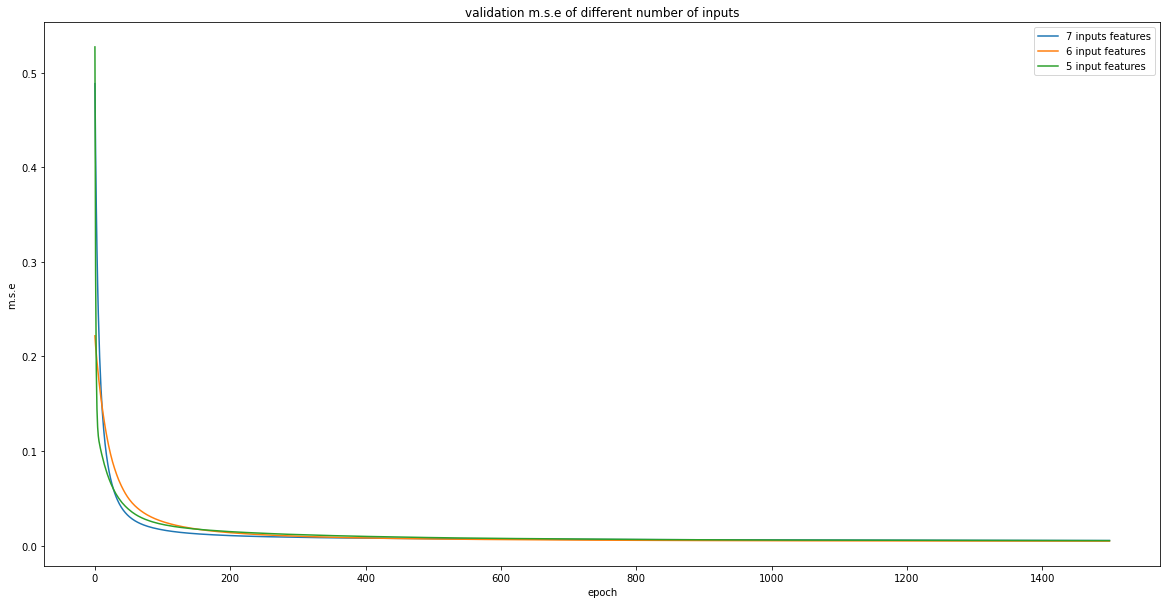

In [15]:
plt.figure(figsize=(20,10))
plt.plot(histories['qn2_0'].history['val_mse'])
plt.plot(histories['qn2_1'].history['val_mse'])
plt.plot(histories['qn2_2'].history['val_mse'])
plt.title('validation m.s.e of different number of inputs')
plt.ylabel('m.s.e')
plt.xlabel('epoch')
plt.legend(['7 inputs features','6 input features','5 input features'], loc='upper right')
plt.show()

## Part B - Question 3

In [20]:
epochs = 1500
batch_size = 8
seed = 10

histories={}
accuracies = []

np.random.seed(seed)
tf.random.set_seed(seed)

admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,[1,2,3,4,6,7]], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)
X_data, Y_data = X_data[idx], Y_data[idx]
print(X_data[idx])
#X_data, Y_data = X_data[idx], Y_data[idx]

print(X_data)

X_data = (X_data- np.mean(X_data, axis=0))/ np.std(X_data, axis=0)
X_train, X_test, Y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, shuffle = False)
print (X_train.shape, Y_train.shape)
print (X_test.shape, y_test.shape)

[[299.   100.     2.     3.     7.88   0.  ]
 [310.   102.     3.     3.5    8.02   1.  ]
 [324.   110.     3.     3.5    8.87   1.  ]
 ...
 [329.   113.     5.     5.     9.45   1.  ]
 [322.   104.     3.     3.5    8.84   1.  ]
 [324.   111.     4.     3.     9.01   1.  ]]
[[308.   106.     3.     3.5    8.21   1.  ]
 [321.   109.     4.     4.     8.68   1.  ]
 [303.   100.     2.     3.     8.06   1.  ]
 ...
 [314.   105.     3.     3.5    8.3    0.  ]
 [300.   100.     3.     2.     8.66   1.  ]
 [313.   102.     3.     2.5    8.68   0.  ]]
(280, 6) (280, 1)
(120, 6) (120, 1)


In [21]:
X_data

array([[-0.76859003, -0.23259949, -0.07660001,  0.0994422 , -0.65302852,
         0.90911166],
       [ 0.3658602 ,  0.26229304,  0.79882862,  0.59665321,  0.13612981,
         0.90911166],
       [-1.20491705, -1.22238456, -0.95202863, -0.39776881, -0.90488756,
         0.90911166],
       ...,
       [-0.24499762, -0.39756367, -0.07660001,  0.0994422 , -0.50191309,
        -1.09997489],
       [-1.46671326, -1.22238456, -0.07660001, -1.39219083,  0.10254861,
         0.90911166],
       [-0.33226302, -0.8924562 , -0.07660001, -0.89497982,  0.13612981,
        -1.09997489]])

### 3-layer

In [22]:
l2 = tf.keras.regularizers.l2(1e-3)
# create a network
model = Sequential([
        Dense(10, activation='relu',kernel_regularizer=l2),
        Dense(1)
])

opt = tf.keras.optimizers.SGD(lr=0.001)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['3_layered'] = model.fit(X_train, Y_train,
                             epochs=epochs,
                             batch_size=batch_size,
                             verbose = 2,
                             validation_data=(X_test, y_test))
accuracies.append(histories['3_layered'].history['val_mse'][epochs-1])

Epoch 1/1500
35/35 - 0s - loss: 0.5241 - mse: 0.5160 - val_loss: 0.4825 - val_mse: 0.4744
Epoch 2/1500
35/35 - 0s - loss: 0.4298 - mse: 0.4217 - val_loss: 0.4033 - val_mse: 0.3952
Epoch 3/1500
35/35 - 0s - loss: 0.3599 - mse: 0.3518 - val_loss: 0.3426 - val_mse: 0.3345
Epoch 4/1500
35/35 - 0s - loss: 0.3061 - mse: 0.2981 - val_loss: 0.2952 - val_mse: 0.2872
Epoch 5/1500
35/35 - 0s - loss: 0.2638 - mse: 0.2558 - val_loss: 0.2576 - val_mse: 0.2496
Epoch 6/1500
35/35 - 0s - loss: 0.2303 - mse: 0.2223 - val_loss: 0.2273 - val_mse: 0.2193
Epoch 7/1500
35/35 - 0s - loss: 0.2036 - mse: 0.1955 - val_loss: 0.2029 - val_mse: 0.1948
Epoch 8/1500
35/35 - 0s - loss: 0.1821 - mse: 0.1741 - val_loss: 0.1829 - val_mse: 0.1749
Epoch 9/1500
35/35 - 0s - loss: 0.1646 - mse: 0.1566 - val_loss: 0.1665 - val_mse: 0.1585
Epoch 10/1500
35/35 - 0s - loss: 0.1504 - mse: 0.1424 - val_loss: 0.1529 - val_mse: 0.1449
Epoch 11/1500
35/35 - 0s - loss: 0.1386 - mse: 0.1306 - val_loss: 0.1416 - val_mse: 0.1336
Epoch 12

Epoch 90/1500
35/35 - 0s - loss: 0.0282 - mse: 0.0206 - val_loss: 0.0306 - val_mse: 0.0230
Epoch 91/1500
35/35 - 0s - loss: 0.0280 - mse: 0.0204 - val_loss: 0.0303 - val_mse: 0.0227
Epoch 92/1500
35/35 - 0s - loss: 0.0277 - mse: 0.0201 - val_loss: 0.0300 - val_mse: 0.0225
Epoch 93/1500
35/35 - 0s - loss: 0.0275 - mse: 0.0199 - val_loss: 0.0298 - val_mse: 0.0222
Epoch 94/1500
35/35 - 0s - loss: 0.0272 - mse: 0.0196 - val_loss: 0.0295 - val_mse: 0.0220
Epoch 95/1500
35/35 - 0s - loss: 0.0270 - mse: 0.0194 - val_loss: 0.0293 - val_mse: 0.0217
Epoch 96/1500
35/35 - 0s - loss: 0.0268 - mse: 0.0192 - val_loss: 0.0291 - val_mse: 0.0215
Epoch 97/1500
35/35 - 0s - loss: 0.0265 - mse: 0.0190 - val_loss: 0.0288 - val_mse: 0.0213
Epoch 98/1500
35/35 - 0s - loss: 0.0263 - mse: 0.0188 - val_loss: 0.0286 - val_mse: 0.0210
Epoch 99/1500
35/35 - 0s - loss: 0.0261 - mse: 0.0185 - val_loss: 0.0284 - val_mse: 0.0208
Epoch 100/1500
35/35 - 0s - loss: 0.0259 - mse: 0.0183 - val_loss: 0.0282 - val_mse: 0.020

Epoch 180/1500
35/35 - 0s - loss: 0.0176 - mse: 0.0102 - val_loss: 0.0192 - val_mse: 0.0118
Epoch 181/1500
35/35 - 0s - loss: 0.0176 - mse: 0.0101 - val_loss: 0.0191 - val_mse: 0.0117
Epoch 182/1500
35/35 - 0s - loss: 0.0175 - mse: 0.0101 - val_loss: 0.0191 - val_mse: 0.0117
Epoch 183/1500
35/35 - 0s - loss: 0.0175 - mse: 0.0101 - val_loss: 0.0190 - val_mse: 0.0116
Epoch 184/1500
35/35 - 0s - loss: 0.0174 - mse: 0.0100 - val_loss: 0.0190 - val_mse: 0.0116
Epoch 185/1500
35/35 - 0s - loss: 0.0174 - mse: 0.0100 - val_loss: 0.0189 - val_mse: 0.0115
Epoch 186/1500
35/35 - 0s - loss: 0.0173 - mse: 0.0099 - val_loss: 0.0189 - val_mse: 0.0115
Epoch 187/1500
35/35 - 0s - loss: 0.0173 - mse: 0.0099 - val_loss: 0.0188 - val_mse: 0.0114
Epoch 188/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0098 - val_loss: 0.0188 - val_mse: 0.0114
Epoch 189/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0098 - val_loss: 0.0187 - val_mse: 0.0113
Epoch 190/1500
35/35 - 0s - loss: 0.0172 - mse: 0.0098 - val_loss: 0.0187 - val_

35/35 - 0s - loss: 0.0152 - mse: 0.0079 - val_loss: 0.0162 - val_mse: 0.0090
Epoch 270/1500
35/35 - 0s - loss: 0.0151 - mse: 0.0079 - val_loss: 0.0162 - val_mse: 0.0089
Epoch 271/1500
35/35 - 0s - loss: 0.0151 - mse: 0.0079 - val_loss: 0.0162 - val_mse: 0.0089
Epoch 272/1500
35/35 - 0s - loss: 0.0151 - mse: 0.0079 - val_loss: 0.0162 - val_mse: 0.0089
Epoch 273/1500
35/35 - 0s - loss: 0.0151 - mse: 0.0078 - val_loss: 0.0162 - val_mse: 0.0089
Epoch 274/1500
35/35 - 0s - loss: 0.0151 - mse: 0.0078 - val_loss: 0.0161 - val_mse: 0.0089
Epoch 275/1500
35/35 - 0s - loss: 0.0151 - mse: 0.0078 - val_loss: 0.0161 - val_mse: 0.0089
Epoch 276/1500
35/35 - 0s - loss: 0.0151 - mse: 0.0078 - val_loss: 0.0161 - val_mse: 0.0088
Epoch 277/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0078 - val_loss: 0.0161 - val_mse: 0.0088
Epoch 278/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0078 - val_loss: 0.0161 - val_mse: 0.0088
Epoch 279/1500
35/35 - 0s - loss: 0.0150 - mse: 0.0078 - val_loss: 0.0160 - val_mse: 0.0088
Epo

Epoch 359/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0071 - val_loss: 0.0150 - val_mse: 0.0079
Epoch 360/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0070 - val_loss: 0.0150 - val_mse: 0.0078
Epoch 361/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0070 - val_loss: 0.0150 - val_mse: 0.0078
Epoch 362/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0070 - val_loss: 0.0150 - val_mse: 0.0078
Epoch 363/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0070 - val_loss: 0.0150 - val_mse: 0.0078
Epoch 364/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0070 - val_loss: 0.0150 - val_mse: 0.0078
Epoch 365/1500
35/35 - 0s - loss: 0.0142 - mse: 0.0070 - val_loss: 0.0149 - val_mse: 0.0078
Epoch 366/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0070 - val_loss: 0.0149 - val_mse: 0.0078
Epoch 367/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0070 - val_loss: 0.0149 - val_mse: 0.0078
Epoch 368/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0070 - val_loss: 0.0149 - val_mse: 0.0078
Epoch 369/1500
35/35 - 0s - loss: 0.0141 - mse: 0.0070 - val_loss: 0.0149 - val_

35/35 - 0s - loss: 0.0137 - mse: 0.0066 - val_loss: 0.0143 - val_mse: 0.0073
Epoch 449/1500
35/35 - 0s - loss: 0.0137 - mse: 0.0066 - val_loss: 0.0143 - val_mse: 0.0073
Epoch 450/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0066 - val_loss: 0.0143 - val_mse: 0.0073
Epoch 451/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0066 - val_loss: 0.0143 - val_mse: 0.0073
Epoch 452/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0066 - val_loss: 0.0143 - val_mse: 0.0073
Epoch 453/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0066 - val_loss: 0.0143 - val_mse: 0.0073
Epoch 454/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0066 - val_loss: 0.0143 - val_mse: 0.0073
Epoch 455/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0066 - val_loss: 0.0143 - val_mse: 0.0073
Epoch 456/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0066 - val_loss: 0.0143 - val_mse: 0.0073
Epoch 457/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0066 - val_loss: 0.0143 - val_mse: 0.0073
Epoch 458/1500
35/35 - 0s - loss: 0.0136 - mse: 0.0066 - val_loss: 0.0143 - val_mse: 0.0072
Epo

Epoch 538/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0063 - val_loss: 0.0139 - val_mse: 0.0069
Epoch 539/1500
35/35 - 0s - loss: 0.0133 - mse: 0.0063 - val_loss: 0.0139 - val_mse: 0.0069
Epoch 540/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0063 - val_loss: 0.0138 - val_mse: 0.0069
Epoch 541/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0063 - val_loss: 0.0138 - val_mse: 0.0069
Epoch 542/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0063 - val_loss: 0.0138 - val_mse: 0.0069
Epoch 543/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0063 - val_loss: 0.0138 - val_mse: 0.0069
Epoch 544/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0063 - val_loss: 0.0138 - val_mse: 0.0069
Epoch 545/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0063 - val_loss: 0.0138 - val_mse: 0.0069
Epoch 546/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0063 - val_loss: 0.0138 - val_mse: 0.0069
Epoch 547/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0063 - val_loss: 0.0138 - val_mse: 0.0069
Epoch 548/1500
35/35 - 0s - loss: 0.0132 - mse: 0.0063 - val_loss: 0.0138 - val_

Epoch 628/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0135 - val_mse: 0.0066
Epoch 629/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0135 - val_mse: 0.0066
Epoch 630/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0135 - val_mse: 0.0066
Epoch 631/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0135 - val_mse: 0.0066
Epoch 632/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0134 - val_mse: 0.0066
Epoch 633/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0134 - val_mse: 0.0066
Epoch 634/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0134 - val_mse: 0.0066
Epoch 635/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0134 - val_mse: 0.0066
Epoch 636/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0134 - val_mse: 0.0066
Epoch 637/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0134 - val_mse: 0.0066
Epoch 638/1500
35/35 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0134 - val_

35/35 - 0s - loss: 0.0126 - mse: 0.0059 - val_loss: 0.0131 - val_mse: 0.0064
Epoch 718/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0059 - val_loss: 0.0131 - val_mse: 0.0064
Epoch 719/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0059 - val_loss: 0.0131 - val_mse: 0.0064
Epoch 720/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0059 - val_loss: 0.0131 - val_mse: 0.0064
Epoch 721/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0059 - val_loss: 0.0131 - val_mse: 0.0064
Epoch 722/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0059 - val_loss: 0.0131 - val_mse: 0.0064
Epoch 723/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0059 - val_loss: 0.0131 - val_mse: 0.0064
Epoch 724/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0059 - val_loss: 0.0131 - val_mse: 0.0064
Epoch 725/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0059 - val_loss: 0.0131 - val_mse: 0.0064
Epoch 726/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0059 - val_loss: 0.0131 - val_mse: 0.0064
Epoch 727/1500
35/35 - 0s - loss: 0.0126 - mse: 0.0059 - val_loss: 0.0131 - val_mse: 0.0064
Epo

Epoch 807/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0058 - val_loss: 0.0128 - val_mse: 0.0062
Epoch 808/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0058 - val_loss: 0.0128 - val_mse: 0.0062
Epoch 809/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0058 - val_loss: 0.0128 - val_mse: 0.0062
Epoch 810/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0057 - val_loss: 0.0128 - val_mse: 0.0062
Epoch 811/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0057 - val_loss: 0.0128 - val_mse: 0.0062
Epoch 812/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0057 - val_loss: 0.0128 - val_mse: 0.0062
Epoch 813/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0057 - val_loss: 0.0128 - val_mse: 0.0062
Epoch 814/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0057 - val_loss: 0.0128 - val_mse: 0.0062
Epoch 815/1500
35/35 - 0s - loss: 0.0124 - mse: 0.0057 - val_loss: 0.0128 - val_mse: 0.0062
Epoch 816/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0057 - val_loss: 0.0128 - val_mse: 0.0062
Epoch 817/1500
35/35 - 0s - loss: 0.0123 - mse: 0.0057 - val_loss: 0.0128 - val_

Epoch 986/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0055 - val_loss: 0.0124 - val_mse: 0.0059
Epoch 987/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0055 - val_loss: 0.0124 - val_mse: 0.0059
Epoch 988/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0055 - val_loss: 0.0124 - val_mse: 0.0059
Epoch 989/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0059
Epoch 990/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0059
Epoch 991/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0059
Epoch 992/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0059
Epoch 993/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0059
Epoch 994/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0059
Epoch 995/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0059
Epoch 996/1500
35/35 - 0s - loss: 0.0119 - mse: 0.0055 - val_loss: 0.0123 - val_

Epoch 1075/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0054 - val_loss: 0.0121 - val_mse: 0.0058
Epoch 1076/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0054 - val_loss: 0.0121 - val_mse: 0.0058
Epoch 1077/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0054 - val_loss: 0.0121 - val_mse: 0.0058
Epoch 1078/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0054 - val_loss: 0.0121 - val_mse: 0.0058
Epoch 1079/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0054 - val_loss: 0.0121 - val_mse: 0.0058
Epoch 1080/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0054 - val_loss: 0.0121 - val_mse: 0.0058
Epoch 1081/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0054 - val_loss: 0.0121 - val_mse: 0.0058
Epoch 1082/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0054 - val_loss: 0.0121 - val_mse: 0.0058
Epoch 1083/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0054 - val_loss: 0.0121 - val_mse: 0.0058
Epoch 1084/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0054 - val_loss: 0.0121 - val_mse: 0.0058
Epoch 1085/1500
35/35 - 0s - loss: 0.0117 - mse: 0.0054 - val_loss: 0.

Epoch 1164/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0057
Epoch 1165/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0057
Epoch 1166/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0057
Epoch 1167/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0057
Epoch 1168/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0057
Epoch 1169/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0057
Epoch 1170/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0057
Epoch 1171/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0057
Epoch 1172/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0057
Epoch 1173/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0053 - val_loss: 0.0119 - val_mse: 0.0057
Epoch 1174/1500
35/35 - 0s - loss: 0.0115 - mse: 0.0053 - val_loss: 0.

35/35 - 0s - loss: 0.0113 - mse: 0.0052 - val_loss: 0.0118 - val_mse: 0.0056
Epoch 1253/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0052 - val_loss: 0.0118 - val_mse: 0.0056
Epoch 1254/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0052 - val_loss: 0.0118 - val_mse: 0.0056
Epoch 1255/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0052 - val_loss: 0.0118 - val_mse: 0.0056
Epoch 1256/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0052 - val_loss: 0.0118 - val_mse: 0.0056
Epoch 1257/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0052 - val_loss: 0.0118 - val_mse: 0.0056
Epoch 1258/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0052 - val_loss: 0.0118 - val_mse: 0.0056
Epoch 1259/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0052 - val_loss: 0.0118 - val_mse: 0.0056
Epoch 1260/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0052 - val_loss: 0.0118 - val_mse: 0.0056
Epoch 1261/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0052 - val_loss: 0.0118 - val_mse: 0.0056
Epoch 1262/1500
35/35 - 0s - loss: 0.0113 - mse: 0.0052 - val_loss: 0.0118 - val_mse: 

Epoch 1341/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0055
Epoch 1342/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0055
Epoch 1343/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0055
Epoch 1344/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0055
Epoch 1345/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0055
Epoch 1346/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0055
Epoch 1347/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0055
Epoch 1348/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0055
Epoch 1349/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0055
Epoch 1350/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0055
Epoch 1351/1500
35/35 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.

35/35 - 0s - loss: 0.0110 - mse: 0.0050 - val_loss: 0.0115 - val_mse: 0.0055
Epoch 1430/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1431/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1432/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1433/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1434/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1435/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0055
Epoch 1436/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0054
Epoch 1437/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0054
Epoch 1438/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 0.0054
Epoch 1439/1500
35/35 - 0s - loss: 0.0110 - mse: 0.0050 - val_loss: 0.0114 - val_mse: 

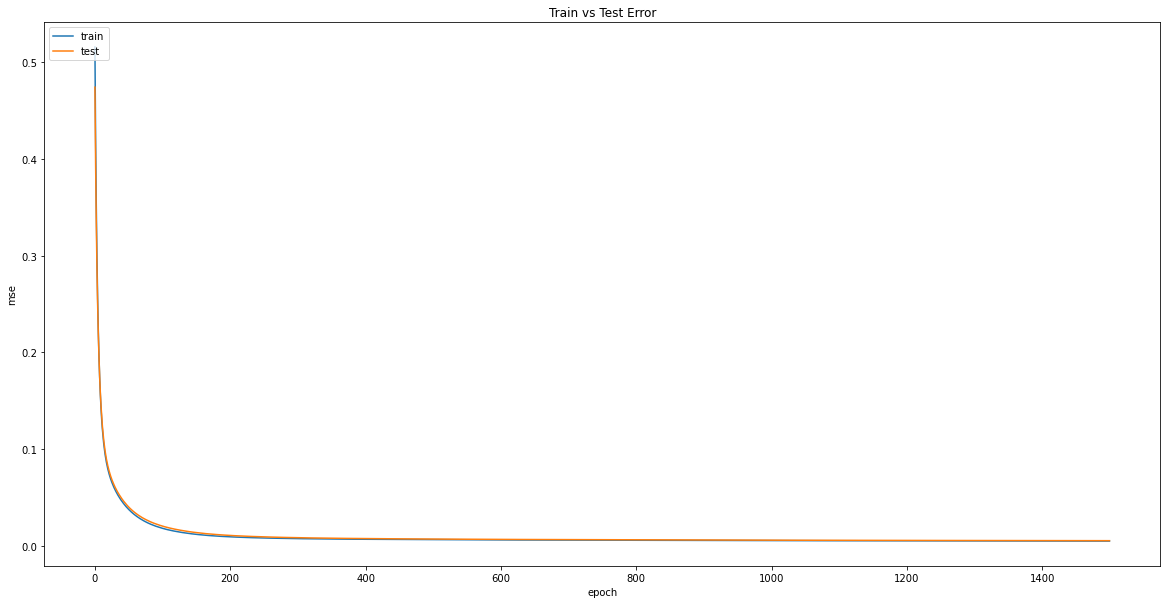

In [23]:
plt.figure(figsize=(20,10))
plt.plot(histories['3_layered'].history['mse'])
plt.plot(histories['3_layered'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4-layered no dropouts

In [24]:
l2 = tf.keras.regularizers.l2(1e-3)
# create a network
model = Sequential([
        Dense(50, activation='relu',kernel_regularizer=l2),
        Dense(50, activation='relu',kernel_regularizer=l2),
        Dense(1)
])

opt = tf.keras.optimizers.SGD(lr=0.001)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['4_layered'] = model.fit(X_train, Y_train,
                             epochs=epochs,
                             batch_size=batch_size,
                             verbose = 2,
                             validation_data=(X_test, y_test))
accuracies.append(histories['4_layered'].history['val_mse'][epochs-1])

Epoch 1/1500
35/35 - 0s - loss: 1.7033 - mse: 1.6444 - val_loss: 1.2407 - val_mse: 1.1819
Epoch 2/1500
35/35 - 0s - loss: 0.9279 - mse: 0.8692 - val_loss: 0.7162 - val_mse: 0.6576
Epoch 3/1500
35/35 - 0s - loss: 0.5584 - mse: 0.4998 - val_loss: 0.4436 - val_mse: 0.3850
Epoch 4/1500
35/35 - 0s - loss: 0.3604 - mse: 0.3018 - val_loss: 0.2922 - val_mse: 0.2337
Epoch 5/1500
35/35 - 0s - loss: 0.2488 - mse: 0.1902 - val_loss: 0.2056 - val_mse: 0.1470
Epoch 6/1500
35/35 - 0s - loss: 0.1846 - mse: 0.1260 - val_loss: 0.1552 - val_mse: 0.0967
Epoch 7/1500
35/35 - 0s - loss: 0.1470 - mse: 0.0884 - val_loss: 0.1259 - val_mse: 0.0674
Epoch 8/1500
35/35 - 0s - loss: 0.1248 - mse: 0.0663 - val_loss: 0.1086 - val_mse: 0.0501
Epoch 9/1500
35/35 - 0s - loss: 0.1116 - mse: 0.0530 - val_loss: 0.0982 - val_mse: 0.0397
Epoch 10/1500
35/35 - 0s - loss: 0.1033 - mse: 0.0448 - val_loss: 0.0918 - val_mse: 0.0333
Epoch 11/1500
35/35 - 0s - loss: 0.0979 - mse: 0.0394 - val_loss: 0.0878 - val_mse: 0.0293
Epoch 12

Epoch 90/1500
35/35 - 0s - loss: 0.0658 - mse: 0.0082 - val_loss: 0.0669 - val_mse: 0.0092
Epoch 91/1500
35/35 - 0s - loss: 0.0658 - mse: 0.0081 - val_loss: 0.0669 - val_mse: 0.0092
Epoch 92/1500
35/35 - 0s - loss: 0.0657 - mse: 0.0080 - val_loss: 0.0668 - val_mse: 0.0092
Epoch 93/1500
35/35 - 0s - loss: 0.0656 - mse: 0.0080 - val_loss: 0.0668 - val_mse: 0.0091
Epoch 94/1500
35/35 - 0s - loss: 0.0656 - mse: 0.0079 - val_loss: 0.0667 - val_mse: 0.0091
Epoch 95/1500
35/35 - 0s - loss: 0.0655 - mse: 0.0079 - val_loss: 0.0667 - val_mse: 0.0090
Epoch 96/1500
35/35 - 0s - loss: 0.0654 - mse: 0.0078 - val_loss: 0.0666 - val_mse: 0.0090
Epoch 97/1500
35/35 - 0s - loss: 0.0654 - mse: 0.0078 - val_loss: 0.0666 - val_mse: 0.0090
Epoch 98/1500
35/35 - 0s - loss: 0.0653 - mse: 0.0077 - val_loss: 0.0665 - val_mse: 0.0089
Epoch 99/1500
35/35 - 0s - loss: 0.0653 - mse: 0.0077 - val_loss: 0.0665 - val_mse: 0.0089
Epoch 100/1500
35/35 - 0s - loss: 0.0652 - mse: 0.0076 - val_loss: 0.0665 - val_mse: 0.008

35/35 - 0s - loss: 0.0625 - mse: 0.0056 - val_loss: 0.0643 - val_mse: 0.0074
Epoch 180/1500
35/35 - 0s - loss: 0.0625 - mse: 0.0056 - val_loss: 0.0643 - val_mse: 0.0074
Epoch 181/1500
35/35 - 0s - loss: 0.0625 - mse: 0.0056 - val_loss: 0.0643 - val_mse: 0.0074
Epoch 182/1500
35/35 - 0s - loss: 0.0625 - mse: 0.0056 - val_loss: 0.0643 - val_mse: 0.0074
Epoch 183/1500
35/35 - 0s - loss: 0.0625 - mse: 0.0055 - val_loss: 0.0643 - val_mse: 0.0074
Epoch 184/1500
35/35 - 0s - loss: 0.0624 - mse: 0.0055 - val_loss: 0.0642 - val_mse: 0.0073
Epoch 185/1500
35/35 - 0s - loss: 0.0624 - mse: 0.0055 - val_loss: 0.0642 - val_mse: 0.0073
Epoch 186/1500
35/35 - 0s - loss: 0.0624 - mse: 0.0055 - val_loss: 0.0642 - val_mse: 0.0073
Epoch 187/1500
35/35 - 0s - loss: 0.0624 - mse: 0.0055 - val_loss: 0.0642 - val_mse: 0.0073
Epoch 188/1500
35/35 - 0s - loss: 0.0624 - mse: 0.0055 - val_loss: 0.0642 - val_mse: 0.0073
Epoch 189/1500
35/35 - 0s - loss: 0.0623 - mse: 0.0055 - val_loss: 0.0642 - val_mse: 0.0073
Epo

Epoch 269/1500
35/35 - 0s - loss: 0.0611 - mse: 0.0048 - val_loss: 0.0630 - val_mse: 0.0068
Epoch 270/1500
35/35 - 0s - loss: 0.0610 - mse: 0.0048 - val_loss: 0.0629 - val_mse: 0.0068
Epoch 271/1500
35/35 - 0s - loss: 0.0610 - mse: 0.0048 - val_loss: 0.0629 - val_mse: 0.0067
Epoch 272/1500
35/35 - 0s - loss: 0.0610 - mse: 0.0048 - val_loss: 0.0629 - val_mse: 0.0067
Epoch 273/1500
35/35 - 0s - loss: 0.0610 - mse: 0.0048 - val_loss: 0.0629 - val_mse: 0.0067
Epoch 274/1500
35/35 - 0s - loss: 0.0610 - mse: 0.0048 - val_loss: 0.0629 - val_mse: 0.0067
Epoch 275/1500
35/35 - 0s - loss: 0.0610 - mse: 0.0048 - val_loss: 0.0629 - val_mse: 0.0067
Epoch 276/1500
35/35 - 0s - loss: 0.0610 - mse: 0.0048 - val_loss: 0.0629 - val_mse: 0.0067
Epoch 277/1500
35/35 - 0s - loss: 0.0609 - mse: 0.0048 - val_loss: 0.0629 - val_mse: 0.0067
Epoch 278/1500
35/35 - 0s - loss: 0.0609 - mse: 0.0048 - val_loss: 0.0628 - val_mse: 0.0067
Epoch 279/1500
35/35 - 0s - loss: 0.0609 - mse: 0.0048 - val_loss: 0.0628 - val_

Epoch 359/1500
35/35 - 0s - loss: 0.0599 - mse: 0.0044 - val_loss: 0.0619 - val_mse: 0.0064
Epoch 360/1500
35/35 - 0s - loss: 0.0599 - mse: 0.0044 - val_loss: 0.0619 - val_mse: 0.0064
Epoch 361/1500
35/35 - 0s - loss: 0.0599 - mse: 0.0044 - val_loss: 0.0619 - val_mse: 0.0064
Epoch 362/1500
35/35 - 0s - loss: 0.0599 - mse: 0.0044 - val_loss: 0.0619 - val_mse: 0.0064
Epoch 363/1500
35/35 - 0s - loss: 0.0599 - mse: 0.0044 - val_loss: 0.0619 - val_mse: 0.0064
Epoch 364/1500
35/35 - 0s - loss: 0.0599 - mse: 0.0044 - val_loss: 0.0619 - val_mse: 0.0064
Epoch 365/1500
35/35 - 0s - loss: 0.0599 - mse: 0.0044 - val_loss: 0.0619 - val_mse: 0.0064
Epoch 366/1500
35/35 - 0s - loss: 0.0599 - mse: 0.0044 - val_loss: 0.0619 - val_mse: 0.0064
Epoch 367/1500
35/35 - 0s - loss: 0.0598 - mse: 0.0044 - val_loss: 0.0618 - val_mse: 0.0064
Epoch 368/1500
35/35 - 0s - loss: 0.0598 - mse: 0.0044 - val_loss: 0.0618 - val_mse: 0.0064
Epoch 369/1500
35/35 - 0s - loss: 0.0598 - mse: 0.0044 - val_loss: 0.0618 - val_

35/35 - 0s - loss: 0.0590 - mse: 0.0042 - val_loss: 0.0611 - val_mse: 0.0063
Epoch 449/1500
35/35 - 0s - loss: 0.0590 - mse: 0.0042 - val_loss: 0.0611 - val_mse: 0.0063
Epoch 450/1500
35/35 - 0s - loss: 0.0589 - mse: 0.0042 - val_loss: 0.0610 - val_mse: 0.0063
Epoch 451/1500
35/35 - 0s - loss: 0.0589 - mse: 0.0042 - val_loss: 0.0610 - val_mse: 0.0063
Epoch 452/1500
35/35 - 0s - loss: 0.0589 - mse: 0.0042 - val_loss: 0.0610 - val_mse: 0.0063
Epoch 453/1500
35/35 - 0s - loss: 0.0589 - mse: 0.0042 - val_loss: 0.0610 - val_mse: 0.0063
Epoch 454/1500
35/35 - 0s - loss: 0.0589 - mse: 0.0042 - val_loss: 0.0610 - val_mse: 0.0063
Epoch 455/1500
35/35 - 0s - loss: 0.0589 - mse: 0.0042 - val_loss: 0.0610 - val_mse: 0.0063
Epoch 456/1500
35/35 - 0s - loss: 0.0589 - mse: 0.0042 - val_loss: 0.0610 - val_mse: 0.0063
Epoch 457/1500
35/35 - 0s - loss: 0.0589 - mse: 0.0042 - val_loss: 0.0610 - val_mse: 0.0063
Epoch 458/1500
35/35 - 0s - loss: 0.0589 - mse: 0.0041 - val_loss: 0.0610 - val_mse: 0.0063
Epo

Epoch 538/1500
35/35 - 0s - loss: 0.0581 - mse: 0.0040 - val_loss: 0.0603 - val_mse: 0.0062
Epoch 539/1500
35/35 - 0s - loss: 0.0581 - mse: 0.0040 - val_loss: 0.0602 - val_mse: 0.0062
Epoch 540/1500
35/35 - 0s - loss: 0.0581 - mse: 0.0040 - val_loss: 0.0602 - val_mse: 0.0062
Epoch 541/1500
35/35 - 0s - loss: 0.0580 - mse: 0.0040 - val_loss: 0.0602 - val_mse: 0.0062
Epoch 542/1500
35/35 - 0s - loss: 0.0580 - mse: 0.0040 - val_loss: 0.0602 - val_mse: 0.0062
Epoch 543/1500
35/35 - 0s - loss: 0.0580 - mse: 0.0040 - val_loss: 0.0602 - val_mse: 0.0062
Epoch 544/1500
35/35 - 0s - loss: 0.0580 - mse: 0.0040 - val_loss: 0.0602 - val_mse: 0.0062
Epoch 545/1500
35/35 - 0s - loss: 0.0580 - mse: 0.0040 - val_loss: 0.0602 - val_mse: 0.0062
Epoch 546/1500
35/35 - 0s - loss: 0.0580 - mse: 0.0040 - val_loss: 0.0602 - val_mse: 0.0061
Epoch 547/1500
35/35 - 0s - loss: 0.0580 - mse: 0.0040 - val_loss: 0.0602 - val_mse: 0.0061
Epoch 548/1500
35/35 - 0s - loss: 0.0580 - mse: 0.0040 - val_loss: 0.0602 - val_

35/35 - 0s - loss: 0.0572 - mse: 0.0038 - val_loss: 0.0595 - val_mse: 0.0061
Epoch 628/1500
35/35 - 0s - loss: 0.0572 - mse: 0.0038 - val_loss: 0.0595 - val_mse: 0.0061
Epoch 629/1500
35/35 - 0s - loss: 0.0572 - mse: 0.0038 - val_loss: 0.0595 - val_mse: 0.0061
Epoch 630/1500
35/35 - 0s - loss: 0.0572 - mse: 0.0038 - val_loss: 0.0595 - val_mse: 0.0061
Epoch 631/1500
35/35 - 0s - loss: 0.0572 - mse: 0.0038 - val_loss: 0.0595 - val_mse: 0.0061
Epoch 632/1500
35/35 - 0s - loss: 0.0572 - mse: 0.0038 - val_loss: 0.0595 - val_mse: 0.0061
Epoch 633/1500
35/35 - 0s - loss: 0.0572 - mse: 0.0038 - val_loss: 0.0594 - val_mse: 0.0061
Epoch 634/1500
35/35 - 0s - loss: 0.0572 - mse: 0.0038 - val_loss: 0.0594 - val_mse: 0.0061
Epoch 635/1500
35/35 - 0s - loss: 0.0572 - mse: 0.0038 - val_loss: 0.0594 - val_mse: 0.0061
Epoch 636/1500
35/35 - 0s - loss: 0.0572 - mse: 0.0038 - val_loss: 0.0594 - val_mse: 0.0061
Epoch 637/1500
35/35 - 0s - loss: 0.0571 - mse: 0.0038 - val_loss: 0.0594 - val_mse: 0.0061
Epo

Epoch 717/1500
35/35 - 0s - loss: 0.0564 - mse: 0.0037 - val_loss: 0.0588 - val_mse: 0.0060
Epoch 718/1500
35/35 - 0s - loss: 0.0564 - mse: 0.0037 - val_loss: 0.0588 - val_mse: 0.0060
Epoch 719/1500
35/35 - 0s - loss: 0.0564 - mse: 0.0037 - val_loss: 0.0588 - val_mse: 0.0060
Epoch 720/1500
35/35 - 0s - loss: 0.0564 - mse: 0.0037 - val_loss: 0.0587 - val_mse: 0.0060
Epoch 721/1500
35/35 - 0s - loss: 0.0564 - mse: 0.0037 - val_loss: 0.0587 - val_mse: 0.0060
Epoch 722/1500
35/35 - 0s - loss: 0.0564 - mse: 0.0037 - val_loss: 0.0587 - val_mse: 0.0060
Epoch 723/1500
35/35 - 0s - loss: 0.0564 - mse: 0.0037 - val_loss: 0.0587 - val_mse: 0.0060
Epoch 724/1500
35/35 - 0s - loss: 0.0564 - mse: 0.0037 - val_loss: 0.0587 - val_mse: 0.0060
Epoch 725/1500
35/35 - 0s - loss: 0.0564 - mse: 0.0037 - val_loss: 0.0587 - val_mse: 0.0060
Epoch 726/1500
35/35 - 0s - loss: 0.0564 - mse: 0.0037 - val_loss: 0.0587 - val_mse: 0.0060
Epoch 727/1500
35/35 - 0s - loss: 0.0563 - mse: 0.0037 - val_loss: 0.0587 - val_

35/35 - 0s - loss: 0.0557 - mse: 0.0036 - val_loss: 0.0581 - val_mse: 0.0060
Epoch 807/1500
35/35 - 0s - loss: 0.0557 - mse: 0.0036 - val_loss: 0.0581 - val_mse: 0.0060
Epoch 808/1500
35/35 - 0s - loss: 0.0556 - mse: 0.0036 - val_loss: 0.0581 - val_mse: 0.0060
Epoch 809/1500
35/35 - 0s - loss: 0.0556 - mse: 0.0036 - val_loss: 0.0581 - val_mse: 0.0060
Epoch 810/1500
35/35 - 0s - loss: 0.0556 - mse: 0.0036 - val_loss: 0.0580 - val_mse: 0.0060
Epoch 811/1500
35/35 - 0s - loss: 0.0556 - mse: 0.0036 - val_loss: 0.0580 - val_mse: 0.0060
Epoch 812/1500
35/35 - 0s - loss: 0.0556 - mse: 0.0036 - val_loss: 0.0580 - val_mse: 0.0060
Epoch 813/1500
35/35 - 0s - loss: 0.0556 - mse: 0.0036 - val_loss: 0.0580 - val_mse: 0.0060
Epoch 814/1500
35/35 - 0s - loss: 0.0556 - mse: 0.0036 - val_loss: 0.0580 - val_mse: 0.0060
Epoch 815/1500
35/35 - 0s - loss: 0.0556 - mse: 0.0036 - val_loss: 0.0580 - val_mse: 0.0060
Epoch 816/1500
35/35 - 0s - loss: 0.0556 - mse: 0.0036 - val_loss: 0.0580 - val_mse: 0.0060
Epo

Epoch 896/1500
35/35 - 0s - loss: 0.0549 - mse: 0.0035 - val_loss: 0.0574 - val_mse: 0.0059
Epoch 897/1500
35/35 - 0s - loss: 0.0549 - mse: 0.0035 - val_loss: 0.0574 - val_mse: 0.0059
Epoch 898/1500
35/35 - 0s - loss: 0.0549 - mse: 0.0035 - val_loss: 0.0574 - val_mse: 0.0059
Epoch 899/1500
35/35 - 0s - loss: 0.0549 - mse: 0.0035 - val_loss: 0.0574 - val_mse: 0.0059
Epoch 900/1500
35/35 - 0s - loss: 0.0549 - mse: 0.0035 - val_loss: 0.0574 - val_mse: 0.0059
Epoch 901/1500
35/35 - 0s - loss: 0.0549 - mse: 0.0035 - val_loss: 0.0574 - val_mse: 0.0059
Epoch 902/1500
35/35 - 0s - loss: 0.0549 - mse: 0.0035 - val_loss: 0.0573 - val_mse: 0.0059
Epoch 903/1500
35/35 - 0s - loss: 0.0549 - mse: 0.0035 - val_loss: 0.0573 - val_mse: 0.0059
Epoch 904/1500
35/35 - 0s - loss: 0.0549 - mse: 0.0035 - val_loss: 0.0573 - val_mse: 0.0059
Epoch 905/1500
35/35 - 0s - loss: 0.0548 - mse: 0.0035 - val_loss: 0.0573 - val_mse: 0.0059
Epoch 906/1500
35/35 - 0s - loss: 0.0548 - mse: 0.0035 - val_loss: 0.0573 - val_

35/35 - 0s - loss: 0.0542 - mse: 0.0034 - val_loss: 0.0567 - val_mse: 0.0059
Epoch 986/1500
35/35 - 0s - loss: 0.0542 - mse: 0.0034 - val_loss: 0.0567 - val_mse: 0.0059
Epoch 987/1500
35/35 - 0s - loss: 0.0542 - mse: 0.0034 - val_loss: 0.0567 - val_mse: 0.0059
Epoch 988/1500
35/35 - 0s - loss: 0.0542 - mse: 0.0034 - val_loss: 0.0567 - val_mse: 0.0059
Epoch 989/1500
35/35 - 0s - loss: 0.0542 - mse: 0.0034 - val_loss: 0.0567 - val_mse: 0.0059
Epoch 990/1500
35/35 - 0s - loss: 0.0542 - mse: 0.0034 - val_loss: 0.0567 - val_mse: 0.0059
Epoch 991/1500
35/35 - 0s - loss: 0.0542 - mse: 0.0034 - val_loss: 0.0567 - val_mse: 0.0059
Epoch 992/1500
35/35 - 0s - loss: 0.0541 - mse: 0.0034 - val_loss: 0.0567 - val_mse: 0.0059
Epoch 993/1500
35/35 - 0s - loss: 0.0541 - mse: 0.0034 - val_loss: 0.0567 - val_mse: 0.0059
Epoch 994/1500
35/35 - 0s - loss: 0.0541 - mse: 0.0034 - val_loss: 0.0567 - val_mse: 0.0059
Epoch 995/1500
35/35 - 0s - loss: 0.0541 - mse: 0.0034 - val_loss: 0.0567 - val_mse: 0.0059
Epo

Epoch 1074/1500
35/35 - 0s - loss: 0.0535 - mse: 0.0033 - val_loss: 0.0561 - val_mse: 0.0059
Epoch 1075/1500
35/35 - 0s - loss: 0.0535 - mse: 0.0033 - val_loss: 0.0561 - val_mse: 0.0059
Epoch 1076/1500
35/35 - 0s - loss: 0.0535 - mse: 0.0033 - val_loss: 0.0561 - val_mse: 0.0059
Epoch 1077/1500
35/35 - 0s - loss: 0.0535 - mse: 0.0033 - val_loss: 0.0561 - val_mse: 0.0059
Epoch 1078/1500
35/35 - 0s - loss: 0.0535 - mse: 0.0033 - val_loss: 0.0560 - val_mse: 0.0059
Epoch 1079/1500
35/35 - 0s - loss: 0.0535 - mse: 0.0033 - val_loss: 0.0560 - val_mse: 0.0059
Epoch 1080/1500
35/35 - 0s - loss: 0.0535 - mse: 0.0033 - val_loss: 0.0560 - val_mse: 0.0059
Epoch 1081/1500
35/35 - 0s - loss: 0.0535 - mse: 0.0033 - val_loss: 0.0560 - val_mse: 0.0059
Epoch 1082/1500
35/35 - 0s - loss: 0.0534 - mse: 0.0033 - val_loss: 0.0560 - val_mse: 0.0059
Epoch 1083/1500
35/35 - 0s - loss: 0.0534 - mse: 0.0033 - val_loss: 0.0560 - val_mse: 0.0059
Epoch 1084/1500
35/35 - 0s - loss: 0.0534 - mse: 0.0033 - val_loss: 0.

35/35 - 0s - loss: 0.0528 - mse: 0.0033 - val_loss: 0.0554 - val_mse: 0.0059
Epoch 1163/1500
35/35 - 0s - loss: 0.0528 - mse: 0.0033 - val_loss: 0.0554 - val_mse: 0.0059
Epoch 1164/1500
35/35 - 0s - loss: 0.0528 - mse: 0.0033 - val_loss: 0.0554 - val_mse: 0.0059
Epoch 1165/1500
35/35 - 0s - loss: 0.0528 - mse: 0.0033 - val_loss: 0.0554 - val_mse: 0.0059
Epoch 1166/1500
35/35 - 0s - loss: 0.0528 - mse: 0.0033 - val_loss: 0.0554 - val_mse: 0.0059
Epoch 1167/1500
35/35 - 0s - loss: 0.0528 - mse: 0.0033 - val_loss: 0.0554 - val_mse: 0.0059
Epoch 1168/1500
35/35 - 0s - loss: 0.0528 - mse: 0.0033 - val_loss: 0.0554 - val_mse: 0.0059
Epoch 1169/1500
35/35 - 0s - loss: 0.0528 - mse: 0.0032 - val_loss: 0.0554 - val_mse: 0.0059
Epoch 1170/1500
35/35 - 0s - loss: 0.0528 - mse: 0.0033 - val_loss: 0.0554 - val_mse: 0.0059
Epoch 1171/1500
35/35 - 0s - loss: 0.0528 - mse: 0.0032 - val_loss: 0.0554 - val_mse: 0.0059
Epoch 1172/1500
35/35 - 0s - loss: 0.0528 - mse: 0.0032 - val_loss: 0.0554 - val_mse: 

Epoch 1251/1500
35/35 - 0s - loss: 0.0522 - mse: 0.0032 - val_loss: 0.0548 - val_mse: 0.0058
Epoch 1252/1500
35/35 - 0s - loss: 0.0522 - mse: 0.0032 - val_loss: 0.0548 - val_mse: 0.0058
Epoch 1253/1500
35/35 - 0s - loss: 0.0522 - mse: 0.0032 - val_loss: 0.0548 - val_mse: 0.0058
Epoch 1254/1500
35/35 - 0s - loss: 0.0521 - mse: 0.0032 - val_loss: 0.0548 - val_mse: 0.0058
Epoch 1255/1500
35/35 - 0s - loss: 0.0521 - mse: 0.0032 - val_loss: 0.0548 - val_mse: 0.0058
Epoch 1256/1500
35/35 - 0s - loss: 0.0521 - mse: 0.0032 - val_loss: 0.0548 - val_mse: 0.0058
Epoch 1257/1500
35/35 - 0s - loss: 0.0521 - mse: 0.0032 - val_loss: 0.0548 - val_mse: 0.0058
Epoch 1258/1500
35/35 - 0s - loss: 0.0521 - mse: 0.0032 - val_loss: 0.0548 - val_mse: 0.0058
Epoch 1259/1500
35/35 - 0s - loss: 0.0521 - mse: 0.0032 - val_loss: 0.0547 - val_mse: 0.0058
Epoch 1260/1500
35/35 - 0s - loss: 0.0521 - mse: 0.0032 - val_loss: 0.0547 - val_mse: 0.0058
Epoch 1261/1500
35/35 - 0s - loss: 0.0521 - mse: 0.0032 - val_loss: 0.

35/35 - 0s - loss: 0.0515 - mse: 0.0032 - val_loss: 0.0542 - val_mse: 0.0058
Epoch 1340/1500
35/35 - 0s - loss: 0.0515 - mse: 0.0031 - val_loss: 0.0542 - val_mse: 0.0058
Epoch 1341/1500
35/35 - 0s - loss: 0.0515 - mse: 0.0031 - val_loss: 0.0542 - val_mse: 0.0058
Epoch 1342/1500
35/35 - 0s - loss: 0.0515 - mse: 0.0031 - val_loss: 0.0542 - val_mse: 0.0058
Epoch 1343/1500
35/35 - 0s - loss: 0.0515 - mse: 0.0031 - val_loss: 0.0542 - val_mse: 0.0058
Epoch 1344/1500
35/35 - 0s - loss: 0.0515 - mse: 0.0031 - val_loss: 0.0541 - val_mse: 0.0058
Epoch 1345/1500
35/35 - 0s - loss: 0.0515 - mse: 0.0031 - val_loss: 0.0541 - val_mse: 0.0058
Epoch 1346/1500
35/35 - 0s - loss: 0.0515 - mse: 0.0031 - val_loss: 0.0541 - val_mse: 0.0058
Epoch 1347/1500
35/35 - 0s - loss: 0.0515 - mse: 0.0031 - val_loss: 0.0541 - val_mse: 0.0058
Epoch 1348/1500
35/35 - 0s - loss: 0.0515 - mse: 0.0031 - val_loss: 0.0541 - val_mse: 0.0058
Epoch 1349/1500
35/35 - 0s - loss: 0.0515 - mse: 0.0031 - val_loss: 0.0541 - val_mse: 

Epoch 1428/1500
35/35 - 0s - loss: 0.0509 - mse: 0.0031 - val_loss: 0.0536 - val_mse: 0.0058
Epoch 1429/1500
35/35 - 0s - loss: 0.0509 - mse: 0.0031 - val_loss: 0.0535 - val_mse: 0.0058
Epoch 1430/1500
35/35 - 0s - loss: 0.0509 - mse: 0.0031 - val_loss: 0.0535 - val_mse: 0.0058
Epoch 1431/1500
35/35 - 0s - loss: 0.0509 - mse: 0.0031 - val_loss: 0.0535 - val_mse: 0.0058
Epoch 1432/1500
35/35 - 0s - loss: 0.0509 - mse: 0.0031 - val_loss: 0.0535 - val_mse: 0.0058
Epoch 1433/1500
35/35 - 0s - loss: 0.0509 - mse: 0.0031 - val_loss: 0.0535 - val_mse: 0.0058
Epoch 1434/1500
35/35 - 0s - loss: 0.0508 - mse: 0.0031 - val_loss: 0.0535 - val_mse: 0.0058
Epoch 1435/1500
35/35 - 0s - loss: 0.0508 - mse: 0.0031 - val_loss: 0.0535 - val_mse: 0.0058
Epoch 1436/1500
35/35 - 0s - loss: 0.0508 - mse: 0.0031 - val_loss: 0.0535 - val_mse: 0.0058
Epoch 1437/1500
35/35 - 0s - loss: 0.0508 - mse: 0.0031 - val_loss: 0.0535 - val_mse: 0.0058
Epoch 1438/1500
35/35 - 0s - loss: 0.0508 - mse: 0.0031 - val_loss: 0.

In [25]:
print("Validation accuracy of 4-layered network with no dropouts: " + str(accuracies[1]))

Validation accuracy of 4-layered network with no dropouts: 0.0057580252178013325


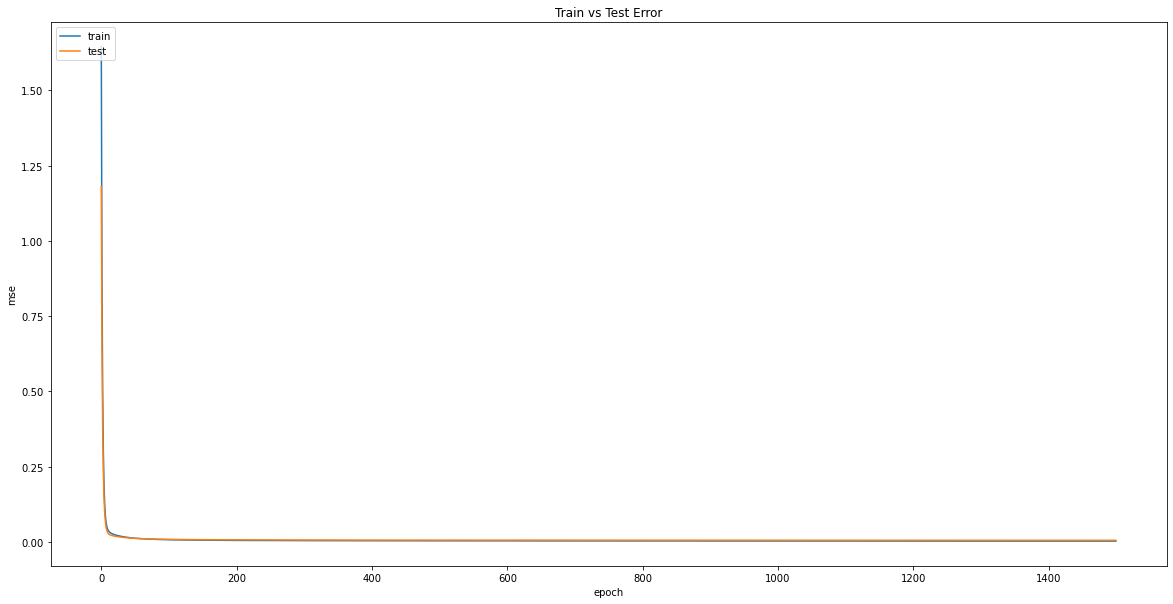

In [26]:
plt.figure(figsize=(20,10))
plt.plot(histories['4_layered'].history['mse'])
plt.plot(histories['4_layered'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

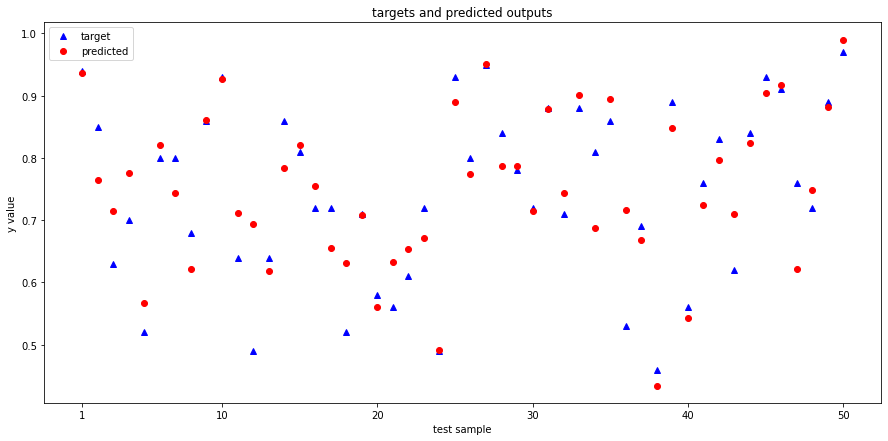

In [27]:
y_pred = model.predict(X_test)

plt.figure(figsize=(15,7))
for i in range(0,50):
    plot_targets = plt.plot(i+1, y_test[i], 'b^')
    plot_pred = plt.plot(i+1, y_pred[i], 'ro')
plt.xlabel('test sample')
plt.ylabel('y value')
plt.xticks([1,10,20,30,40,50])
plt.title('targets and predicted outputs')
plt.legend(['target', 'predicted'], loc='upper left')

### 5-layered no dropouts

In [28]:
l2 = tf.keras.regularizers.l2(1e-3)
# create a network
model = Sequential([
        Dense(50, activation='relu',kernel_regularizer=l2),
        Dense(50, activation='relu',kernel_regularizer=l2),
        Dense(50, activation='relu',kernel_regularizer=l2),
        Dense(1)
])

opt = tf.keras.optimizers.SGD(lr=0.001)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['5_layered'] = model.fit(X_train, Y_train,
                             epochs=epochs,
                             batch_size=batch_size,
                             verbose = 2,
                             validation_data=(X_test, y_test))
accuracies.append(histories['5_layered'].history['val_mse'][epochs-1])

Epoch 1/1500
35/35 - 0s - loss: 0.8631 - mse: 0.7527 - val_loss: 0.6058 - val_mse: 0.4954
Epoch 2/1500
35/35 - 0s - loss: 0.4821 - mse: 0.3717 - val_loss: 0.3724 - val_mse: 0.2620
Epoch 3/1500
35/35 - 0s - loss: 0.3131 - mse: 0.2028 - val_loss: 0.2642 - val_mse: 0.1539
Epoch 4/1500
35/35 - 0s - loss: 0.2329 - mse: 0.1225 - val_loss: 0.2127 - val_mse: 0.1023
Epoch 5/1500
35/35 - 0s - loss: 0.1935 - mse: 0.0831 - val_loss: 0.1867 - val_mse: 0.0764
Epoch 6/1500
35/35 - 0s - loss: 0.1735 - mse: 0.0632 - val_loss: 0.1732 - val_mse: 0.0629
Epoch 7/1500
35/35 - 0s - loss: 0.1631 - mse: 0.0528 - val_loss: 0.1657 - val_mse: 0.0553
Epoch 8/1500
35/35 - 0s - loss: 0.1572 - mse: 0.0468 - val_loss: 0.1609 - val_mse: 0.0506
Epoch 9/1500
35/35 - 0s - loss: 0.1535 - mse: 0.0431 - val_loss: 0.1574 - val_mse: 0.0471
Epoch 10/1500
35/35 - 0s - loss: 0.1507 - mse: 0.0404 - val_loss: 0.1546 - val_mse: 0.0444
Epoch 11/1500
35/35 - 0s - loss: 0.1486 - mse: 0.0383 - val_loss: 0.1523 - val_mse: 0.0420
Epoch 12

35/35 - 0s - loss: 0.1159 - mse: 0.0070 - val_loss: 0.1164 - val_mse: 0.0075
Epoch 92/1500
35/35 - 0s - loss: 0.1158 - mse: 0.0069 - val_loss: 0.1164 - val_mse: 0.0074
Epoch 93/1500
35/35 - 0s - loss: 0.1158 - mse: 0.0069 - val_loss: 0.1163 - val_mse: 0.0074
Epoch 94/1500
35/35 - 0s - loss: 0.1157 - mse: 0.0068 - val_loss: 0.1163 - val_mse: 0.0074
Epoch 95/1500
35/35 - 0s - loss: 0.1157 - mse: 0.0068 - val_loss: 0.1162 - val_mse: 0.0074
Epoch 96/1500
35/35 - 0s - loss: 0.1156 - mse: 0.0068 - val_loss: 0.1162 - val_mse: 0.0073
Epoch 97/1500
35/35 - 0s - loss: 0.1155 - mse: 0.0067 - val_loss: 0.1161 - val_mse: 0.0073
Epoch 98/1500
35/35 - 0s - loss: 0.1155 - mse: 0.0067 - val_loss: 0.1161 - val_mse: 0.0073
Epoch 99/1500
35/35 - 0s - loss: 0.1154 - mse: 0.0066 - val_loss: 0.1160 - val_mse: 0.0072
Epoch 100/1500
35/35 - 0s - loss: 0.1154 - mse: 0.0066 - val_loss: 0.1160 - val_mse: 0.0072
Epoch 101/1500
35/35 - 0s - loss: 0.1153 - mse: 0.0066 - val_loss: 0.1159 - val_mse: 0.0072
Epoch 102/1

Epoch 181/1500
35/35 - 0s - loss: 0.1126 - mse: 0.0051 - val_loss: 0.1137 - val_mse: 0.0062
Epoch 182/1500
35/35 - 0s - loss: 0.1126 - mse: 0.0051 - val_loss: 0.1137 - val_mse: 0.0062
Epoch 183/1500
35/35 - 0s - loss: 0.1126 - mse: 0.0051 - val_loss: 0.1137 - val_mse: 0.0062
Epoch 184/1500
35/35 - 0s - loss: 0.1125 - mse: 0.0051 - val_loss: 0.1136 - val_mse: 0.0062
Epoch 185/1500
35/35 - 0s - loss: 0.1125 - mse: 0.0051 - val_loss: 0.1136 - val_mse: 0.0061
Epoch 186/1500
35/35 - 0s - loss: 0.1125 - mse: 0.0050 - val_loss: 0.1136 - val_mse: 0.0061
Epoch 187/1500
35/35 - 0s - loss: 0.1125 - mse: 0.0050 - val_loss: 0.1136 - val_mse: 0.0061
Epoch 188/1500
35/35 - 0s - loss: 0.1124 - mse: 0.0050 - val_loss: 0.1135 - val_mse: 0.0061
Epoch 189/1500
35/35 - 0s - loss: 0.1124 - mse: 0.0050 - val_loss: 0.1135 - val_mse: 0.0061
Epoch 190/1500
35/35 - 0s - loss: 0.1124 - mse: 0.0050 - val_loss: 0.1135 - val_mse: 0.0061
Epoch 191/1500
35/35 - 0s - loss: 0.1124 - mse: 0.0050 - val_loss: 0.1135 - val_

35/35 - 0s - loss: 0.1106 - mse: 0.0044 - val_loss: 0.1120 - val_mse: 0.0058
Epoch 271/1500
35/35 - 0s - loss: 0.1106 - mse: 0.0044 - val_loss: 0.1120 - val_mse: 0.0058
Epoch 272/1500
35/35 - 0s - loss: 0.1106 - mse: 0.0044 - val_loss: 0.1120 - val_mse: 0.0058
Epoch 273/1500
35/35 - 0s - loss: 0.1106 - mse: 0.0044 - val_loss: 0.1119 - val_mse: 0.0058
Epoch 274/1500
35/35 - 0s - loss: 0.1105 - mse: 0.0044 - val_loss: 0.1119 - val_mse: 0.0058
Epoch 275/1500
35/35 - 0s - loss: 0.1105 - mse: 0.0044 - val_loss: 0.1119 - val_mse: 0.0058
Epoch 276/1500
35/35 - 0s - loss: 0.1105 - mse: 0.0044 - val_loss: 0.1119 - val_mse: 0.0058
Epoch 277/1500
35/35 - 0s - loss: 0.1105 - mse: 0.0044 - val_loss: 0.1119 - val_mse: 0.0058
Epoch 278/1500
35/35 - 0s - loss: 0.1105 - mse: 0.0044 - val_loss: 0.1118 - val_mse: 0.0058
Epoch 279/1500
35/35 - 0s - loss: 0.1104 - mse: 0.0044 - val_loss: 0.1118 - val_mse: 0.0058
Epoch 280/1500
35/35 - 0s - loss: 0.1104 - mse: 0.0044 - val_loss: 0.1118 - val_mse: 0.0058
Epo

Epoch 360/1500
35/35 - 0s - loss: 0.1089 - mse: 0.0040 - val_loss: 0.1105 - val_mse: 0.0056
Epoch 361/1500
35/35 - 0s - loss: 0.1089 - mse: 0.0040 - val_loss: 0.1104 - val_mse: 0.0056
Epoch 362/1500
35/35 - 0s - loss: 0.1089 - mse: 0.0040 - val_loss: 0.1104 - val_mse: 0.0056
Epoch 363/1500
35/35 - 0s - loss: 0.1088 - mse: 0.0040 - val_loss: 0.1104 - val_mse: 0.0056
Epoch 364/1500
35/35 - 0s - loss: 0.1088 - mse: 0.0040 - val_loss: 0.1104 - val_mse: 0.0056
Epoch 365/1500
35/35 - 0s - loss: 0.1088 - mse: 0.0040 - val_loss: 0.1104 - val_mse: 0.0056
Epoch 366/1500
35/35 - 0s - loss: 0.1088 - mse: 0.0040 - val_loss: 0.1104 - val_mse: 0.0056
Epoch 367/1500
35/35 - 0s - loss: 0.1088 - mse: 0.0040 - val_loss: 0.1103 - val_mse: 0.0056
Epoch 368/1500
35/35 - 0s - loss: 0.1087 - mse: 0.0040 - val_loss: 0.1103 - val_mse: 0.0056
Epoch 369/1500
35/35 - 0s - loss: 0.1087 - mse: 0.0040 - val_loss: 0.1103 - val_mse: 0.0056
Epoch 370/1500
35/35 - 0s - loss: 0.1087 - mse: 0.0040 - val_loss: 0.1103 - val_

35/35 - 0s - loss: 0.1073 - mse: 0.0038 - val_loss: 0.1091 - val_mse: 0.0055
Epoch 450/1500
35/35 - 0s - loss: 0.1073 - mse: 0.0038 - val_loss: 0.1090 - val_mse: 0.0055
Epoch 451/1500
35/35 - 0s - loss: 0.1073 - mse: 0.0038 - val_loss: 0.1090 - val_mse: 0.0055
Epoch 452/1500
35/35 - 0s - loss: 0.1073 - mse: 0.0038 - val_loss: 0.1090 - val_mse: 0.0055
Epoch 453/1500
35/35 - 0s - loss: 0.1072 - mse: 0.0038 - val_loss: 0.1090 - val_mse: 0.0055
Epoch 454/1500
35/35 - 0s - loss: 0.1072 - mse: 0.0038 - val_loss: 0.1090 - val_mse: 0.0055
Epoch 455/1500
35/35 - 0s - loss: 0.1072 - mse: 0.0038 - val_loss: 0.1090 - val_mse: 0.0055
Epoch 456/1500
35/35 - 0s - loss: 0.1072 - mse: 0.0037 - val_loss: 0.1090 - val_mse: 0.0055
Epoch 457/1500
35/35 - 0s - loss: 0.1072 - mse: 0.0037 - val_loss: 0.1089 - val_mse: 0.0055
Epoch 458/1500
35/35 - 0s - loss: 0.1072 - mse: 0.0037 - val_loss: 0.1089 - val_mse: 0.0055
Epoch 459/1500
35/35 - 0s - loss: 0.1071 - mse: 0.0037 - val_loss: 0.1089 - val_mse: 0.0055
Epo

Epoch 539/1500
35/35 - 0s - loss: 0.1058 - mse: 0.0036 - val_loss: 0.1077 - val_mse: 0.0055
Epoch 540/1500
35/35 - 0s - loss: 0.1058 - mse: 0.0036 - val_loss: 0.1077 - val_mse: 0.0055
Epoch 541/1500
35/35 - 0s - loss: 0.1058 - mse: 0.0036 - val_loss: 0.1077 - val_mse: 0.0055
Epoch 542/1500
35/35 - 0s - loss: 0.1058 - mse: 0.0036 - val_loss: 0.1077 - val_mse: 0.0055
Epoch 543/1500
35/35 - 0s - loss: 0.1058 - mse: 0.0036 - val_loss: 0.1076 - val_mse: 0.0055
Epoch 544/1500
35/35 - 0s - loss: 0.1057 - mse: 0.0036 - val_loss: 0.1076 - val_mse: 0.0055
Epoch 545/1500
35/35 - 0s - loss: 0.1057 - mse: 0.0036 - val_loss: 0.1076 - val_mse: 0.0055
Epoch 546/1500
35/35 - 0s - loss: 0.1057 - mse: 0.0035 - val_loss: 0.1076 - val_mse: 0.0054
Epoch 547/1500
35/35 - 0s - loss: 0.1057 - mse: 0.0035 - val_loss: 0.1076 - val_mse: 0.0054
Epoch 548/1500
35/35 - 0s - loss: 0.1057 - mse: 0.0035 - val_loss: 0.1076 - val_mse: 0.0054
Epoch 549/1500
35/35 - 0s - loss: 0.1057 - mse: 0.0035 - val_loss: 0.1076 - val_

35/35 - 0s - loss: 0.1044 - mse: 0.0034 - val_loss: 0.1064 - val_mse: 0.0054
Epoch 629/1500
35/35 - 0s - loss: 0.1044 - mse: 0.0034 - val_loss: 0.1064 - val_mse: 0.0054
Epoch 630/1500
35/35 - 0s - loss: 0.1044 - mse: 0.0034 - val_loss: 0.1063 - val_mse: 0.0054
Epoch 631/1500
35/35 - 0s - loss: 0.1044 - mse: 0.0034 - val_loss: 0.1063 - val_mse: 0.0054
Epoch 632/1500
35/35 - 0s - loss: 0.1043 - mse: 0.0034 - val_loss: 0.1063 - val_mse: 0.0054
Epoch 633/1500
35/35 - 0s - loss: 0.1043 - mse: 0.0034 - val_loss: 0.1063 - val_mse: 0.0054
Epoch 634/1500
35/35 - 0s - loss: 0.1043 - mse: 0.0034 - val_loss: 0.1063 - val_mse: 0.0054
Epoch 635/1500
35/35 - 0s - loss: 0.1043 - mse: 0.0034 - val_loss: 0.1063 - val_mse: 0.0054
Epoch 636/1500
35/35 - 0s - loss: 0.1043 - mse: 0.0034 - val_loss: 0.1063 - val_mse: 0.0054
Epoch 637/1500
35/35 - 0s - loss: 0.1043 - mse: 0.0034 - val_loss: 0.1062 - val_mse: 0.0054
Epoch 638/1500
35/35 - 0s - loss: 0.1043 - mse: 0.0034 - val_loss: 0.1062 - val_mse: 0.0054
Epo

Epoch 718/1500
35/35 - 0s - loss: 0.1030 - mse: 0.0033 - val_loss: 0.1051 - val_mse: 0.0054
Epoch 719/1500
35/35 - 0s - loss: 0.1030 - mse: 0.0033 - val_loss: 0.1051 - val_mse: 0.0054
Epoch 720/1500
35/35 - 0s - loss: 0.1030 - mse: 0.0033 - val_loss: 0.1051 - val_mse: 0.0054
Epoch 721/1500
35/35 - 0s - loss: 0.1030 - mse: 0.0033 - val_loss: 0.1050 - val_mse: 0.0054
Epoch 722/1500
35/35 - 0s - loss: 0.1030 - mse: 0.0033 - val_loss: 0.1050 - val_mse: 0.0053
Epoch 723/1500
35/35 - 0s - loss: 0.1030 - mse: 0.0033 - val_loss: 0.1050 - val_mse: 0.0053
Epoch 724/1500
35/35 - 0s - loss: 0.1029 - mse: 0.0033 - val_loss: 0.1050 - val_mse: 0.0053
Epoch 725/1500
35/35 - 0s - loss: 0.1029 - mse: 0.0033 - val_loss: 0.1050 - val_mse: 0.0053
Epoch 726/1500
35/35 - 0s - loss: 0.1029 - mse: 0.0033 - val_loss: 0.1050 - val_mse: 0.0053
Epoch 727/1500
35/35 - 0s - loss: 0.1029 - mse: 0.0033 - val_loss: 0.1050 - val_mse: 0.0053
Epoch 728/1500
35/35 - 0s - loss: 0.1029 - mse: 0.0033 - val_loss: 0.1049 - val_

35/35 - 0s - loss: 0.1017 - mse: 0.0032 - val_loss: 0.1038 - val_mse: 0.0053
Epoch 808/1500
35/35 - 0s - loss: 0.1017 - mse: 0.0032 - val_loss: 0.1038 - val_mse: 0.0053
Epoch 809/1500
35/35 - 0s - loss: 0.1017 - mse: 0.0032 - val_loss: 0.1038 - val_mse: 0.0053
Epoch 810/1500
35/35 - 0s - loss: 0.1017 - mse: 0.0032 - val_loss: 0.1038 - val_mse: 0.0053
Epoch 811/1500
35/35 - 0s - loss: 0.1017 - mse: 0.0032 - val_loss: 0.1038 - val_mse: 0.0053
Epoch 812/1500
35/35 - 0s - loss: 0.1016 - mse: 0.0032 - val_loss: 0.1038 - val_mse: 0.0053
Epoch 813/1500
35/35 - 0s - loss: 0.1016 - mse: 0.0032 - val_loss: 0.1037 - val_mse: 0.0053
Epoch 814/1500
35/35 - 0s - loss: 0.1016 - mse: 0.0032 - val_loss: 0.1037 - val_mse: 0.0053
Epoch 815/1500
35/35 - 0s - loss: 0.1016 - mse: 0.0032 - val_loss: 0.1037 - val_mse: 0.0053
Epoch 816/1500
35/35 - 0s - loss: 0.1016 - mse: 0.0032 - val_loss: 0.1037 - val_mse: 0.0053
Epoch 817/1500
35/35 - 0s - loss: 0.1016 - mse: 0.0032 - val_loss: 0.1037 - val_mse: 0.0053
Epo

Epoch 897/1500
35/35 - 0s - loss: 0.1004 - mse: 0.0031 - val_loss: 0.1026 - val_mse: 0.0053
Epoch 898/1500
35/35 - 0s - loss: 0.1004 - mse: 0.0031 - val_loss: 0.1026 - val_mse: 0.0053
Epoch 899/1500
35/35 - 0s - loss: 0.1004 - mse: 0.0031 - val_loss: 0.1026 - val_mse: 0.0053
Epoch 900/1500
35/35 - 0s - loss: 0.1004 - mse: 0.0031 - val_loss: 0.1025 - val_mse: 0.0053
Epoch 901/1500
35/35 - 0s - loss: 0.1004 - mse: 0.0031 - val_loss: 0.1025 - val_mse: 0.0053
Epoch 902/1500
35/35 - 0s - loss: 0.1004 - mse: 0.0031 - val_loss: 0.1025 - val_mse: 0.0053
Epoch 903/1500
35/35 - 0s - loss: 0.1003 - mse: 0.0031 - val_loss: 0.1025 - val_mse: 0.0053
Epoch 904/1500
35/35 - 0s - loss: 0.1003 - mse: 0.0031 - val_loss: 0.1025 - val_mse: 0.0053
Epoch 905/1500
35/35 - 0s - loss: 0.1003 - mse: 0.0031 - val_loss: 0.1025 - val_mse: 0.0053
Epoch 906/1500
35/35 - 0s - loss: 0.1003 - mse: 0.0031 - val_loss: 0.1025 - val_mse: 0.0053
Epoch 907/1500
35/35 - 0s - loss: 0.1003 - mse: 0.0031 - val_loss: 0.1024 - val_

35/35 - 0s - loss: 0.0992 - mse: 0.0031 - val_loss: 0.1014 - val_mse: 0.0053
Epoch 987/1500
35/35 - 0s - loss: 0.0991 - mse: 0.0031 - val_loss: 0.1014 - val_mse: 0.0053
Epoch 988/1500
35/35 - 0s - loss: 0.0991 - mse: 0.0031 - val_loss: 0.1013 - val_mse: 0.0053
Epoch 989/1500
35/35 - 0s - loss: 0.0991 - mse: 0.0031 - val_loss: 0.1013 - val_mse: 0.0053
Epoch 990/1500
35/35 - 0s - loss: 0.0991 - mse: 0.0031 - val_loss: 0.1013 - val_mse: 0.0053
Epoch 991/1500
35/35 - 0s - loss: 0.0991 - mse: 0.0031 - val_loss: 0.1013 - val_mse: 0.0053
Epoch 992/1500
35/35 - 0s - loss: 0.0991 - mse: 0.0031 - val_loss: 0.1013 - val_mse: 0.0053
Epoch 993/1500
35/35 - 0s - loss: 0.0991 - mse: 0.0031 - val_loss: 0.1013 - val_mse: 0.0053
Epoch 994/1500
35/35 - 0s - loss: 0.0991 - mse: 0.0031 - val_loss: 0.1013 - val_mse: 0.0053
Epoch 995/1500
35/35 - 0s - loss: 0.0990 - mse: 0.0031 - val_loss: 0.1012 - val_mse: 0.0053
Epoch 996/1500
35/35 - 0s - loss: 0.0990 - mse: 0.0031 - val_loss: 0.1012 - val_mse: 0.0053
Epo

Epoch 1075/1500
35/35 - 0s - loss: 0.0979 - mse: 0.0030 - val_loss: 0.1002 - val_mse: 0.0052
Epoch 1076/1500
35/35 - 0s - loss: 0.0979 - mse: 0.0030 - val_loss: 0.1001 - val_mse: 0.0052
Epoch 1077/1500
35/35 - 0s - loss: 0.0979 - mse: 0.0030 - val_loss: 0.1001 - val_mse: 0.0052
Epoch 1078/1500
35/35 - 0s - loss: 0.0979 - mse: 0.0030 - val_loss: 0.1001 - val_mse: 0.0052
Epoch 1079/1500
35/35 - 0s - loss: 0.0979 - mse: 0.0030 - val_loss: 0.1001 - val_mse: 0.0052
Epoch 1080/1500
35/35 - 0s - loss: 0.0979 - mse: 0.0030 - val_loss: 0.1001 - val_mse: 0.0052
Epoch 1081/1500
35/35 - 0s - loss: 0.0978 - mse: 0.0030 - val_loss: 0.1001 - val_mse: 0.0052
Epoch 1082/1500
35/35 - 0s - loss: 0.0978 - mse: 0.0030 - val_loss: 0.1001 - val_mse: 0.0052
Epoch 1083/1500
35/35 - 0s - loss: 0.0978 - mse: 0.0030 - val_loss: 0.1001 - val_mse: 0.0052
Epoch 1084/1500
35/35 - 0s - loss: 0.0978 - mse: 0.0030 - val_loss: 0.1000 - val_mse: 0.0052
Epoch 1085/1500
35/35 - 0s - loss: 0.0978 - mse: 0.0030 - val_loss: 0.

35/35 - 0s - loss: 0.0967 - mse: 0.0030 - val_loss: 0.0990 - val_mse: 0.0052
Epoch 1164/1500
35/35 - 0s - loss: 0.0967 - mse: 0.0030 - val_loss: 0.0990 - val_mse: 0.0052
Epoch 1165/1500
35/35 - 0s - loss: 0.0967 - mse: 0.0030 - val_loss: 0.0990 - val_mse: 0.0052
Epoch 1166/1500
35/35 - 0s - loss: 0.0967 - mse: 0.0030 - val_loss: 0.0989 - val_mse: 0.0052
Epoch 1167/1500
35/35 - 0s - loss: 0.0967 - mse: 0.0030 - val_loss: 0.0989 - val_mse: 0.0052
Epoch 1168/1500
35/35 - 0s - loss: 0.0967 - mse: 0.0030 - val_loss: 0.0989 - val_mse: 0.0052
Epoch 1169/1500
35/35 - 0s - loss: 0.0966 - mse: 0.0030 - val_loss: 0.0989 - val_mse: 0.0052
Epoch 1170/1500
35/35 - 0s - loss: 0.0966 - mse: 0.0030 - val_loss: 0.0989 - val_mse: 0.0052
Epoch 1171/1500
35/35 - 0s - loss: 0.0966 - mse: 0.0030 - val_loss: 0.0989 - val_mse: 0.0052
Epoch 1172/1500
35/35 - 0s - loss: 0.0966 - mse: 0.0030 - val_loss: 0.0989 - val_mse: 0.0052
Epoch 1173/1500
35/35 - 0s - loss: 0.0966 - mse: 0.0030 - val_loss: 0.0989 - val_mse: 

Epoch 1252/1500
35/35 - 0s - loss: 0.0955 - mse: 0.0029 - val_loss: 0.0978 - val_mse: 0.0052
Epoch 1253/1500
35/35 - 0s - loss: 0.0955 - mse: 0.0029 - val_loss: 0.0978 - val_mse: 0.0052
Epoch 1254/1500
35/35 - 0s - loss: 0.0955 - mse: 0.0029 - val_loss: 0.0978 - val_mse: 0.0052
Epoch 1255/1500
35/35 - 0s - loss: 0.0955 - mse: 0.0029 - val_loss: 0.0978 - val_mse: 0.0052
Epoch 1256/1500
35/35 - 0s - loss: 0.0955 - mse: 0.0029 - val_loss: 0.0978 - val_mse: 0.0052
Epoch 1257/1500
35/35 - 0s - loss: 0.0955 - mse: 0.0029 - val_loss: 0.0977 - val_mse: 0.0052
Epoch 1258/1500
35/35 - 0s - loss: 0.0955 - mse: 0.0029 - val_loss: 0.0977 - val_mse: 0.0052
Epoch 1259/1500
35/35 - 0s - loss: 0.0954 - mse: 0.0029 - val_loss: 0.0977 - val_mse: 0.0052
Epoch 1260/1500
35/35 - 0s - loss: 0.0954 - mse: 0.0029 - val_loss: 0.0977 - val_mse: 0.0052
Epoch 1261/1500
35/35 - 0s - loss: 0.0954 - mse: 0.0029 - val_loss: 0.0977 - val_mse: 0.0052
Epoch 1262/1500
35/35 - 0s - loss: 0.0954 - mse: 0.0029 - val_loss: 0.

35/35 - 0s - loss: 0.0944 - mse: 0.0029 - val_loss: 0.0967 - val_mse: 0.0052
Epoch 1341/1500
35/35 - 0s - loss: 0.0944 - mse: 0.0029 - val_loss: 0.0967 - val_mse: 0.0052
Epoch 1342/1500
35/35 - 0s - loss: 0.0944 - mse: 0.0029 - val_loss: 0.0967 - val_mse: 0.0052
Epoch 1343/1500
35/35 - 0s - loss: 0.0943 - mse: 0.0029 - val_loss: 0.0966 - val_mse: 0.0052
Epoch 1344/1500
35/35 - 0s - loss: 0.0943 - mse: 0.0029 - val_loss: 0.0966 - val_mse: 0.0052
Epoch 1345/1500
35/35 - 0s - loss: 0.0943 - mse: 0.0029 - val_loss: 0.0966 - val_mse: 0.0052
Epoch 1346/1500
35/35 - 0s - loss: 0.0943 - mse: 0.0029 - val_loss: 0.0966 - val_mse: 0.0052
Epoch 1347/1500
35/35 - 0s - loss: 0.0943 - mse: 0.0029 - val_loss: 0.0966 - val_mse: 0.0052
Epoch 1348/1500
35/35 - 0s - loss: 0.0943 - mse: 0.0029 - val_loss: 0.0966 - val_mse: 0.0052
Epoch 1349/1500
35/35 - 0s - loss: 0.0943 - mse: 0.0029 - val_loss: 0.0966 - val_mse: 0.0052
Epoch 1350/1500
35/35 - 0s - loss: 0.0942 - mse: 0.0029 - val_loss: 0.0965 - val_mse: 

Epoch 1429/1500
35/35 - 0s - loss: 0.0932 - mse: 0.0028 - val_loss: 0.0955 - val_mse: 0.0052
Epoch 1430/1500
35/35 - 0s - loss: 0.0932 - mse: 0.0028 - val_loss: 0.0955 - val_mse: 0.0052
Epoch 1431/1500
35/35 - 0s - loss: 0.0932 - mse: 0.0028 - val_loss: 0.0955 - val_mse: 0.0052
Epoch 1432/1500
35/35 - 0s - loss: 0.0932 - mse: 0.0028 - val_loss: 0.0955 - val_mse: 0.0052
Epoch 1433/1500
35/35 - 0s - loss: 0.0932 - mse: 0.0028 - val_loss: 0.0955 - val_mse: 0.0052
Epoch 1434/1500
35/35 - 0s - loss: 0.0932 - mse: 0.0028 - val_loss: 0.0955 - val_mse: 0.0052
Epoch 1435/1500
35/35 - 0s - loss: 0.0932 - mse: 0.0028 - val_loss: 0.0955 - val_mse: 0.0052
Epoch 1436/1500
35/35 - 0s - loss: 0.0931 - mse: 0.0028 - val_loss: 0.0955 - val_mse: 0.0052
Epoch 1437/1500
35/35 - 0s - loss: 0.0931 - mse: 0.0028 - val_loss: 0.0954 - val_mse: 0.0052
Epoch 1438/1500
35/35 - 0s - loss: 0.0931 - mse: 0.0028 - val_loss: 0.0954 - val_mse: 0.0052
Epoch 1439/1500
35/35 - 0s - loss: 0.0931 - mse: 0.0028 - val_loss: 0.

In [29]:
print("Validation accuracy of 5-layered network with no dropouts: " + str(accuracies[2]))

Validation accuracy of 5-layered network with no dropouts: 0.005155087914317846


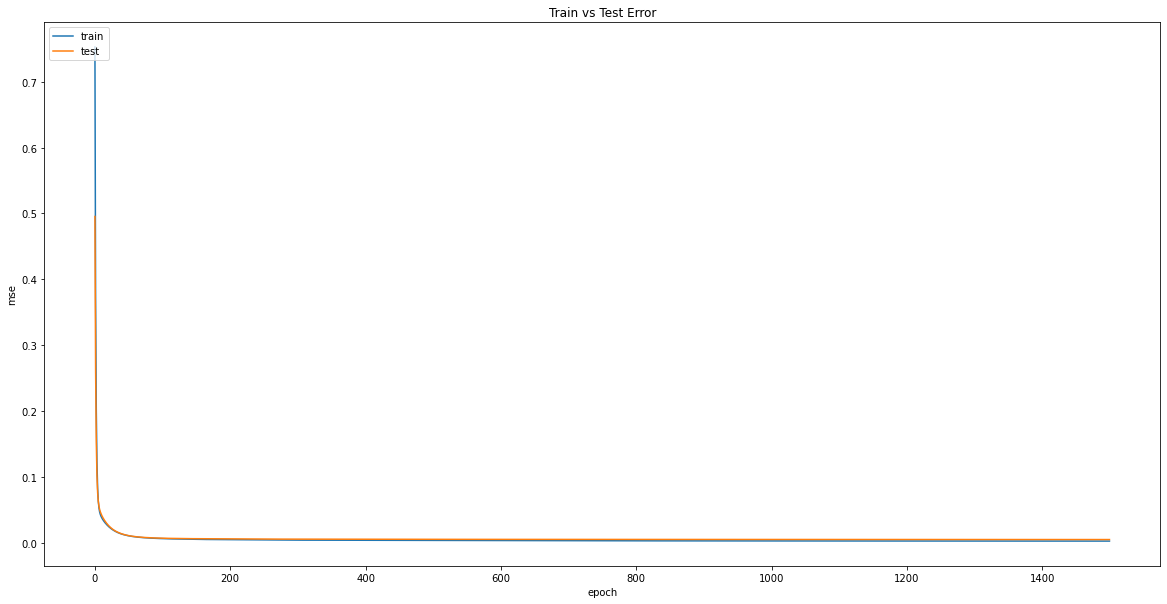

In [30]:
plt.figure(figsize=(20,10))
plt.plot(histories['5_layered'].history['mse'])
plt.plot(histories['5_layered'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

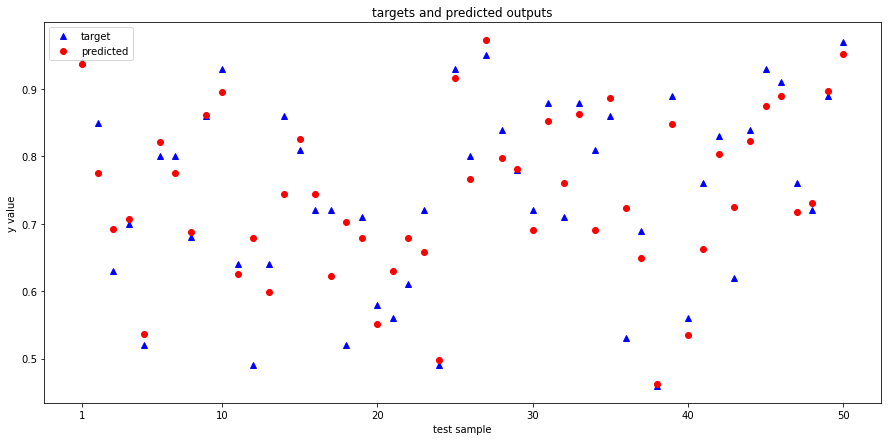

In [31]:
y_pred = model.predict(X_test)

plt.figure(figsize=(15,7))
for i in range(0,50):
    plot_targets = plt.plot(i+1, y_test[i], 'b^')
    plot_pred = plt.plot(i+1, y_pred[i], 'ro')
plt.xlabel('test sample')
plt.ylabel('y value')
plt.xticks([1,10,20,30,40,50])
plt.title('targets and predicted outputs')
plt.legend(['target', 'predicted'], loc='upper left')

### 4-layered with dropouts

In [32]:
l2 = tf.keras.regularizers.l2(1e-3)
# create a network
model = Sequential([
        Dense(50, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(50, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(1)
])

opt = tf.keras.optimizers.SGD(lr=0.001)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['4_layered_dropout'] = model.fit(X_train, Y_train,
                             epochs=epochs,
                             batch_size=batch_size,
                             verbose = 2,
                             validation_data=(X_test, y_test))
accuracies.append(histories['4_layered_dropout'].history['val_mse'][epochs-1])

Epoch 1/1500
35/35 - 0s - loss: 0.2793 - mse: 0.2173 - val_loss: 0.2142 - val_mse: 0.1523
Epoch 2/1500
35/35 - 0s - loss: 0.2471 - mse: 0.1851 - val_loss: 0.1829 - val_mse: 0.1209
Epoch 3/1500
35/35 - 0s - loss: 0.2218 - mse: 0.1598 - val_loss: 0.1634 - val_mse: 0.1015
Epoch 4/1500
35/35 - 0s - loss: 0.2024 - mse: 0.1404 - val_loss: 0.1488 - val_mse: 0.0869
Epoch 5/1500
35/35 - 0s - loss: 0.1909 - mse: 0.1289 - val_loss: 0.1397 - val_mse: 0.0778
Epoch 6/1500
35/35 - 0s - loss: 0.1864 - mse: 0.1245 - val_loss: 0.1323 - val_mse: 0.0704
Epoch 7/1500
35/35 - 0s - loss: 0.1857 - mse: 0.1238 - val_loss: 0.1261 - val_mse: 0.0642
Epoch 8/1500
35/35 - 0s - loss: 0.2062 - mse: 0.1444 - val_loss: 0.1238 - val_mse: 0.0620
Epoch 9/1500
35/35 - 0s - loss: 0.1762 - mse: 0.1143 - val_loss: 0.1189 - val_mse: 0.0571
Epoch 10/1500
35/35 - 0s - loss: 0.1784 - mse: 0.1166 - val_loss: 0.1162 - val_mse: 0.0544
Epoch 11/1500
35/35 - 0s - loss: 0.1812 - mse: 0.1194 - val_loss: 0.1136 - val_mse: 0.0519
Epoch 12

Epoch 90/1500
35/35 - 0s - loss: 0.0969 - mse: 0.0365 - val_loss: 0.0709 - val_mse: 0.0105
Epoch 91/1500
35/35 - 0s - loss: 0.0976 - mse: 0.0372 - val_loss: 0.0705 - val_mse: 0.0101
Epoch 92/1500
35/35 - 0s - loss: 0.0922 - mse: 0.0319 - val_loss: 0.0704 - val_mse: 0.0101
Epoch 93/1500
35/35 - 0s - loss: 0.0976 - mse: 0.0373 - val_loss: 0.0706 - val_mse: 0.0102
Epoch 94/1500
35/35 - 0s - loss: 0.0930 - mse: 0.0327 - val_loss: 0.0708 - val_mse: 0.0105
Epoch 95/1500
35/35 - 0s - loss: 0.0909 - mse: 0.0306 - val_loss: 0.0709 - val_mse: 0.0106
Epoch 96/1500
35/35 - 0s - loss: 0.0927 - mse: 0.0324 - val_loss: 0.0707 - val_mse: 0.0104
Epoch 97/1500
35/35 - 0s - loss: 0.0933 - mse: 0.0331 - val_loss: 0.0702 - val_mse: 0.0100
Epoch 98/1500
35/35 - 0s - loss: 0.0872 - mse: 0.0270 - val_loss: 0.0704 - val_mse: 0.0101
Epoch 99/1500
35/35 - 0s - loss: 0.0909 - mse: 0.0307 - val_loss: 0.0704 - val_mse: 0.0102
Epoch 100/1500
35/35 - 0s - loss: 0.0904 - mse: 0.0301 - val_loss: 0.0705 - val_mse: 0.010

35/35 - 0s - loss: 0.0766 - mse: 0.0174 - val_loss: 0.0668 - val_mse: 0.0076
Epoch 180/1500
35/35 - 0s - loss: 0.0791 - mse: 0.0199 - val_loss: 0.0667 - val_mse: 0.0075
Epoch 181/1500
35/35 - 0s - loss: 0.0807 - mse: 0.0215 - val_loss: 0.0669 - val_mse: 0.0077
Epoch 182/1500
35/35 - 0s - loss: 0.0791 - mse: 0.0199 - val_loss: 0.0668 - val_mse: 0.0077
Epoch 183/1500
35/35 - 0s - loss: 0.0837 - mse: 0.0246 - val_loss: 0.0668 - val_mse: 0.0076
Epoch 184/1500
35/35 - 0s - loss: 0.0810 - mse: 0.0218 - val_loss: 0.0667 - val_mse: 0.0076
Epoch 185/1500
35/35 - 0s - loss: 0.0828 - mse: 0.0236 - val_loss: 0.0666 - val_mse: 0.0075
Epoch 186/1500
35/35 - 0s - loss: 0.0824 - mse: 0.0233 - val_loss: 0.0665 - val_mse: 0.0074
Epoch 187/1500
35/35 - 0s - loss: 0.0778 - mse: 0.0187 - val_loss: 0.0663 - val_mse: 0.0072
Epoch 188/1500
35/35 - 0s - loss: 0.0794 - mse: 0.0203 - val_loss: 0.0662 - val_mse: 0.0071
Epoch 189/1500
35/35 - 0s - loss: 0.0782 - mse: 0.0192 - val_loss: 0.0662 - val_mse: 0.0071
Epo

Epoch 269/1500
35/35 - 0s - loss: 0.0726 - mse: 0.0144 - val_loss: 0.0647 - val_mse: 0.0066
Epoch 270/1500
35/35 - 0s - loss: 0.0731 - mse: 0.0149 - val_loss: 0.0647 - val_mse: 0.0065
Epoch 271/1500
35/35 - 0s - loss: 0.0726 - mse: 0.0144 - val_loss: 0.0647 - val_mse: 0.0065
Epoch 272/1500
35/35 - 0s - loss: 0.0736 - mse: 0.0155 - val_loss: 0.0646 - val_mse: 0.0065
Epoch 273/1500
35/35 - 0s - loss: 0.0741 - mse: 0.0159 - val_loss: 0.0646 - val_mse: 0.0065
Epoch 274/1500
35/35 - 0s - loss: 0.0720 - mse: 0.0139 - val_loss: 0.0647 - val_mse: 0.0065
Epoch 275/1500
35/35 - 0s - loss: 0.0712 - mse: 0.0130 - val_loss: 0.0646 - val_mse: 0.0065
Epoch 276/1500
35/35 - 0s - loss: 0.0756 - mse: 0.0175 - val_loss: 0.0648 - val_mse: 0.0066
Epoch 277/1500
35/35 - 0s - loss: 0.0728 - mse: 0.0147 - val_loss: 0.0646 - val_mse: 0.0065
Epoch 278/1500
35/35 - 0s - loss: 0.0721 - mse: 0.0140 - val_loss: 0.0646 - val_mse: 0.0065
Epoch 279/1500
35/35 - 0s - loss: 0.0729 - mse: 0.0148 - val_loss: 0.0645 - val_

35/35 - 0s - loss: 0.0701 - mse: 0.0128 - val_loss: 0.0635 - val_mse: 0.0062
Epoch 359/1500
35/35 - 0s - loss: 0.0711 - mse: 0.0138 - val_loss: 0.0636 - val_mse: 0.0063
Epoch 360/1500
35/35 - 0s - loss: 0.0690 - mse: 0.0117 - val_loss: 0.0635 - val_mse: 0.0062
Epoch 361/1500
35/35 - 0s - loss: 0.0704 - mse: 0.0131 - val_loss: 0.0635 - val_mse: 0.0063
Epoch 362/1500
35/35 - 0s - loss: 0.0694 - mse: 0.0121 - val_loss: 0.0635 - val_mse: 0.0062
Epoch 363/1500
35/35 - 0s - loss: 0.0714 - mse: 0.0142 - val_loss: 0.0635 - val_mse: 0.0063
Epoch 364/1500
35/35 - 0s - loss: 0.0703 - mse: 0.0131 - val_loss: 0.0634 - val_mse: 0.0062
Epoch 365/1500
35/35 - 0s - loss: 0.0732 - mse: 0.0160 - val_loss: 0.0633 - val_mse: 0.0061
Epoch 366/1500
35/35 - 0s - loss: 0.0706 - mse: 0.0134 - val_loss: 0.0633 - val_mse: 0.0061
Epoch 367/1500
35/35 - 0s - loss: 0.0694 - mse: 0.0122 - val_loss: 0.0634 - val_mse: 0.0062
Epoch 368/1500
35/35 - 0s - loss: 0.0703 - mse: 0.0131 - val_loss: 0.0633 - val_mse: 0.0061
Epo

Epoch 448/1500
35/35 - 0s - loss: 0.0667 - mse: 0.0102 - val_loss: 0.0622 - val_mse: 0.0058
Epoch 449/1500
35/35 - 0s - loss: 0.0673 - mse: 0.0108 - val_loss: 0.0621 - val_mse: 0.0057
Epoch 450/1500
35/35 - 0s - loss: 0.0667 - mse: 0.0103 - val_loss: 0.0621 - val_mse: 0.0057
Epoch 451/1500
35/35 - 0s - loss: 0.0664 - mse: 0.0100 - val_loss: 0.0621 - val_mse: 0.0057
Epoch 452/1500
35/35 - 0s - loss: 0.0696 - mse: 0.0132 - val_loss: 0.0621 - val_mse: 0.0058
Epoch 453/1500
35/35 - 0s - loss: 0.0669 - mse: 0.0105 - val_loss: 0.0622 - val_mse: 0.0058
Epoch 454/1500
35/35 - 0s - loss: 0.0676 - mse: 0.0112 - val_loss: 0.0622 - val_mse: 0.0058
Epoch 455/1500
35/35 - 0s - loss: 0.0679 - mse: 0.0115 - val_loss: 0.0622 - val_mse: 0.0058
Epoch 456/1500
35/35 - 0s - loss: 0.0682 - mse: 0.0118 - val_loss: 0.0622 - val_mse: 0.0058
Epoch 457/1500
35/35 - 0s - loss: 0.0679 - mse: 0.0116 - val_loss: 0.0622 - val_mse: 0.0059
Epoch 458/1500
35/35 - 0s - loss: 0.0672 - mse: 0.0109 - val_loss: 0.0623 - val_

35/35 - 0s - loss: 0.0655 - mse: 0.0099 - val_loss: 0.0612 - val_mse: 0.0055
Epoch 538/1500
35/35 - 0s - loss: 0.0654 - mse: 0.0098 - val_loss: 0.0611 - val_mse: 0.0055
Epoch 539/1500
35/35 - 0s - loss: 0.0653 - mse: 0.0097 - val_loss: 0.0611 - val_mse: 0.0055
Epoch 540/1500
35/35 - 0s - loss: 0.0655 - mse: 0.0099 - val_loss: 0.0612 - val_mse: 0.0056
Epoch 541/1500
35/35 - 0s - loss: 0.0640 - mse: 0.0084 - val_loss: 0.0611 - val_mse: 0.0056
Epoch 542/1500
35/35 - 0s - loss: 0.0656 - mse: 0.0100 - val_loss: 0.0612 - val_mse: 0.0056
Epoch 543/1500
35/35 - 0s - loss: 0.0657 - mse: 0.0101 - val_loss: 0.0611 - val_mse: 0.0056
Epoch 544/1500
35/35 - 0s - loss: 0.0667 - mse: 0.0111 - val_loss: 0.0611 - val_mse: 0.0056
Epoch 545/1500
35/35 - 0s - loss: 0.0641 - mse: 0.0086 - val_loss: 0.0611 - val_mse: 0.0056
Epoch 546/1500
35/35 - 0s - loss: 0.0651 - mse: 0.0095 - val_loss: 0.0611 - val_mse: 0.0056
Epoch 547/1500
35/35 - 0s - loss: 0.0642 - mse: 0.0087 - val_loss: 0.0611 - val_mse: 0.0056
Epo

Epoch 627/1500
35/35 - 0s - loss: 0.0654 - mse: 0.0106 - val_loss: 0.0603 - val_mse: 0.0055
Epoch 628/1500
35/35 - 0s - loss: 0.0639 - mse: 0.0090 - val_loss: 0.0603 - val_mse: 0.0054
Epoch 629/1500
35/35 - 0s - loss: 0.0640 - mse: 0.0092 - val_loss: 0.0602 - val_mse: 0.0054
Epoch 630/1500
35/35 - 0s - loss: 0.0635 - mse: 0.0087 - val_loss: 0.0602 - val_mse: 0.0054
Epoch 631/1500
35/35 - 0s - loss: 0.0640 - mse: 0.0093 - val_loss: 0.0602 - val_mse: 0.0054
Epoch 632/1500
35/35 - 0s - loss: 0.0625 - mse: 0.0077 - val_loss: 0.0602 - val_mse: 0.0054
Epoch 633/1500
35/35 - 0s - loss: 0.0632 - mse: 0.0084 - val_loss: 0.0601 - val_mse: 0.0054
Epoch 634/1500
35/35 - 0s - loss: 0.0644 - mse: 0.0096 - val_loss: 0.0601 - val_mse: 0.0053
Epoch 635/1500
35/35 - 0s - loss: 0.0630 - mse: 0.0083 - val_loss: 0.0601 - val_mse: 0.0054
Epoch 636/1500
35/35 - 0s - loss: 0.0627 - mse: 0.0080 - val_loss: 0.0602 - val_mse: 0.0054
Epoch 637/1500
35/35 - 0s - loss: 0.0632 - mse: 0.0085 - val_loss: 0.0601 - val_

35/35 - 0s - loss: 0.0627 - mse: 0.0086 - val_loss: 0.0594 - val_mse: 0.0054
Epoch 717/1500
35/35 - 0s - loss: 0.0623 - mse: 0.0083 - val_loss: 0.0594 - val_mse: 0.0054
Epoch 718/1500
35/35 - 0s - loss: 0.0621 - mse: 0.0080 - val_loss: 0.0594 - val_mse: 0.0054
Epoch 719/1500
35/35 - 0s - loss: 0.0620 - mse: 0.0080 - val_loss: 0.0594 - val_mse: 0.0054
Epoch 720/1500
35/35 - 0s - loss: 0.0623 - mse: 0.0083 - val_loss: 0.0594 - val_mse: 0.0054
Epoch 721/1500
35/35 - 0s - loss: 0.0629 - mse: 0.0089 - val_loss: 0.0594 - val_mse: 0.0054
Epoch 722/1500
35/35 - 0s - loss: 0.0623 - mse: 0.0082 - val_loss: 0.0594 - val_mse: 0.0054
Epoch 723/1500
35/35 - 0s - loss: 0.0617 - mse: 0.0077 - val_loss: 0.0594 - val_mse: 0.0054
Epoch 724/1500
35/35 - 0s - loss: 0.0616 - mse: 0.0076 - val_loss: 0.0593 - val_mse: 0.0054
Epoch 725/1500
35/35 - 0s - loss: 0.0619 - mse: 0.0079 - val_loss: 0.0593 - val_mse: 0.0054
Epoch 726/1500
35/35 - 0s - loss: 0.0622 - mse: 0.0082 - val_loss: 0.0593 - val_mse: 0.0053
Epo

Epoch 806/1500
35/35 - 0s - loss: 0.0613 - mse: 0.0080 - val_loss: 0.0586 - val_mse: 0.0053
Epoch 807/1500
35/35 - 0s - loss: 0.0609 - mse: 0.0076 - val_loss: 0.0586 - val_mse: 0.0053
Epoch 808/1500
35/35 - 0s - loss: 0.0600 - mse: 0.0067 - val_loss: 0.0586 - val_mse: 0.0053
Epoch 809/1500
35/35 - 0s - loss: 0.0609 - mse: 0.0076 - val_loss: 0.0586 - val_mse: 0.0053
Epoch 810/1500
35/35 - 0s - loss: 0.0609 - mse: 0.0076 - val_loss: 0.0585 - val_mse: 0.0052
Epoch 811/1500
35/35 - 0s - loss: 0.0607 - mse: 0.0075 - val_loss: 0.0585 - val_mse: 0.0053
Epoch 812/1500
35/35 - 0s - loss: 0.0607 - mse: 0.0075 - val_loss: 0.0586 - val_mse: 0.0053
Epoch 813/1500
35/35 - 0s - loss: 0.0614 - mse: 0.0081 - val_loss: 0.0586 - val_mse: 0.0053
Epoch 814/1500
35/35 - 0s - loss: 0.0610 - mse: 0.0078 - val_loss: 0.0586 - val_mse: 0.0053
Epoch 815/1500
35/35 - 0s - loss: 0.0601 - mse: 0.0069 - val_loss: 0.0586 - val_mse: 0.0053
Epoch 816/1500
35/35 - 0s - loss: 0.0607 - mse: 0.0074 - val_loss: 0.0586 - val_

35/35 - 0s - loss: 0.0599 - mse: 0.0073 - val_loss: 0.0578 - val_mse: 0.0052
Epoch 896/1500
35/35 - 0s - loss: 0.0596 - mse: 0.0070 - val_loss: 0.0578 - val_mse: 0.0052
Epoch 897/1500
35/35 - 0s - loss: 0.0596 - mse: 0.0070 - val_loss: 0.0578 - val_mse: 0.0052
Epoch 898/1500
35/35 - 0s - loss: 0.0591 - mse: 0.0065 - val_loss: 0.0579 - val_mse: 0.0053
Epoch 899/1500
35/35 - 0s - loss: 0.0599 - mse: 0.0074 - val_loss: 0.0578 - val_mse: 0.0053
Epoch 900/1500
35/35 - 0s - loss: 0.0590 - mse: 0.0064 - val_loss: 0.0578 - val_mse: 0.0052
Epoch 901/1500
35/35 - 0s - loss: 0.0599 - mse: 0.0073 - val_loss: 0.0578 - val_mse: 0.0052
Epoch 902/1500
35/35 - 0s - loss: 0.0591 - mse: 0.0066 - val_loss: 0.0578 - val_mse: 0.0052
Epoch 903/1500
35/35 - 0s - loss: 0.0598 - mse: 0.0072 - val_loss: 0.0577 - val_mse: 0.0052
Epoch 904/1500
35/35 - 0s - loss: 0.0607 - mse: 0.0082 - val_loss: 0.0577 - val_mse: 0.0052
Epoch 905/1500
35/35 - 0s - loss: 0.0594 - mse: 0.0068 - val_loss: 0.0577 - val_mse: 0.0052
Epo

Epoch 985/1500
35/35 - 0s - loss: 0.0583 - mse: 0.0064 - val_loss: 0.0571 - val_mse: 0.0052
Epoch 986/1500
35/35 - 0s - loss: 0.0598 - mse: 0.0079 - val_loss: 0.0571 - val_mse: 0.0052
Epoch 987/1500
35/35 - 0s - loss: 0.0594 - mse: 0.0075 - val_loss: 0.0571 - val_mse: 0.0052
Epoch 988/1500
35/35 - 0s - loss: 0.0587 - mse: 0.0068 - val_loss: 0.0571 - val_mse: 0.0052
Epoch 989/1500
35/35 - 0s - loss: 0.0591 - mse: 0.0072 - val_loss: 0.0570 - val_mse: 0.0052
Epoch 990/1500
35/35 - 0s - loss: 0.0586 - mse: 0.0067 - val_loss: 0.0570 - val_mse: 0.0052
Epoch 991/1500
35/35 - 0s - loss: 0.0587 - mse: 0.0068 - val_loss: 0.0570 - val_mse: 0.0052
Epoch 992/1500
35/35 - 0s - loss: 0.0580 - mse: 0.0062 - val_loss: 0.0570 - val_mse: 0.0052
Epoch 993/1500
35/35 - 0s - loss: 0.0581 - mse: 0.0063 - val_loss: 0.0570 - val_mse: 0.0052
Epoch 994/1500
35/35 - 0s - loss: 0.0586 - mse: 0.0068 - val_loss: 0.0570 - val_mse: 0.0052
Epoch 995/1500
35/35 - 0s - loss: 0.0583 - mse: 0.0064 - val_loss: 0.0570 - val_

Epoch 1074/1500
35/35 - 0s - loss: 0.0583 - mse: 0.0071 - val_loss: 0.0563 - val_mse: 0.0051
Epoch 1075/1500
35/35 - 0s - loss: 0.0576 - mse: 0.0064 - val_loss: 0.0563 - val_mse: 0.0051
Epoch 1076/1500
35/35 - 0s - loss: 0.0579 - mse: 0.0067 - val_loss: 0.0563 - val_mse: 0.0051
Epoch 1077/1500
35/35 - 0s - loss: 0.0575 - mse: 0.0064 - val_loss: 0.0563 - val_mse: 0.0052
Epoch 1078/1500
35/35 - 0s - loss: 0.0575 - mse: 0.0063 - val_loss: 0.0563 - val_mse: 0.0052
Epoch 1079/1500
35/35 - 0s - loss: 0.0580 - mse: 0.0068 - val_loss: 0.0563 - val_mse: 0.0051
Epoch 1080/1500
35/35 - 0s - loss: 0.0577 - mse: 0.0065 - val_loss: 0.0563 - val_mse: 0.0051
Epoch 1081/1500
35/35 - 0s - loss: 0.0577 - mse: 0.0066 - val_loss: 0.0563 - val_mse: 0.0051
Epoch 1082/1500
35/35 - 0s - loss: 0.0583 - mse: 0.0071 - val_loss: 0.0563 - val_mse: 0.0051
Epoch 1083/1500
35/35 - 0s - loss: 0.0572 - mse: 0.0060 - val_loss: 0.0563 - val_mse: 0.0051
Epoch 1084/1500
35/35 - 0s - loss: 0.0578 - mse: 0.0067 - val_loss: 0.

35/35 - 0s - loss: 0.0571 - mse: 0.0065 - val_loss: 0.0556 - val_mse: 0.0051
Epoch 1163/1500
35/35 - 0s - loss: 0.0569 - mse: 0.0064 - val_loss: 0.0556 - val_mse: 0.0051
Epoch 1164/1500
35/35 - 0s - loss: 0.0567 - mse: 0.0062 - val_loss: 0.0556 - val_mse: 0.0051
Epoch 1165/1500
35/35 - 0s - loss: 0.0574 - mse: 0.0068 - val_loss: 0.0556 - val_mse: 0.0051
Epoch 1166/1500
35/35 - 0s - loss: 0.0569 - mse: 0.0064 - val_loss: 0.0556 - val_mse: 0.0051
Epoch 1167/1500
35/35 - 0s - loss: 0.0567 - mse: 0.0062 - val_loss: 0.0556 - val_mse: 0.0051
Epoch 1168/1500
35/35 - 0s - loss: 0.0582 - mse: 0.0077 - val_loss: 0.0556 - val_mse: 0.0051
Epoch 1169/1500
35/35 - 0s - loss: 0.0573 - mse: 0.0068 - val_loss: 0.0556 - val_mse: 0.0051
Epoch 1170/1500
35/35 - 0s - loss: 0.0564 - mse: 0.0060 - val_loss: 0.0556 - val_mse: 0.0051
Epoch 1171/1500
35/35 - 0s - loss: 0.0561 - mse: 0.0056 - val_loss: 0.0556 - val_mse: 0.0051
Epoch 1172/1500
35/35 - 0s - loss: 0.0571 - mse: 0.0067 - val_loss: 0.0556 - val_mse: 

Epoch 1251/1500
35/35 - 0s - loss: 0.0564 - mse: 0.0065 - val_loss: 0.0550 - val_mse: 0.0051
Epoch 1252/1500
35/35 - 0s - loss: 0.0568 - mse: 0.0069 - val_loss: 0.0550 - val_mse: 0.0051
Epoch 1253/1500
35/35 - 0s - loss: 0.0569 - mse: 0.0070 - val_loss: 0.0550 - val_mse: 0.0051
Epoch 1254/1500
35/35 - 0s - loss: 0.0556 - mse: 0.0057 - val_loss: 0.0550 - val_mse: 0.0051
Epoch 1255/1500
35/35 - 0s - loss: 0.0561 - mse: 0.0062 - val_loss: 0.0549 - val_mse: 0.0051
Epoch 1256/1500
35/35 - 0s - loss: 0.0559 - mse: 0.0061 - val_loss: 0.0549 - val_mse: 0.0051
Epoch 1257/1500
35/35 - 0s - loss: 0.0558 - mse: 0.0060 - val_loss: 0.0549 - val_mse: 0.0051
Epoch 1258/1500
35/35 - 0s - loss: 0.0561 - mse: 0.0063 - val_loss: 0.0549 - val_mse: 0.0051
Epoch 1259/1500
35/35 - 0s - loss: 0.0562 - mse: 0.0064 - val_loss: 0.0549 - val_mse: 0.0051
Epoch 1260/1500
35/35 - 0s - loss: 0.0564 - mse: 0.0066 - val_loss: 0.0549 - val_mse: 0.0051
Epoch 1261/1500
35/35 - 0s - loss: 0.0561 - mse: 0.0062 - val_loss: 0.

35/35 - 0s - loss: 0.0547 - mse: 0.0055 - val_loss: 0.0543 - val_mse: 0.0051
Epoch 1340/1500
35/35 - 0s - loss: 0.0561 - mse: 0.0069 - val_loss: 0.0543 - val_mse: 0.0050
Epoch 1341/1500
35/35 - 0s - loss: 0.0548 - mse: 0.0056 - val_loss: 0.0543 - val_mse: 0.0050
Epoch 1342/1500
35/35 - 0s - loss: 0.0555 - mse: 0.0063 - val_loss: 0.0543 - val_mse: 0.0050
Epoch 1343/1500
35/35 - 0s - loss: 0.0546 - mse: 0.0054 - val_loss: 0.0543 - val_mse: 0.0050
Epoch 1344/1500
35/35 - 0s - loss: 0.0548 - mse: 0.0056 - val_loss: 0.0543 - val_mse: 0.0051
Epoch 1345/1500
35/35 - 0s - loss: 0.0556 - mse: 0.0064 - val_loss: 0.0543 - val_mse: 0.0051
Epoch 1346/1500
35/35 - 0s - loss: 0.0549 - mse: 0.0057 - val_loss: 0.0542 - val_mse: 0.0051
Epoch 1347/1500
35/35 - 0s - loss: 0.0560 - mse: 0.0068 - val_loss: 0.0542 - val_mse: 0.0051
Epoch 1348/1500
35/35 - 0s - loss: 0.0552 - mse: 0.0061 - val_loss: 0.0542 - val_mse: 0.0050
Epoch 1349/1500
35/35 - 0s - loss: 0.0553 - mse: 0.0061 - val_loss: 0.0542 - val_mse: 

Epoch 1428/1500
35/35 - 0s - loss: 0.0547 - mse: 0.0061 - val_loss: 0.0537 - val_mse: 0.0051
Epoch 1429/1500
35/35 - 0s - loss: 0.0549 - mse: 0.0063 - val_loss: 0.0536 - val_mse: 0.0050
Epoch 1430/1500
35/35 - 0s - loss: 0.0545 - mse: 0.0059 - val_loss: 0.0536 - val_mse: 0.0051
Epoch 1431/1500
35/35 - 0s - loss: 0.0551 - mse: 0.0065 - val_loss: 0.0536 - val_mse: 0.0050
Epoch 1432/1500
35/35 - 0s - loss: 0.0547 - mse: 0.0061 - val_loss: 0.0536 - val_mse: 0.0050
Epoch 1433/1500
35/35 - 0s - loss: 0.0554 - mse: 0.0068 - val_loss: 0.0536 - val_mse: 0.0051
Epoch 1434/1500
35/35 - 0s - loss: 0.0539 - mse: 0.0054 - val_loss: 0.0536 - val_mse: 0.0051
Epoch 1435/1500
35/35 - 0s - loss: 0.0542 - mse: 0.0057 - val_loss: 0.0536 - val_mse: 0.0050
Epoch 1436/1500
35/35 - 0s - loss: 0.0544 - mse: 0.0059 - val_loss: 0.0536 - val_mse: 0.0050
Epoch 1437/1500
35/35 - 0s - loss: 0.0548 - mse: 0.0062 - val_loss: 0.0536 - val_mse: 0.0051
Epoch 1438/1500
35/35 - 0s - loss: 0.0545 - mse: 0.0060 - val_loss: 0.

In [33]:
print("Validation accuracy of 4-layered network with dropouts: " + str(accuracies[3]))

Validation accuracy of 4-layered network with dropouts: 0.0049958922900259495


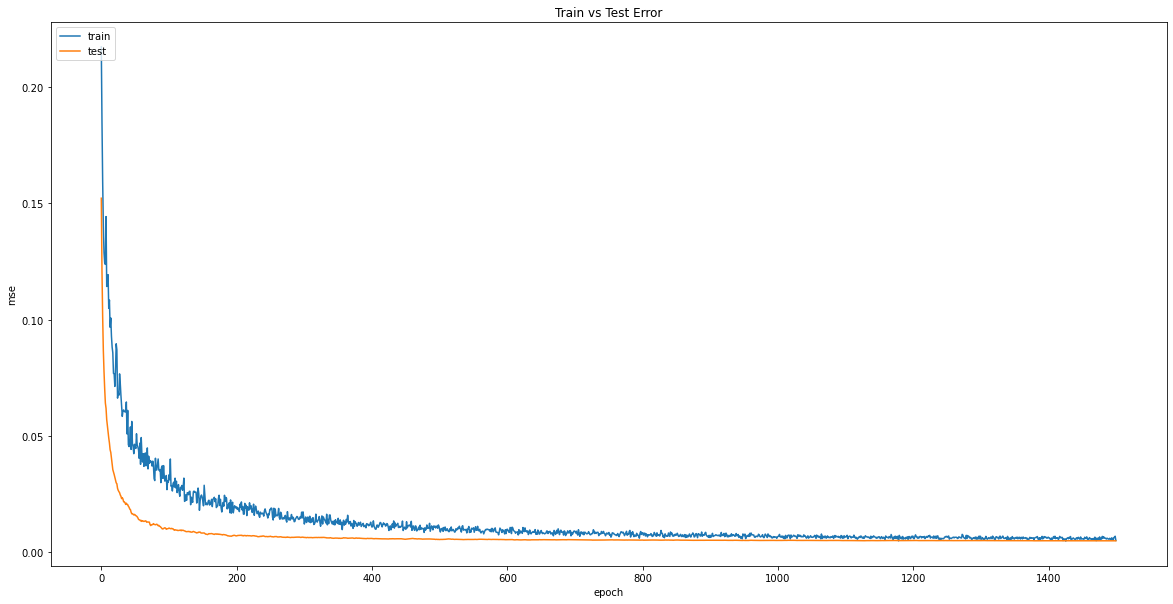

In [34]:
plt.figure(figsize=(20,10))
plt.plot(histories['4_layered_dropout'].history['mse'])
plt.plot(histories['4_layered_dropout'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

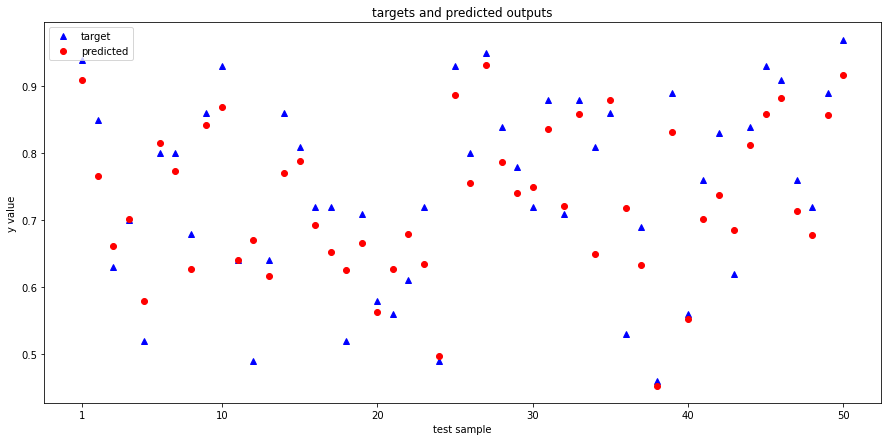

In [35]:
y_pred = model.predict(X_test)

plt.figure(figsize=(15,7))
for i in range(0,50):
    plot_targets = plt.plot(i+1, y_test[i], 'b^')
    plot_pred = plt.plot(i+1, y_pred[i], 'ro')
plt.xlabel('test sample')
plt.ylabel('y value')
plt.xticks([1,10,20,30,40,50])
plt.title('targets and predicted outputs')
plt.legend(['target', 'predicted'], loc='upper left')

### 5-layered with dropouts

In [36]:
l2 = tf.keras.regularizers.l2(1e-3)
# create a network
model = Sequential([
        Dense(50, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(50, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(50, activation='relu',kernel_regularizer=l2),
        Dropout(rate=0.2),
        Dense(1)
])

opt = tf.keras.optimizers.SGD(lr=0.001)

model.compile(optimizer=opt,
              loss="mean_squared_error",
              metrics=['mse'])

# learn the network
histories['5_layered_dropout'] = model.fit(X_train, Y_train,
                             epochs=epochs,
                             batch_size=batch_size,
                             verbose = 2,
                             validation_data=(X_test, y_test))
accuracies.append(histories['5_layered_dropout'].history['val_mse'][epochs-1])

Epoch 1/1500
35/35 - 0s - loss: 0.5165 - mse: 0.4063 - val_loss: 0.4156 - val_mse: 0.3054
Epoch 2/1500
35/35 - 0s - loss: 0.3875 - mse: 0.2772 - val_loss: 0.3046 - val_mse: 0.1943
Epoch 3/1500
35/35 - 0s - loss: 0.2949 - mse: 0.1846 - val_loss: 0.2467 - val_mse: 0.1365
Epoch 4/1500
35/35 - 0s - loss: 0.2672 - mse: 0.1570 - val_loss: 0.2173 - val_mse: 0.1071
Epoch 5/1500
35/35 - 0s - loss: 0.2587 - mse: 0.1485 - val_loss: 0.2015 - val_mse: 0.0914
Epoch 6/1500
35/35 - 0s - loss: 0.2294 - mse: 0.1192 - val_loss: 0.1888 - val_mse: 0.0786
Epoch 7/1500
35/35 - 0s - loss: 0.2267 - mse: 0.1166 - val_loss: 0.1807 - val_mse: 0.0706
Epoch 8/1500
35/35 - 0s - loss: 0.2156 - mse: 0.1055 - val_loss: 0.1755 - val_mse: 0.0654
Epoch 9/1500
35/35 - 0s - loss: 0.2051 - mse: 0.0950 - val_loss: 0.1683 - val_mse: 0.0583
Epoch 10/1500
35/35 - 0s - loss: 0.1982 - mse: 0.0881 - val_loss: 0.1651 - val_mse: 0.0550
Epoch 11/1500
35/35 - 0s - loss: 0.2110 - mse: 0.1009 - val_loss: 0.1646 - val_mse: 0.0546
Epoch 12

35/35 - 0s - loss: 0.1364 - mse: 0.0284 - val_loss: 0.1209 - val_mse: 0.0129
Epoch 92/1500
35/35 - 0s - loss: 0.1344 - mse: 0.0264 - val_loss: 0.1204 - val_mse: 0.0124
Epoch 93/1500
35/35 - 0s - loss: 0.1321 - mse: 0.0241 - val_loss: 0.1202 - val_mse: 0.0122
Epoch 94/1500
35/35 - 0s - loss: 0.1340 - mse: 0.0261 - val_loss: 0.1201 - val_mse: 0.0122
Epoch 95/1500
35/35 - 0s - loss: 0.1338 - mse: 0.0259 - val_loss: 0.1196 - val_mse: 0.0117
Epoch 96/1500
35/35 - 0s - loss: 0.1334 - mse: 0.0255 - val_loss: 0.1198 - val_mse: 0.0119
Epoch 97/1500
35/35 - 0s - loss: 0.1327 - mse: 0.0248 - val_loss: 0.1198 - val_mse: 0.0120
Epoch 98/1500
35/35 - 0s - loss: 0.1342 - mse: 0.0264 - val_loss: 0.1194 - val_mse: 0.0116
Epoch 99/1500
35/35 - 0s - loss: 0.1404 - mse: 0.0326 - val_loss: 0.1193 - val_mse: 0.0116
Epoch 100/1500
35/35 - 0s - loss: 0.1337 - mse: 0.0260 - val_loss: 0.1194 - val_mse: 0.0116
Epoch 101/1500
35/35 - 0s - loss: 0.1366 - mse: 0.0288 - val_loss: 0.1192 - val_mse: 0.0115
Epoch 102/1

Epoch 181/1500
35/35 - 0s - loss: 0.1273 - mse: 0.0211 - val_loss: 0.1151 - val_mse: 0.0089
Epoch 182/1500
35/35 - 0s - loss: 0.1226 - mse: 0.0165 - val_loss: 0.1151 - val_mse: 0.0089
Epoch 183/1500
35/35 - 0s - loss: 0.1221 - mse: 0.0160 - val_loss: 0.1149 - val_mse: 0.0088
Epoch 184/1500
35/35 - 0s - loss: 0.1245 - mse: 0.0184 - val_loss: 0.1149 - val_mse: 0.0088
Epoch 185/1500
35/35 - 0s - loss: 0.1247 - mse: 0.0185 - val_loss: 0.1150 - val_mse: 0.0089
Epoch 186/1500
35/35 - 0s - loss: 0.1240 - mse: 0.0179 - val_loss: 0.1150 - val_mse: 0.0089
Epoch 187/1500
35/35 - 0s - loss: 0.1237 - mse: 0.0176 - val_loss: 0.1149 - val_mse: 0.0088
Epoch 188/1500
35/35 - 0s - loss: 0.1242 - mse: 0.0181 - val_loss: 0.1150 - val_mse: 0.0089
Epoch 189/1500
35/35 - 0s - loss: 0.1230 - mse: 0.0169 - val_loss: 0.1147 - val_mse: 0.0087
Epoch 190/1500
35/35 - 0s - loss: 0.1245 - mse: 0.0184 - val_loss: 0.1148 - val_mse: 0.0088
Epoch 191/1500
35/35 - 0s - loss: 0.1273 - mse: 0.0213 - val_loss: 0.1147 - val_

35/35 - 0s - loss: 0.1180 - mse: 0.0134 - val_loss: 0.1122 - val_mse: 0.0076
Epoch 271/1500
35/35 - 0s - loss: 0.1191 - mse: 0.0145 - val_loss: 0.1122 - val_mse: 0.0076
Epoch 272/1500
35/35 - 0s - loss: 0.1188 - mse: 0.0142 - val_loss: 0.1122 - val_mse: 0.0076
Epoch 273/1500
35/35 - 0s - loss: 0.1194 - mse: 0.0148 - val_loss: 0.1121 - val_mse: 0.0075
Epoch 274/1500
35/35 - 0s - loss: 0.1184 - mse: 0.0138 - val_loss: 0.1121 - val_mse: 0.0076
Epoch 275/1500
35/35 - 0s - loss: 0.1184 - mse: 0.0139 - val_loss: 0.1121 - val_mse: 0.0076
Epoch 276/1500
35/35 - 0s - loss: 0.1174 - mse: 0.0129 - val_loss: 0.1120 - val_mse: 0.0075
Epoch 277/1500
35/35 - 0s - loss: 0.1187 - mse: 0.0142 - val_loss: 0.1119 - val_mse: 0.0074
Epoch 278/1500
35/35 - 0s - loss: 0.1175 - mse: 0.0130 - val_loss: 0.1120 - val_mse: 0.0075
Epoch 279/1500
35/35 - 0s - loss: 0.1161 - mse: 0.0116 - val_loss: 0.1119 - val_mse: 0.0075
Epoch 280/1500
35/35 - 0s - loss: 0.1203 - mse: 0.0159 - val_loss: 0.1118 - val_mse: 0.0074
Epo

Epoch 360/1500
35/35 - 0s - loss: 0.1154 - mse: 0.0123 - val_loss: 0.1100 - val_mse: 0.0069
Epoch 361/1500
35/35 - 0s - loss: 0.1139 - mse: 0.0108 - val_loss: 0.1099 - val_mse: 0.0068
Epoch 362/1500
35/35 - 0s - loss: 0.1159 - mse: 0.0128 - val_loss: 0.1099 - val_mse: 0.0068
Epoch 363/1500
35/35 - 0s - loss: 0.1152 - mse: 0.0122 - val_loss: 0.1099 - val_mse: 0.0068
Epoch 364/1500
35/35 - 0s - loss: 0.1143 - mse: 0.0112 - val_loss: 0.1099 - val_mse: 0.0069
Epoch 365/1500
35/35 - 0s - loss: 0.1147 - mse: 0.0116 - val_loss: 0.1099 - val_mse: 0.0068
Epoch 366/1500
35/35 - 0s - loss: 0.1182 - mse: 0.0151 - val_loss: 0.1100 - val_mse: 0.0069
Epoch 367/1500
35/35 - 0s - loss: 0.1158 - mse: 0.0127 - val_loss: 0.1100 - val_mse: 0.0070
Epoch 368/1500
35/35 - 0s - loss: 0.1151 - mse: 0.0121 - val_loss: 0.1100 - val_mse: 0.0070
Epoch 369/1500
35/35 - 0s - loss: 0.1148 - mse: 0.0118 - val_loss: 0.1100 - val_mse: 0.0070
Epoch 370/1500
35/35 - 0s - loss: 0.1145 - mse: 0.0115 - val_loss: 0.1099 - val_

35/35 - 0s - loss: 0.1115 - mse: 0.0098 - val_loss: 0.1084 - val_mse: 0.0067
Epoch 450/1500
35/35 - 0s - loss: 0.1111 - mse: 0.0094 - val_loss: 0.1084 - val_mse: 0.0067
Epoch 451/1500
35/35 - 0s - loss: 0.1125 - mse: 0.0108 - val_loss: 0.1084 - val_mse: 0.0067
Epoch 452/1500
35/35 - 0s - loss: 0.1115 - mse: 0.0098 - val_loss: 0.1084 - val_mse: 0.0067
Epoch 453/1500
35/35 - 0s - loss: 0.1111 - mse: 0.0094 - val_loss: 0.1084 - val_mse: 0.0067
Epoch 454/1500
35/35 - 0s - loss: 0.1125 - mse: 0.0109 - val_loss: 0.1083 - val_mse: 0.0067
Epoch 455/1500
35/35 - 0s - loss: 0.1131 - mse: 0.0115 - val_loss: 0.1083 - val_mse: 0.0067
Epoch 456/1500
35/35 - 0s - loss: 0.1113 - mse: 0.0097 - val_loss: 0.1083 - val_mse: 0.0067
Epoch 457/1500
35/35 - 0s - loss: 0.1105 - mse: 0.0090 - val_loss: 0.1083 - val_mse: 0.0067
Epoch 458/1500
35/35 - 0s - loss: 0.1133 - mse: 0.0118 - val_loss: 0.1083 - val_mse: 0.0067
Epoch 459/1500
35/35 - 0s - loss: 0.1122 - mse: 0.0106 - val_loss: 0.1083 - val_mse: 0.0067
Epo

Epoch 539/1500
35/35 - 0s - loss: 0.1105 - mse: 0.0102 - val_loss: 0.1067 - val_mse: 0.0064
Epoch 540/1500
35/35 - 0s - loss: 0.1097 - mse: 0.0094 - val_loss: 0.1067 - val_mse: 0.0064
Epoch 541/1500
35/35 - 0s - loss: 0.1099 - mse: 0.0096 - val_loss: 0.1067 - val_mse: 0.0064
Epoch 542/1500
35/35 - 0s - loss: 0.1089 - mse: 0.0086 - val_loss: 0.1067 - val_mse: 0.0064
Epoch 543/1500
35/35 - 0s - loss: 0.1110 - mse: 0.0107 - val_loss: 0.1067 - val_mse: 0.0064
Epoch 544/1500
35/35 - 0s - loss: 0.1116 - mse: 0.0113 - val_loss: 0.1066 - val_mse: 0.0064
Epoch 545/1500
35/35 - 0s - loss: 0.1094 - mse: 0.0092 - val_loss: 0.1066 - val_mse: 0.0064
Epoch 546/1500
35/35 - 0s - loss: 0.1102 - mse: 0.0100 - val_loss: 0.1066 - val_mse: 0.0064
Epoch 547/1500
35/35 - 0s - loss: 0.1099 - mse: 0.0097 - val_loss: 0.1066 - val_mse: 0.0064
Epoch 548/1500
35/35 - 0s - loss: 0.1103 - mse: 0.0100 - val_loss: 0.1066 - val_mse: 0.0064
Epoch 549/1500
35/35 - 0s - loss: 0.1117 - mse: 0.0115 - val_loss: 0.1066 - val_

35/35 - 0s - loss: 0.1076 - mse: 0.0086 - val_loss: 0.1054 - val_mse: 0.0064
Epoch 629/1500
35/35 - 0s - loss: 0.1092 - mse: 0.0102 - val_loss: 0.1054 - val_mse: 0.0064
Epoch 630/1500
35/35 - 0s - loss: 0.1067 - mse: 0.0078 - val_loss: 0.1054 - val_mse: 0.0064
Epoch 631/1500
35/35 - 0s - loss: 0.1083 - mse: 0.0093 - val_loss: 0.1053 - val_mse: 0.0064
Epoch 632/1500
35/35 - 0s - loss: 0.1077 - mse: 0.0087 - val_loss: 0.1053 - val_mse: 0.0064
Epoch 633/1500
35/35 - 0s - loss: 0.1078 - mse: 0.0088 - val_loss: 0.1053 - val_mse: 0.0064
Epoch 634/1500
35/35 - 0s - loss: 0.1081 - mse: 0.0091 - val_loss: 0.1053 - val_mse: 0.0064
Epoch 635/1500
35/35 - 0s - loss: 0.1080 - mse: 0.0091 - val_loss: 0.1053 - val_mse: 0.0064
Epoch 636/1500
35/35 - 0s - loss: 0.1080 - mse: 0.0091 - val_loss: 0.1053 - val_mse: 0.0064
Epoch 637/1500
35/35 - 0s - loss: 0.1085 - mse: 0.0096 - val_loss: 0.1052 - val_mse: 0.0064
Epoch 638/1500
35/35 - 0s - loss: 0.1088 - mse: 0.0100 - val_loss: 0.1052 - val_mse: 0.0064
Epo

Epoch 718/1500
35/35 - 0s - loss: 0.1057 - mse: 0.0080 - val_loss: 0.1040 - val_mse: 0.0063
Epoch 719/1500
35/35 - 0s - loss: 0.1064 - mse: 0.0087 - val_loss: 0.1040 - val_mse: 0.0063
Epoch 720/1500
35/35 - 0s - loss: 0.1068 - mse: 0.0091 - val_loss: 0.1040 - val_mse: 0.0063
Epoch 721/1500
35/35 - 0s - loss: 0.1068 - mse: 0.0091 - val_loss: 0.1039 - val_mse: 0.0063
Epoch 722/1500
35/35 - 0s - loss: 0.1071 - mse: 0.0095 - val_loss: 0.1039 - val_mse: 0.0063
Epoch 723/1500
35/35 - 0s - loss: 0.1064 - mse: 0.0088 - val_loss: 0.1039 - val_mse: 0.0063
Epoch 724/1500
35/35 - 0s - loss: 0.1071 - mse: 0.0095 - val_loss: 0.1039 - val_mse: 0.0063
Epoch 725/1500
35/35 - 0s - loss: 0.1053 - mse: 0.0077 - val_loss: 0.1039 - val_mse: 0.0063
Epoch 726/1500
35/35 - 0s - loss: 0.1074 - mse: 0.0098 - val_loss: 0.1039 - val_mse: 0.0063
Epoch 727/1500
35/35 - 0s - loss: 0.1075 - mse: 0.0099 - val_loss: 0.1039 - val_mse: 0.0063
Epoch 728/1500
35/35 - 0s - loss: 0.1060 - mse: 0.0084 - val_loss: 0.1039 - val_

35/35 - 0s - loss: 0.1052 - mse: 0.0088 - val_loss: 0.1027 - val_mse: 0.0062
Epoch 808/1500
35/35 - 0s - loss: 0.1039 - mse: 0.0075 - val_loss: 0.1026 - val_mse: 0.0062
Epoch 809/1500
35/35 - 0s - loss: 0.1055 - mse: 0.0091 - val_loss: 0.1026 - val_mse: 0.0062
Epoch 810/1500
35/35 - 0s - loss: 0.1043 - mse: 0.0079 - val_loss: 0.1026 - val_mse: 0.0062
Epoch 811/1500
35/35 - 0s - loss: 0.1047 - mse: 0.0084 - val_loss: 0.1026 - val_mse: 0.0062
Epoch 812/1500
35/35 - 0s - loss: 0.1059 - mse: 0.0095 - val_loss: 0.1026 - val_mse: 0.0062
Epoch 813/1500
35/35 - 0s - loss: 0.1049 - mse: 0.0085 - val_loss: 0.1025 - val_mse: 0.0062
Epoch 814/1500
35/35 - 0s - loss: 0.1046 - mse: 0.0082 - val_loss: 0.1025 - val_mse: 0.0062
Epoch 815/1500
35/35 - 0s - loss: 0.1057 - mse: 0.0094 - val_loss: 0.1025 - val_mse: 0.0062
Epoch 816/1500
35/35 - 0s - loss: 0.1054 - mse: 0.0091 - val_loss: 0.1025 - val_mse: 0.0062
Epoch 817/1500
35/35 - 0s - loss: 0.1057 - mse: 0.0094 - val_loss: 0.1025 - val_mse: 0.0062
Epo

Epoch 897/1500
35/35 - 0s - loss: 0.1035 - mse: 0.0083 - val_loss: 0.1014 - val_mse: 0.0062
Epoch 898/1500
35/35 - 0s - loss: 0.1041 - mse: 0.0089 - val_loss: 0.1014 - val_mse: 0.0062
Epoch 899/1500
35/35 - 0s - loss: 0.1037 - mse: 0.0086 - val_loss: 0.1014 - val_mse: 0.0062
Epoch 900/1500
35/35 - 0s - loss: 0.1026 - mse: 0.0075 - val_loss: 0.1013 - val_mse: 0.0062
Epoch 901/1500
35/35 - 0s - loss: 0.1026 - mse: 0.0074 - val_loss: 0.1013 - val_mse: 0.0062
Epoch 902/1500
35/35 - 0s - loss: 0.1031 - mse: 0.0080 - val_loss: 0.1013 - val_mse: 0.0062
Epoch 903/1500
35/35 - 0s - loss: 0.1025 - mse: 0.0074 - val_loss: 0.1013 - val_mse: 0.0062
Epoch 904/1500
35/35 - 0s - loss: 0.1036 - mse: 0.0085 - val_loss: 0.1013 - val_mse: 0.0063
Epoch 905/1500
35/35 - 0s - loss: 0.1035 - mse: 0.0084 - val_loss: 0.1013 - val_mse: 0.0063
Epoch 906/1500
35/35 - 0s - loss: 0.1037 - mse: 0.0087 - val_loss: 0.1013 - val_mse: 0.0063
Epoch 907/1500
35/35 - 0s - loss: 0.1021 - mse: 0.0070 - val_loss: 0.1013 - val_

35/35 - 0s - loss: 0.1025 - mse: 0.0085 - val_loss: 0.1001 - val_mse: 0.0061
Epoch 987/1500
35/35 - 0s - loss: 0.1018 - mse: 0.0079 - val_loss: 0.1001 - val_mse: 0.0061
Epoch 988/1500
35/35 - 0s - loss: 0.1018 - mse: 0.0078 - val_loss: 0.1001 - val_mse: 0.0061
Epoch 989/1500
35/35 - 0s - loss: 0.1016 - mse: 0.0076 - val_loss: 0.1000 - val_mse: 0.0061
Epoch 990/1500
35/35 - 0s - loss: 0.1016 - mse: 0.0077 - val_loss: 0.1000 - val_mse: 0.0061
Epoch 991/1500
35/35 - 0s - loss: 0.1014 - mse: 0.0075 - val_loss: 0.1000 - val_mse: 0.0061
Epoch 992/1500
35/35 - 0s - loss: 0.1010 - mse: 0.0072 - val_loss: 0.1000 - val_mse: 0.0061
Epoch 993/1500
35/35 - 0s - loss: 0.1014 - mse: 0.0075 - val_loss: 0.1000 - val_mse: 0.0061
Epoch 994/1500
35/35 - 0s - loss: 0.1019 - mse: 0.0080 - val_loss: 0.1000 - val_mse: 0.0061
Epoch 995/1500
35/35 - 0s - loss: 0.1017 - mse: 0.0079 - val_loss: 0.0999 - val_mse: 0.0061
Epoch 996/1500
35/35 - 0s - loss: 0.1021 - mse: 0.0083 - val_loss: 0.0999 - val_mse: 0.0061
Epo

Epoch 1075/1500
35/35 - 0s - loss: 0.1006 - mse: 0.0079 - val_loss: 0.0990 - val_mse: 0.0062
Epoch 1076/1500
35/35 - 0s - loss: 0.0999 - mse: 0.0072 - val_loss: 0.0989 - val_mse: 0.0062
Epoch 1077/1500
35/35 - 0s - loss: 0.1005 - mse: 0.0078 - val_loss: 0.0989 - val_mse: 0.0062
Epoch 1078/1500
35/35 - 0s - loss: 0.1010 - mse: 0.0083 - val_loss: 0.0989 - val_mse: 0.0062
Epoch 1079/1500
35/35 - 0s - loss: 0.1006 - mse: 0.0079 - val_loss: 0.0989 - val_mse: 0.0062
Epoch 1080/1500
35/35 - 0s - loss: 0.1007 - mse: 0.0080 - val_loss: 0.0989 - val_mse: 0.0062
Epoch 1081/1500
35/35 - 0s - loss: 0.1001 - mse: 0.0074 - val_loss: 0.0989 - val_mse: 0.0062
Epoch 1082/1500
35/35 - 0s - loss: 0.1009 - mse: 0.0082 - val_loss: 0.0988 - val_mse: 0.0062
Epoch 1083/1500
35/35 - 0s - loss: 0.0998 - mse: 0.0072 - val_loss: 0.0988 - val_mse: 0.0062
Epoch 1084/1500
35/35 - 0s - loss: 0.1019 - mse: 0.0093 - val_loss: 0.0988 - val_mse: 0.0062
Epoch 1085/1500
35/35 - 0s - loss: 0.0997 - mse: 0.0071 - val_loss: 0.

35/35 - 0s - loss: 0.0987 - mse: 0.0071 - val_loss: 0.0978 - val_mse: 0.0062
Epoch 1164/1500
35/35 - 0s - loss: 0.0994 - mse: 0.0078 - val_loss: 0.0977 - val_mse: 0.0062
Epoch 1165/1500
35/35 - 0s - loss: 0.0991 - mse: 0.0075 - val_loss: 0.0977 - val_mse: 0.0062
Epoch 1166/1500
35/35 - 0s - loss: 0.0989 - mse: 0.0074 - val_loss: 0.0977 - val_mse: 0.0062
Epoch 1167/1500
35/35 - 0s - loss: 0.0989 - mse: 0.0074 - val_loss: 0.0977 - val_mse: 0.0062
Epoch 1168/1500
35/35 - 0s - loss: 0.0987 - mse: 0.0072 - val_loss: 0.0977 - val_mse: 0.0061
Epoch 1169/1500
35/35 - 0s - loss: 0.0998 - mse: 0.0083 - val_loss: 0.0977 - val_mse: 0.0062
Epoch 1170/1500
35/35 - 0s - loss: 0.0992 - mse: 0.0077 - val_loss: 0.0977 - val_mse: 0.0062
Epoch 1171/1500
35/35 - 0s - loss: 0.0997 - mse: 0.0083 - val_loss: 0.0977 - val_mse: 0.0062
Epoch 1172/1500
35/35 - 0s - loss: 0.0991 - mse: 0.0077 - val_loss: 0.0976 - val_mse: 0.0062
Epoch 1173/1500
35/35 - 0s - loss: 0.0995 - mse: 0.0080 - val_loss: 0.0976 - val_mse: 

Epoch 1252/1500
35/35 - 0s - loss: 0.0975 - mse: 0.0071 - val_loss: 0.0965 - val_mse: 0.0061
Epoch 1253/1500
35/35 - 0s - loss: 0.0973 - mse: 0.0069 - val_loss: 0.0965 - val_mse: 0.0061
Epoch 1254/1500
35/35 - 0s - loss: 0.0975 - mse: 0.0071 - val_loss: 0.0965 - val_mse: 0.0061
Epoch 1255/1500
35/35 - 0s - loss: 0.0970 - mse: 0.0067 - val_loss: 0.0965 - val_mse: 0.0061
Epoch 1256/1500
35/35 - 0s - loss: 0.0978 - mse: 0.0074 - val_loss: 0.0964 - val_mse: 0.0061
Epoch 1257/1500
35/35 - 0s - loss: 0.0975 - mse: 0.0072 - val_loss: 0.0964 - val_mse: 0.0060
Epoch 1258/1500
35/35 - 0s - loss: 0.0972 - mse: 0.0068 - val_loss: 0.0964 - val_mse: 0.0061
Epoch 1259/1500
35/35 - 0s - loss: 0.0969 - mse: 0.0065 - val_loss: 0.0964 - val_mse: 0.0061
Epoch 1260/1500
35/35 - 0s - loss: 0.0975 - mse: 0.0071 - val_loss: 0.0964 - val_mse: 0.0061
Epoch 1261/1500
35/35 - 0s - loss: 0.0972 - mse: 0.0068 - val_loss: 0.0964 - val_mse: 0.0061
Epoch 1262/1500
35/35 - 0s - loss: 0.0976 - mse: 0.0073 - val_loss: 0.

35/35 - 0s - loss: 0.0961 - mse: 0.0068 - val_loss: 0.0954 - val_mse: 0.0061
Epoch 1341/1500
35/35 - 0s - loss: 0.0964 - mse: 0.0071 - val_loss: 0.0954 - val_mse: 0.0061
Epoch 1342/1500
35/35 - 0s - loss: 0.0962 - mse: 0.0070 - val_loss: 0.0954 - val_mse: 0.0061
Epoch 1343/1500
35/35 - 0s - loss: 0.0952 - mse: 0.0060 - val_loss: 0.0954 - val_mse: 0.0061
Epoch 1344/1500
35/35 - 0s - loss: 0.0956 - mse: 0.0063 - val_loss: 0.0954 - val_mse: 0.0061
Epoch 1345/1500
35/35 - 0s - loss: 0.0964 - mse: 0.0072 - val_loss: 0.0953 - val_mse: 0.0061
Epoch 1346/1500
35/35 - 0s - loss: 0.0958 - mse: 0.0066 - val_loss: 0.0953 - val_mse: 0.0061
Epoch 1347/1500
35/35 - 0s - loss: 0.0962 - mse: 0.0070 - val_loss: 0.0953 - val_mse: 0.0061
Epoch 1348/1500
35/35 - 0s - loss: 0.0964 - mse: 0.0072 - val_loss: 0.0953 - val_mse: 0.0061
Epoch 1349/1500
35/35 - 0s - loss: 0.0962 - mse: 0.0070 - val_loss: 0.0953 - val_mse: 0.0061
Epoch 1350/1500
35/35 - 0s - loss: 0.0963 - mse: 0.0071 - val_loss: 0.0953 - val_mse: 

Epoch 1429/1500
35/35 - 0s - loss: 0.0946 - mse: 0.0064 - val_loss: 0.0943 - val_mse: 0.0061
Epoch 1430/1500
35/35 - 0s - loss: 0.0947 - mse: 0.0065 - val_loss: 0.0943 - val_mse: 0.0061
Epoch 1431/1500
35/35 - 0s - loss: 0.0958 - mse: 0.0077 - val_loss: 0.0943 - val_mse: 0.0061
Epoch 1432/1500
35/35 - 0s - loss: 0.0949 - mse: 0.0068 - val_loss: 0.0943 - val_mse: 0.0061
Epoch 1433/1500
35/35 - 0s - loss: 0.0948 - mse: 0.0066 - val_loss: 0.0942 - val_mse: 0.0061
Epoch 1434/1500
35/35 - 0s - loss: 0.0958 - mse: 0.0077 - val_loss: 0.0942 - val_mse: 0.0061
Epoch 1435/1500
35/35 - 0s - loss: 0.0956 - mse: 0.0075 - val_loss: 0.0942 - val_mse: 0.0061
Epoch 1436/1500
35/35 - 0s - loss: 0.0953 - mse: 0.0072 - val_loss: 0.0942 - val_mse: 0.0061
Epoch 1437/1500
35/35 - 0s - loss: 0.0949 - mse: 0.0069 - val_loss: 0.0942 - val_mse: 0.0061
Epoch 1438/1500
35/35 - 0s - loss: 0.0943 - mse: 0.0062 - val_loss: 0.0941 - val_mse: 0.0061
Epoch 1439/1500
35/35 - 0s - loss: 0.0943 - mse: 0.0062 - val_loss: 0.

In [37]:
print("Validation accuracy of 5-layered network with dropouts: " + str(accuracies[4]))

Validation accuracy of 5-layered network with dropouts: 0.006081645376980305


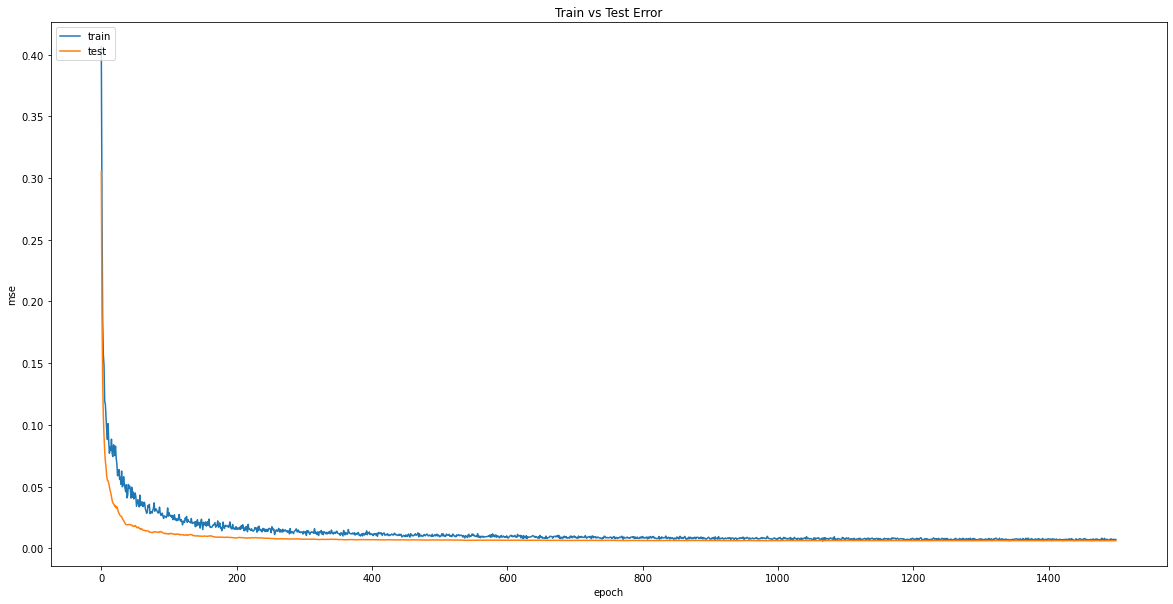

In [38]:
plt.figure(figsize=(20,10))
plt.plot(histories['5_layered_dropout'].history['mse'])
plt.plot(histories['5_layered_dropout'].history['val_mse'])
plt.title('Train vs Test Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

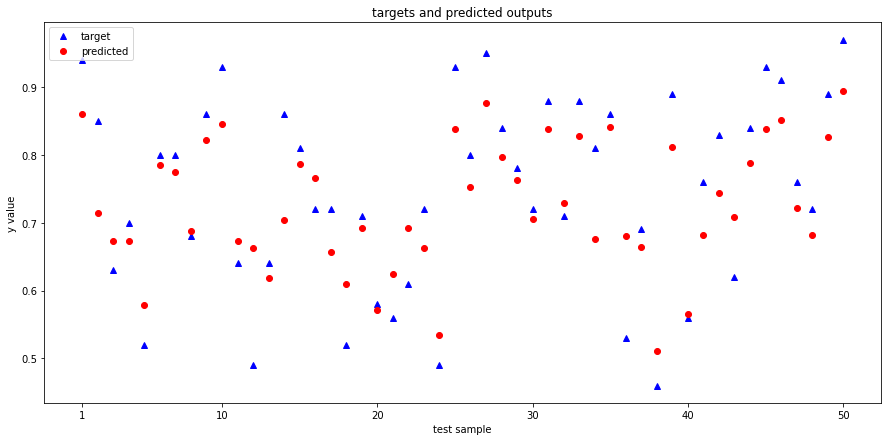

In [39]:
y_pred = model.predict(X_test)

plt.figure(figsize=(15,7))
for i in range(0,50):
    plot_targets = plt.plot(i+1, y_test[i], 'b^')
    plot_pred = plt.plot(i+1, y_pred[i], 'ro')
plt.xlabel('test sample')
plt.ylabel('y value')
plt.xticks([1,10,20,30,40,50])
plt.title('targets and predicted outputs')
plt.legend(['target', 'predicted'], loc='upper left')

## m.s.e of all networks

In [40]:
print("Validation accuracy of 3-layered network: " + str(accuracies[0]))
print("Validation accuracy of 4-layered network without dropouts: " + str(accuracies[1]))
print("Validation accuracy of 5-layered network without dropouts: " + str(accuracies[2]))
print("Validation accuracy of 4-layered network with dropouts: " + str(accuracies[3]))
print("Validation accuracy of 5-layered network with dropouts: " + str(accuracies[4]))

Validation accuracy of 3-layered network: 0.0054005468264222145
Validation accuracy of 4-layered network without dropouts: 0.0057580252178013325
Validation accuracy of 5-layered network without dropouts: 0.005155087914317846
Validation accuracy of 4-layered network with dropouts: 0.0049958922900259495
Validation accuracy of 5-layered network with dropouts: 0.006081645376980305


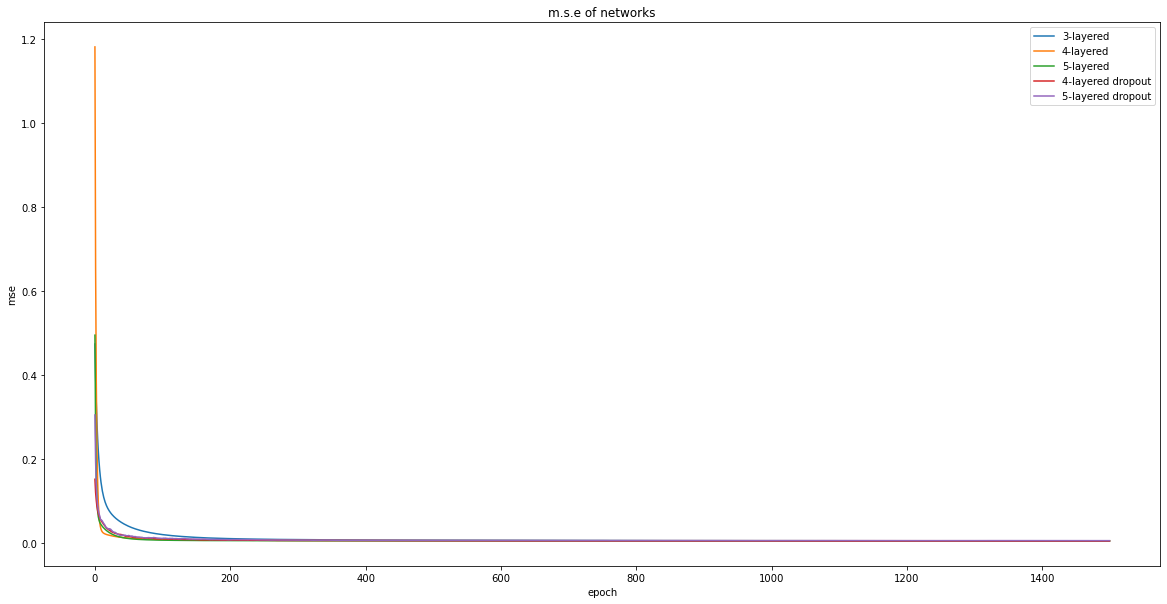

In [41]:
plt.figure(figsize=(20,10))
plt.plot(histories['3_layered'].history['val_mse'])
plt.plot(histories['4_layered'].history['val_mse'])
plt.plot(histories['5_layered'].history['val_mse'])
plt.plot(histories['4_layered_dropout'].history['val_mse'])
plt.plot(histories['5_layered_dropout'].history['val_mse'])
plt.title('m.s.e of networks')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['3-layered', '4-layered','5-layered','4-layered dropout','5-layered dropout'], loc='upper right')
plt.show()